In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow as pa
from pyarrow import csv
from pyarrow import feather
import numpy as np
from scipy import stats

from maid_interface import maid_2007_Npi as maid

In [2]:
%%time


names = ["electron_sector", "w", "q2", "theta", "phi", "mm2", "helicty", "type", "hash"]
dtype={
    "electron_sector": "int8", 
    "helicty": "int8", 
    "w": "float32", 
    "q2": "float32", 
    "theta": "float32", 
    "phi": "float32", 
    "mm2": "float32"
}

pyTable = csv.read_csv("/Users/tylern/Data/e1d/data/data_e1d.csv", 
                       read_options=csv.ReadOptions(use_threads=True, column_names=names),
                       convert_options=csv.ConvertOptions(column_types=dtype))

CPU times: user 1.86 s, sys: 537 ms, total: 2.4 s
Wall time: 185 ms


In [3]:
df = pyTable.to_pandas()

In [4]:


E1D_E0 = 4.81726
w_bins = np.arange(1.0, 1.825, 0.025)
q2_bins = np.arange(1.0, 2.5, 0.5)
theta_bins = np.arange(-1.0, 1.25, 0.25)

w_centers = (w_bins[:1] + w_bins[1:]) / 2
q2_centers = (q2_bins[:1] + q2_bins[1:]) / 2
theta_centers = np.cos((theta_bins[:1] + theta_bins[1:]) / 2)

phi_bins = np.linspace(0, 2*np.pi, 20)

In [5]:
# E, W, Q2, costheta, phi
maid(E1D_E0,1.1,1.0,0.1,0.3)

0.06995517760515213

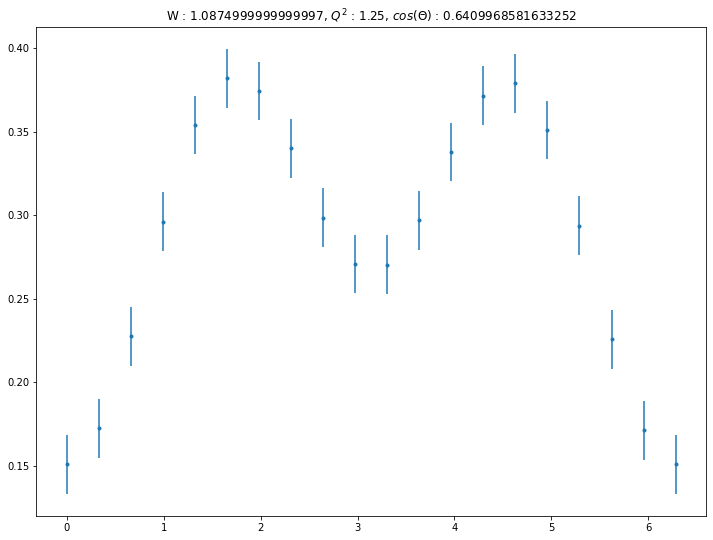

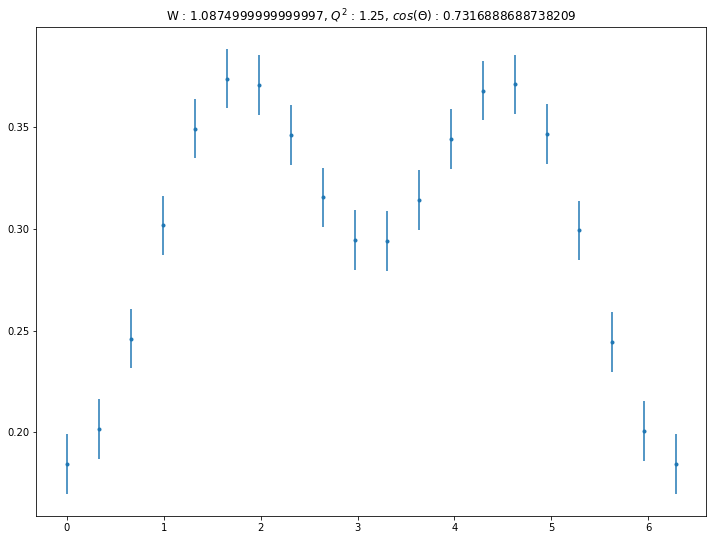

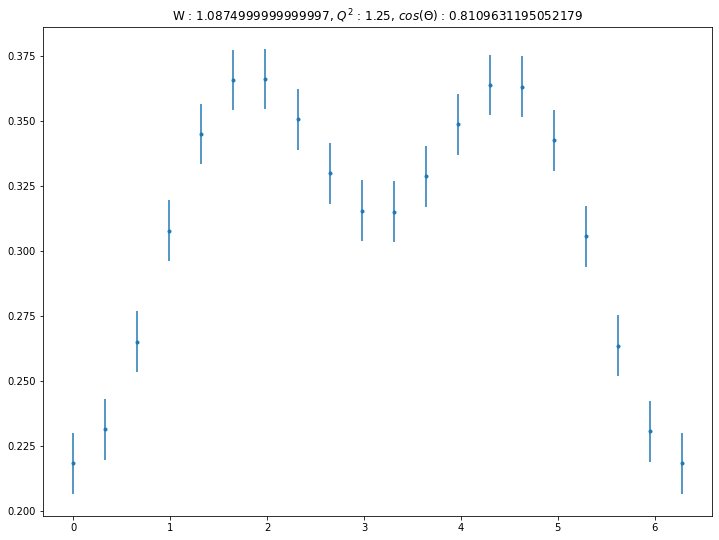

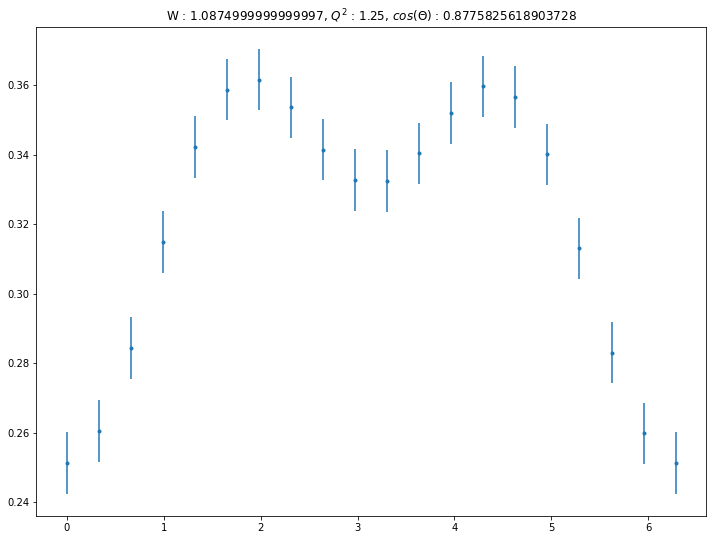

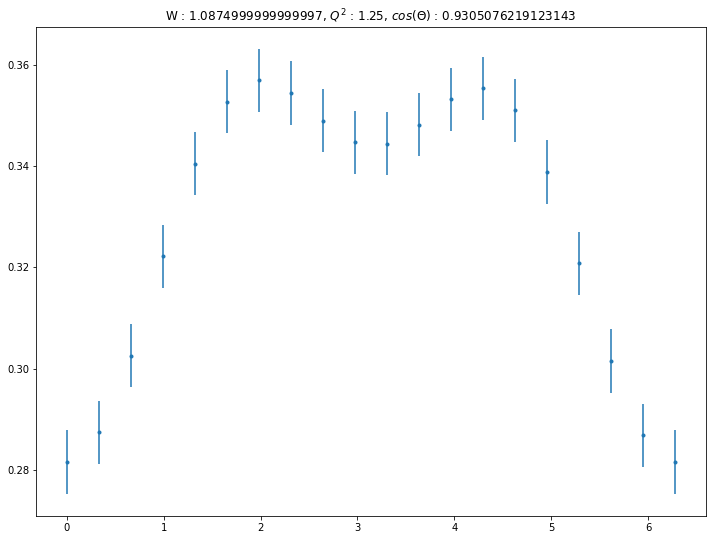

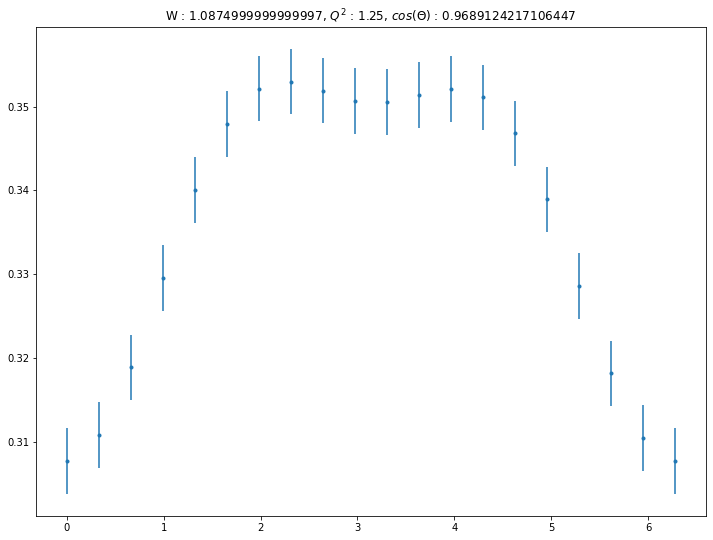

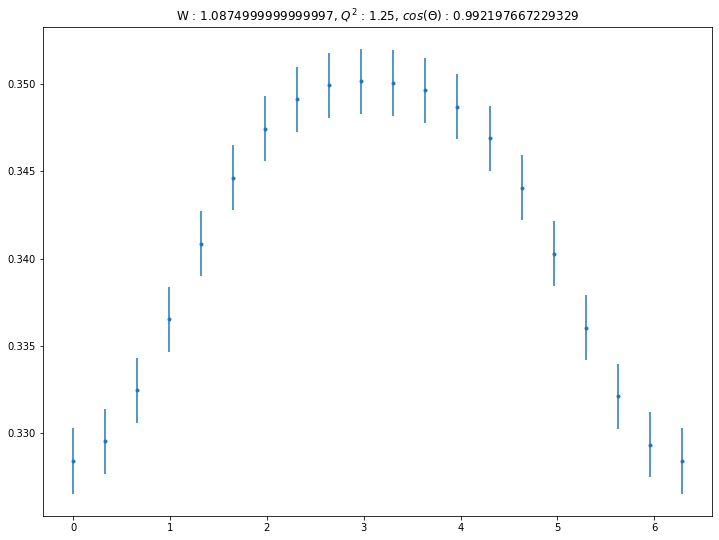

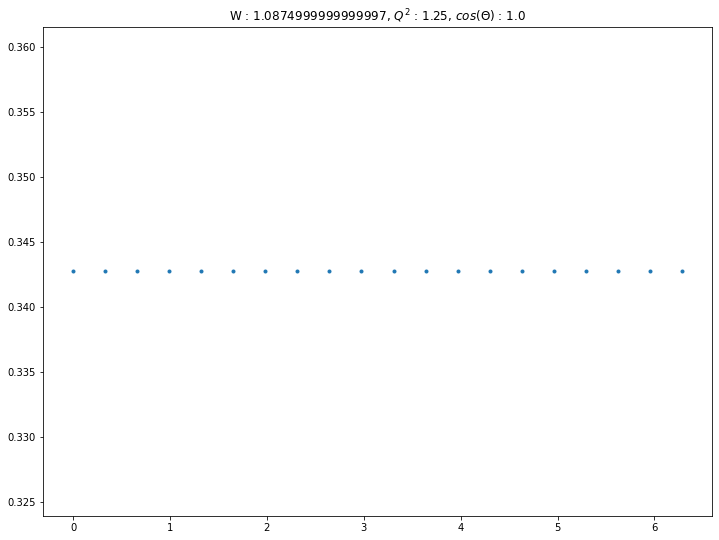

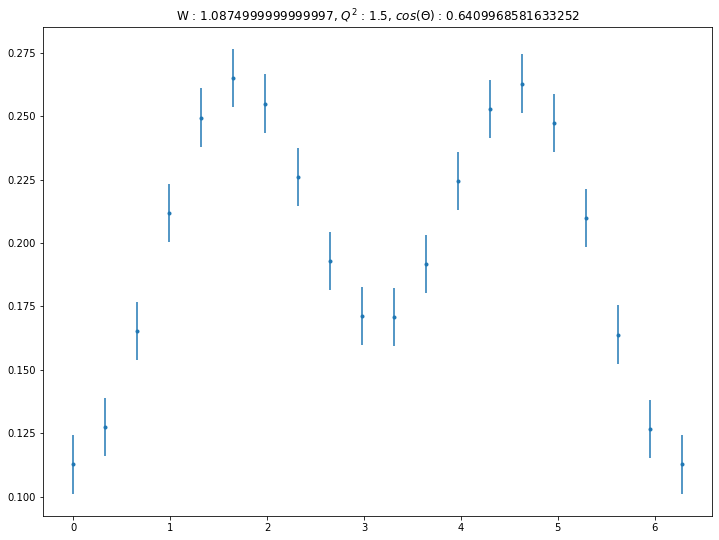

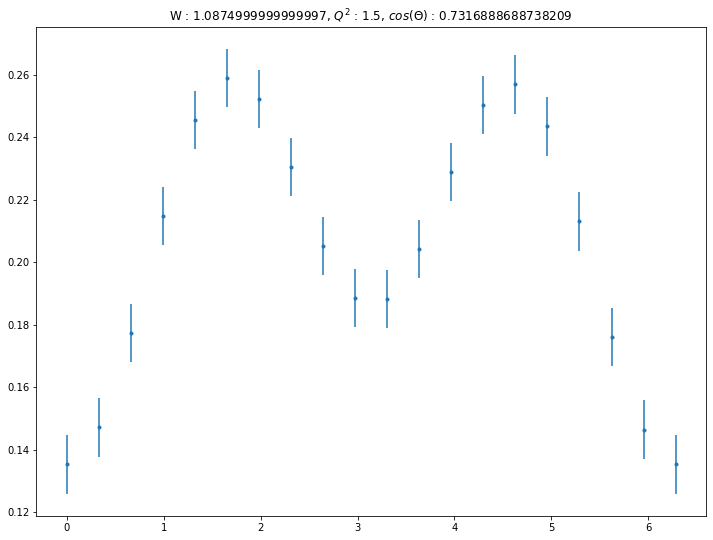

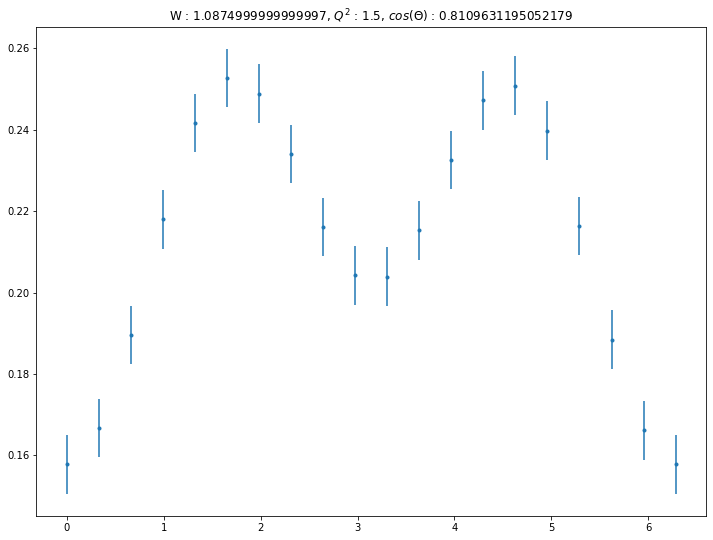

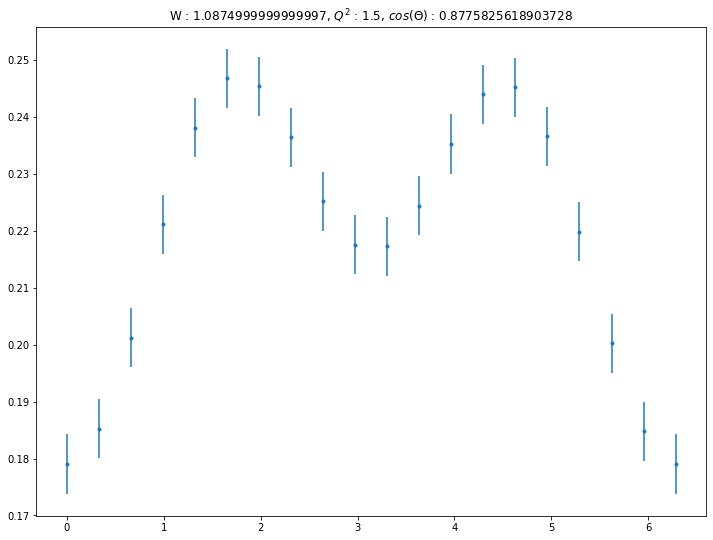

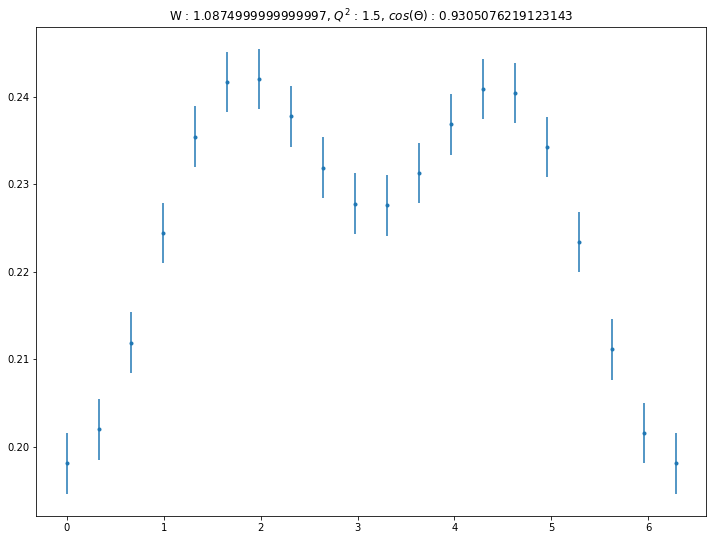

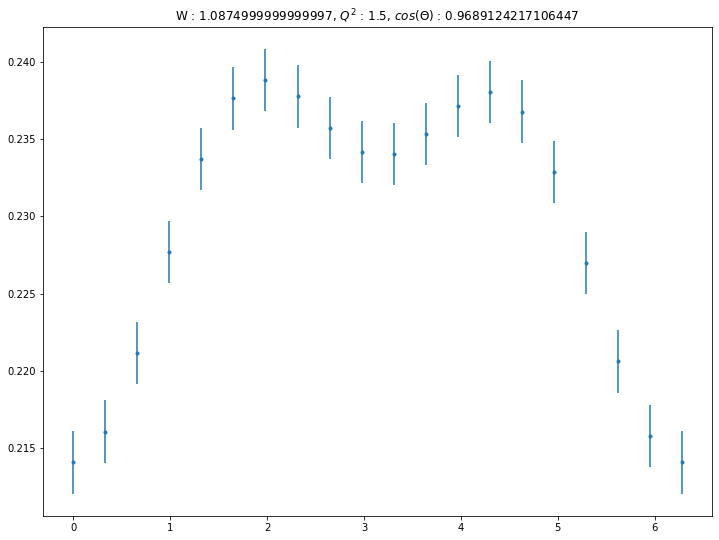

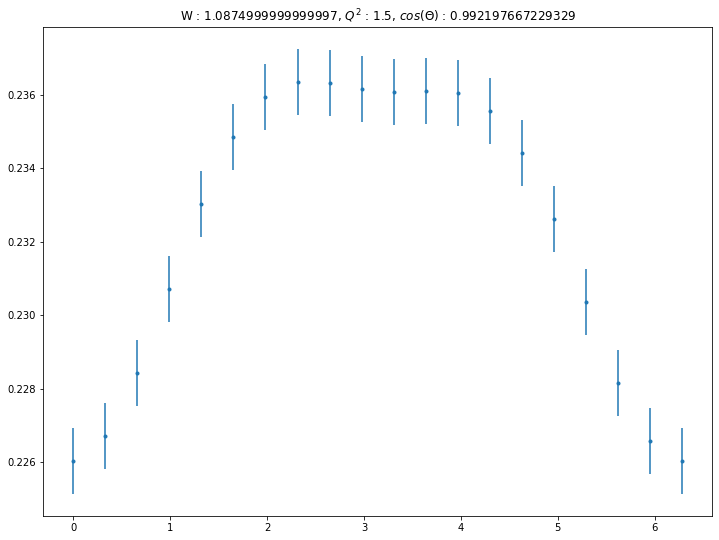

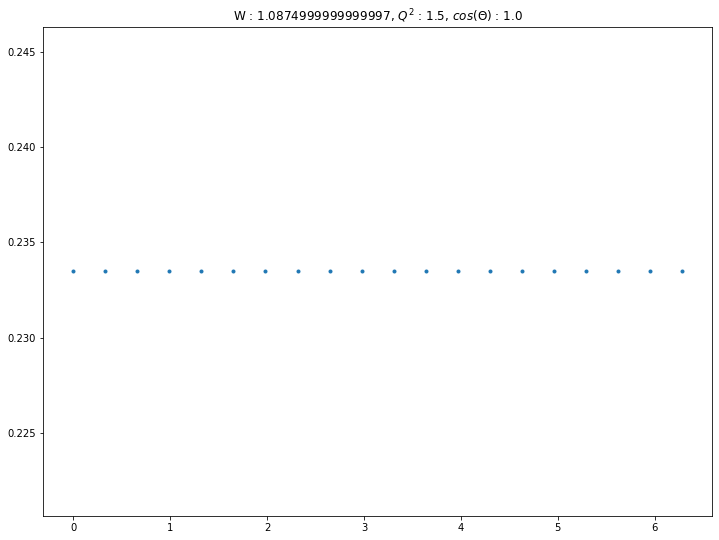

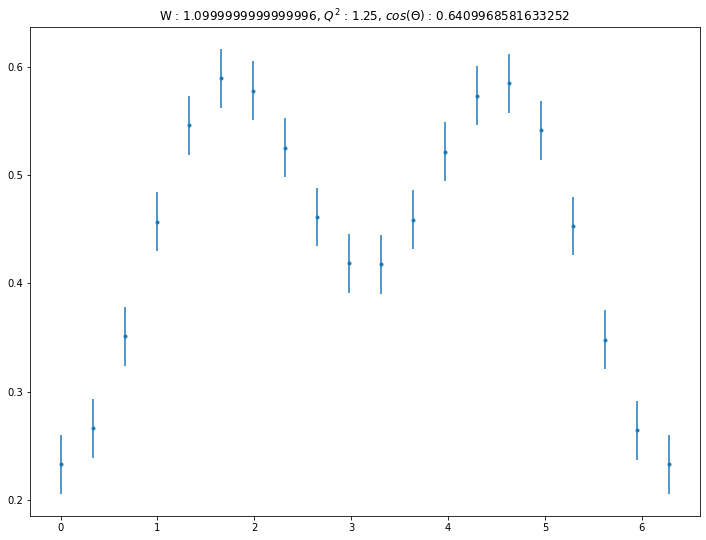

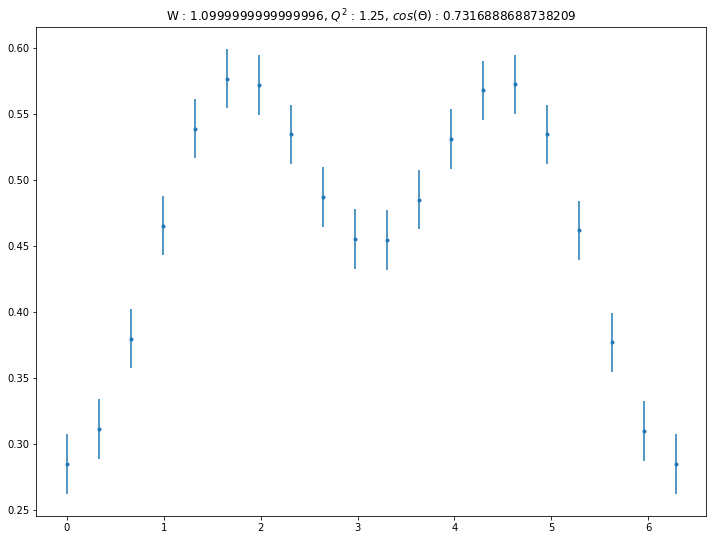

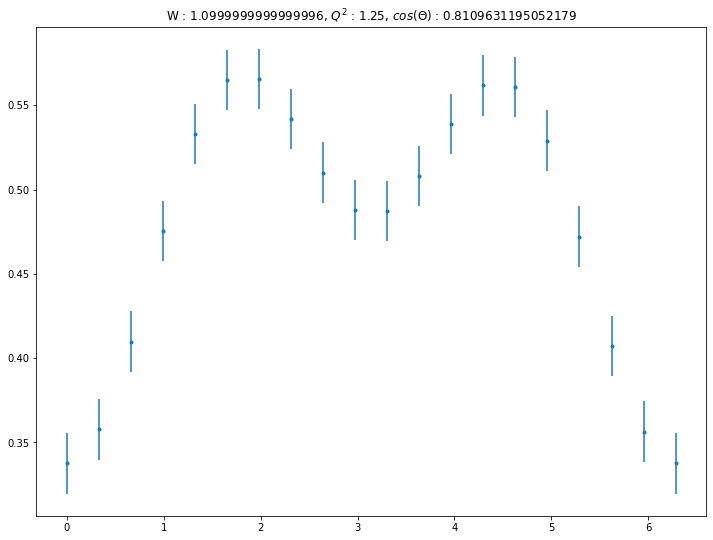

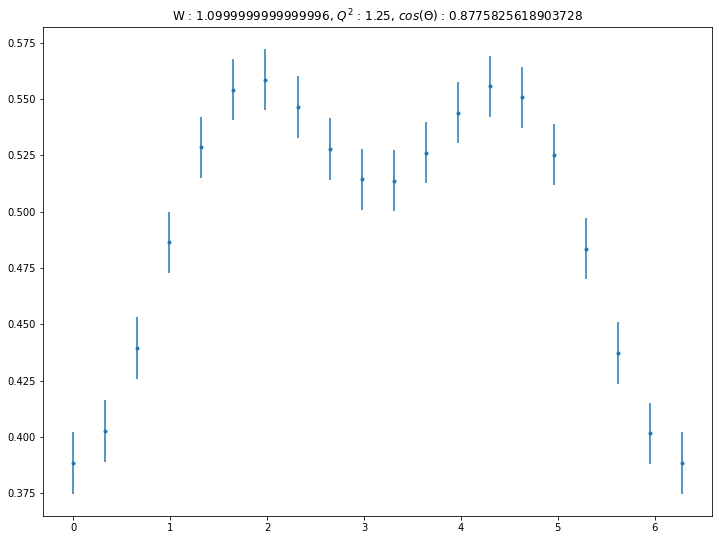

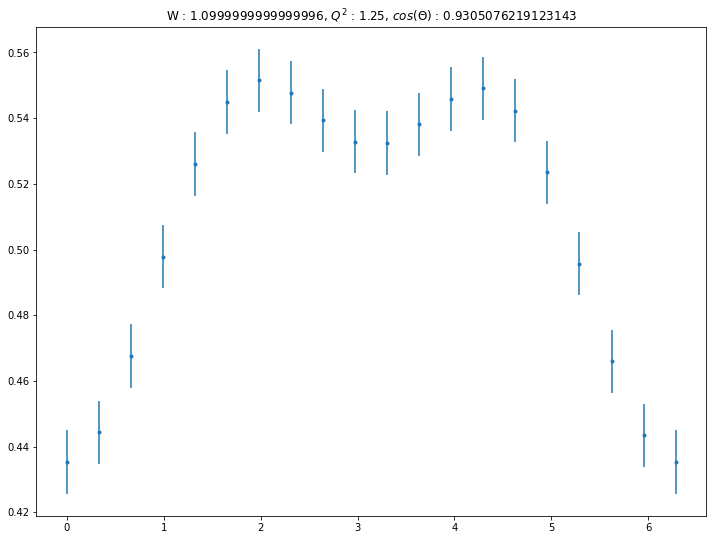

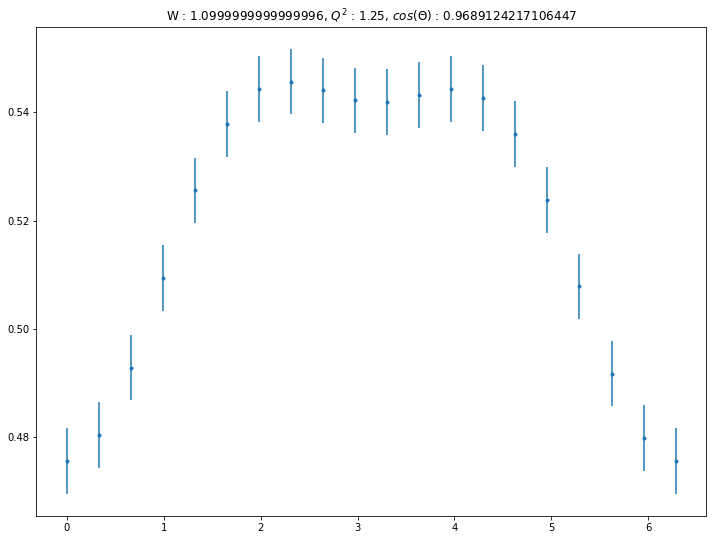

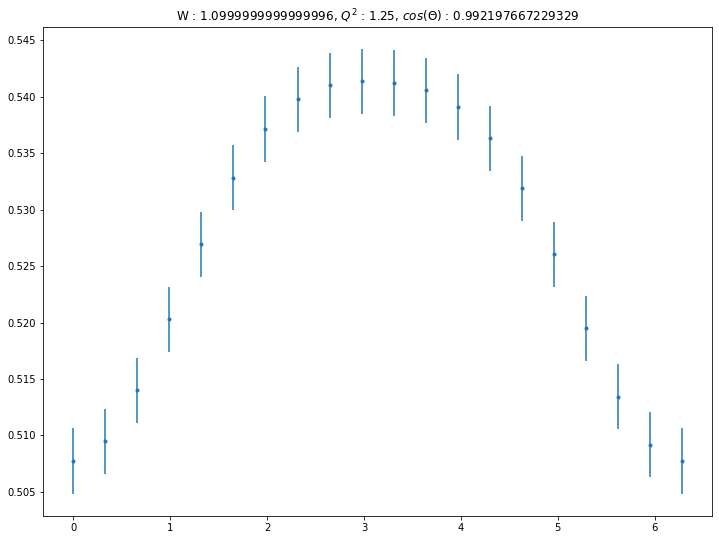

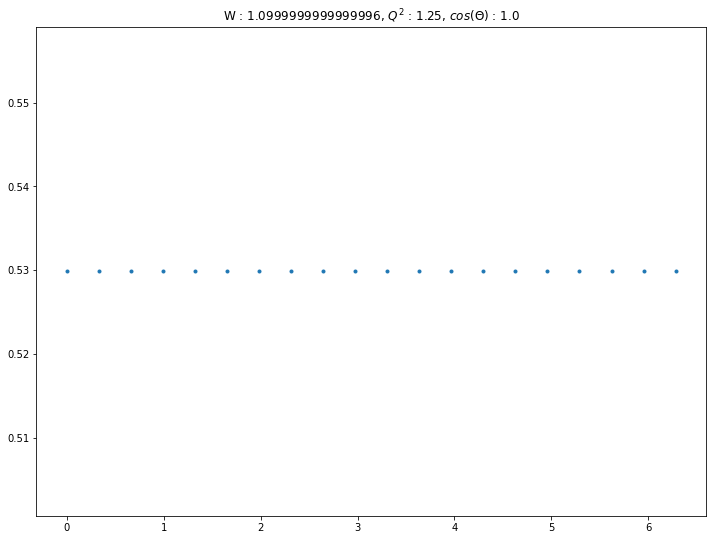

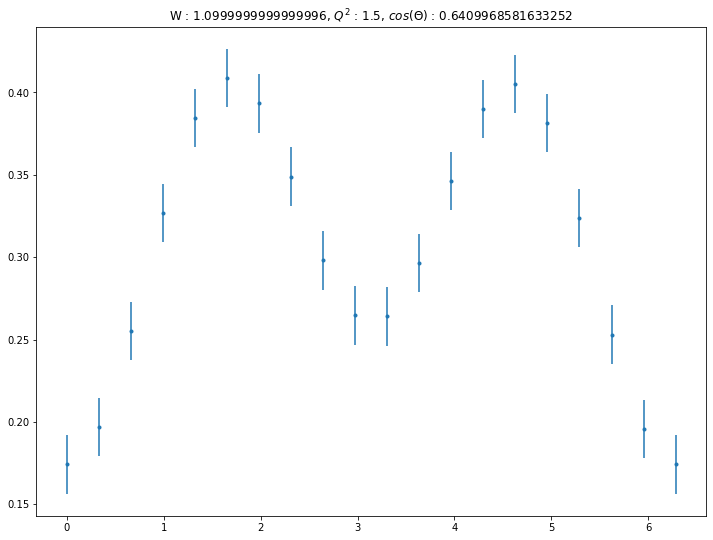

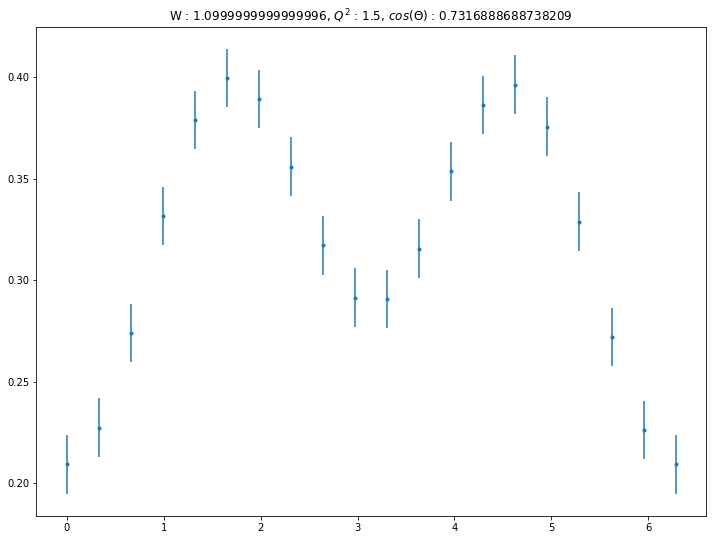

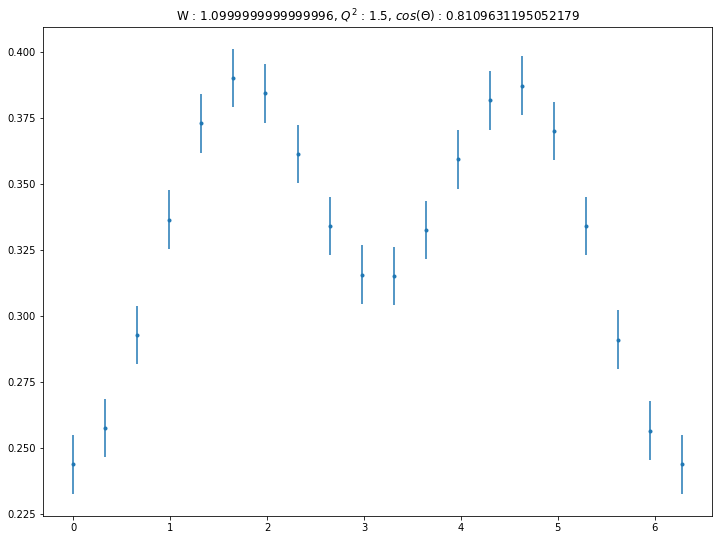

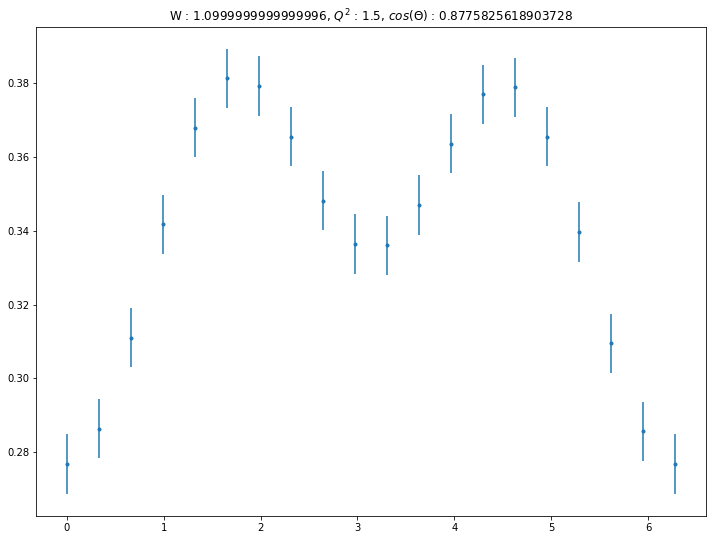

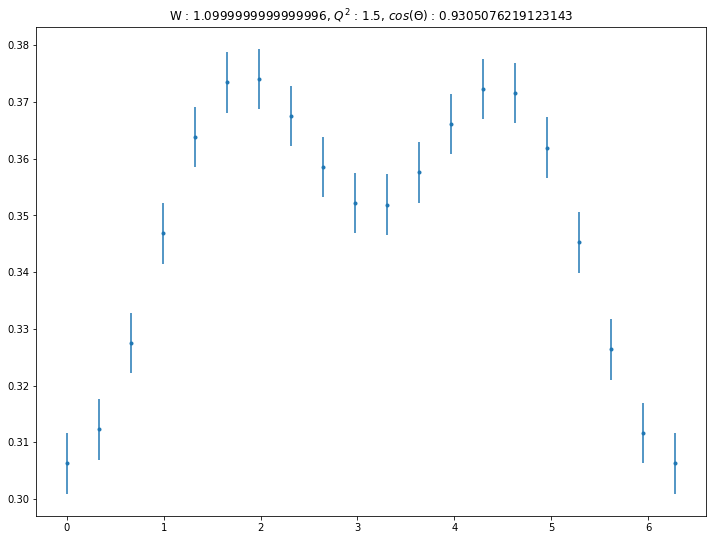

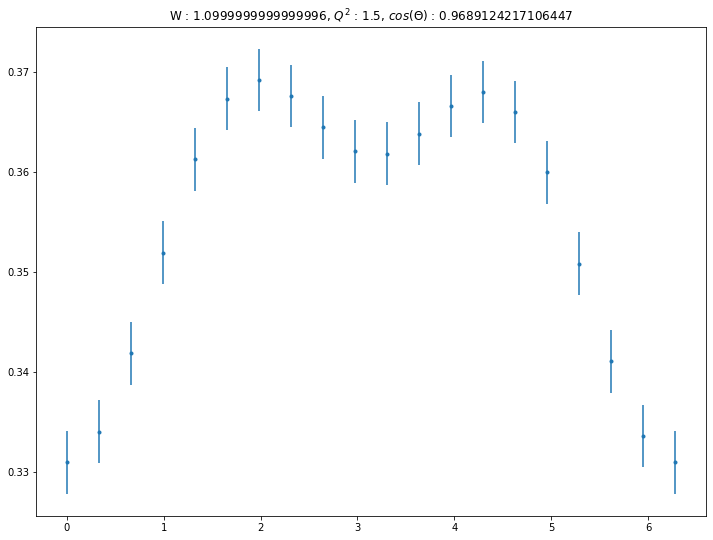

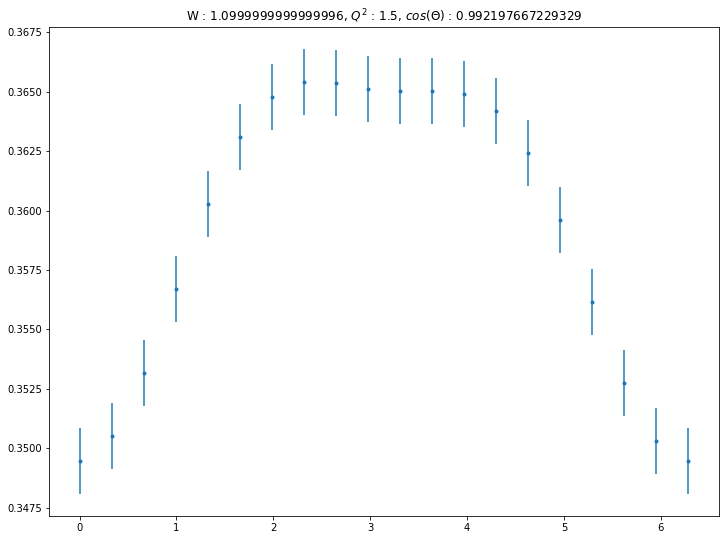

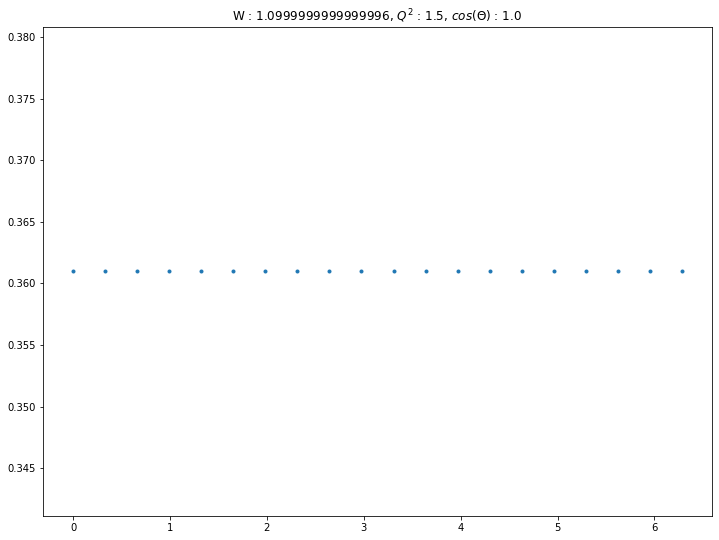

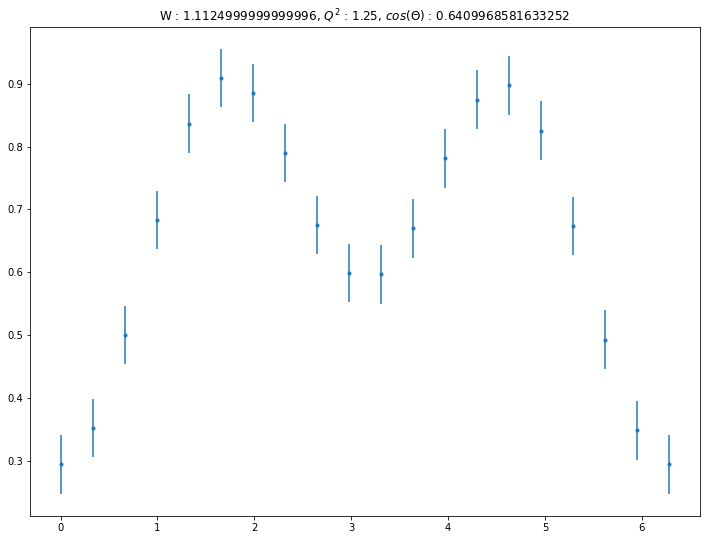

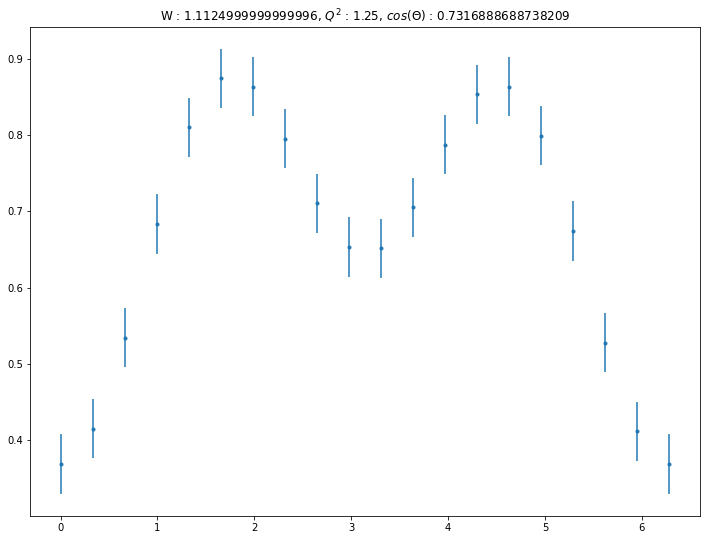

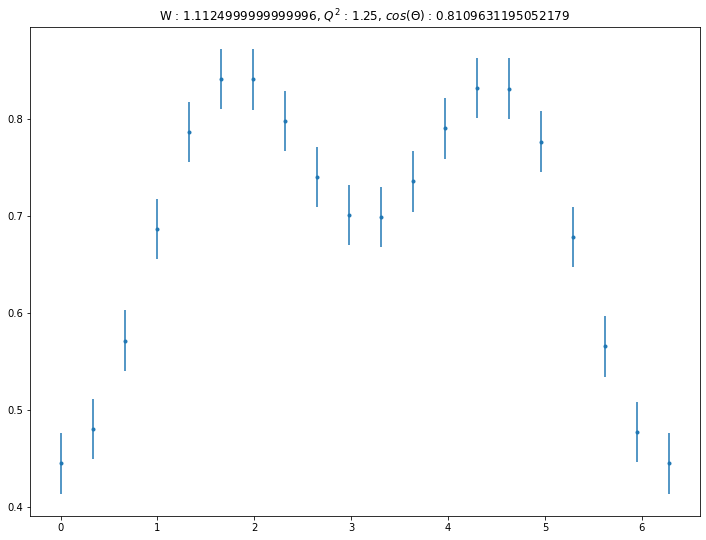

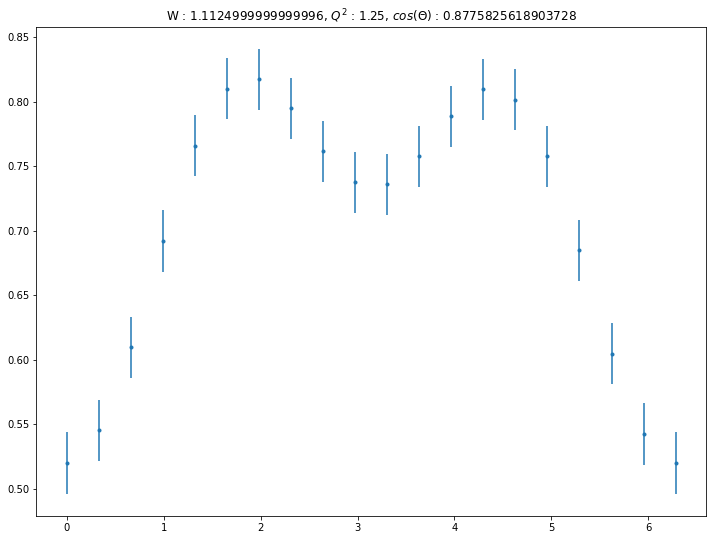

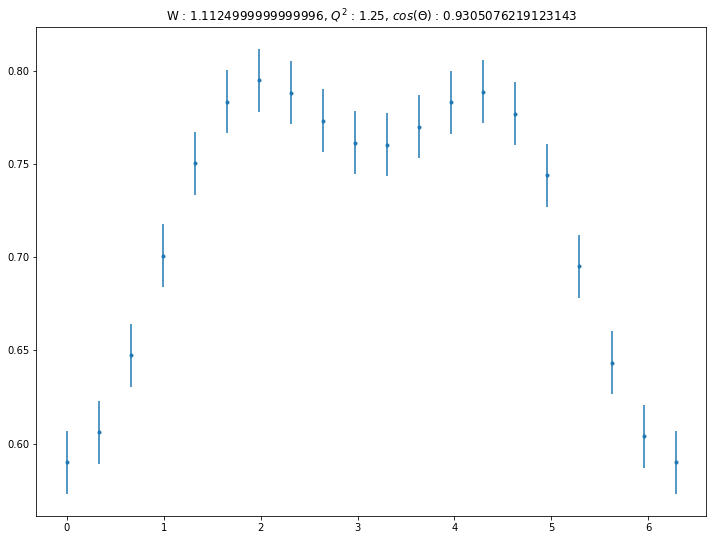

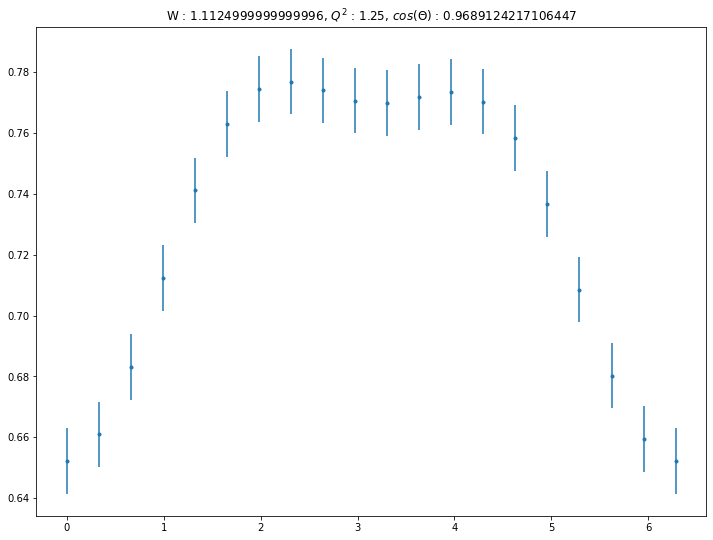

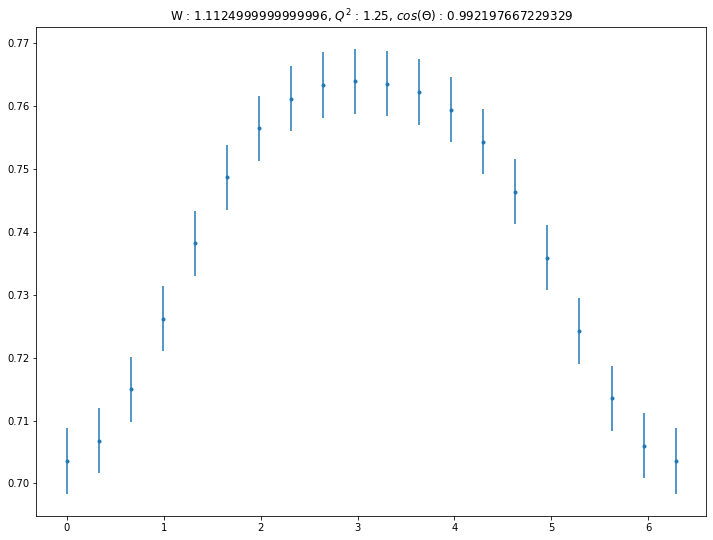

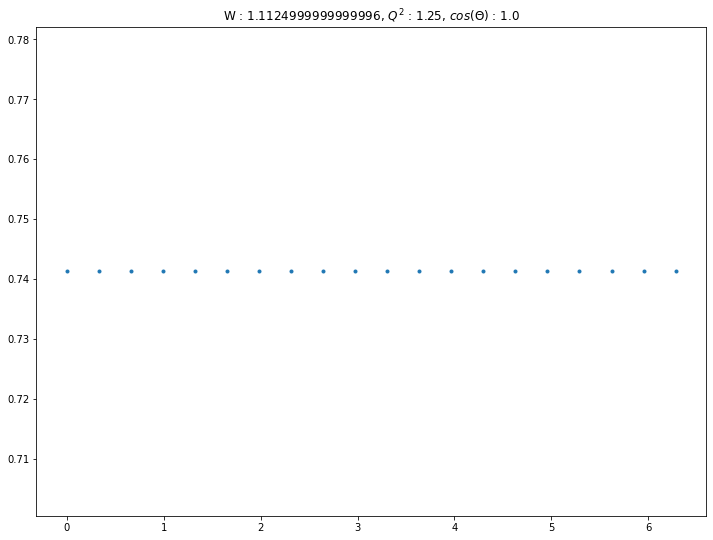

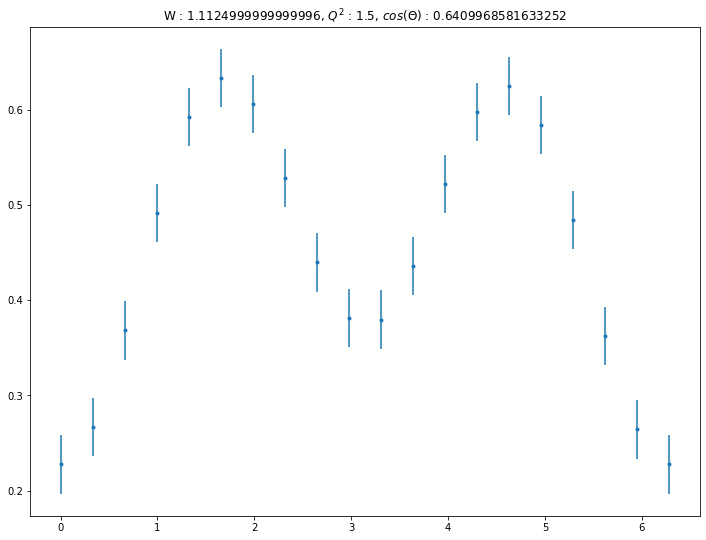

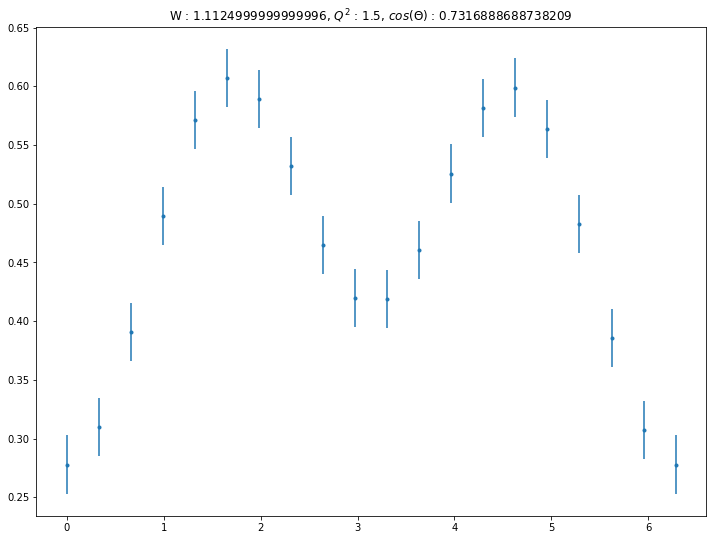

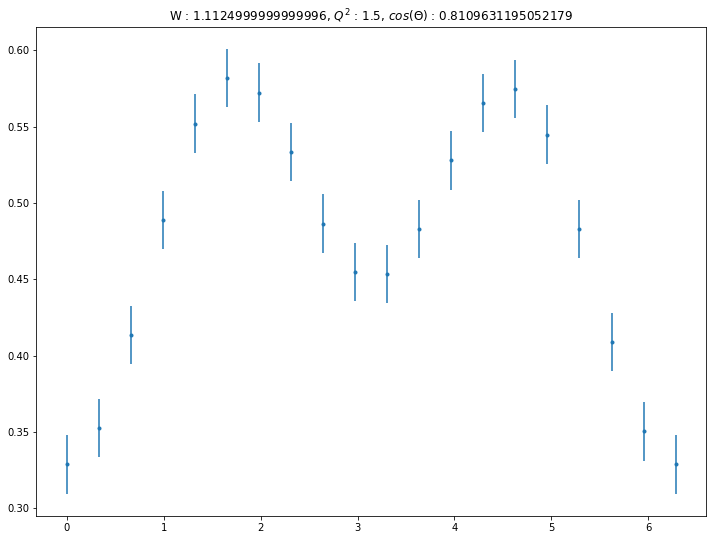

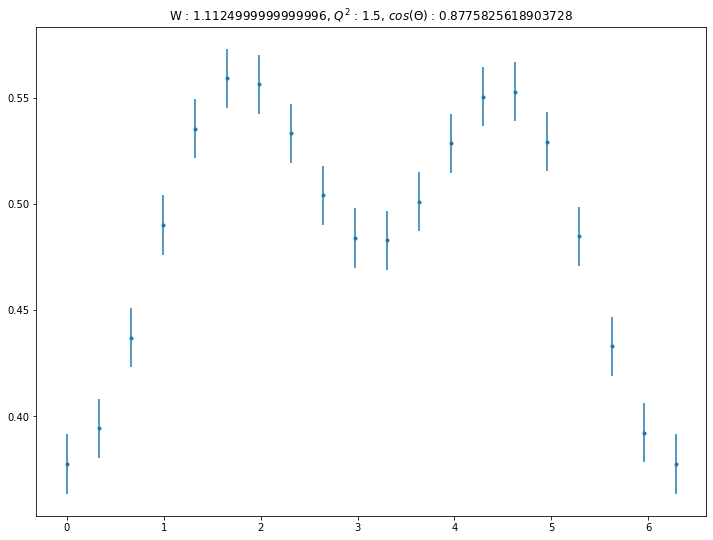

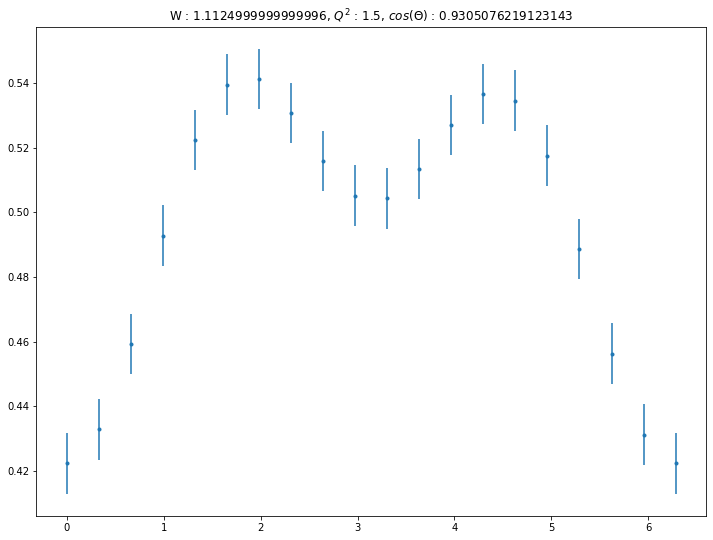

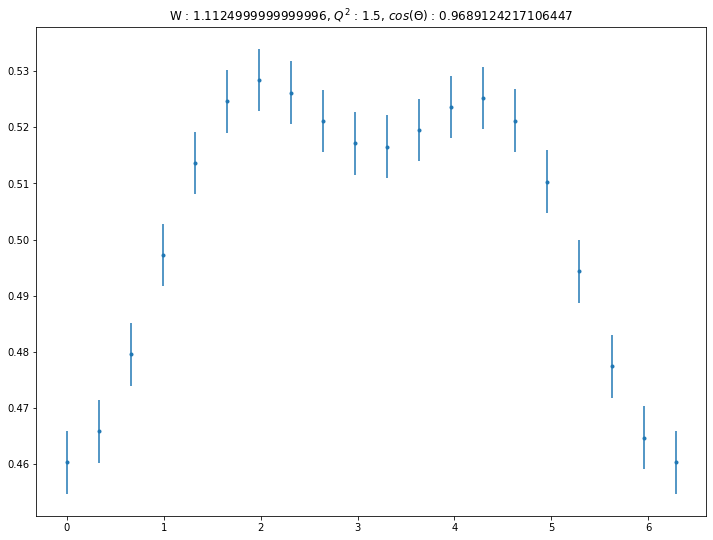

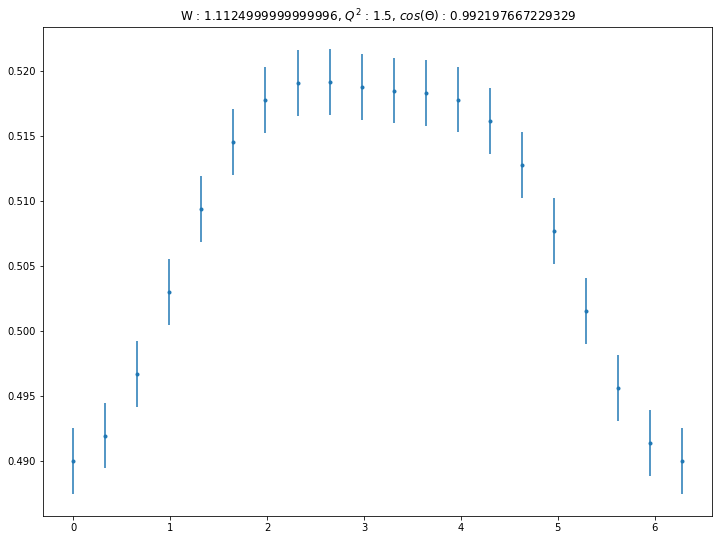

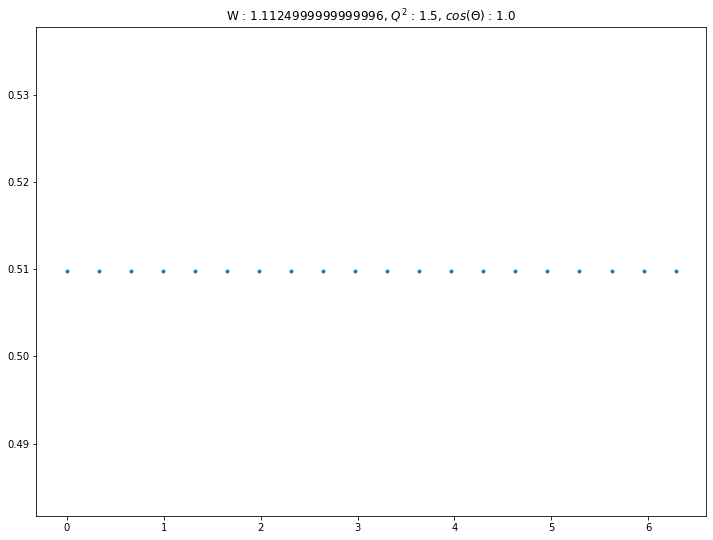

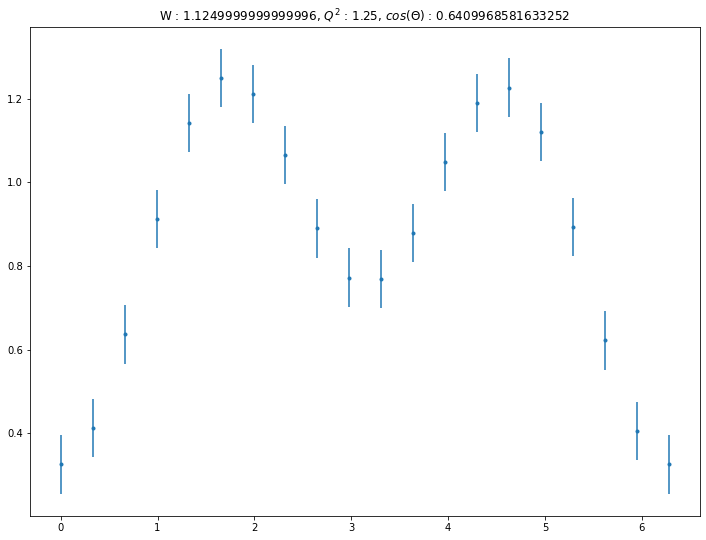

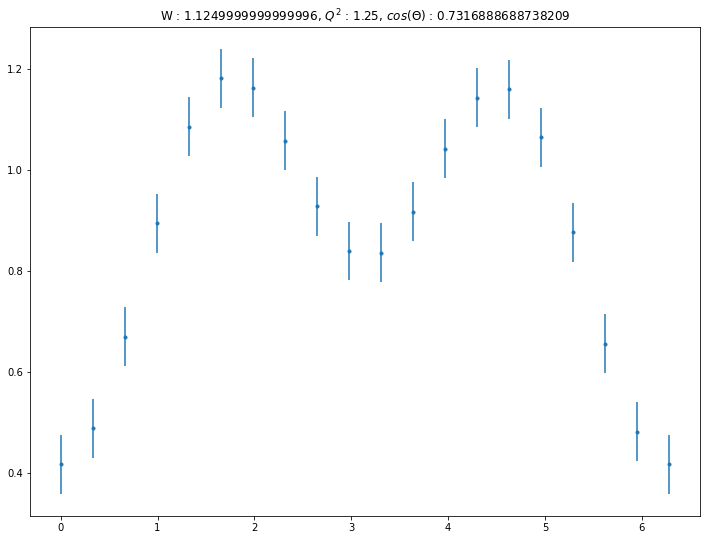

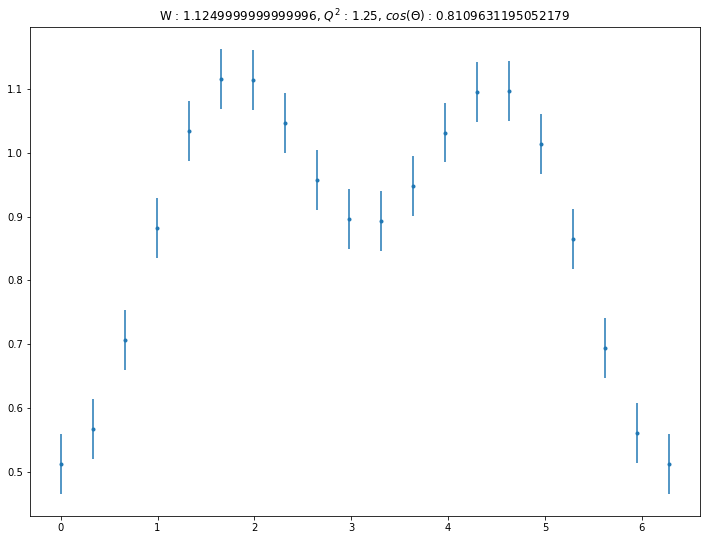

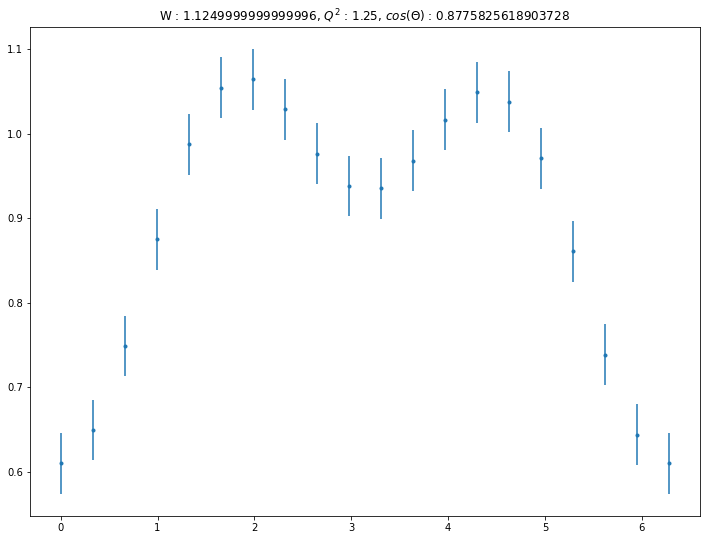

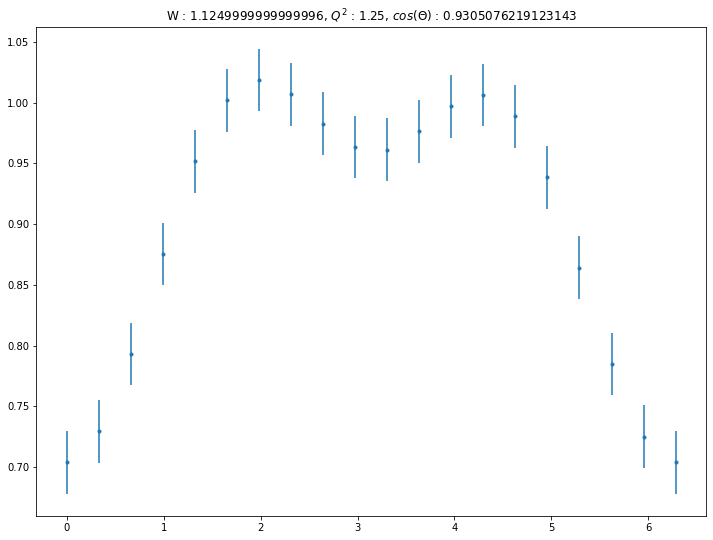

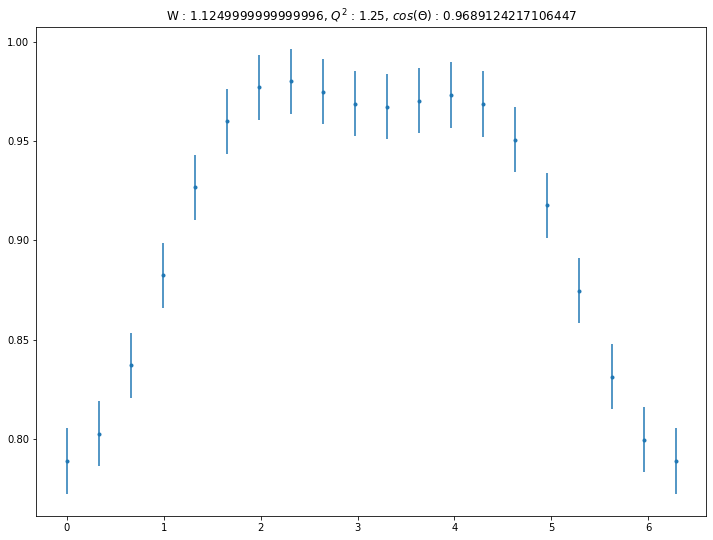

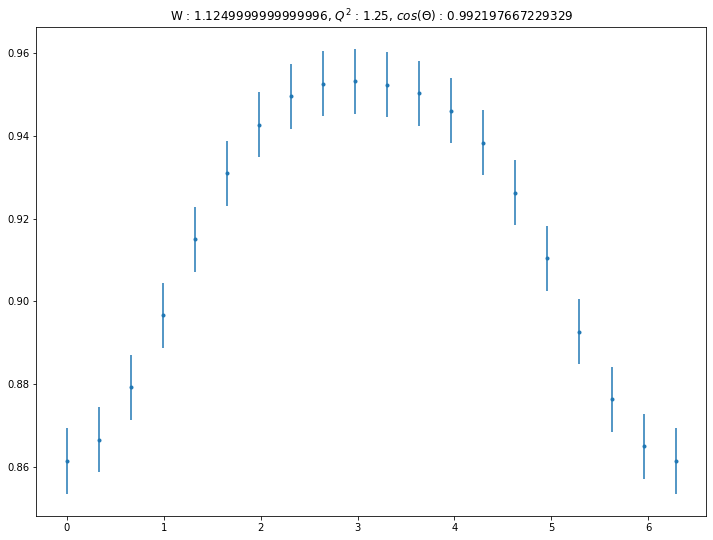

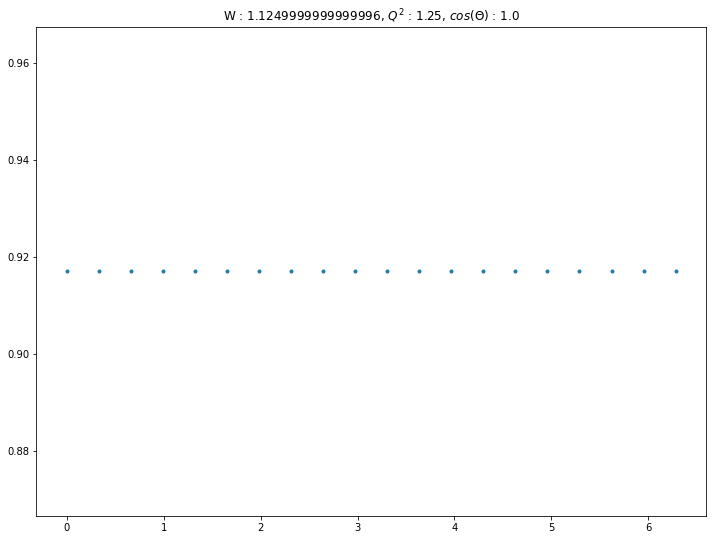

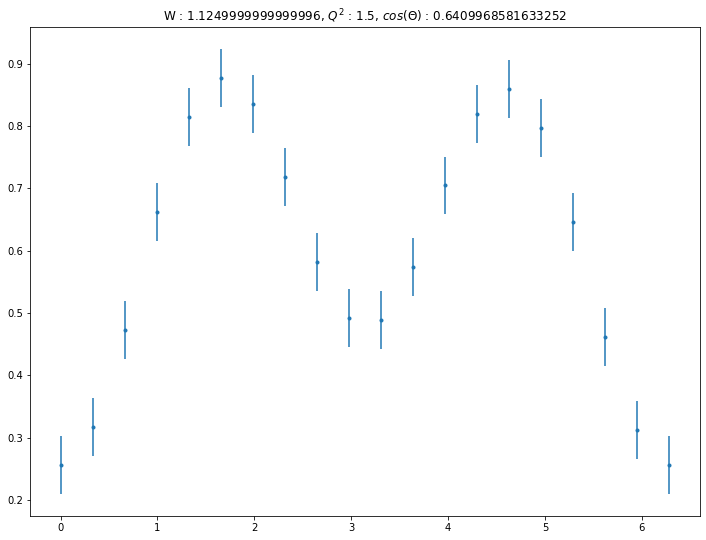

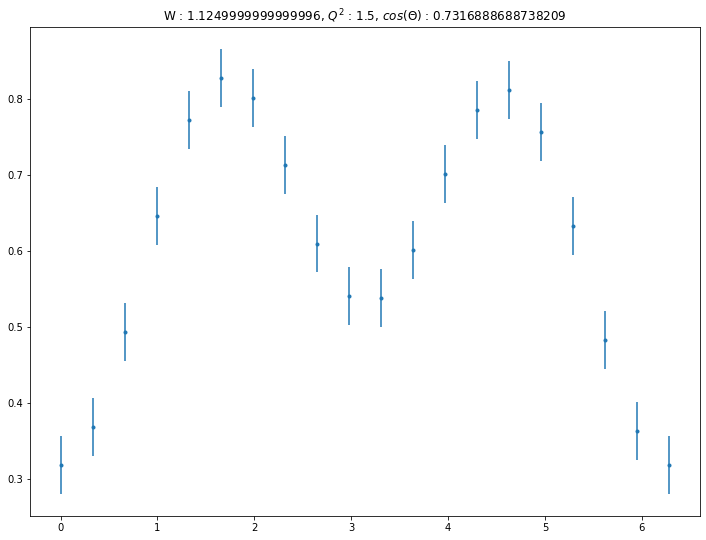

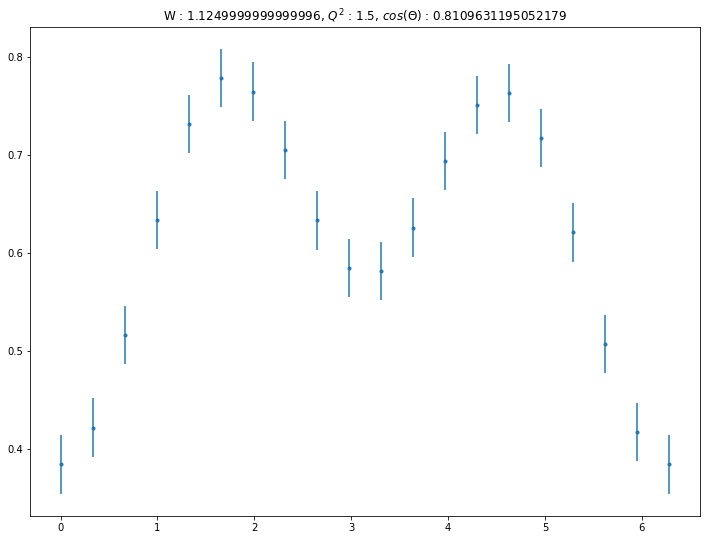

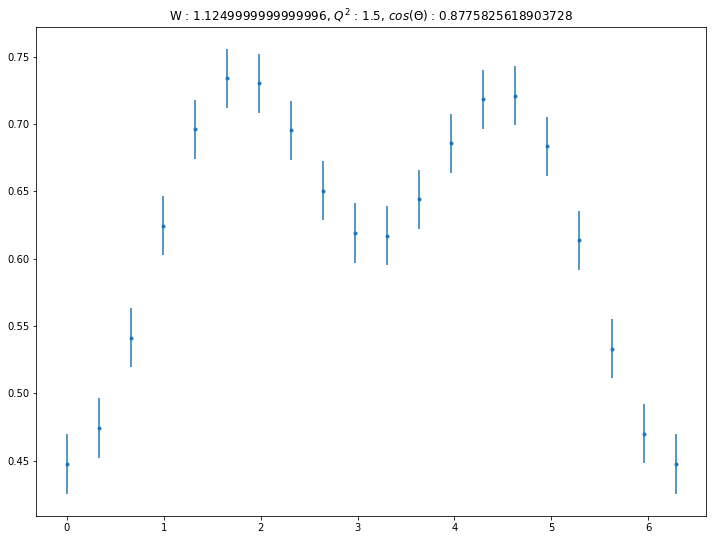

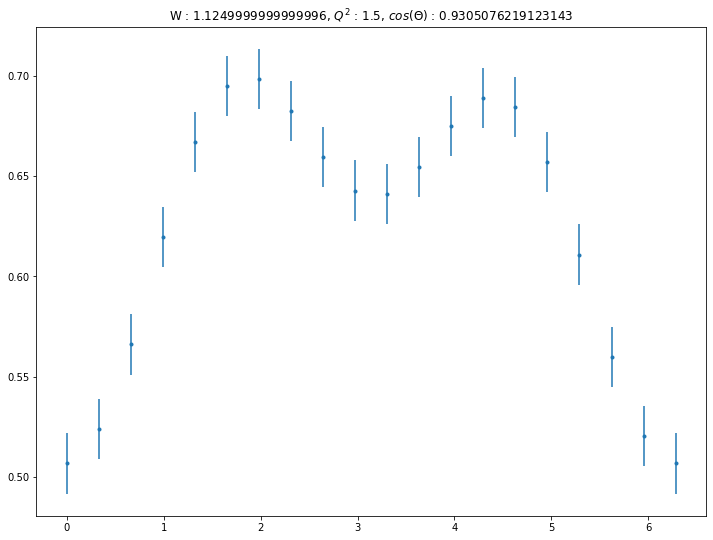

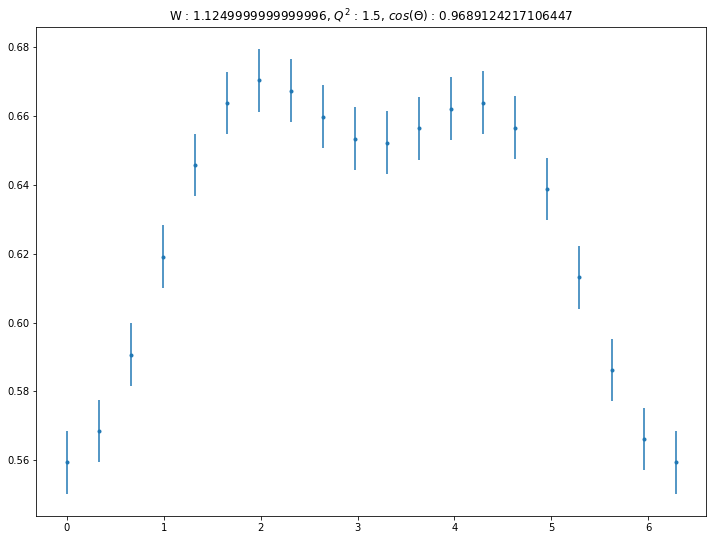

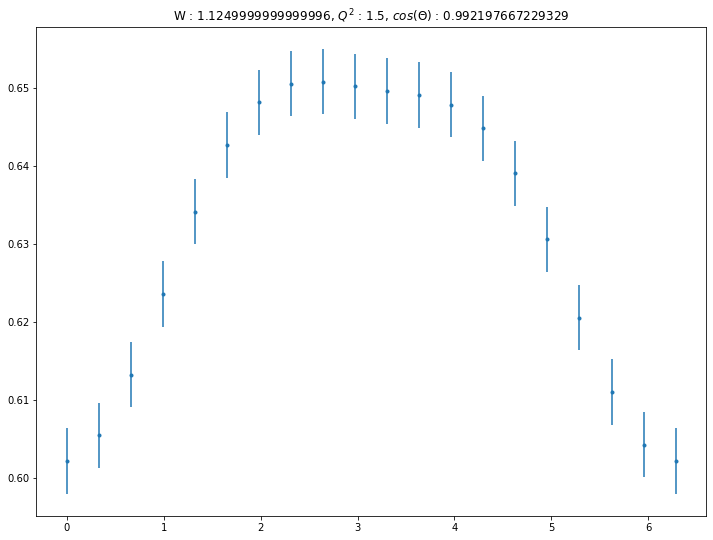

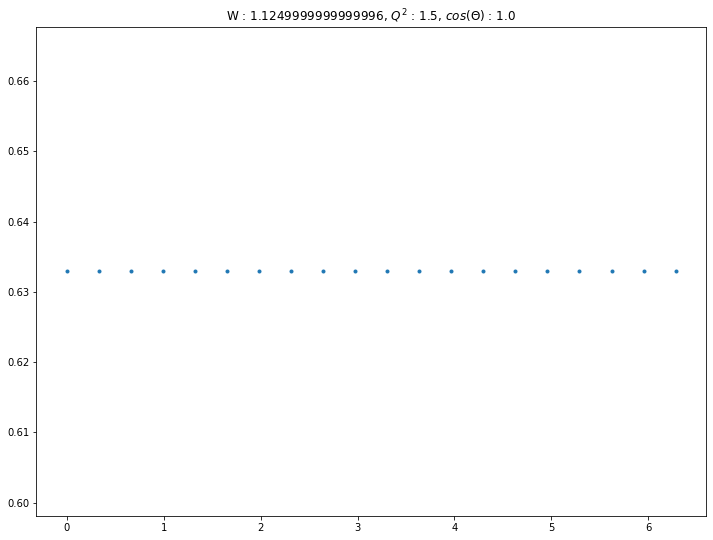

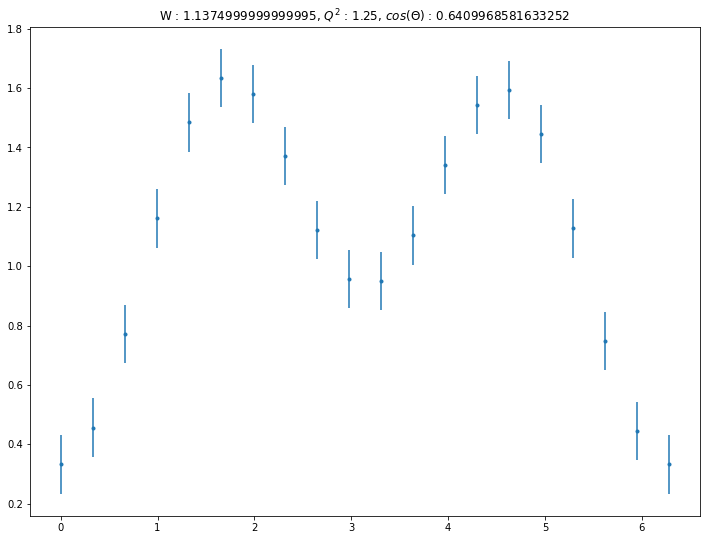

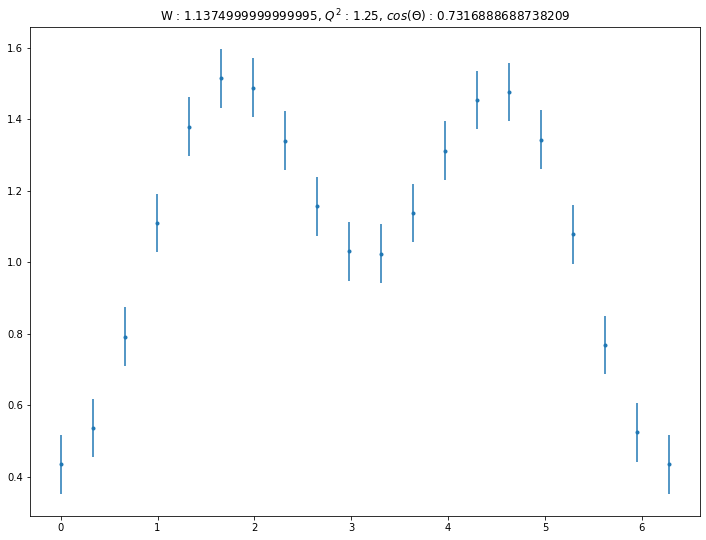

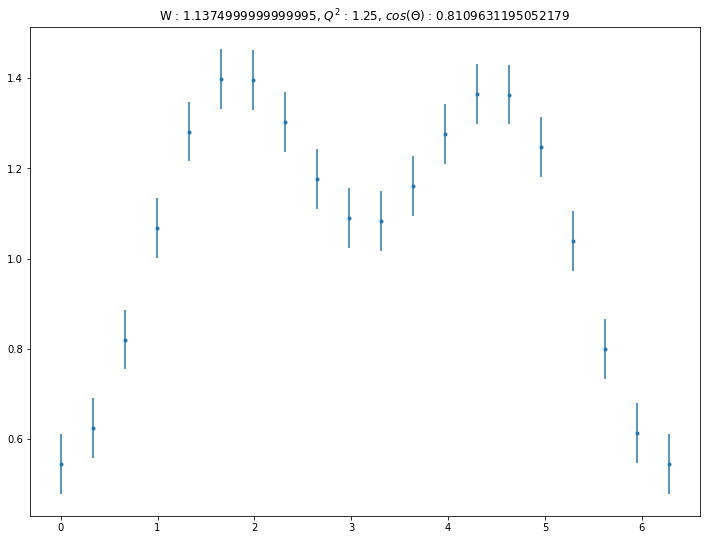

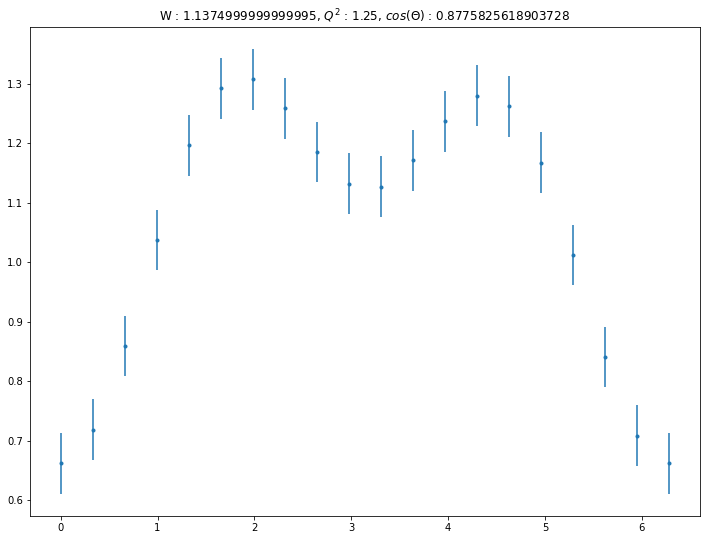

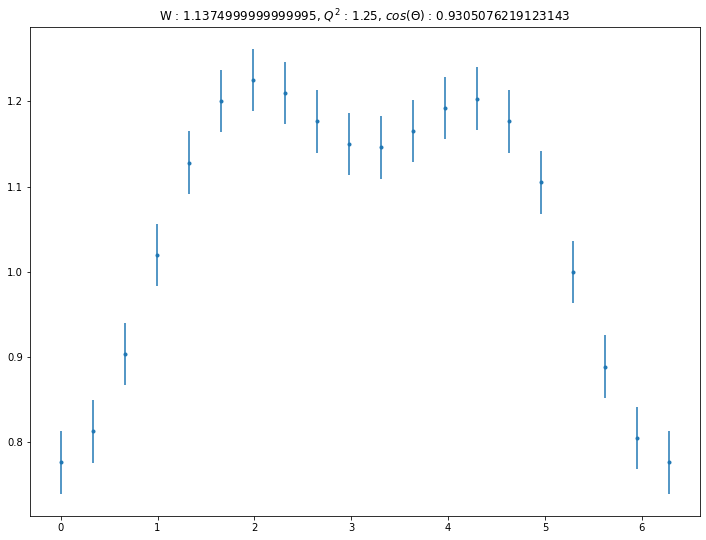

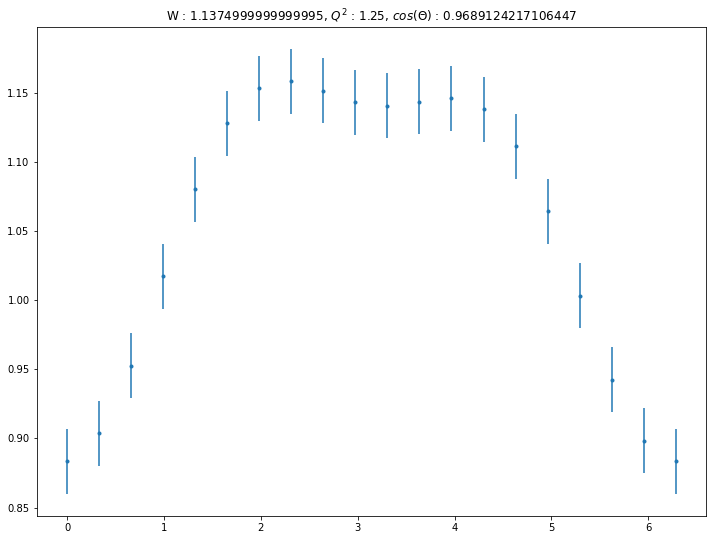

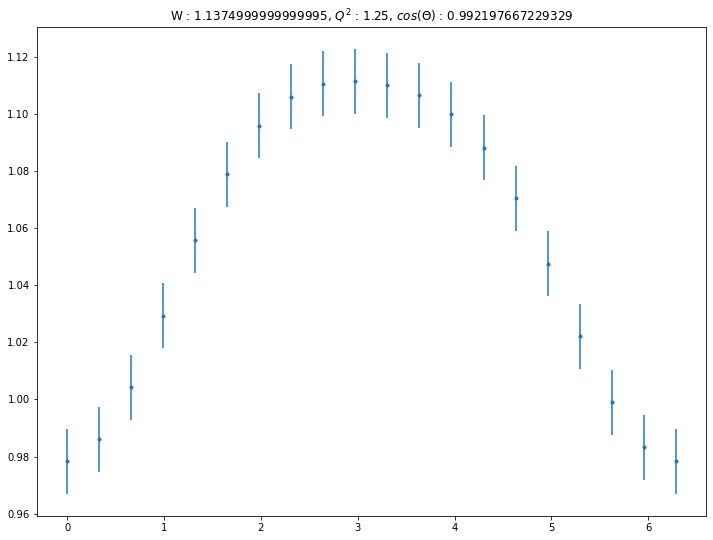

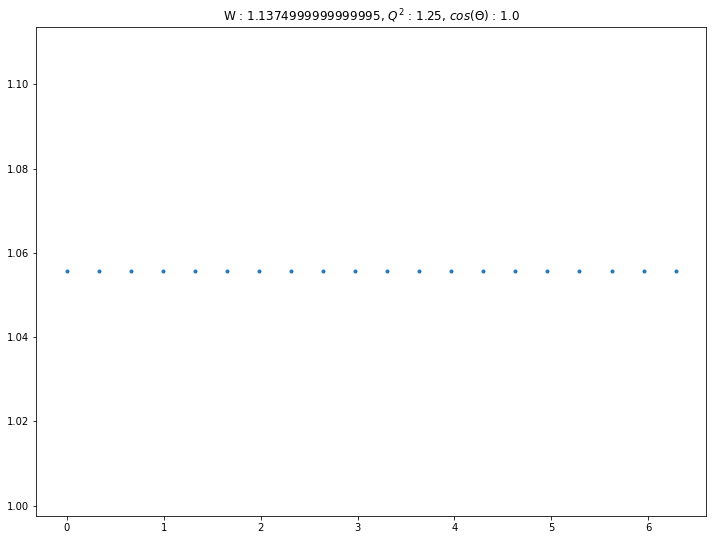

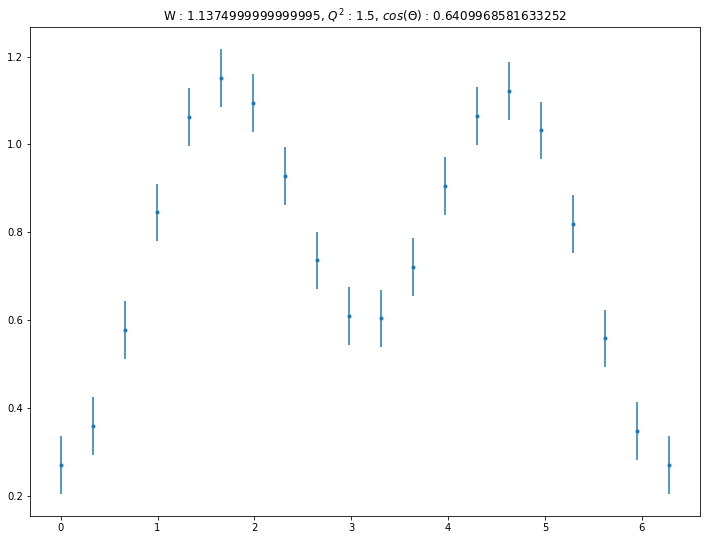

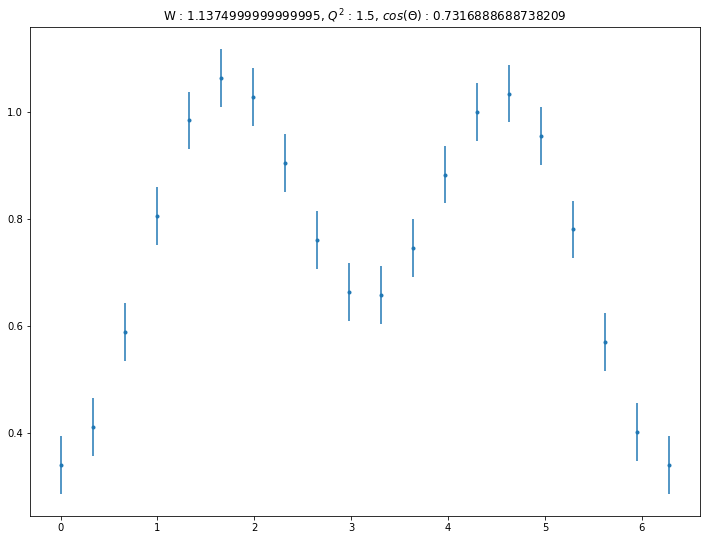

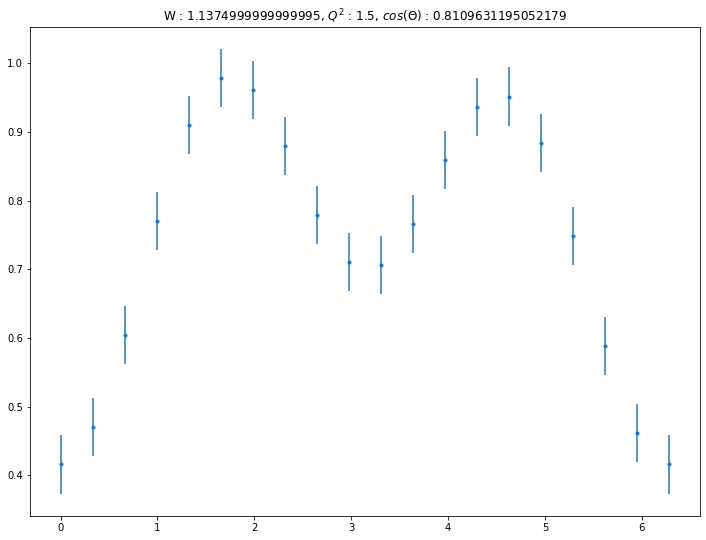

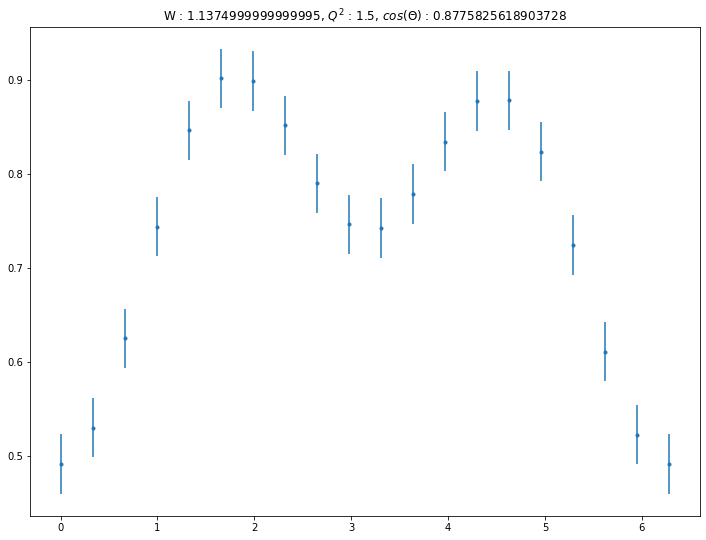

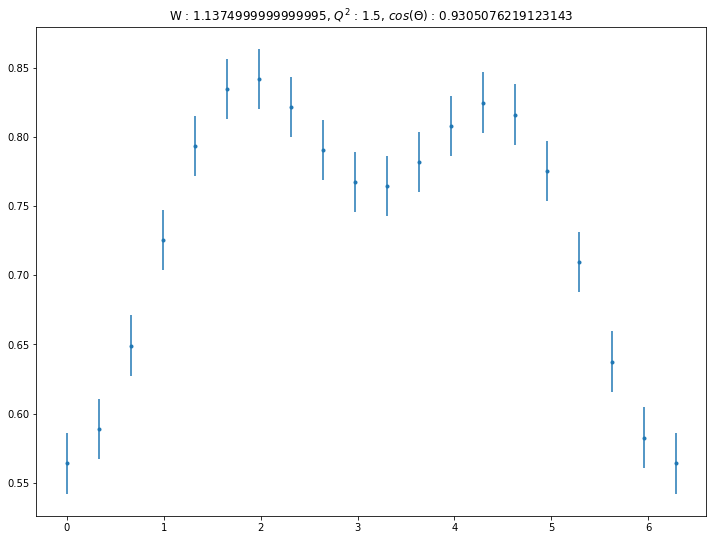

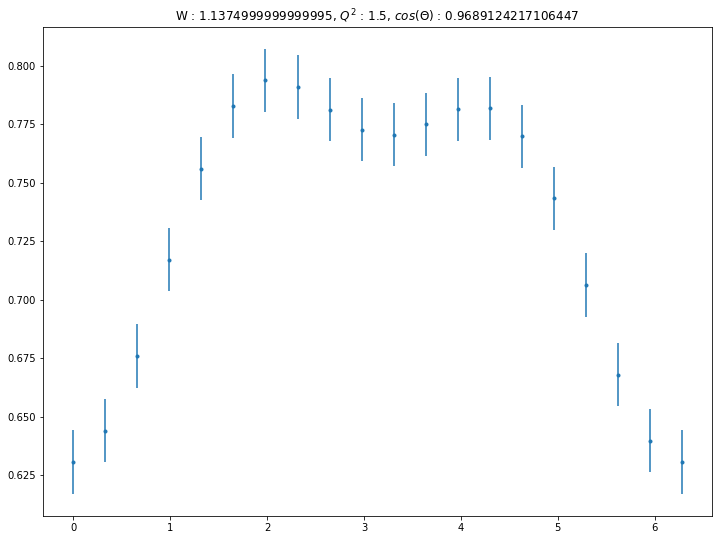

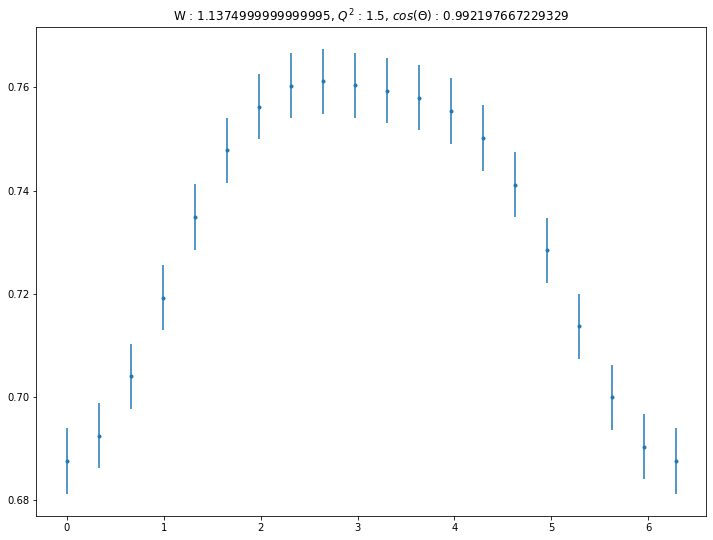

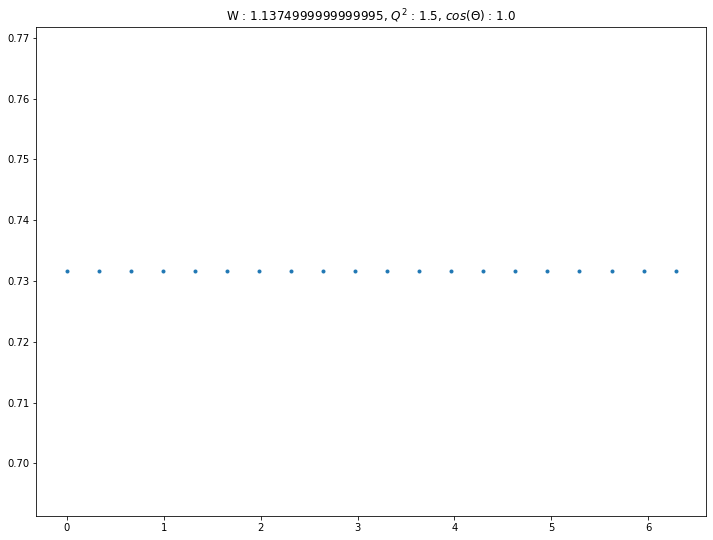

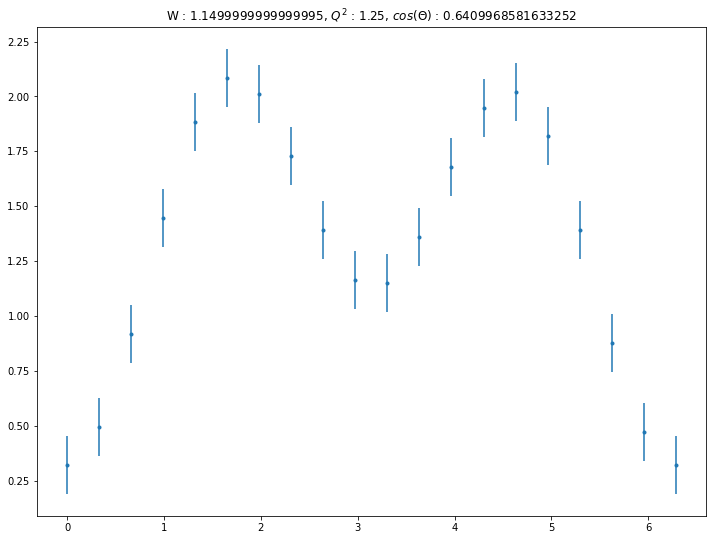

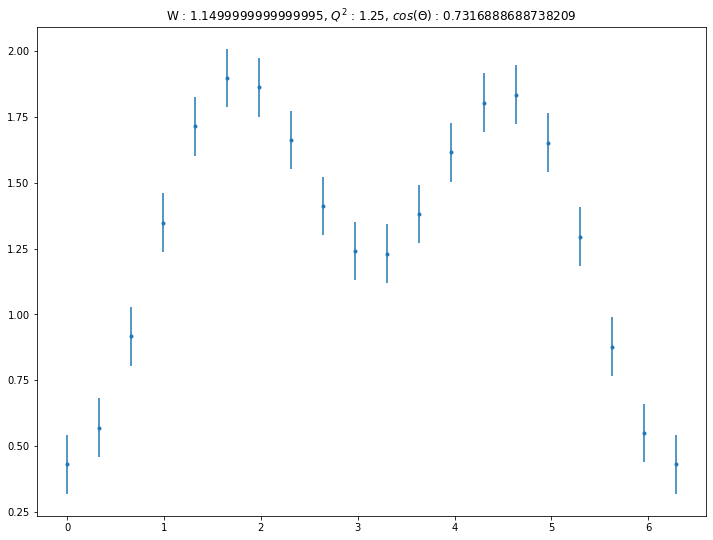

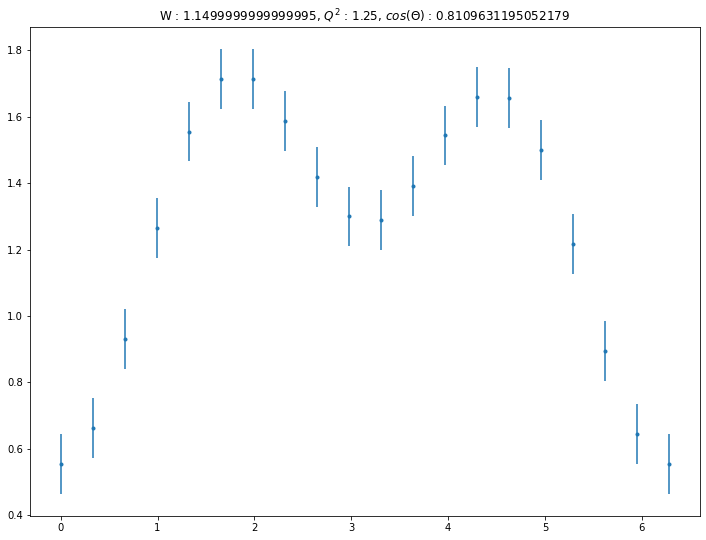

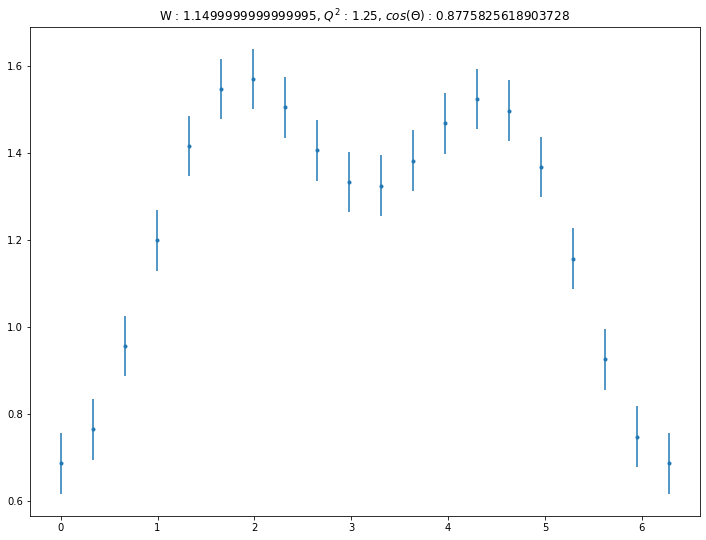

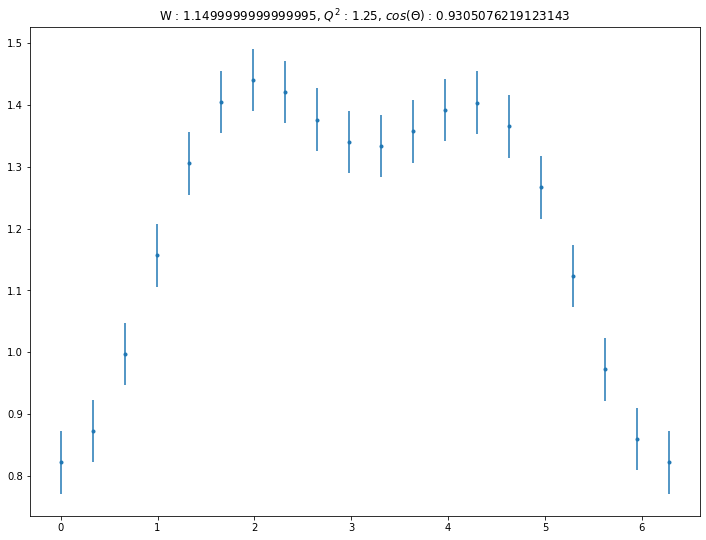

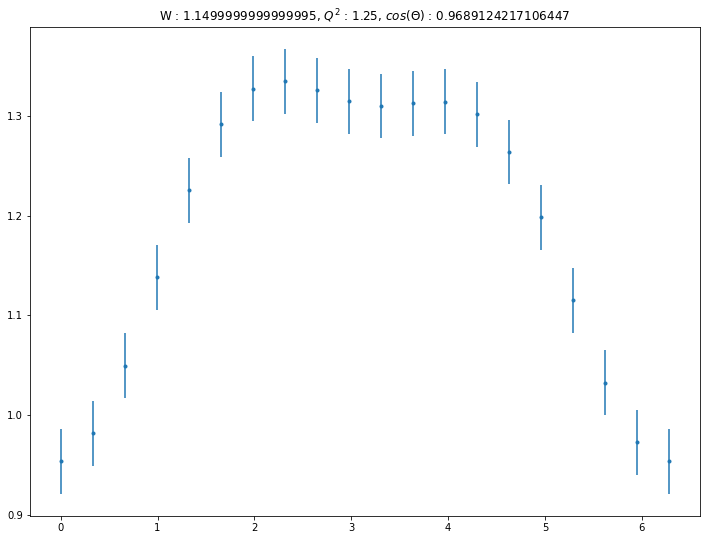

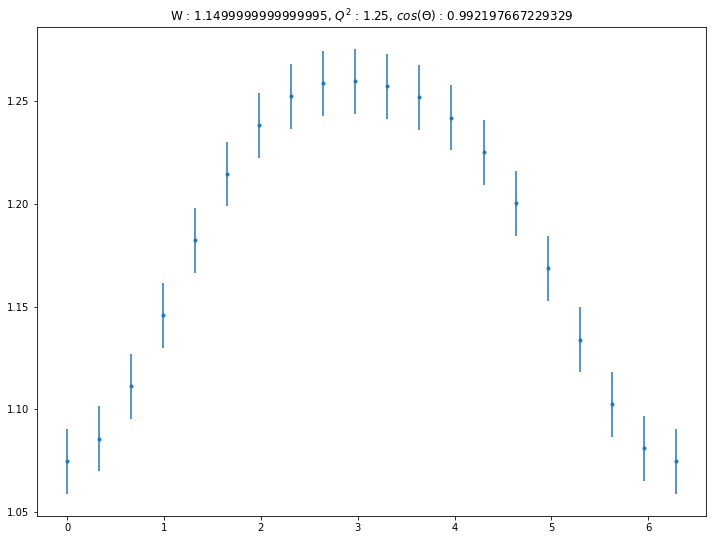

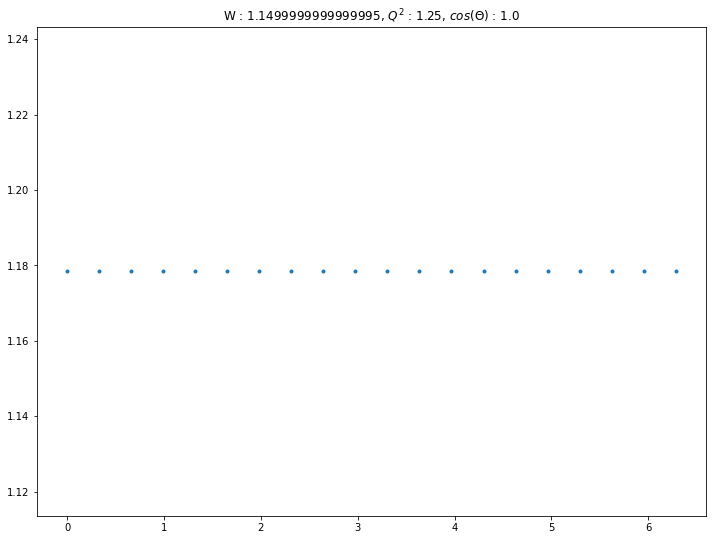

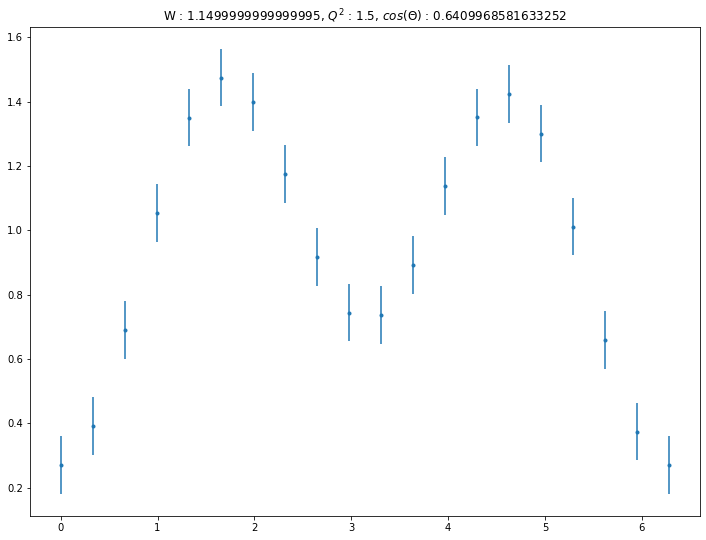

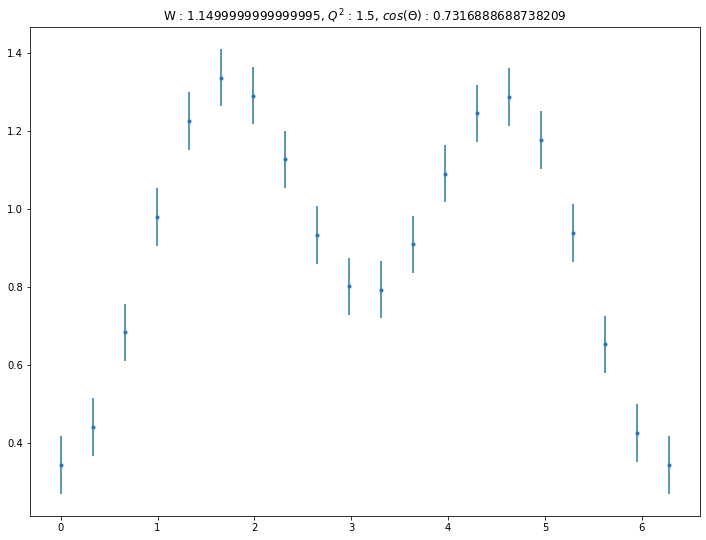

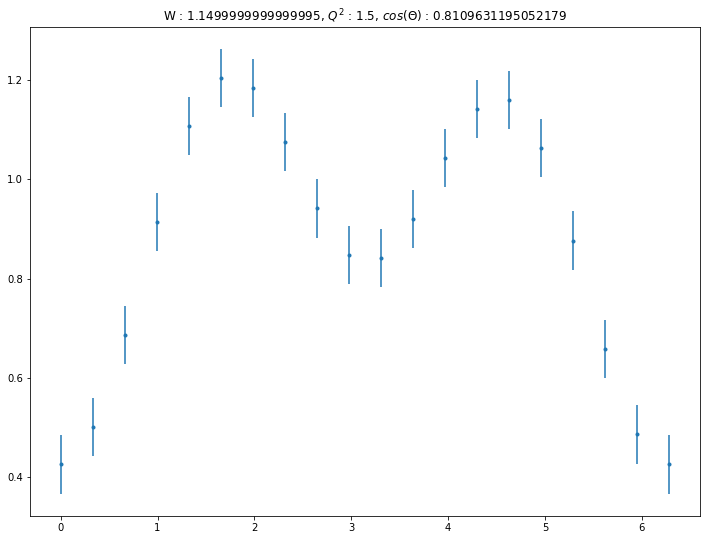

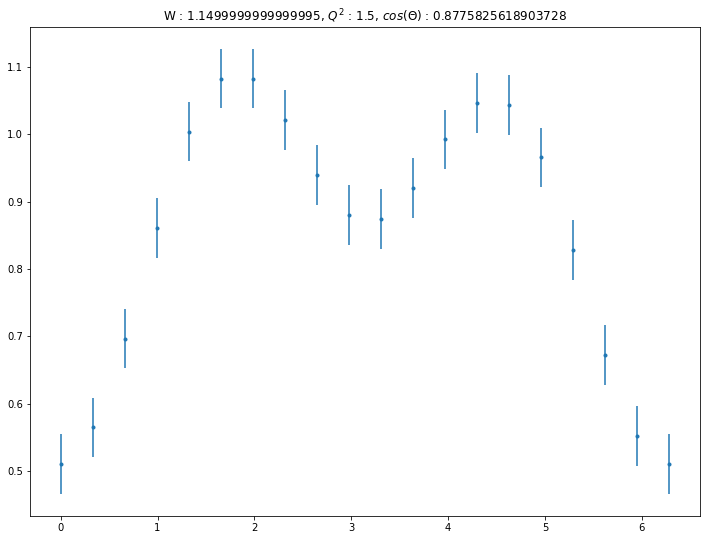

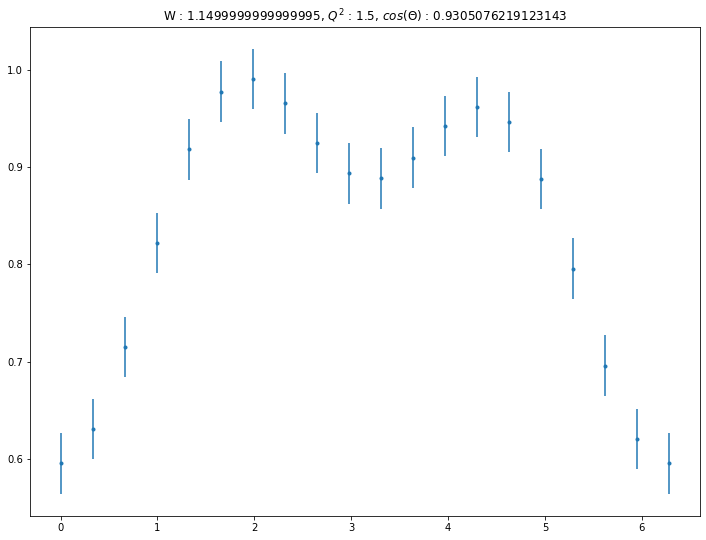

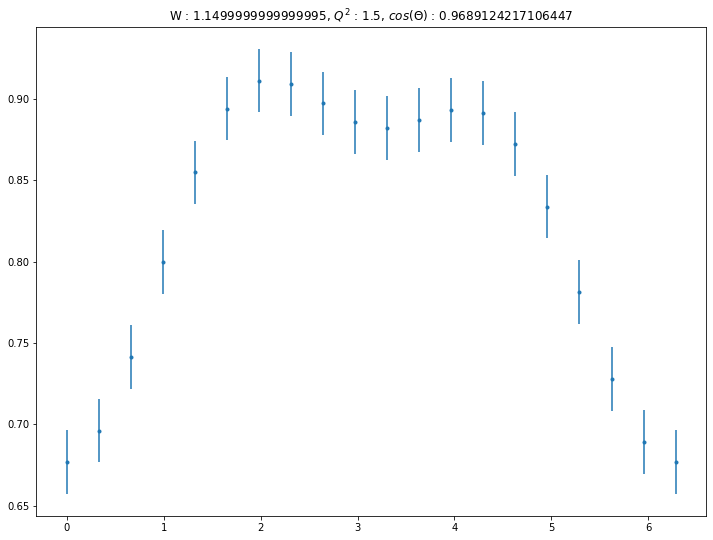

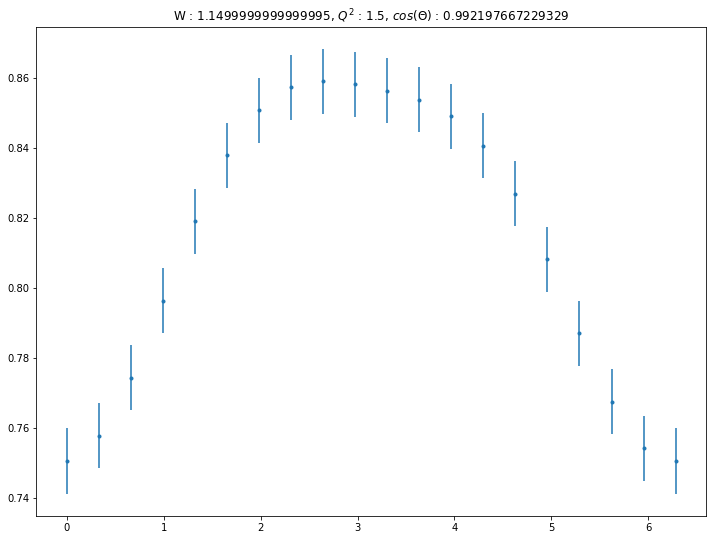

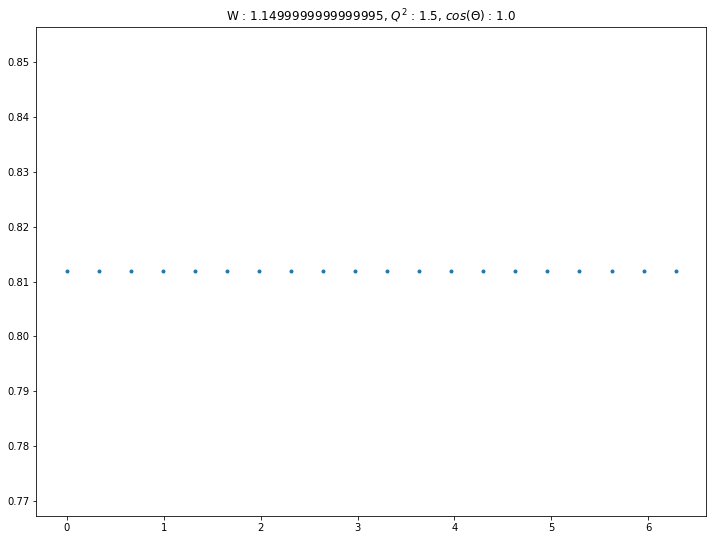

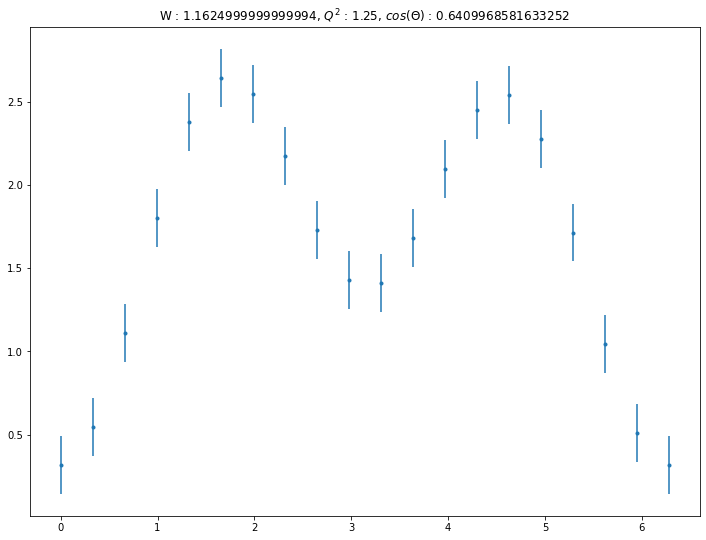

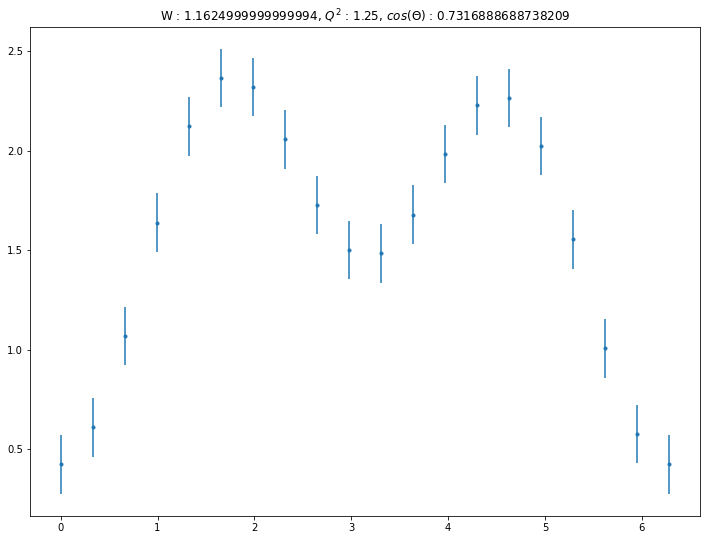

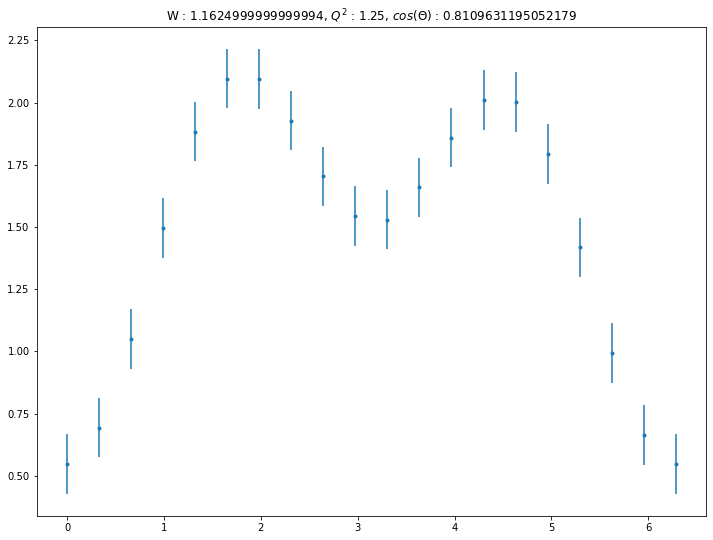

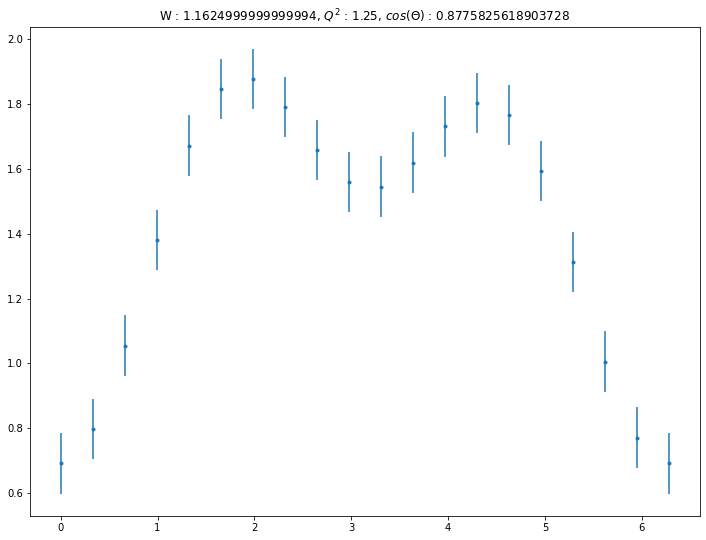

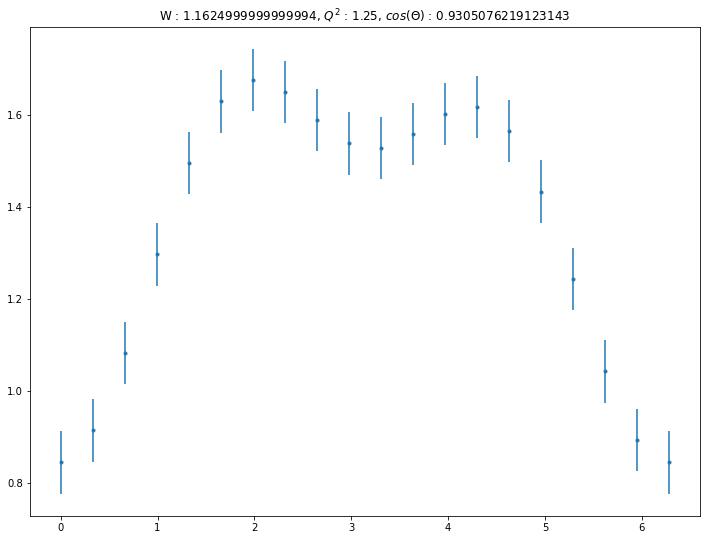

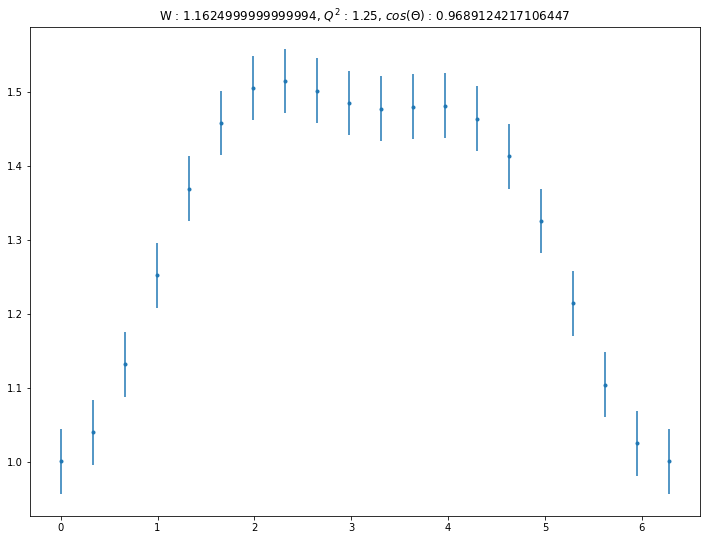

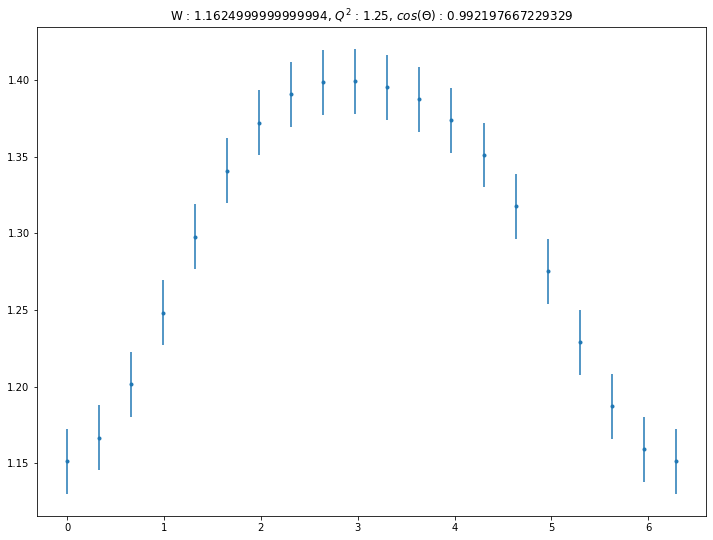

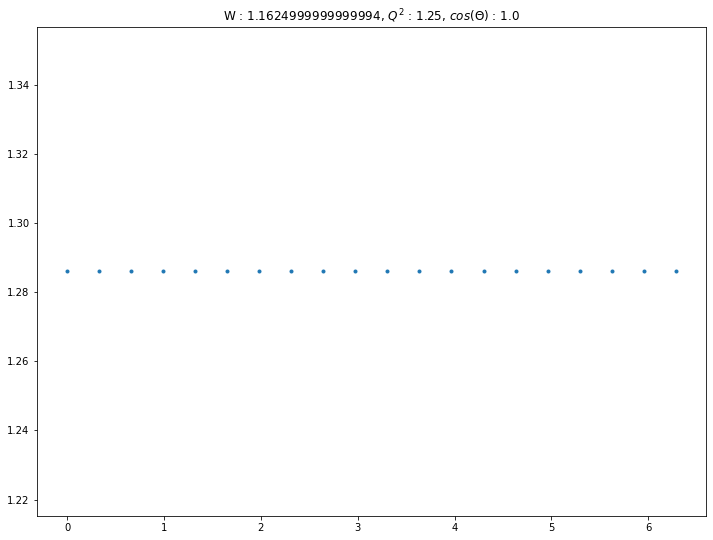

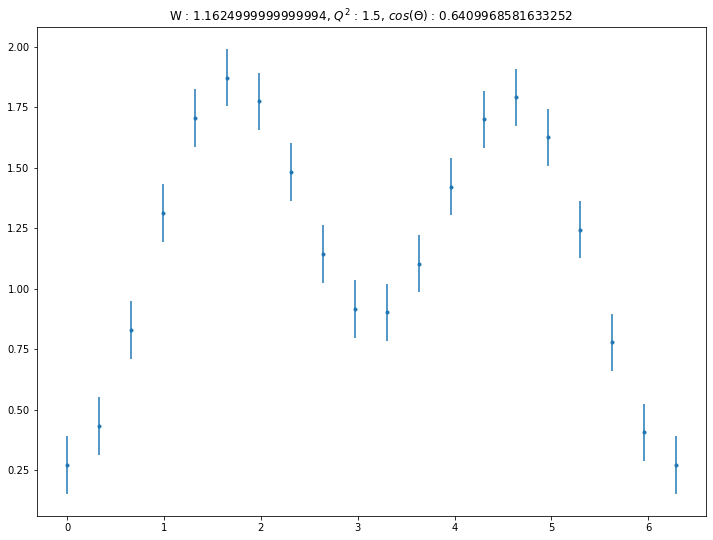

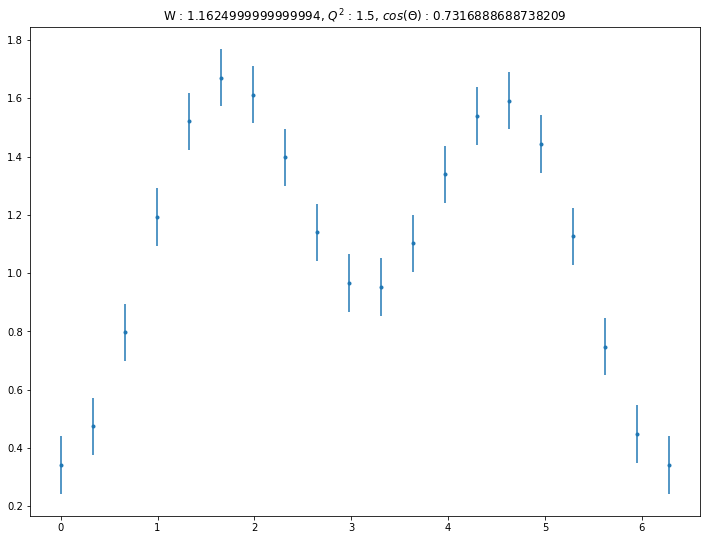

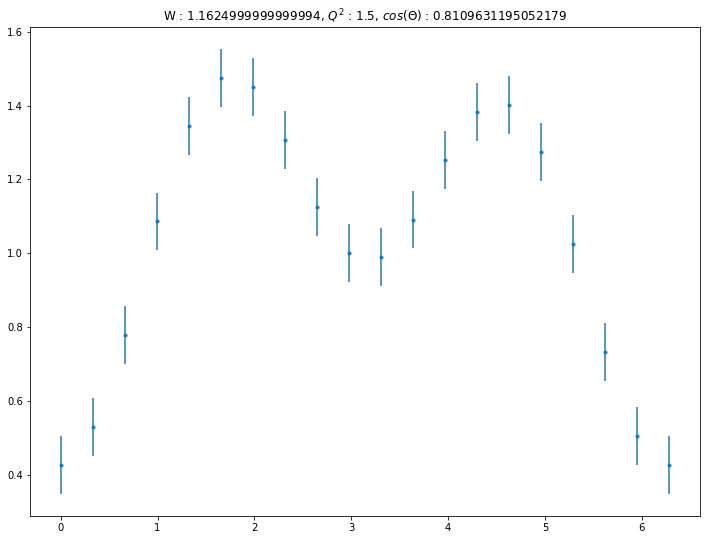

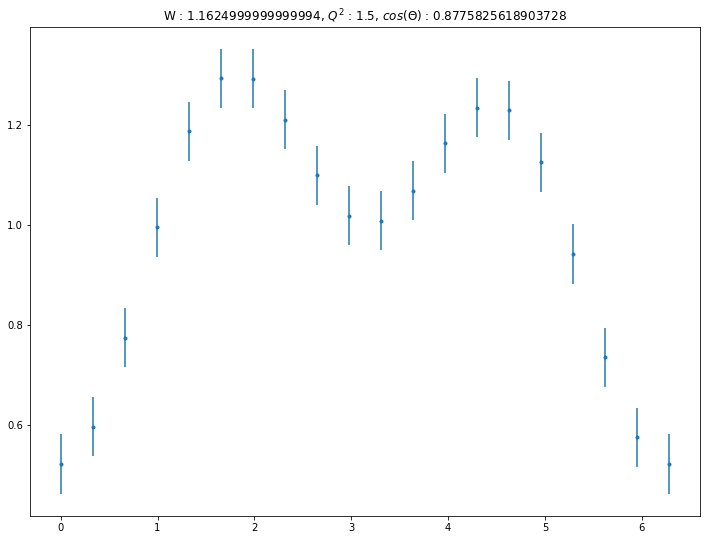

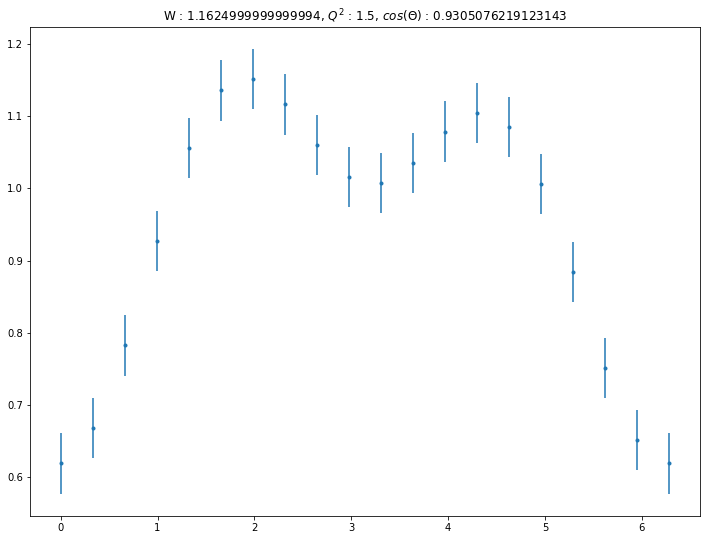

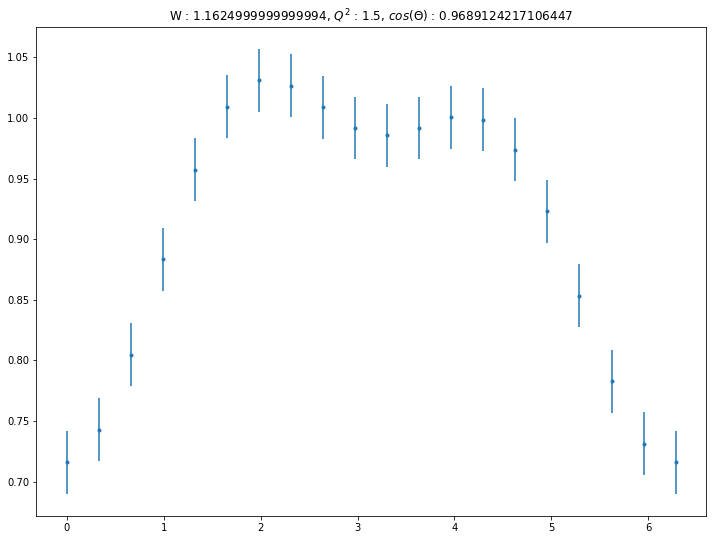

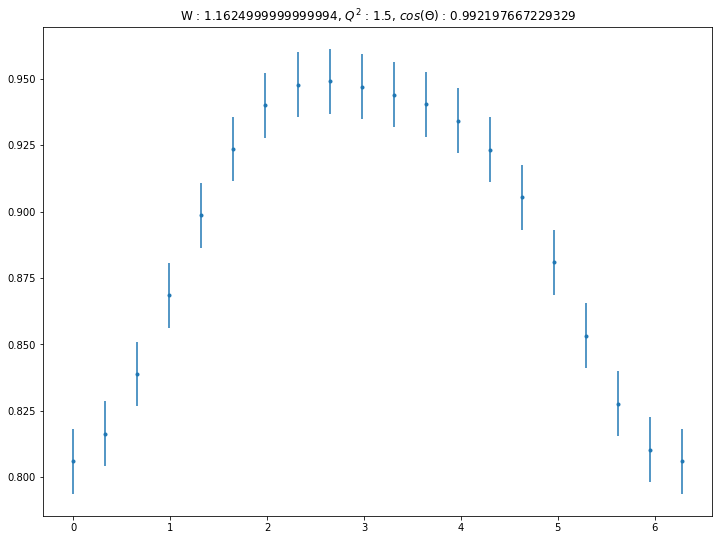

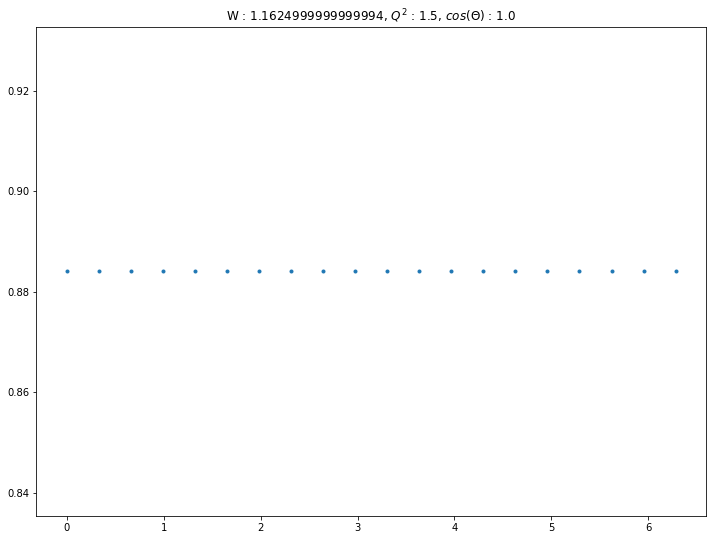

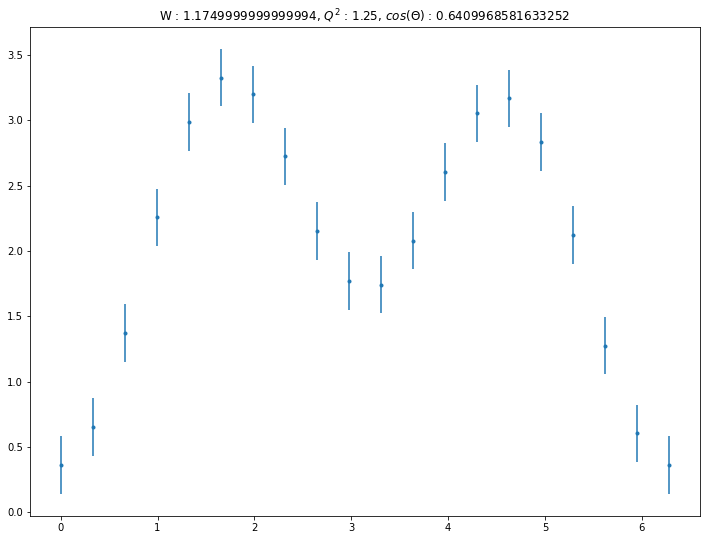

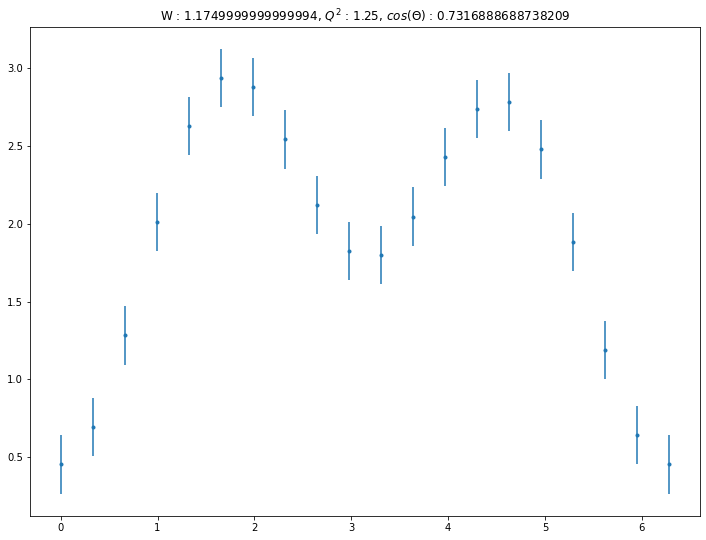

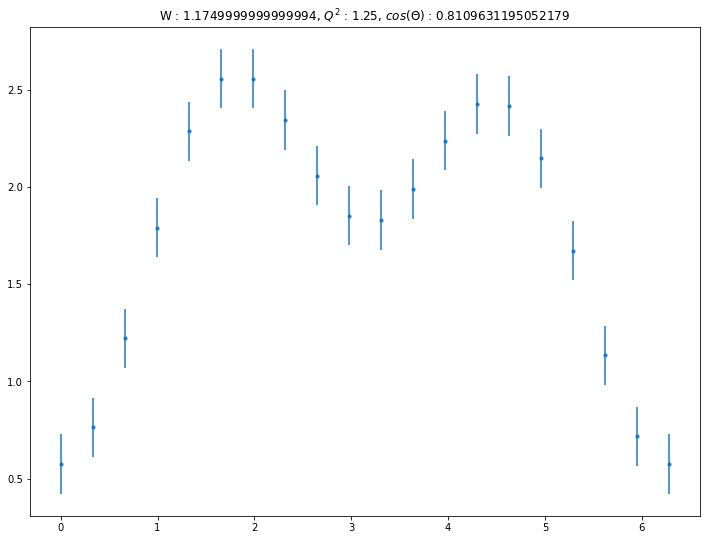

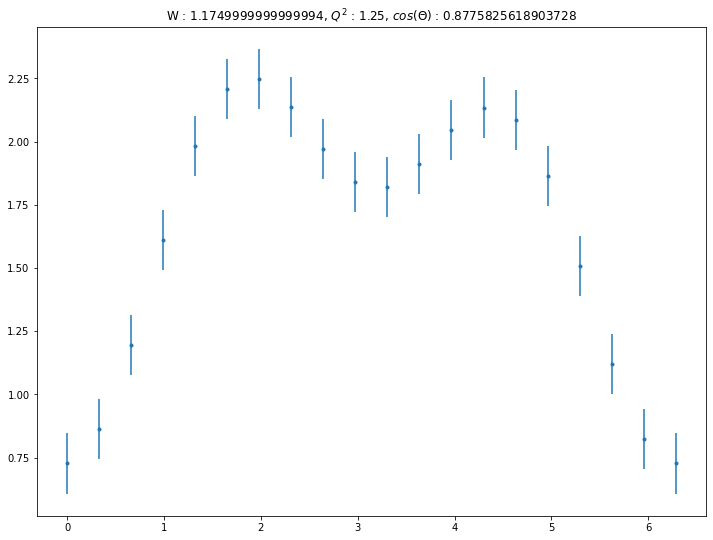

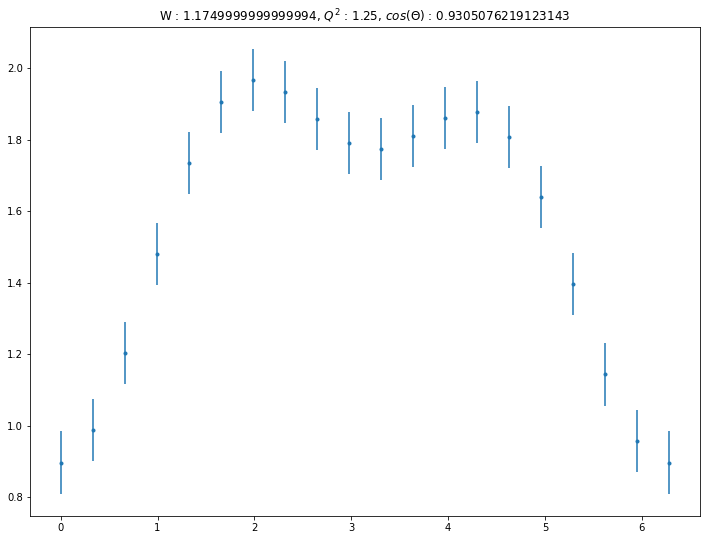

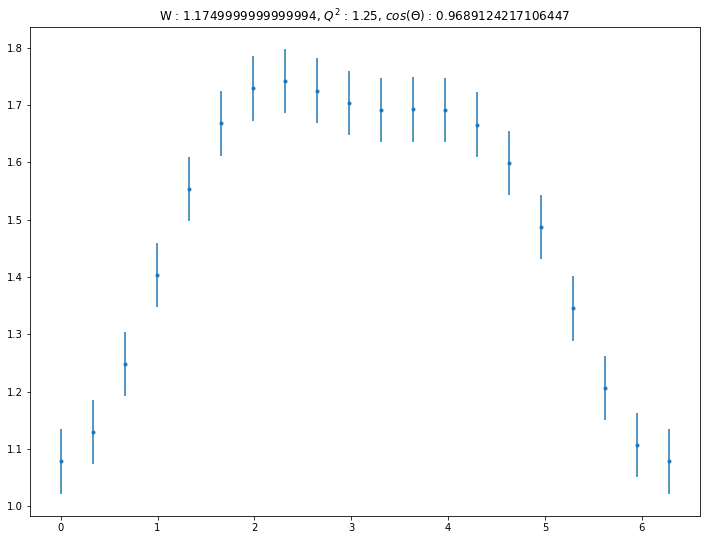

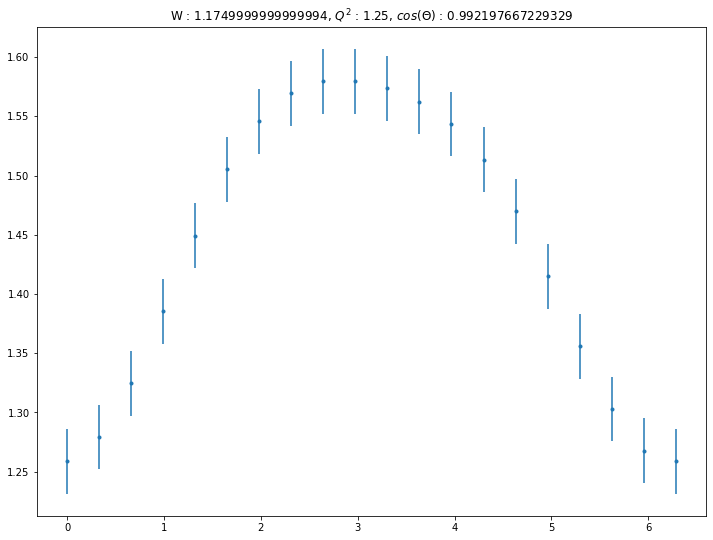

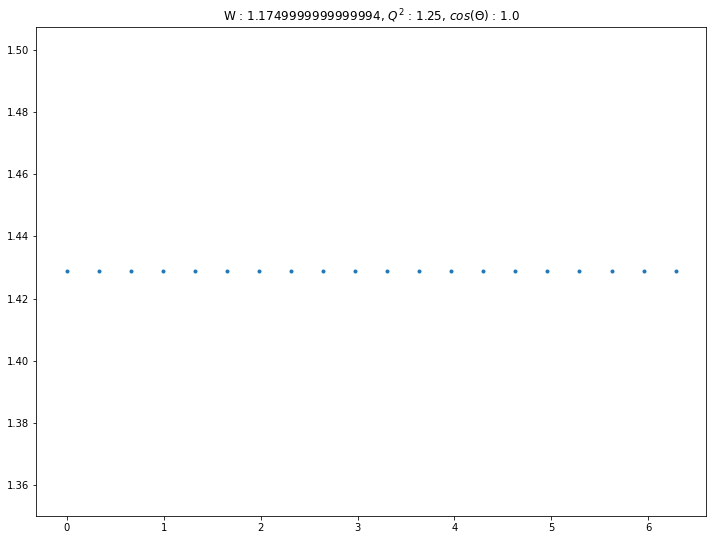

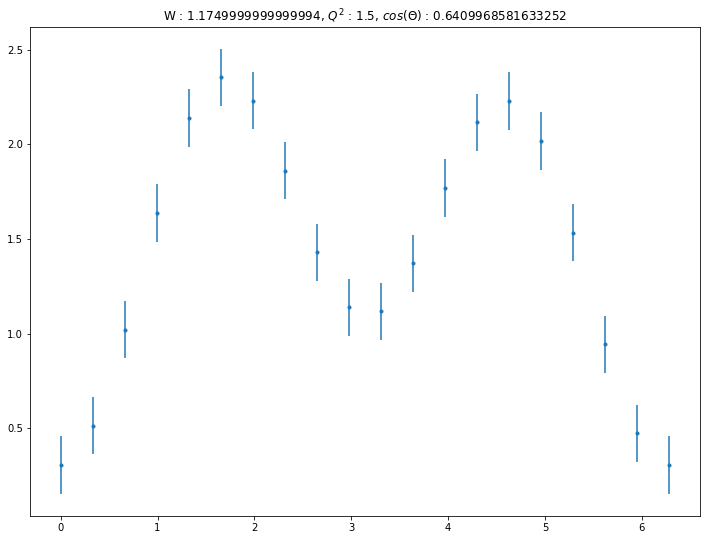

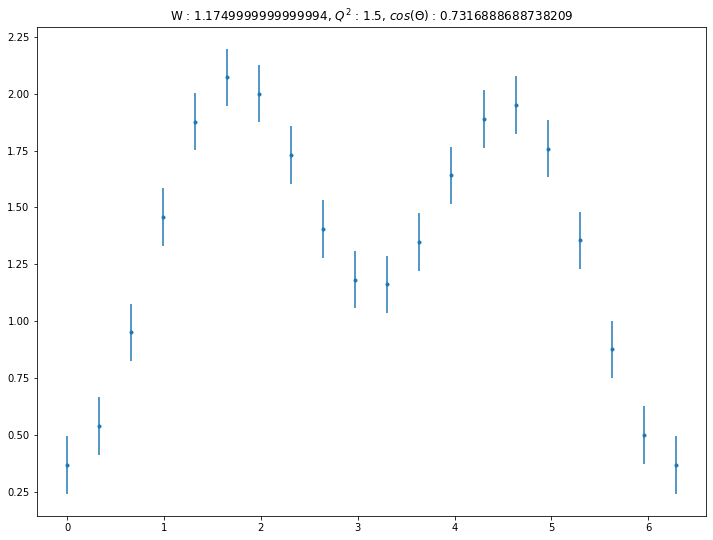

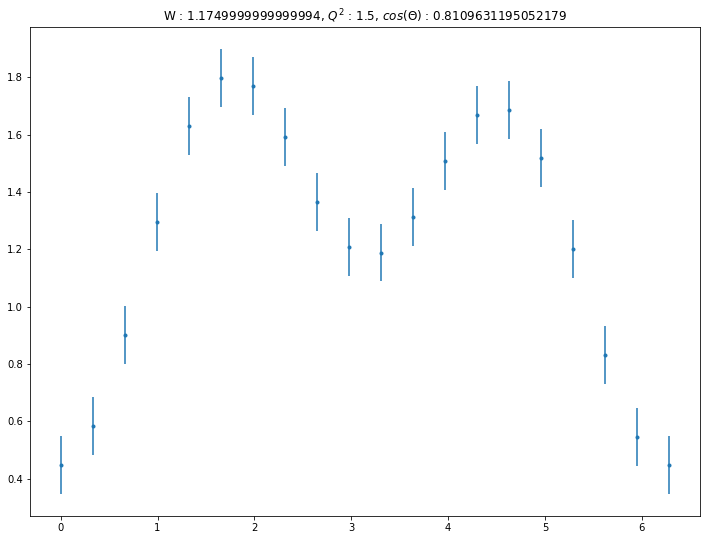

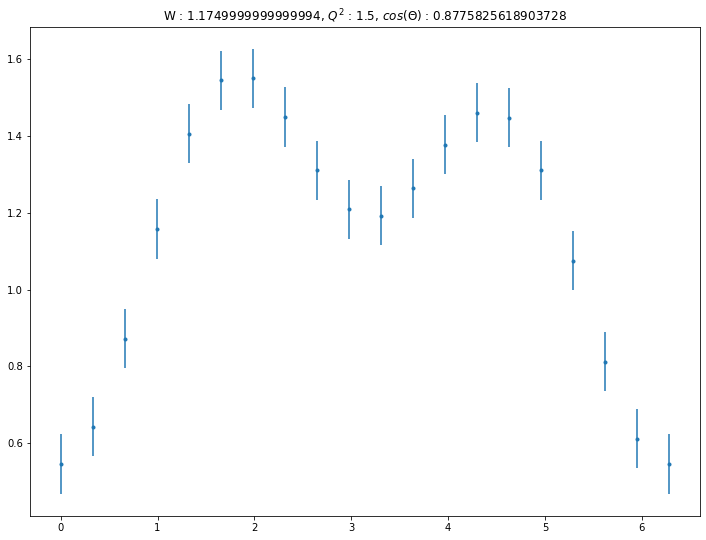

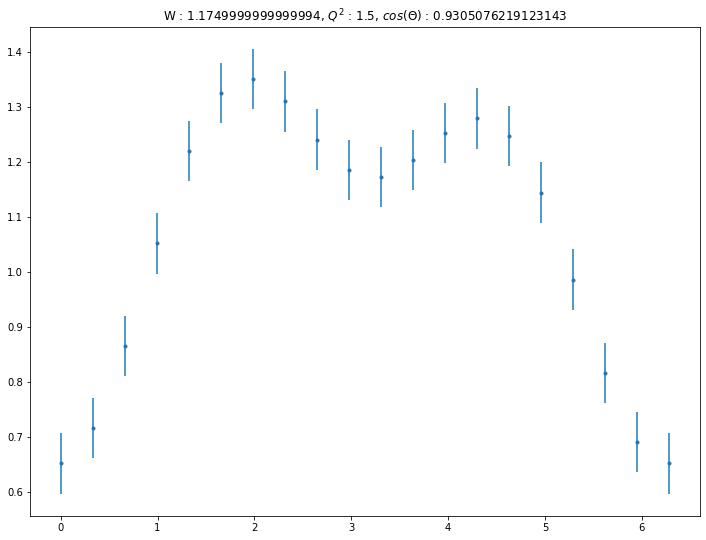

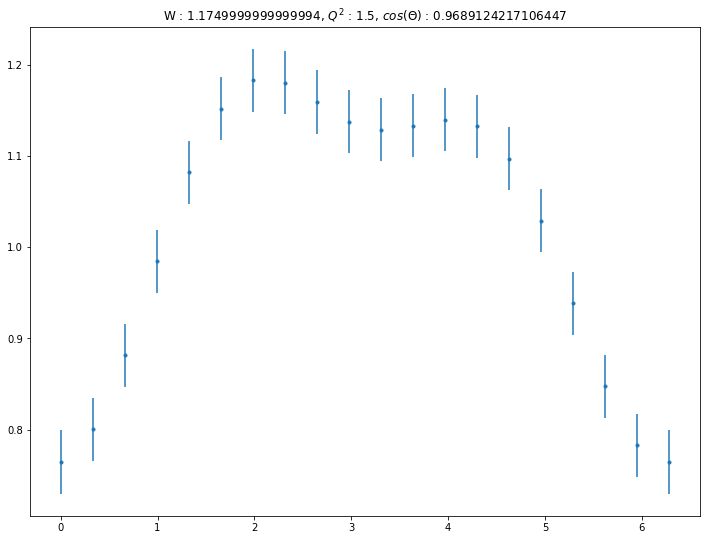

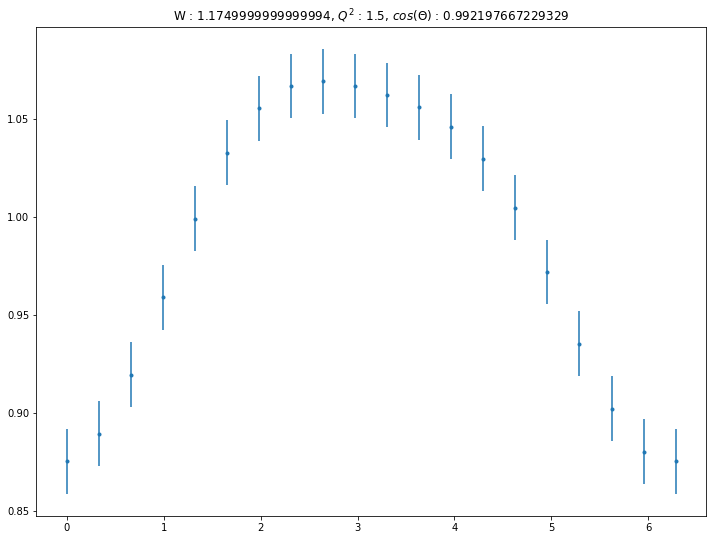

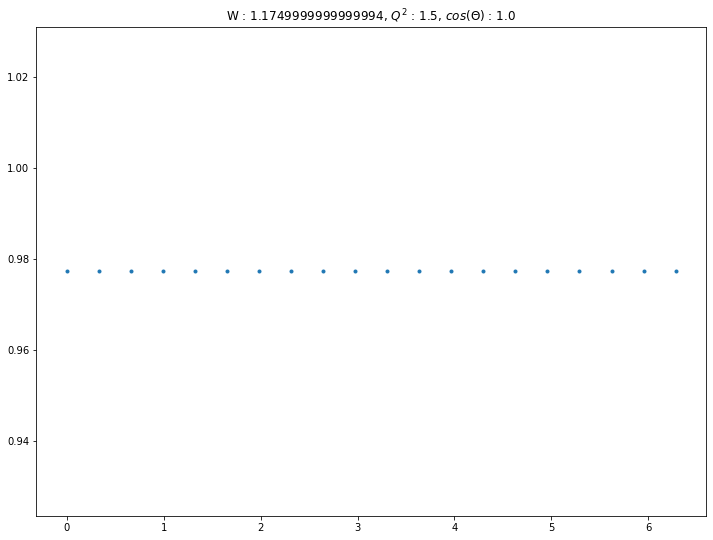

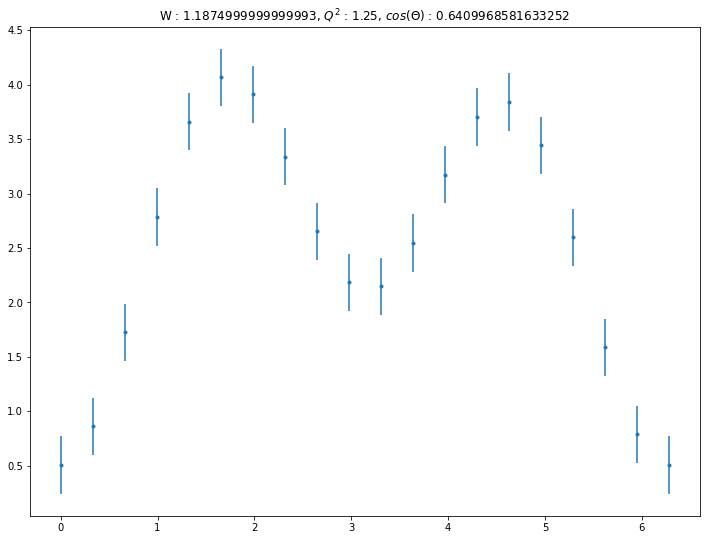

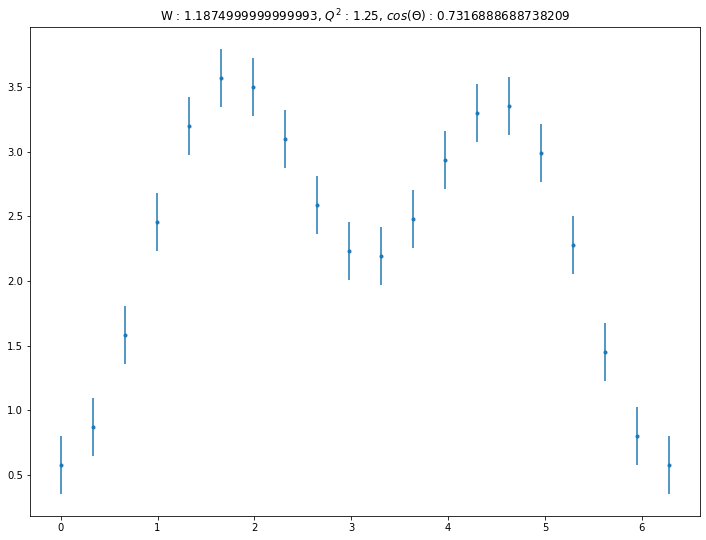

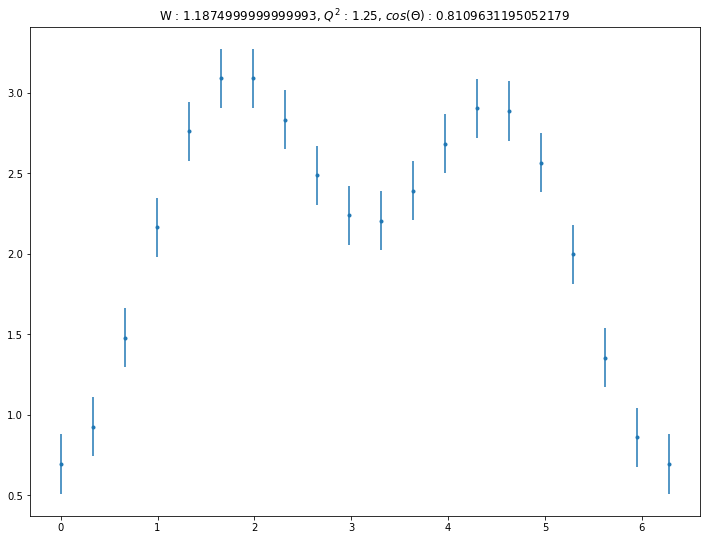

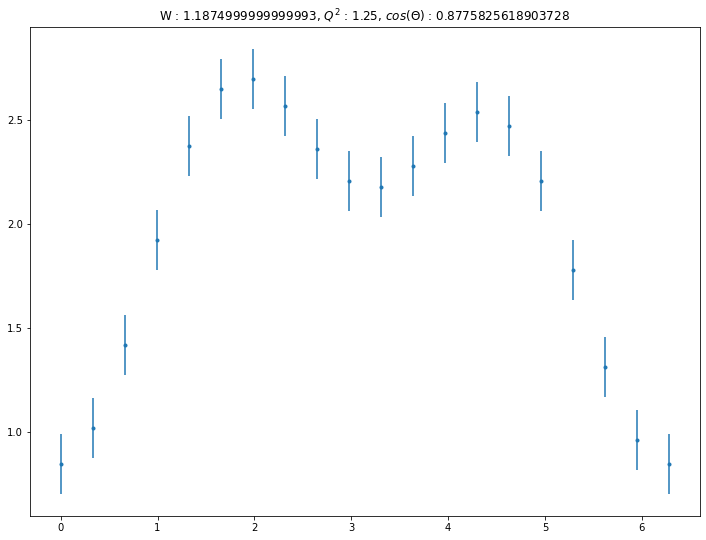

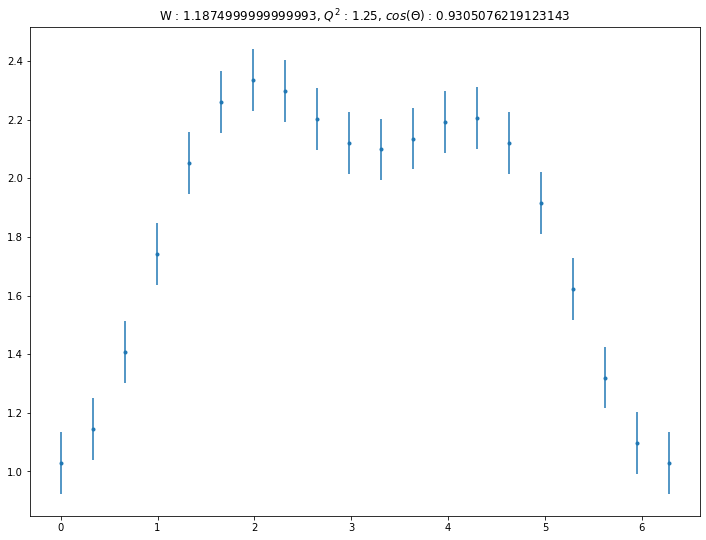

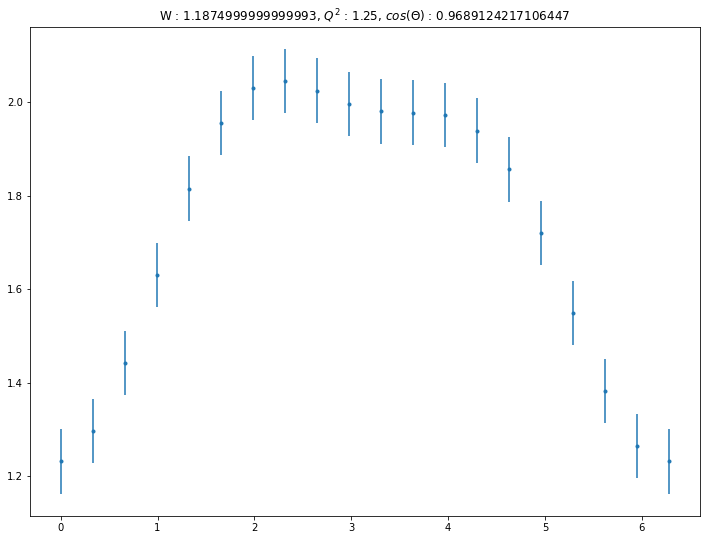

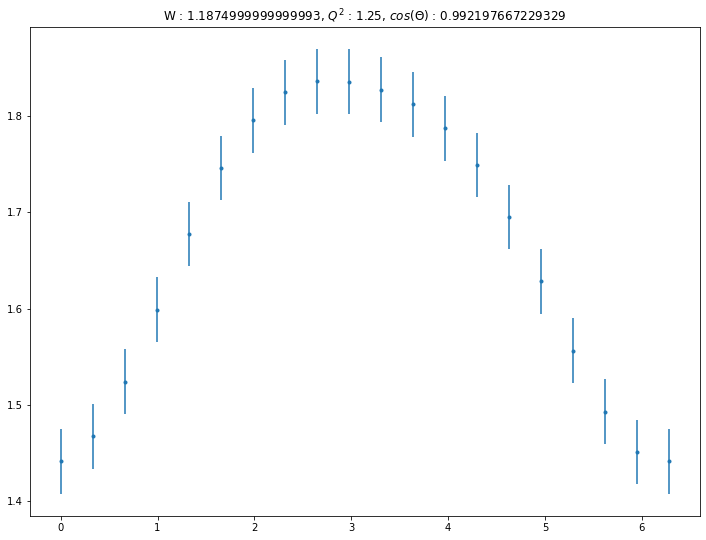

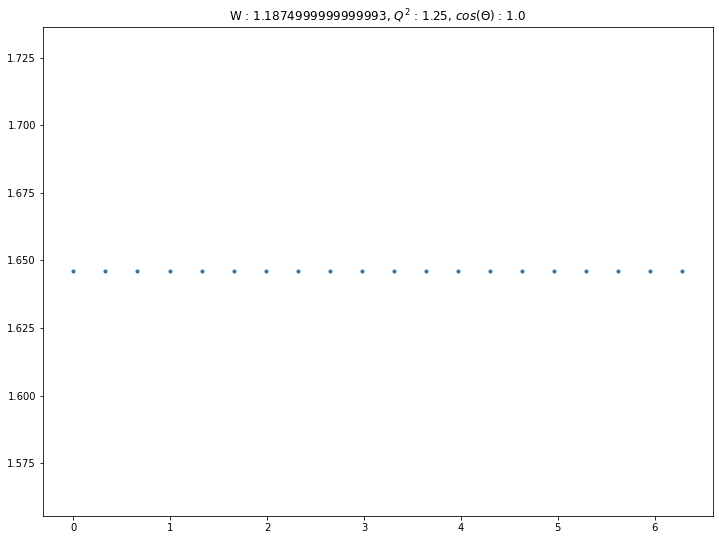

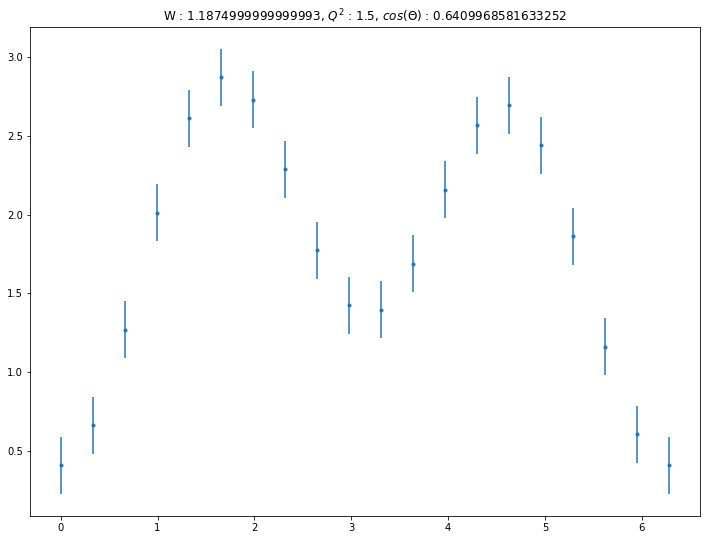

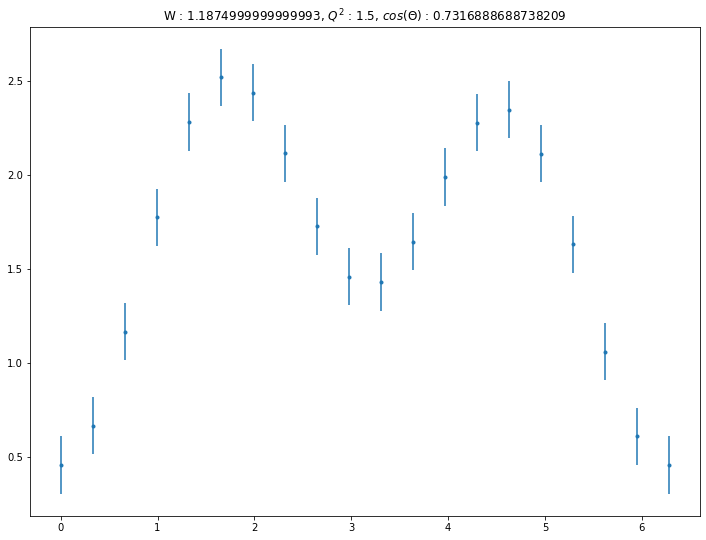

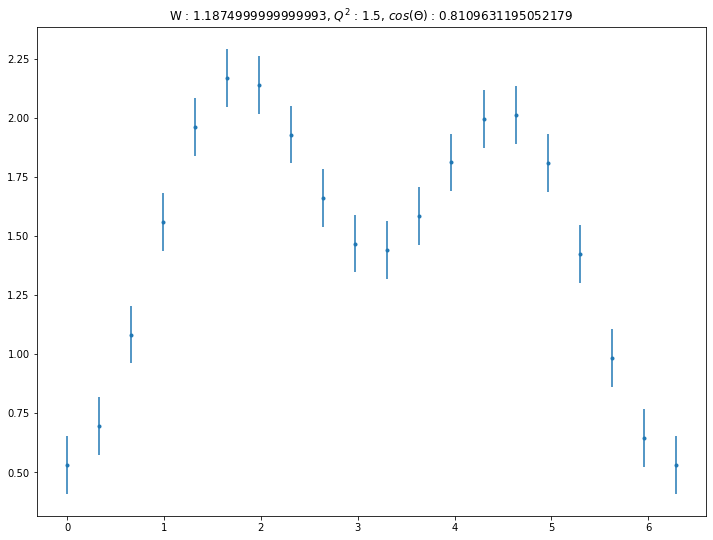

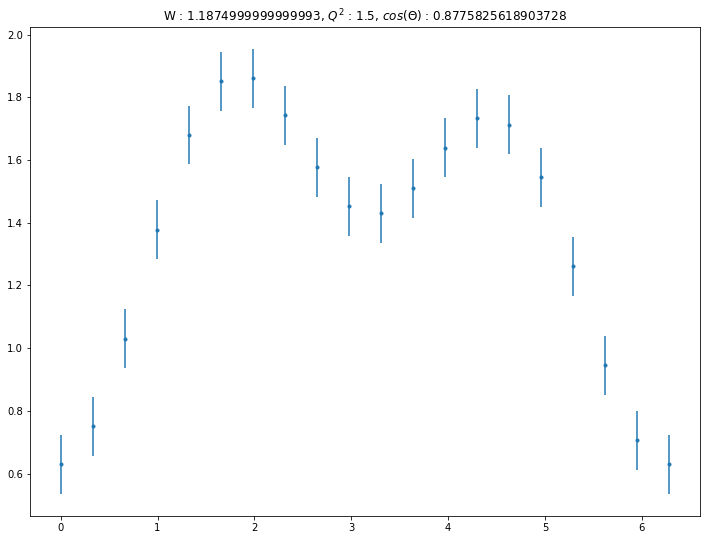

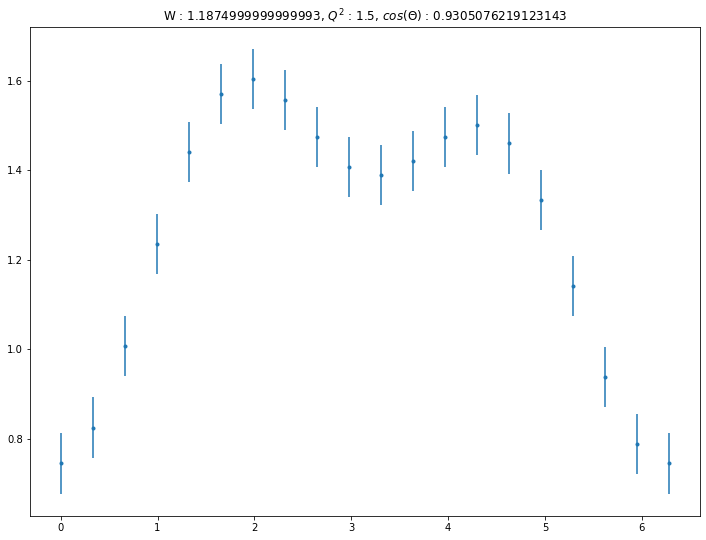

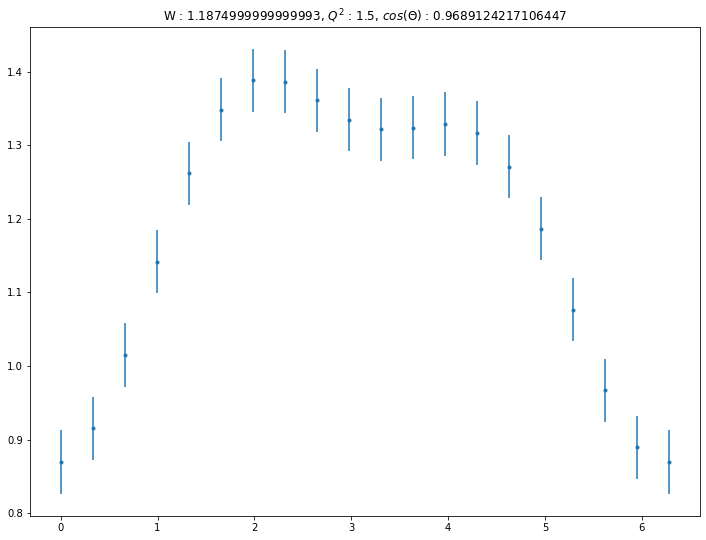

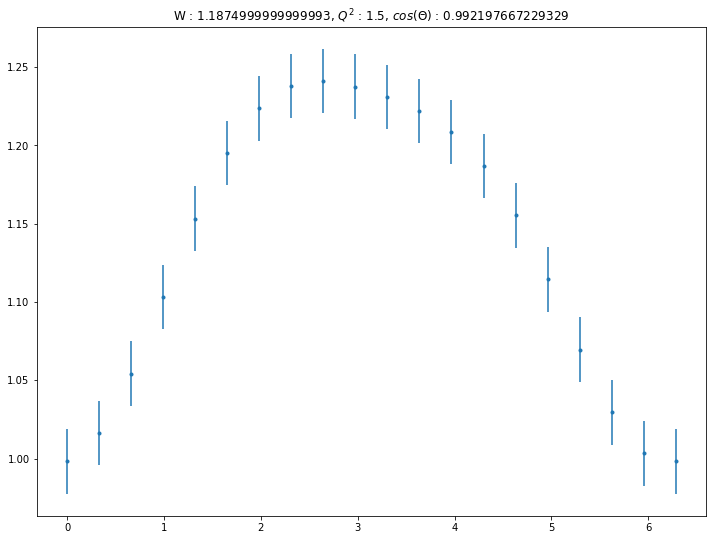

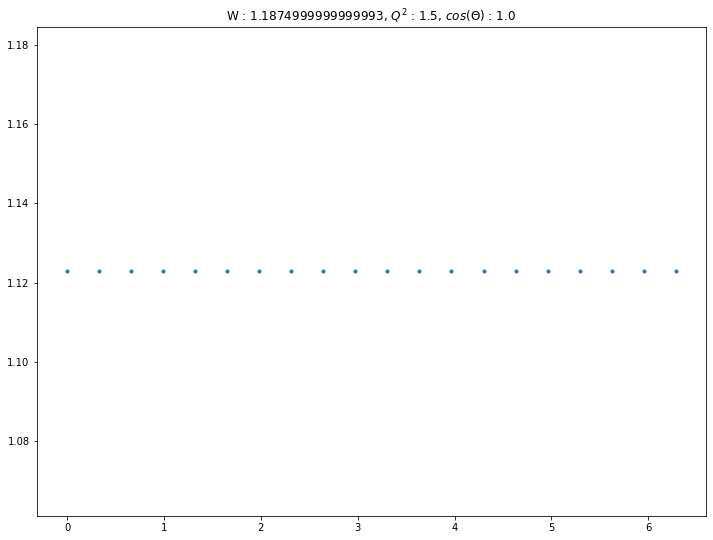

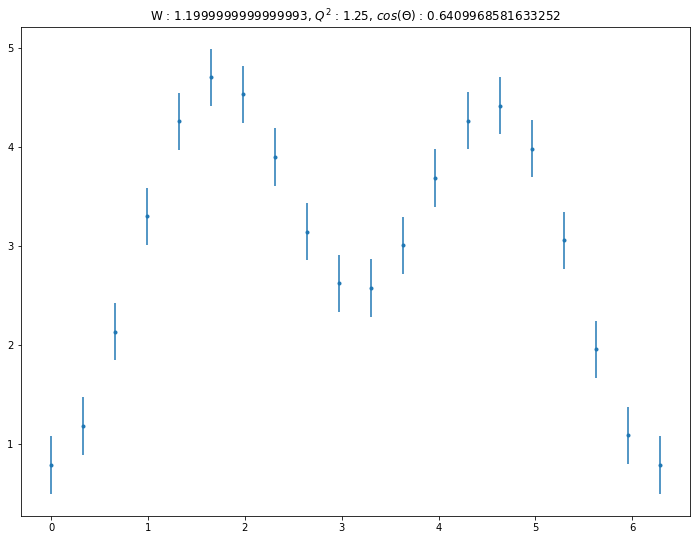

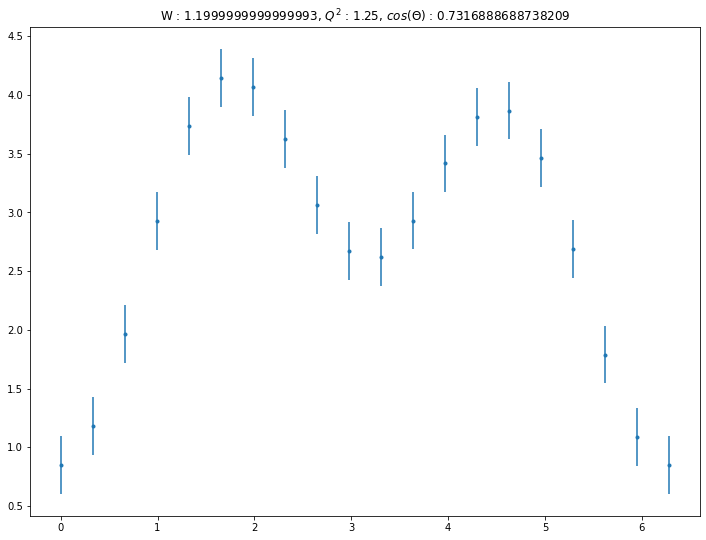

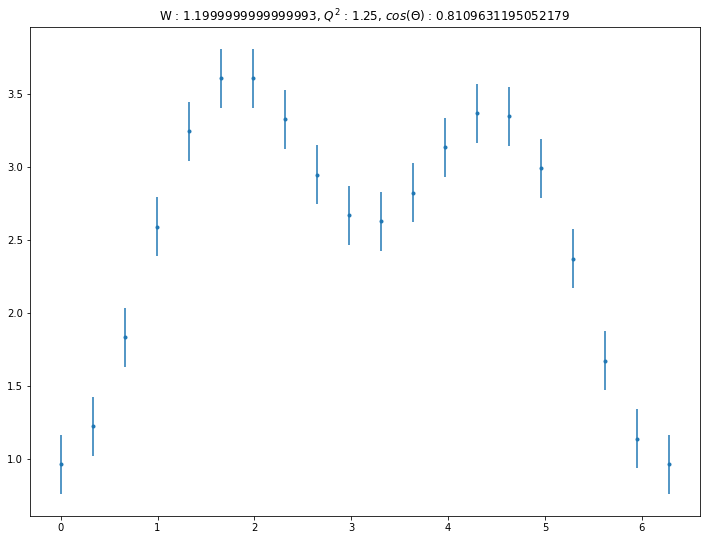

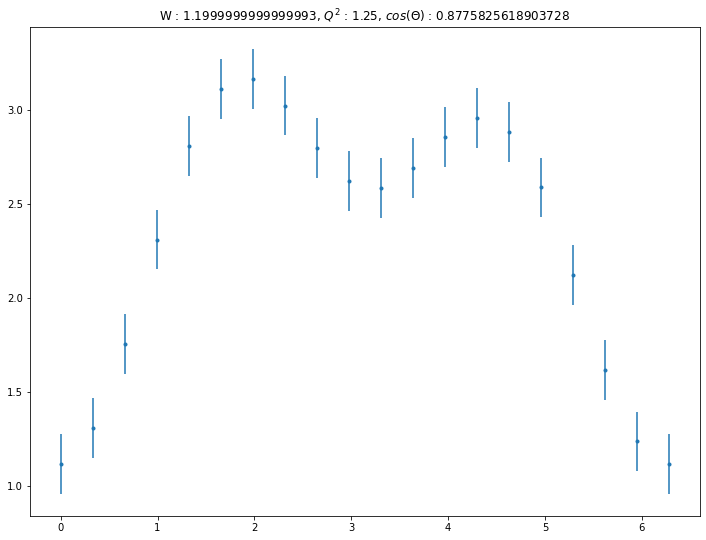

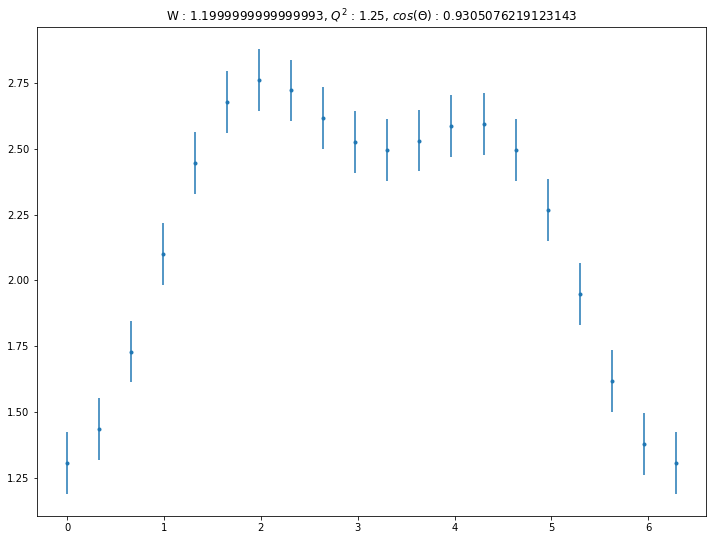

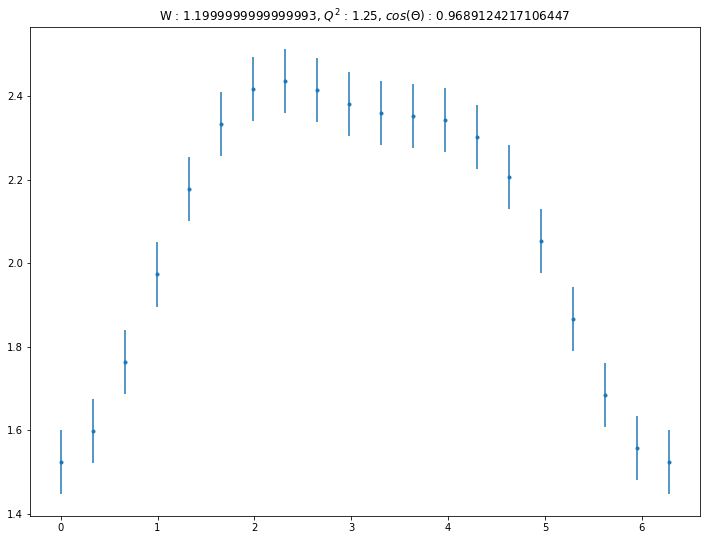

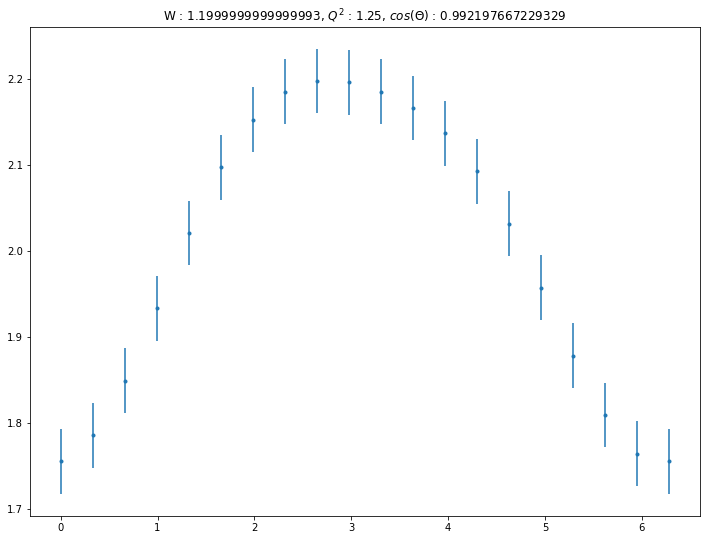

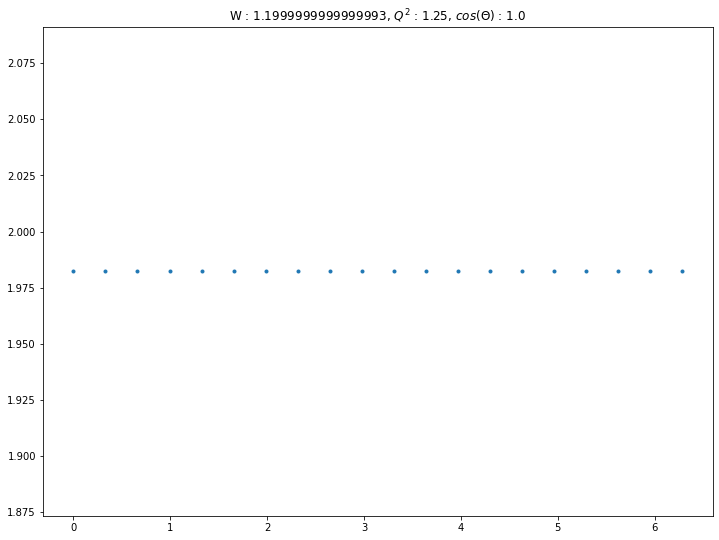

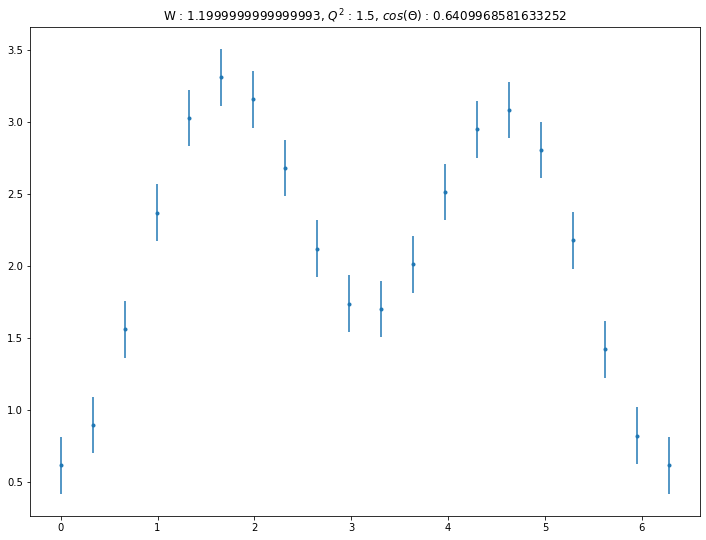

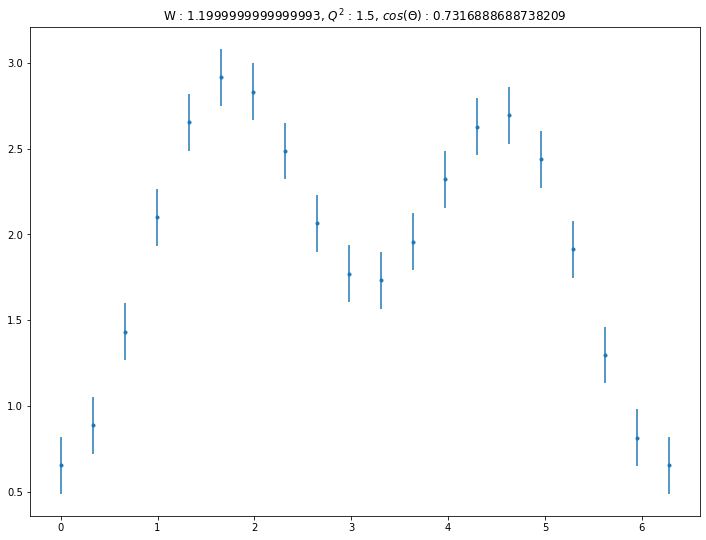

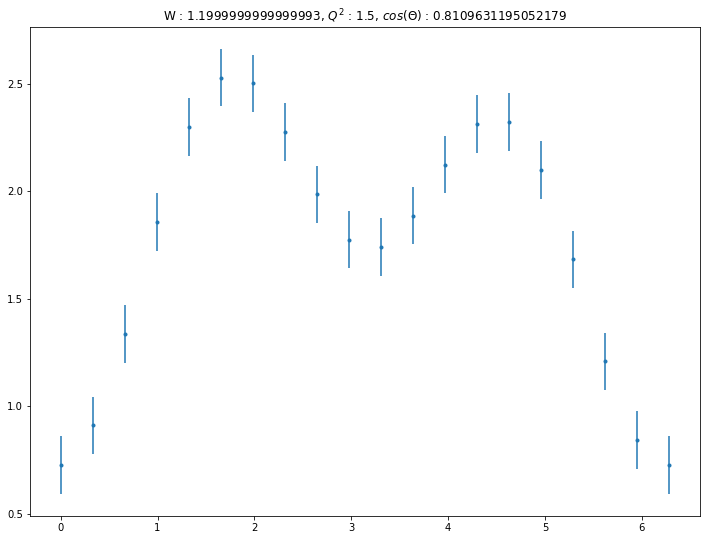

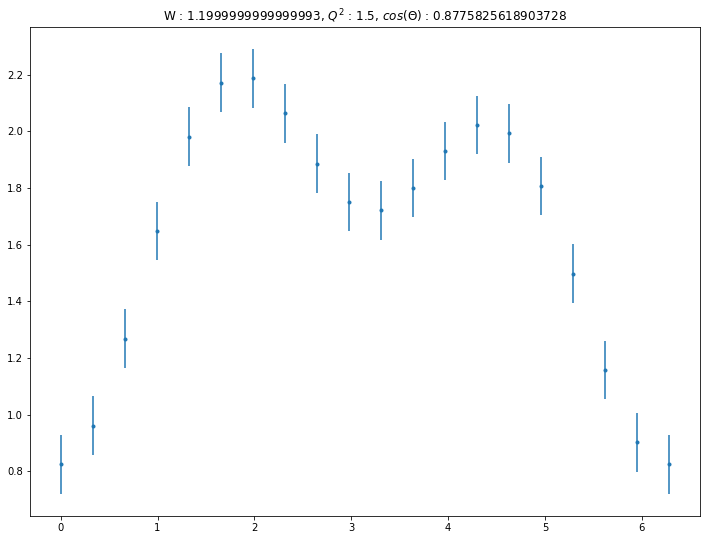

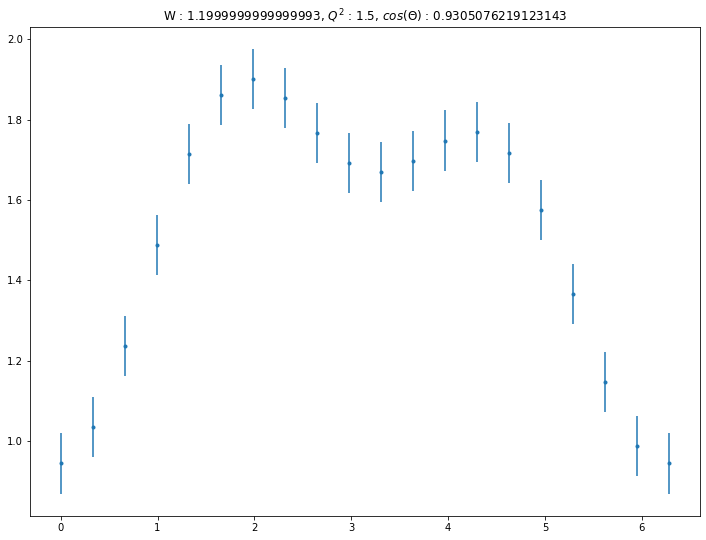

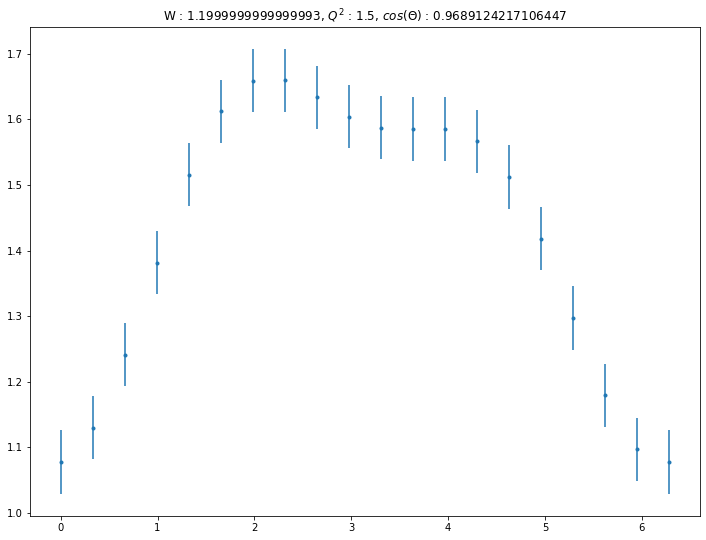

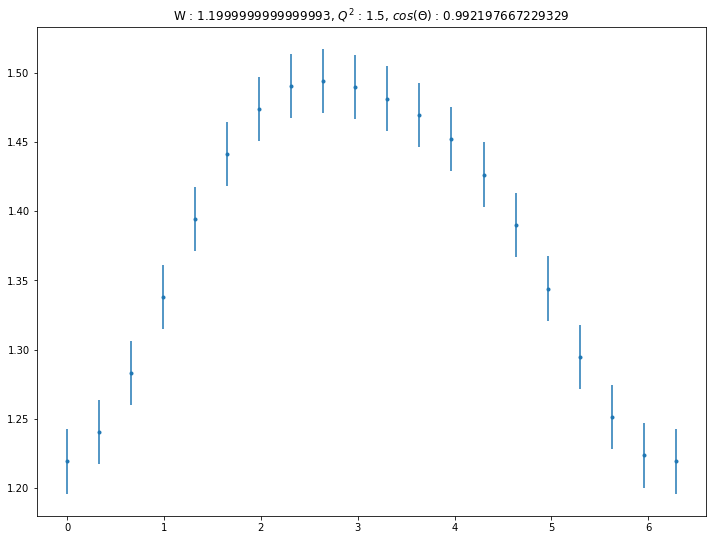

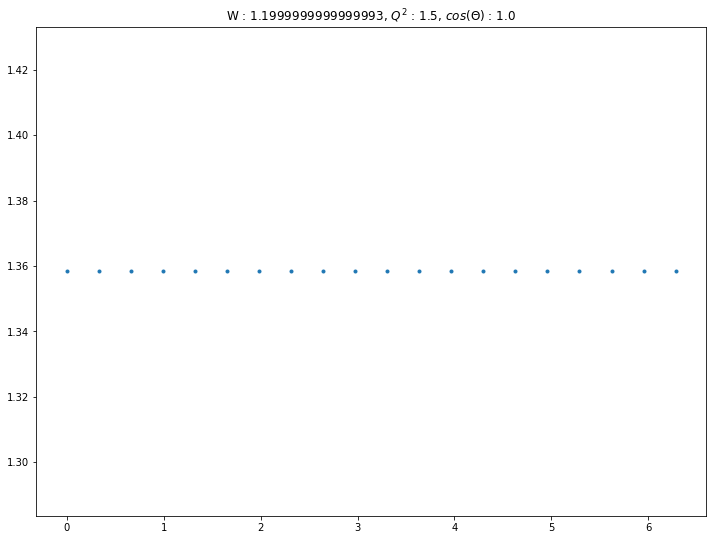

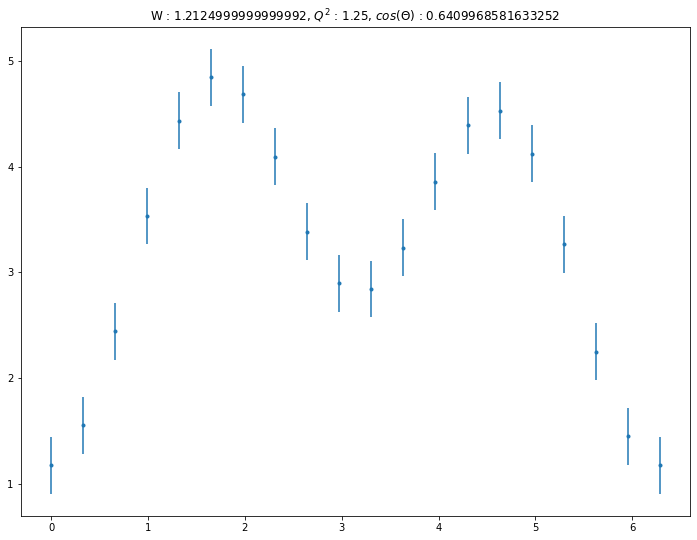

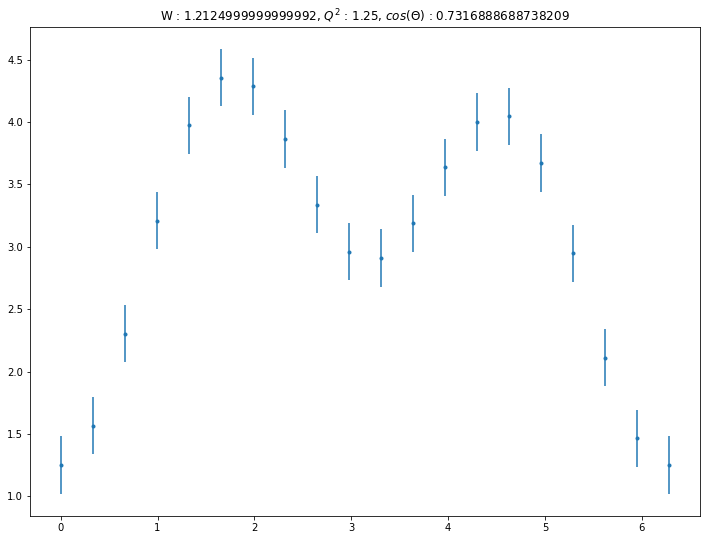

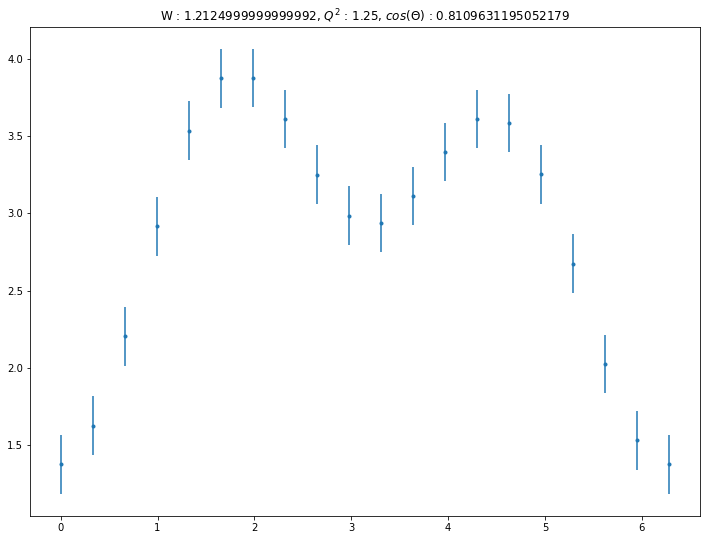

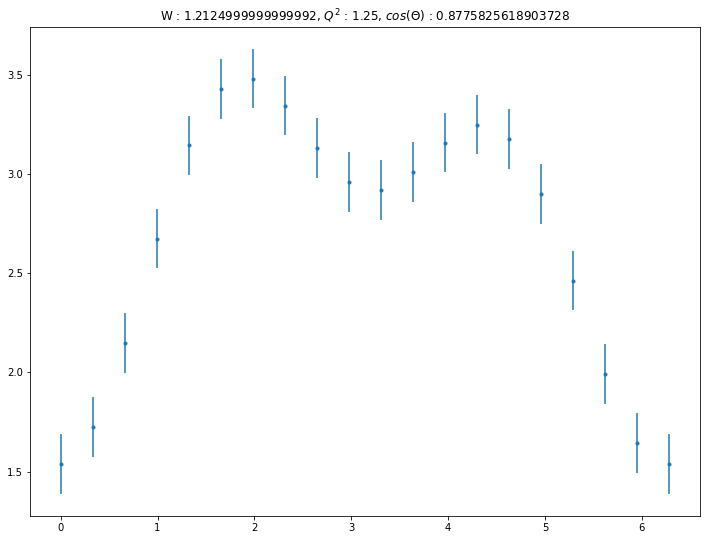

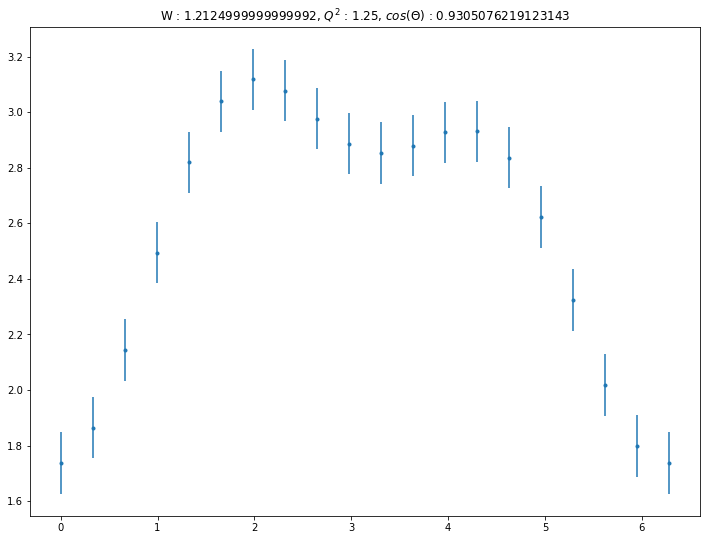

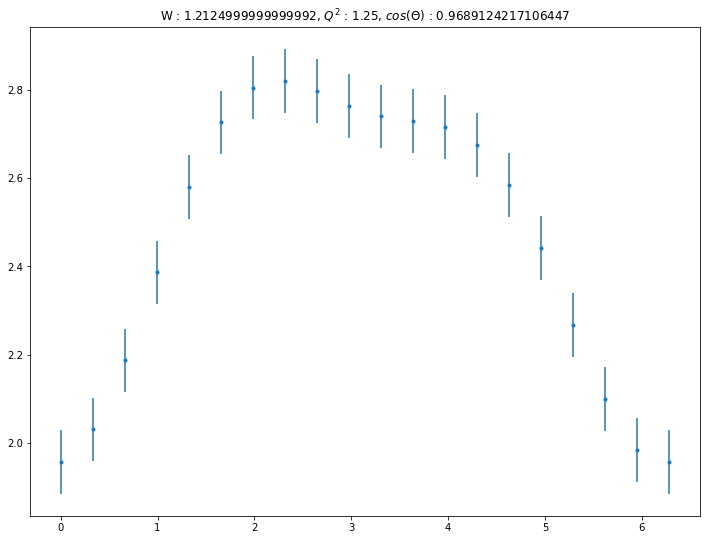

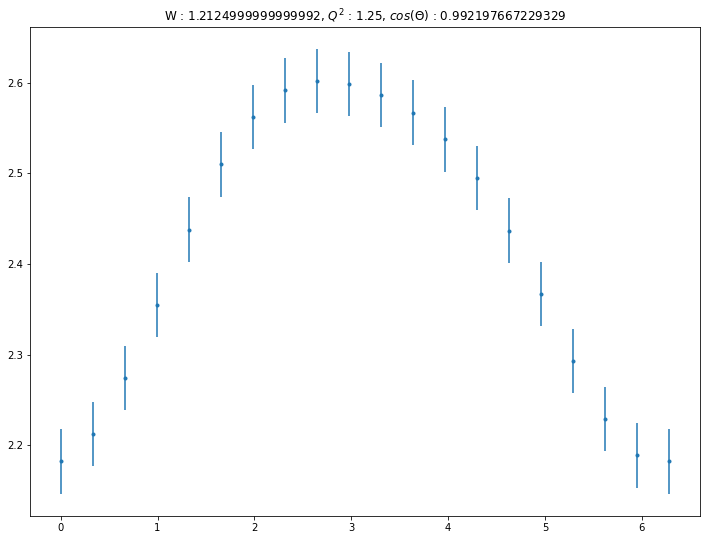

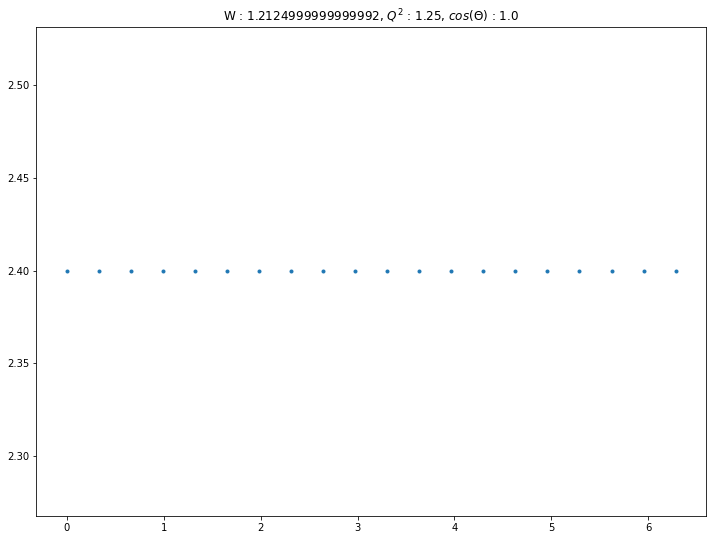

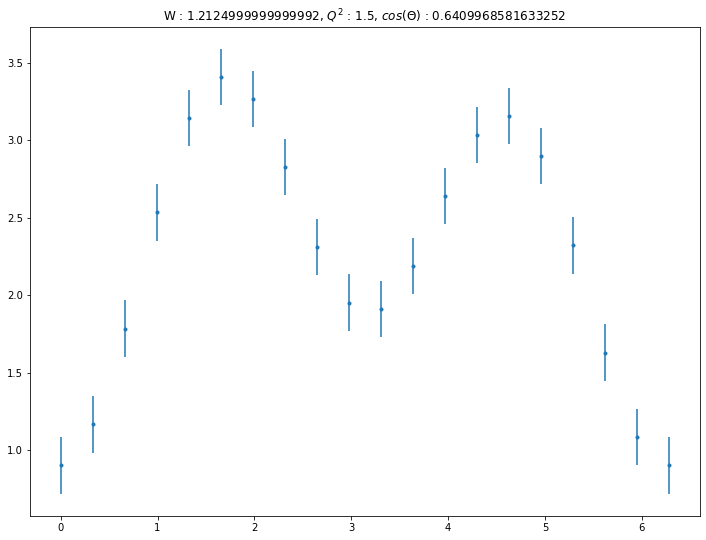

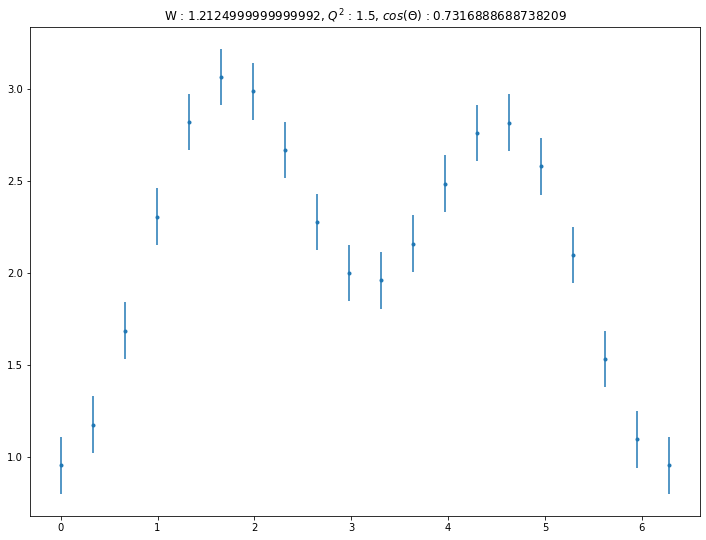

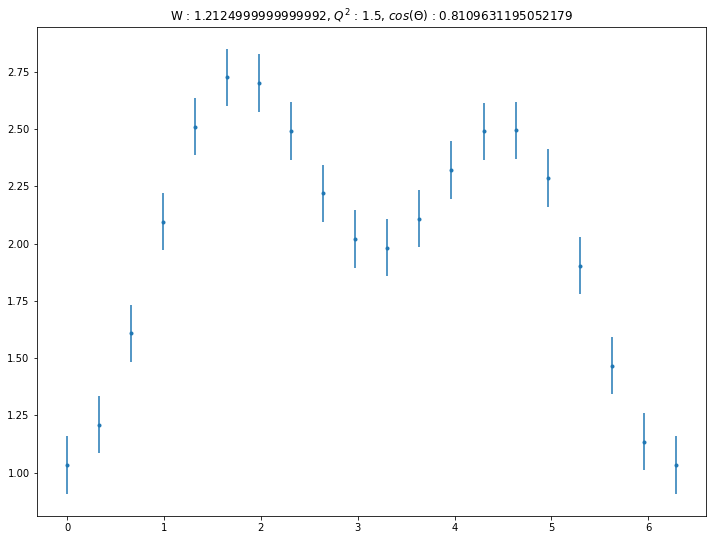

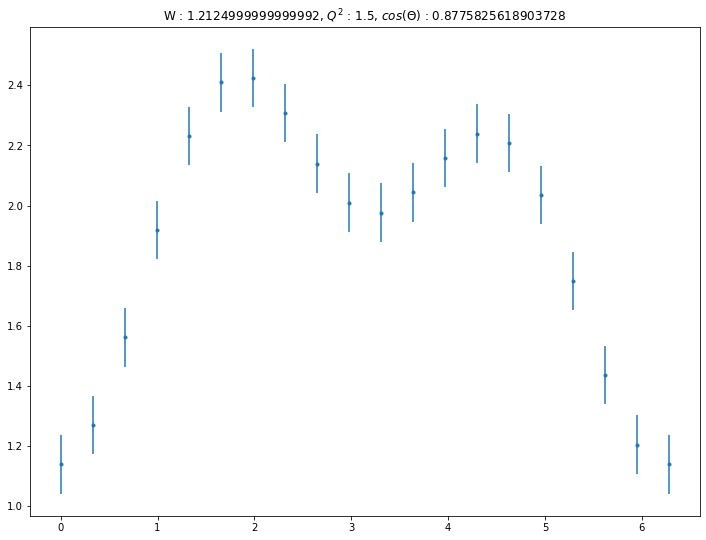

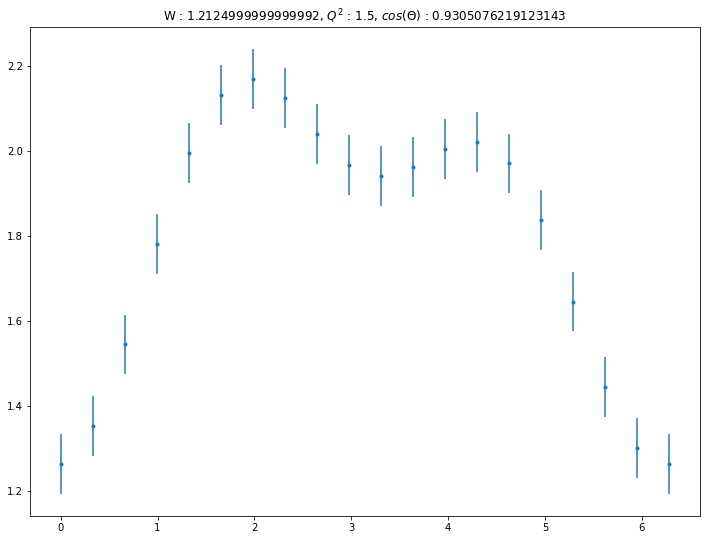

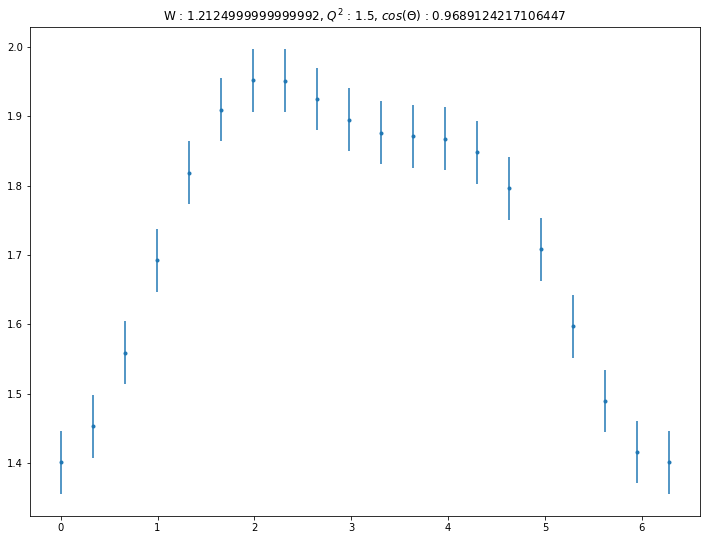

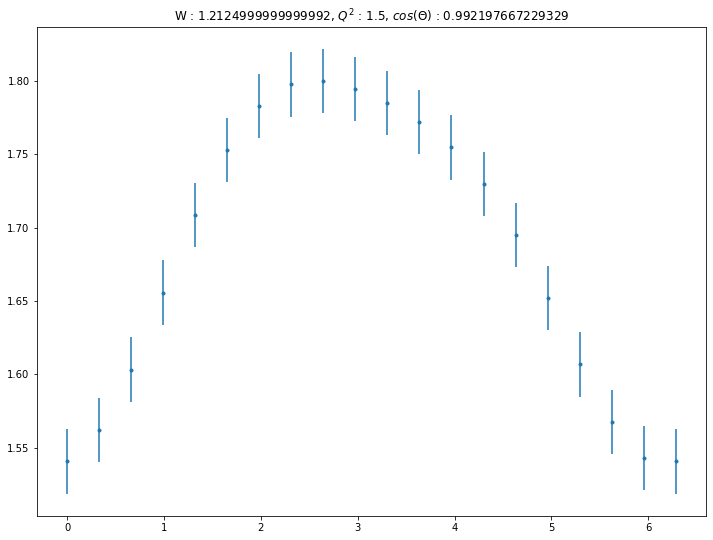

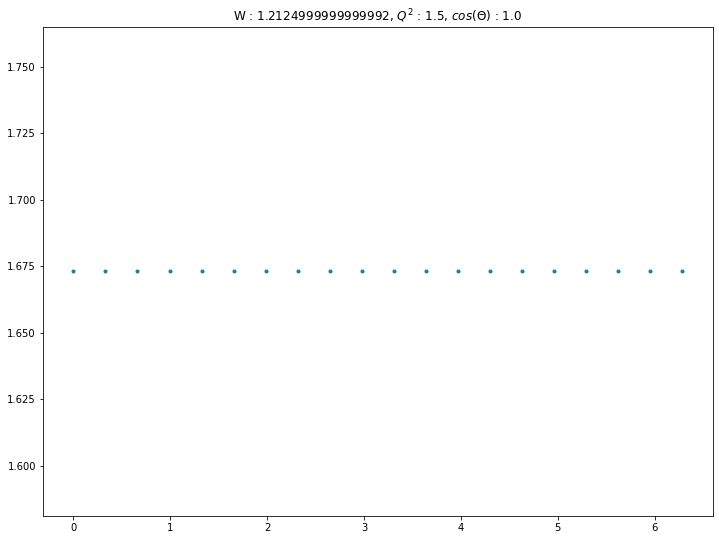

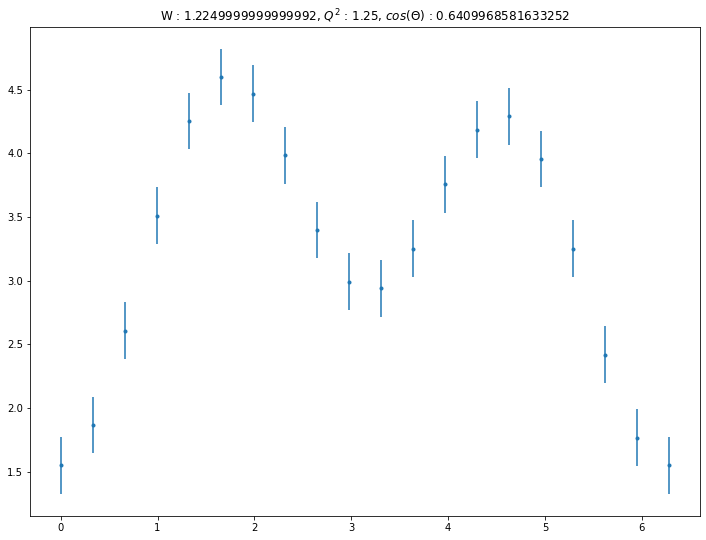

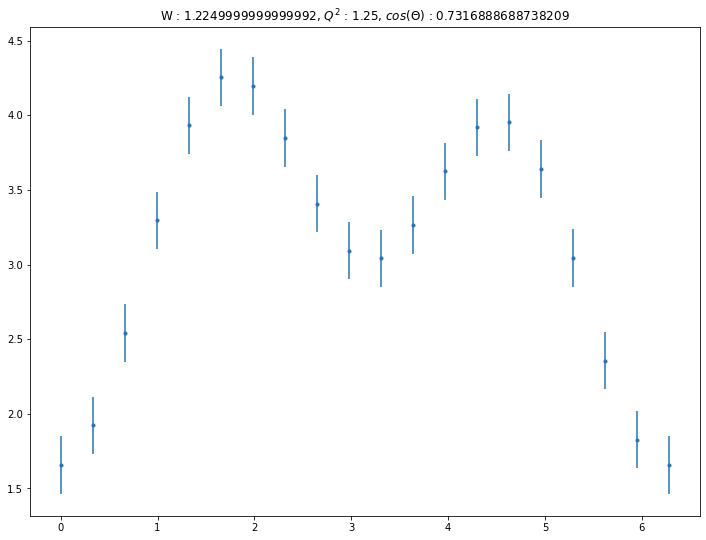

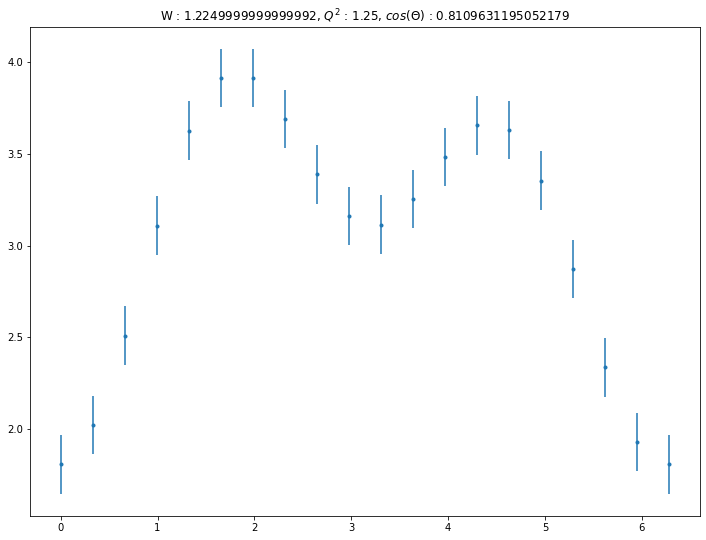

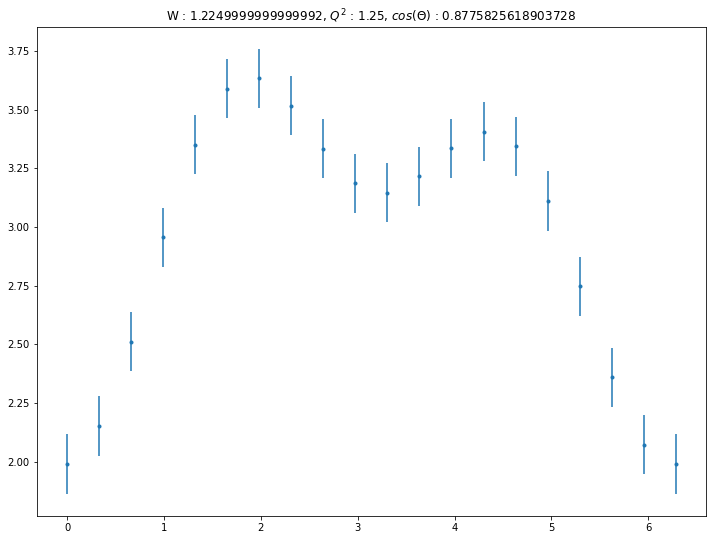

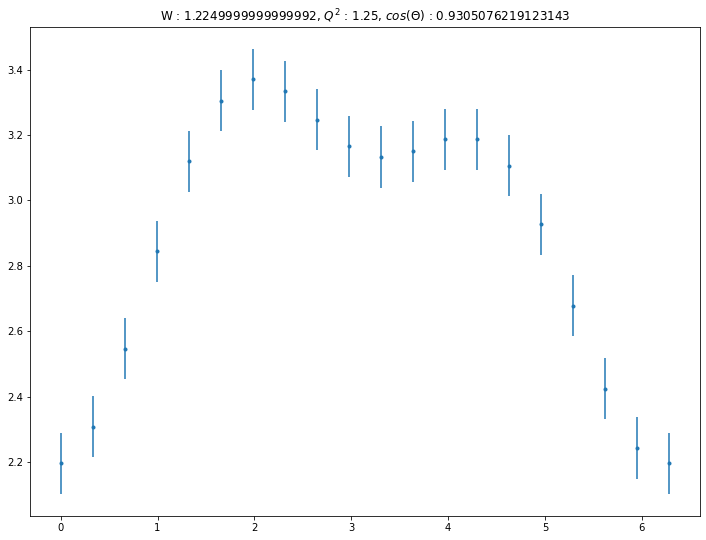

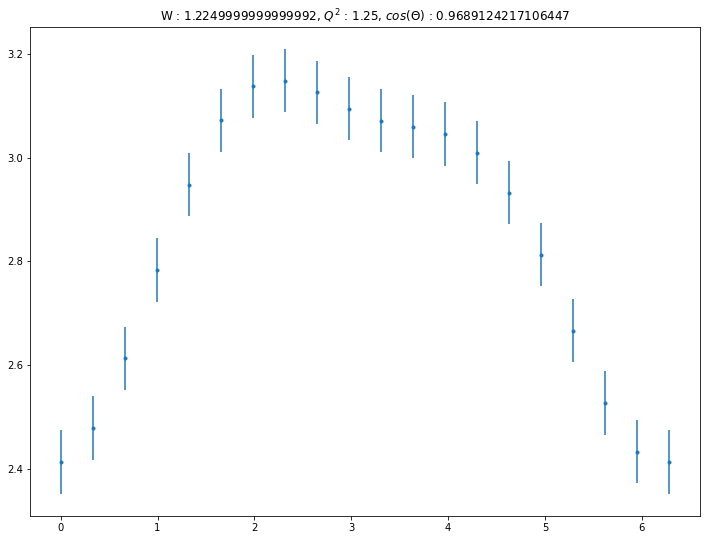

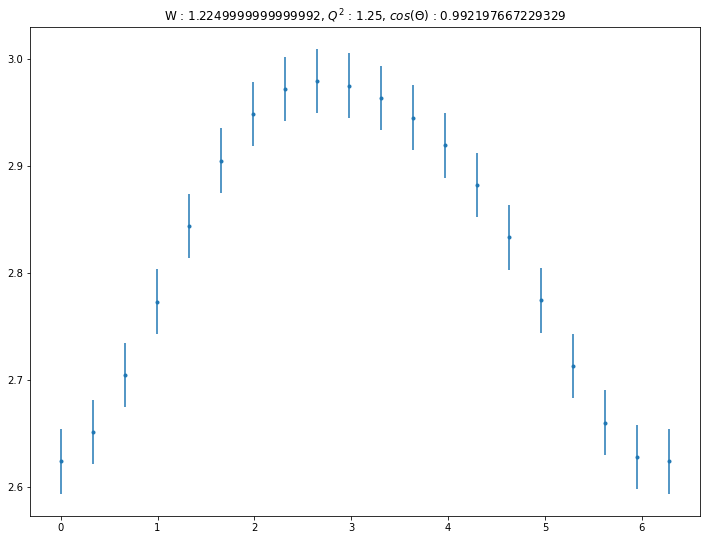

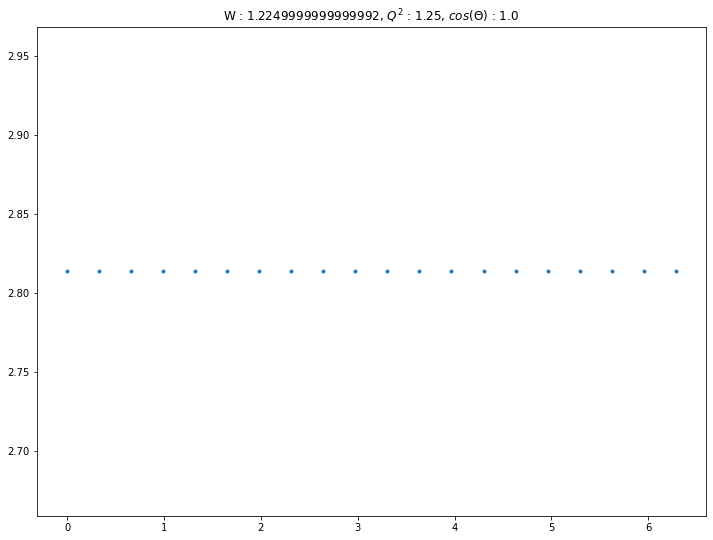

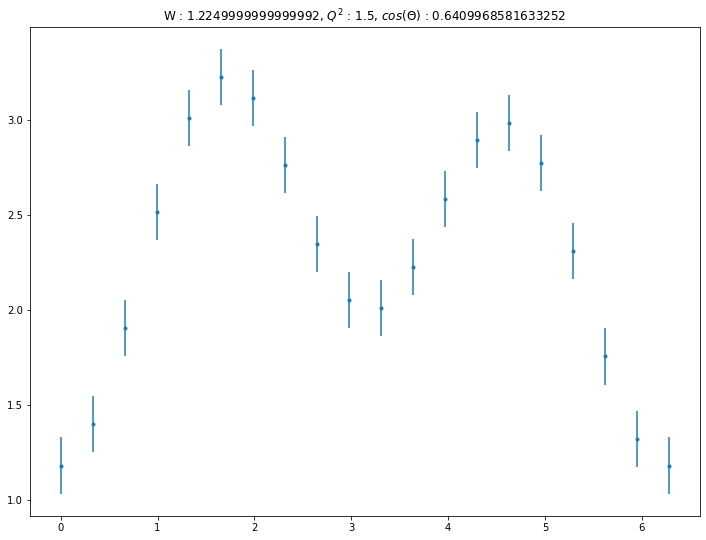

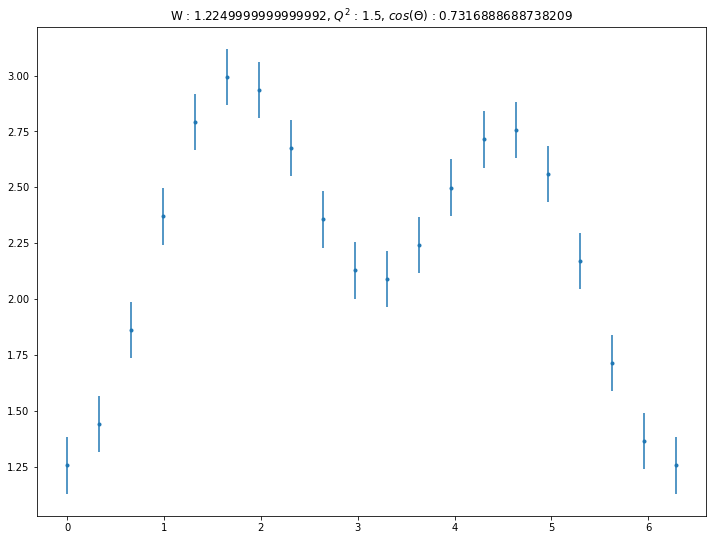

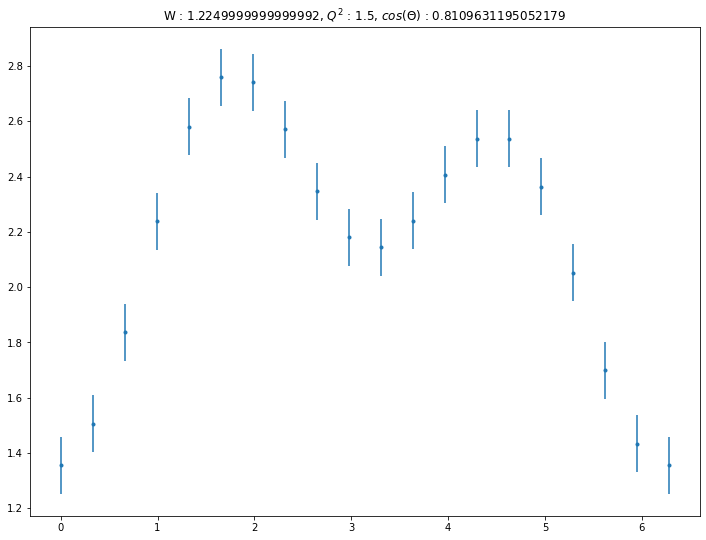

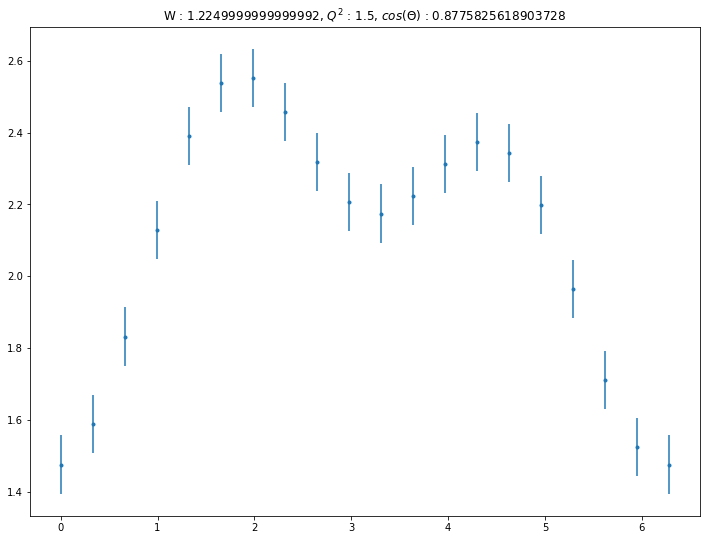

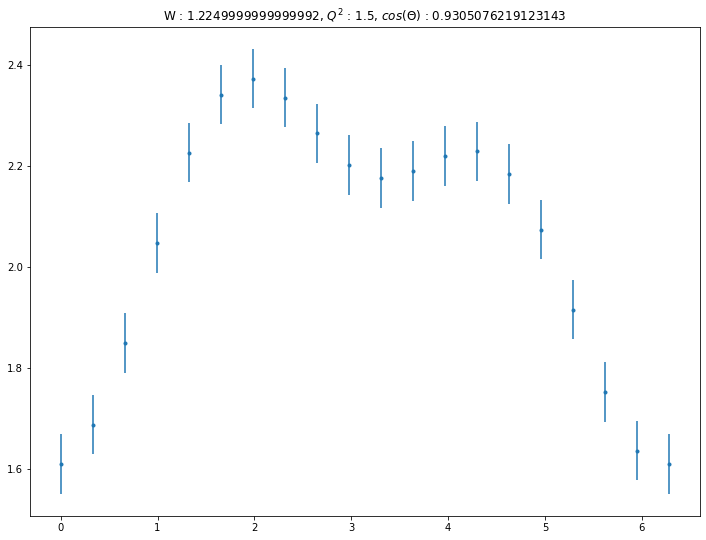

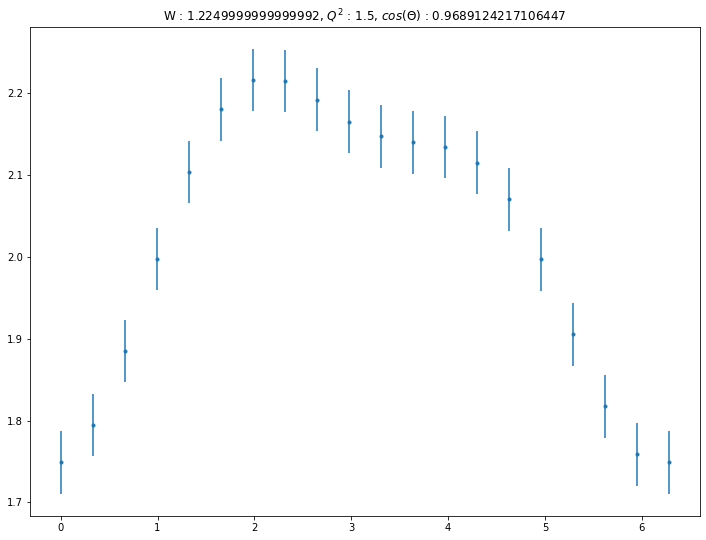

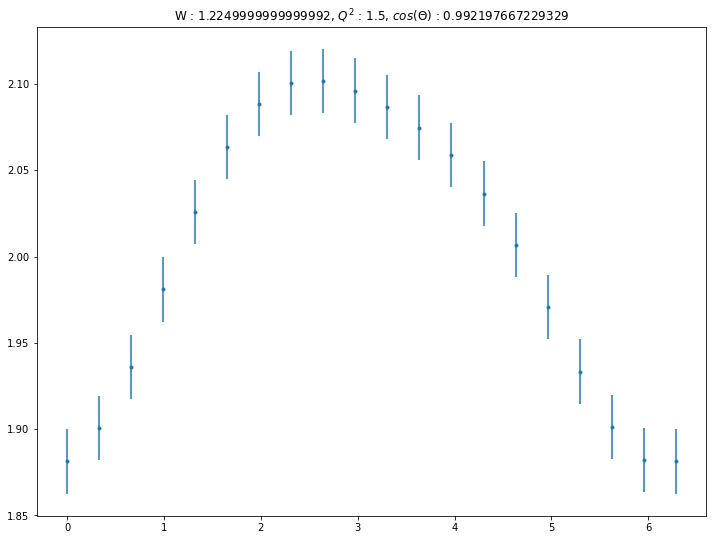

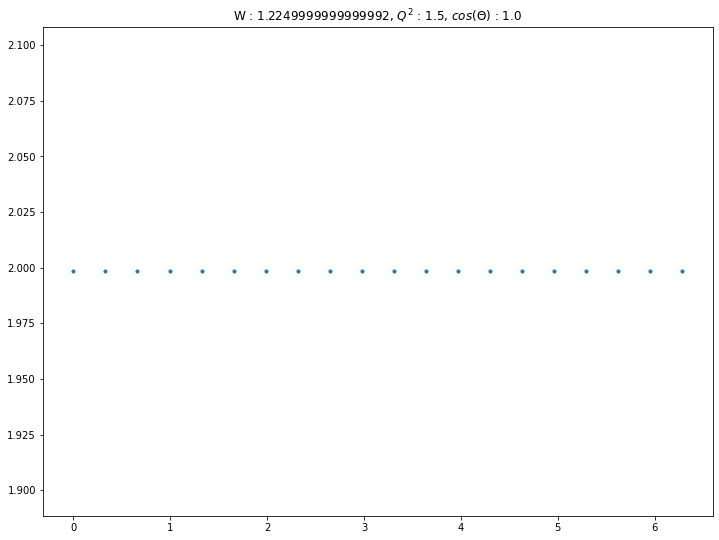

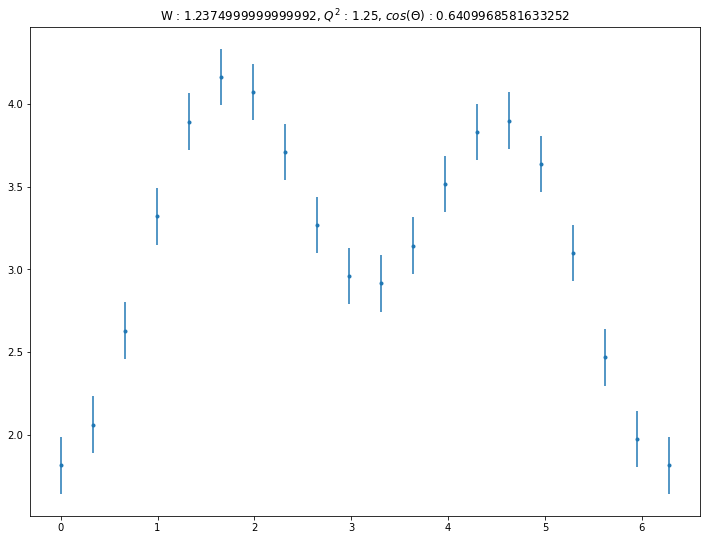

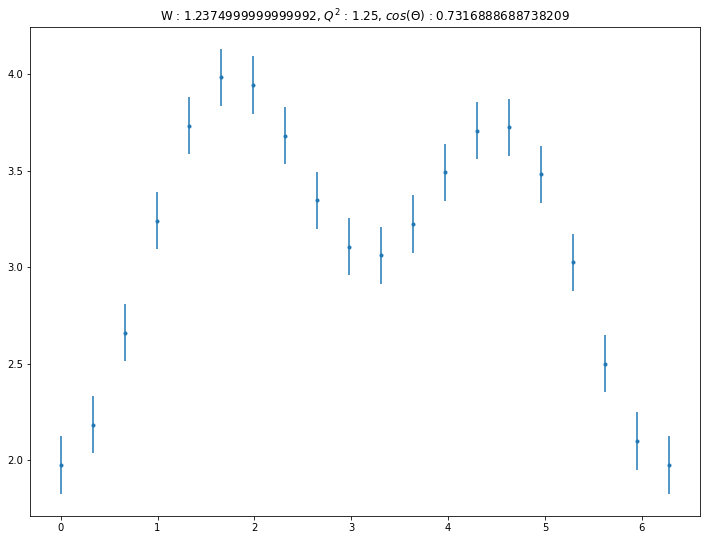

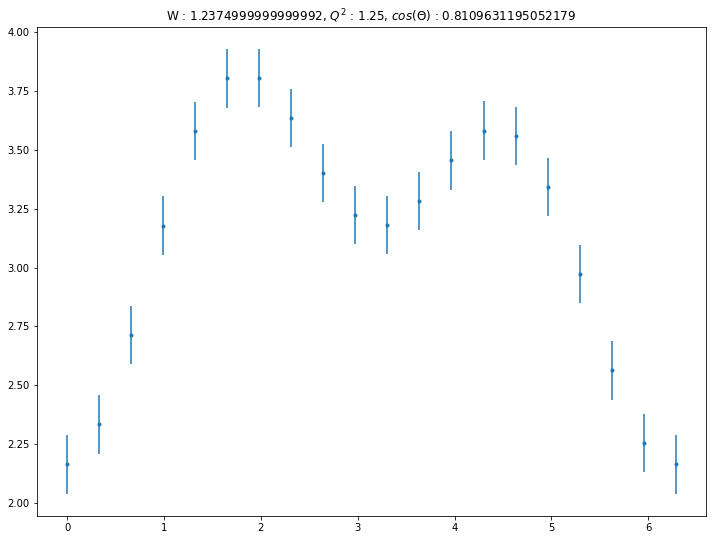

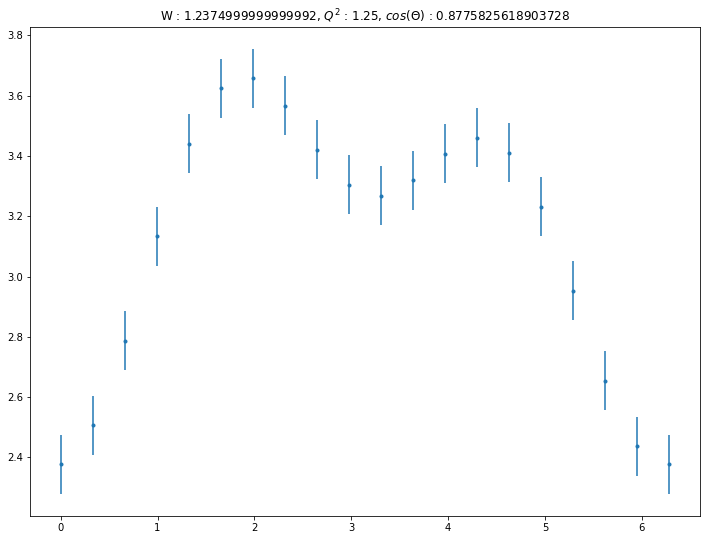

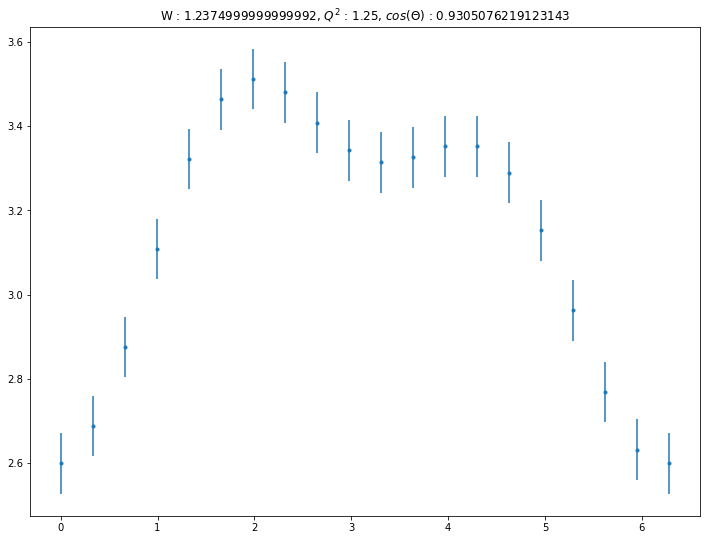

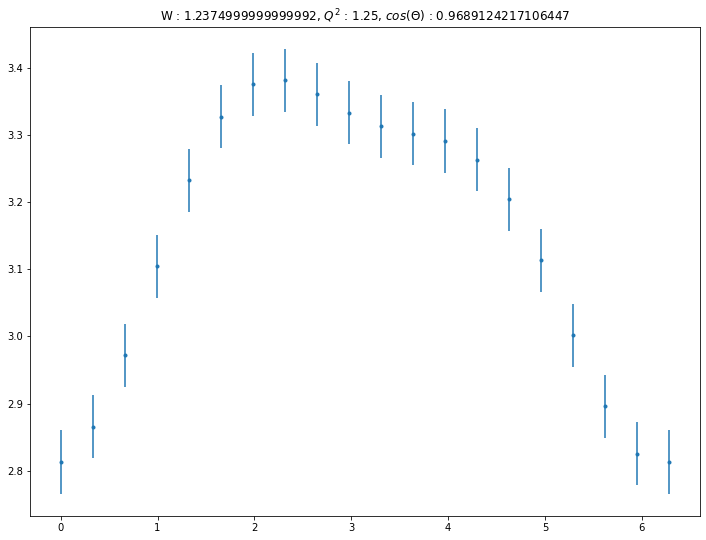

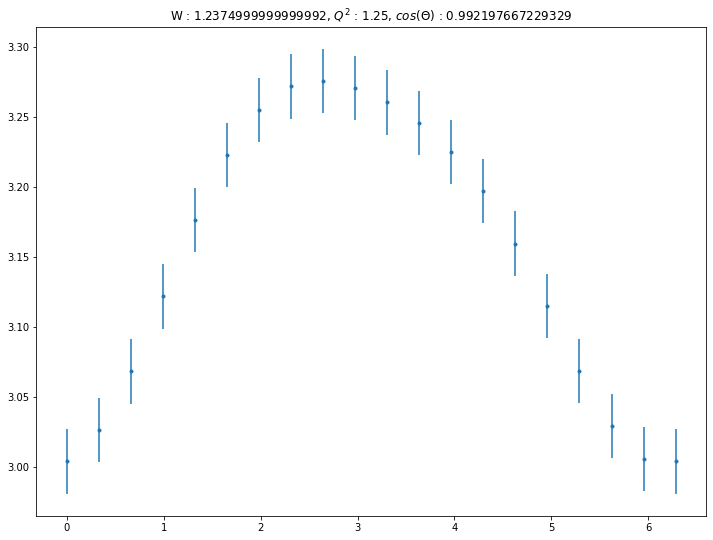

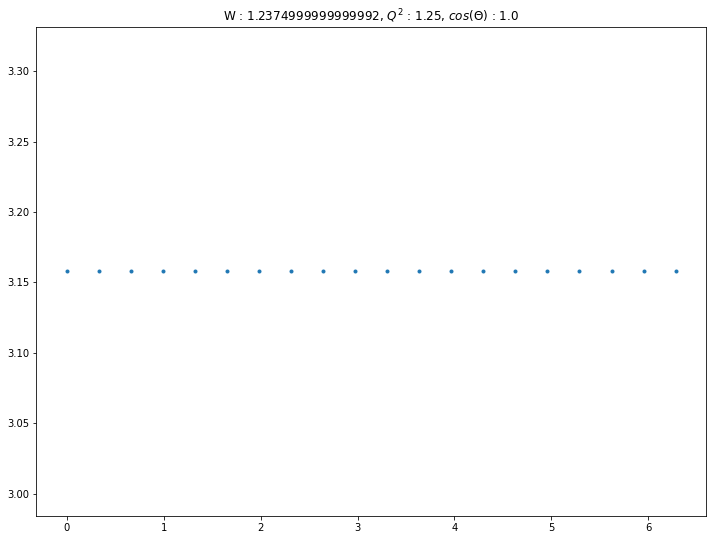

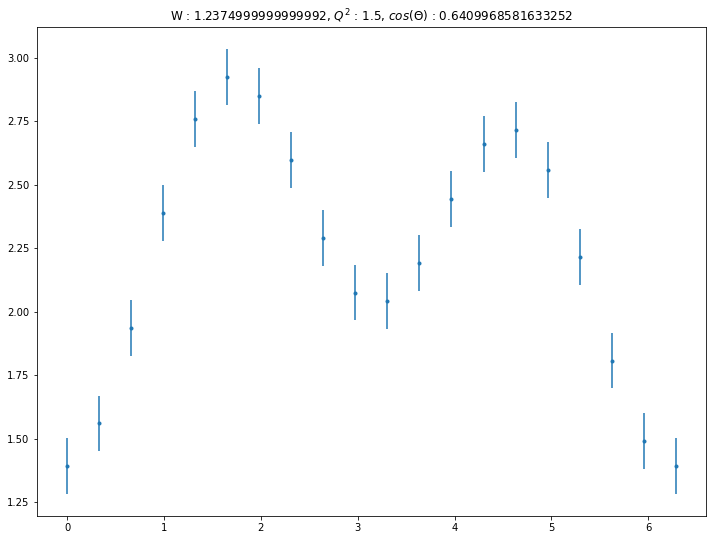

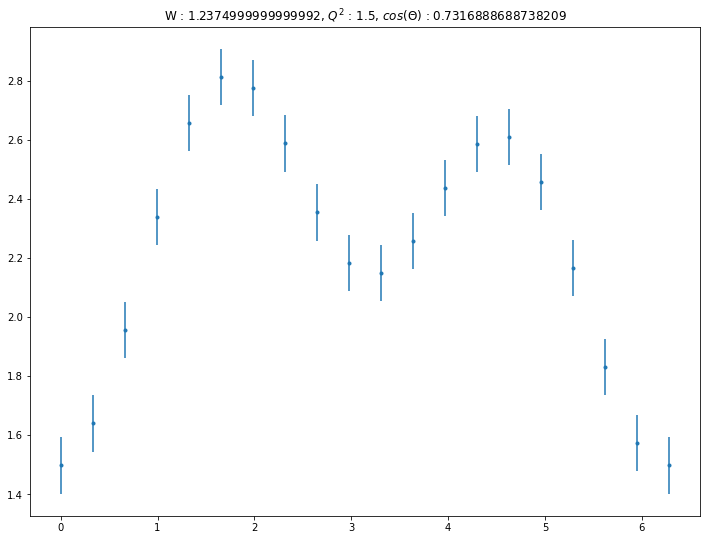

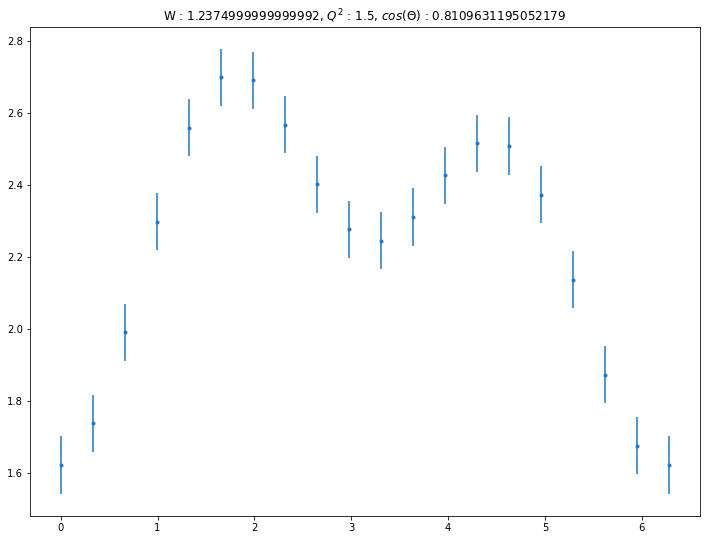

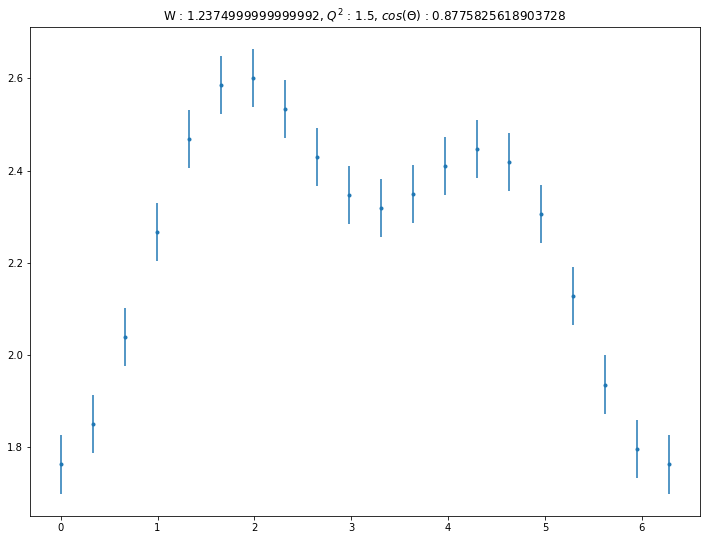

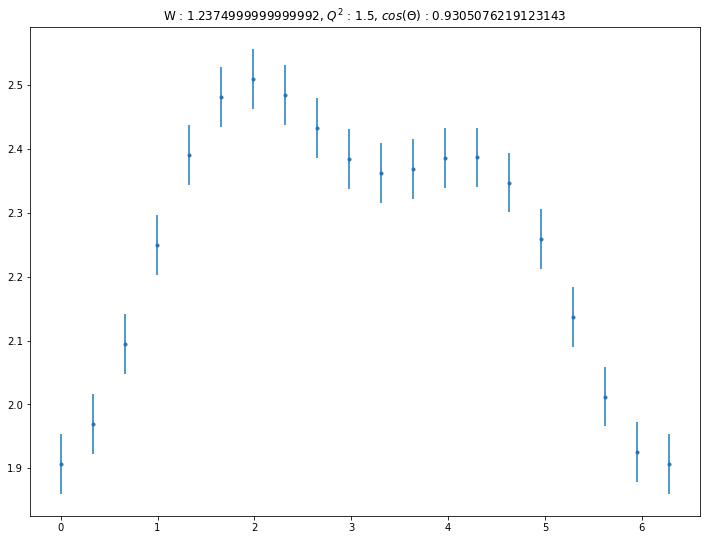

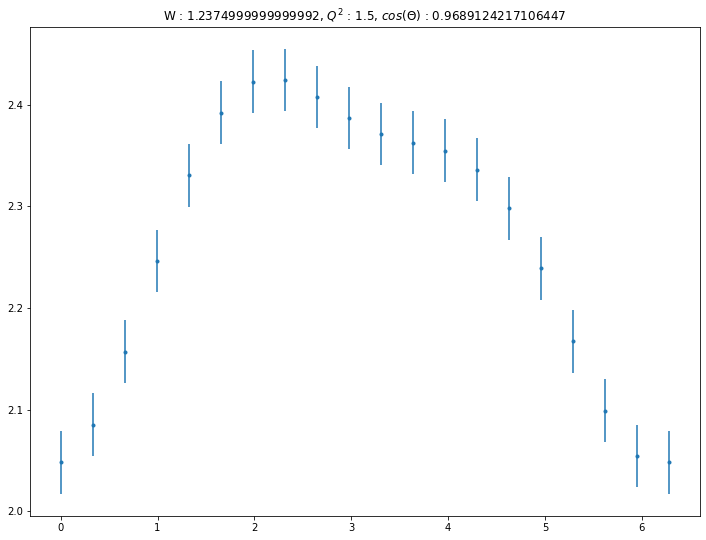

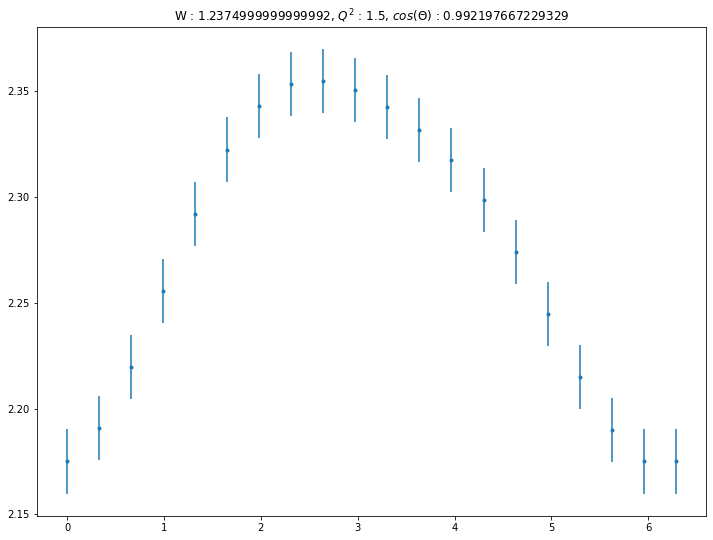

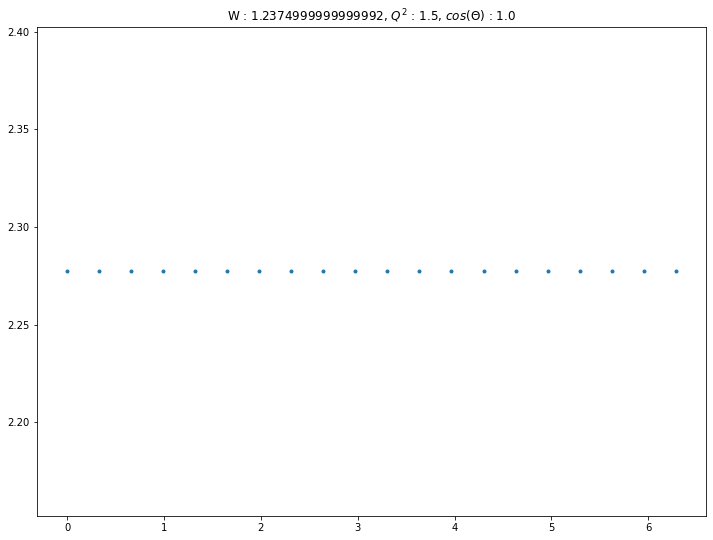

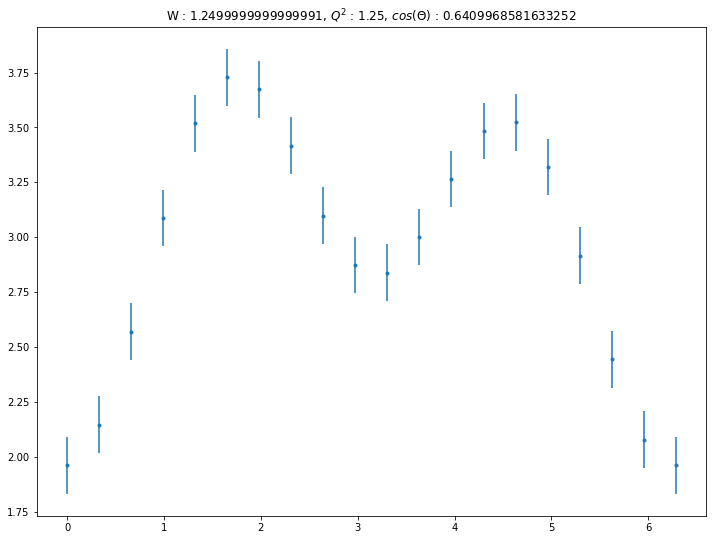

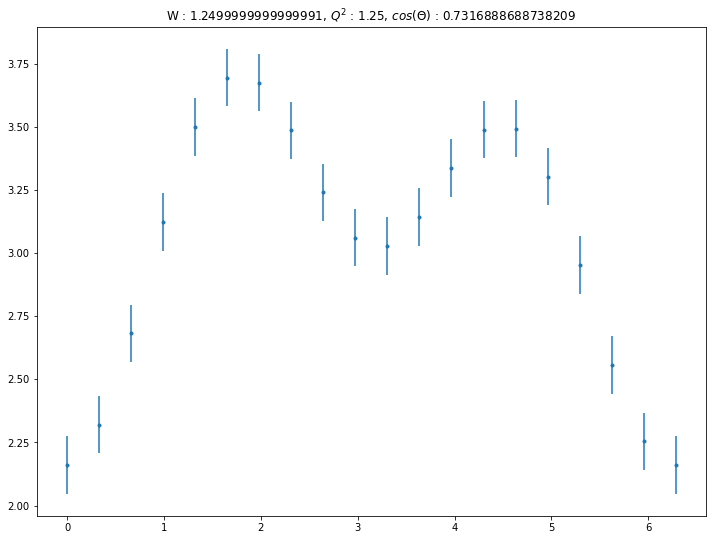

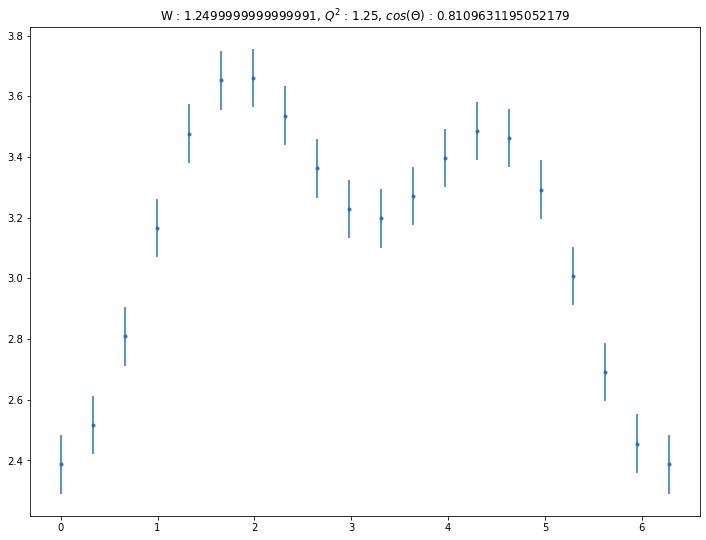

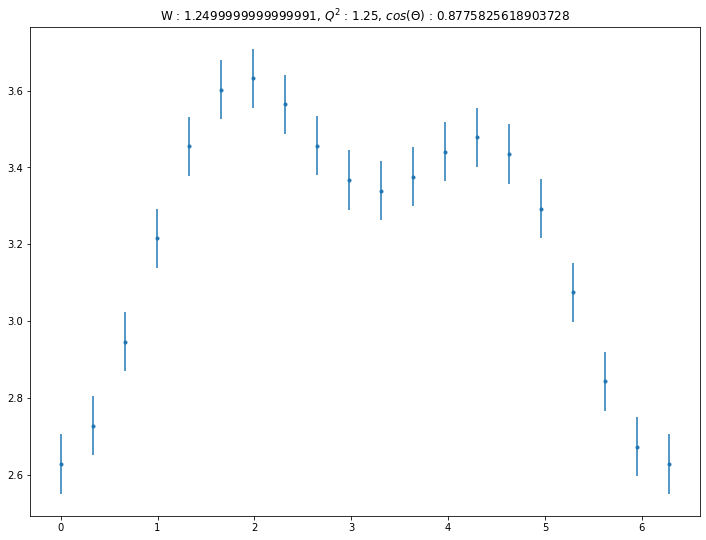

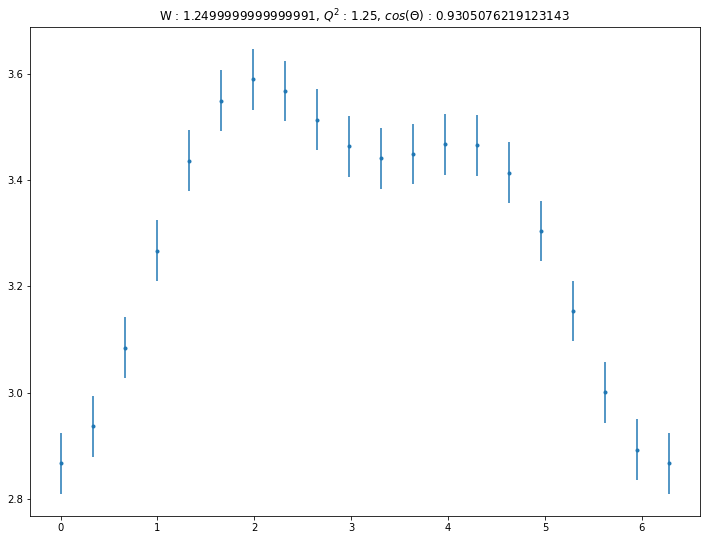

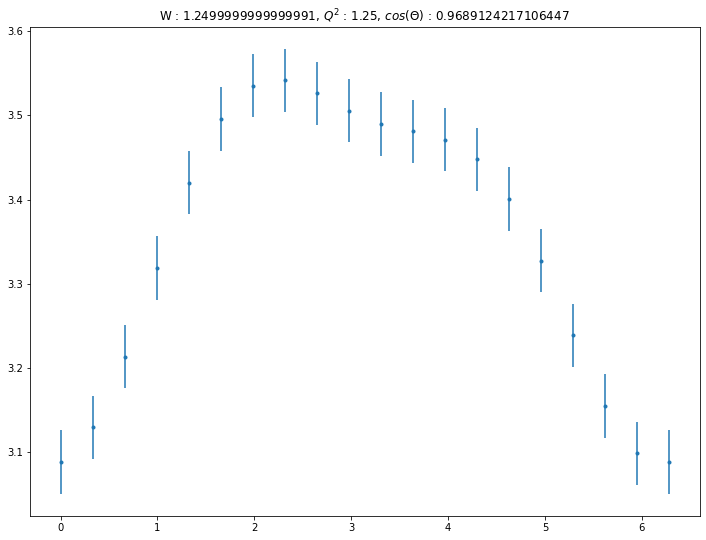

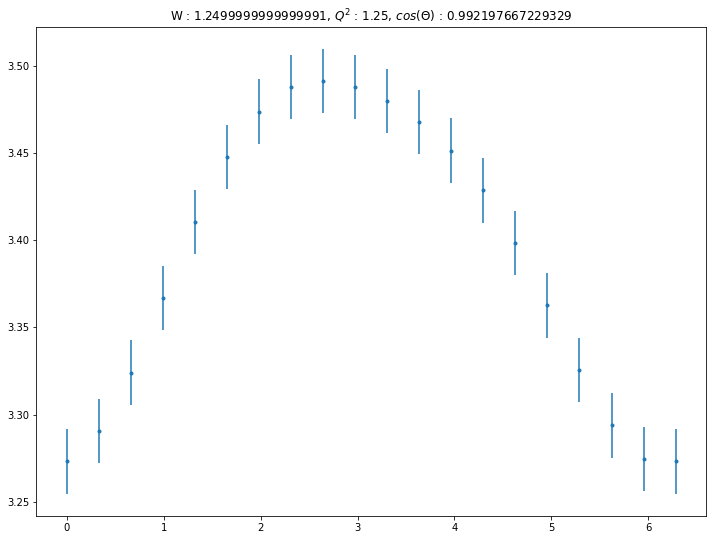

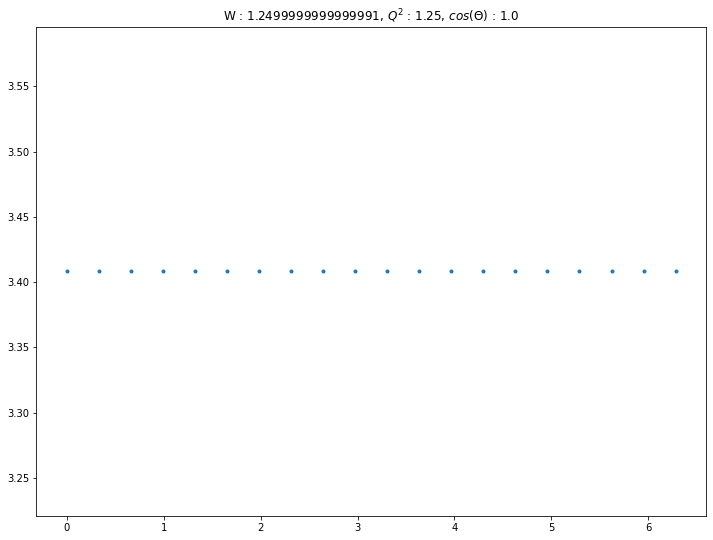

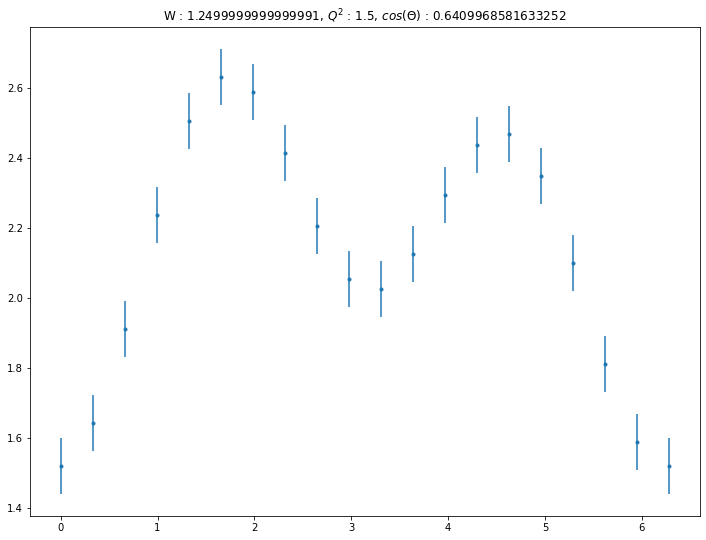

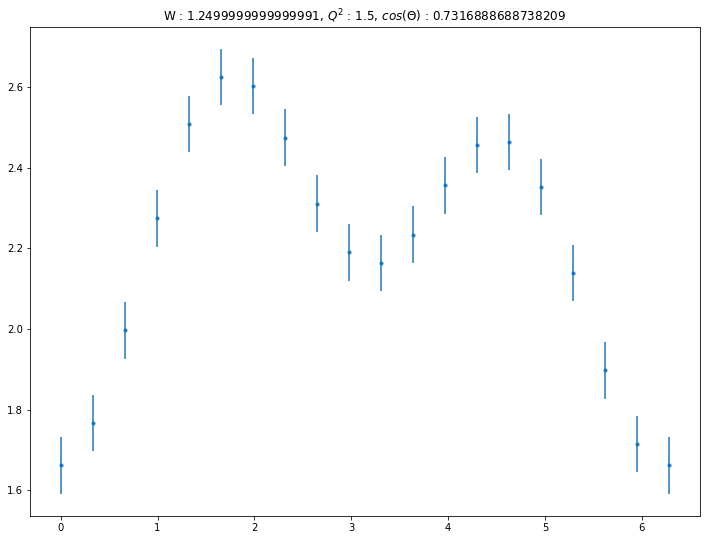

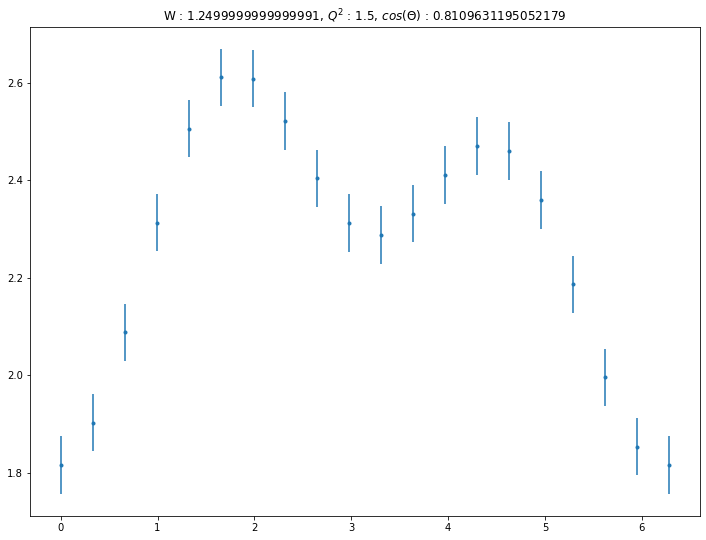

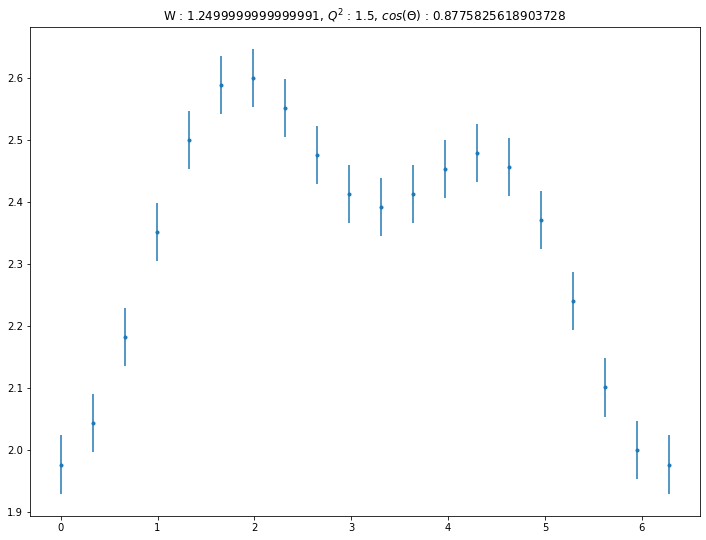

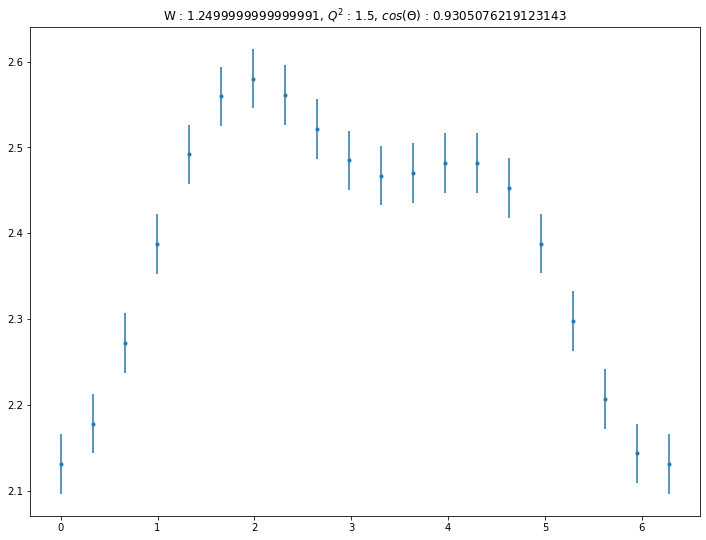

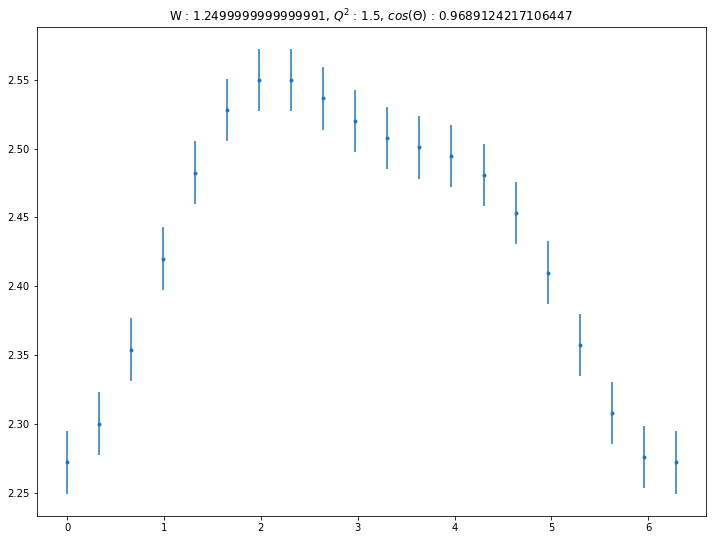

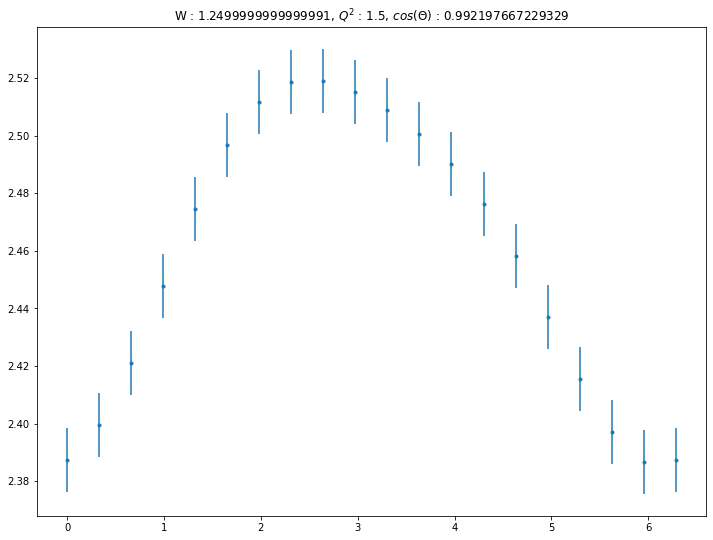

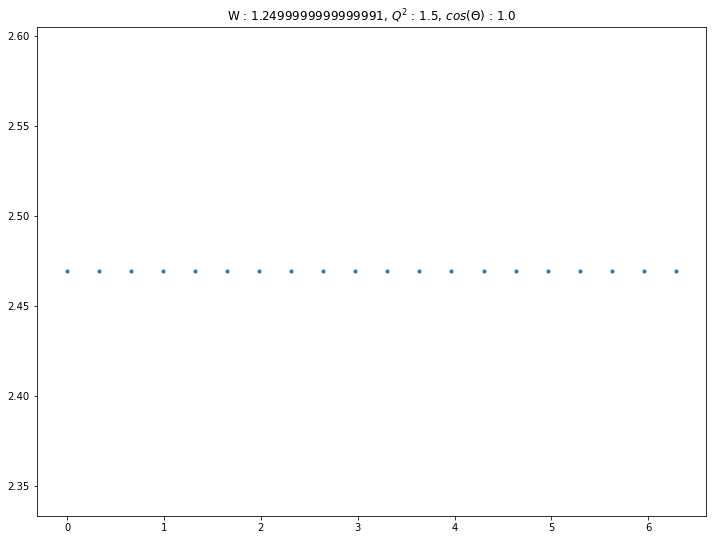

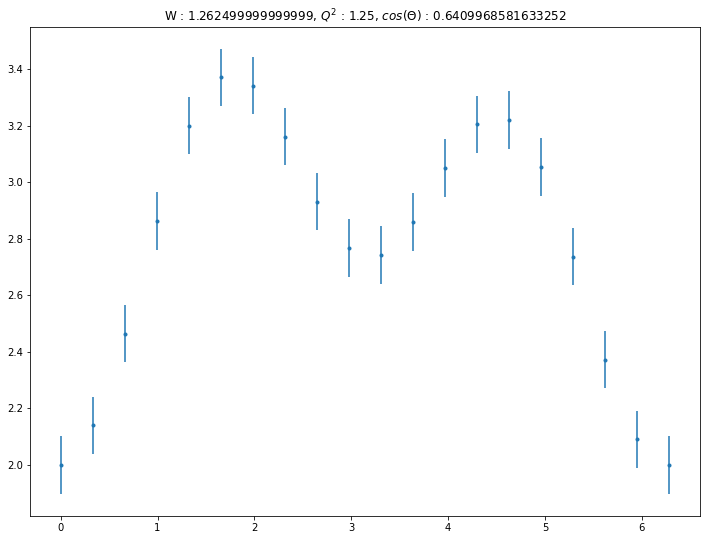

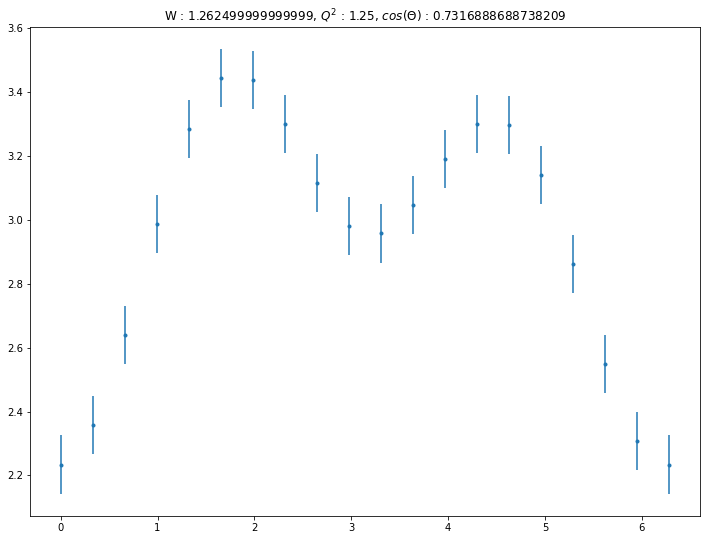

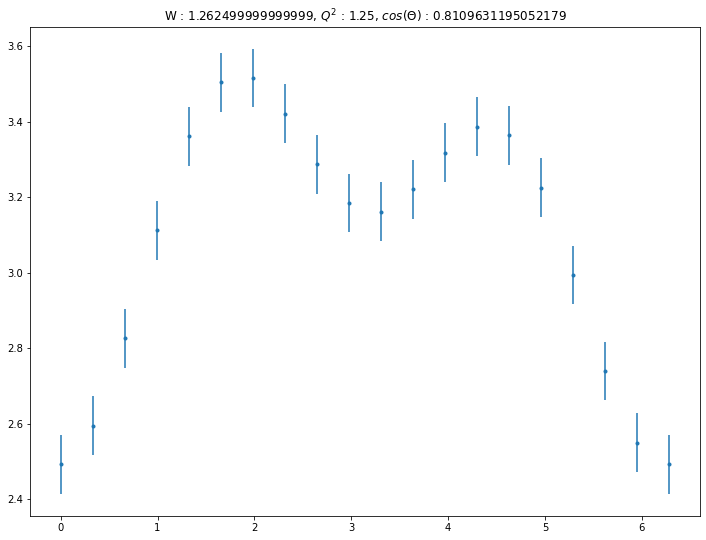

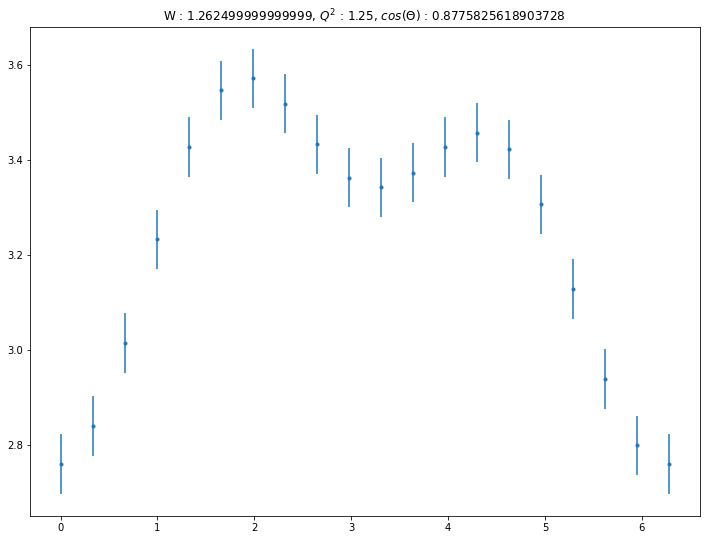

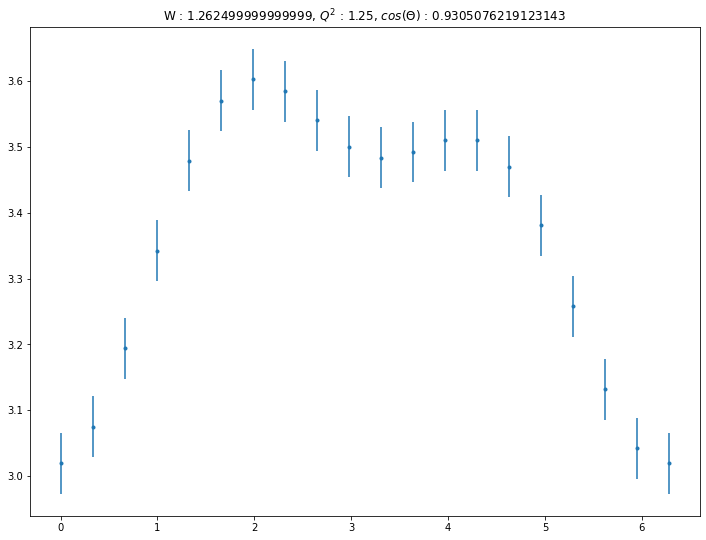

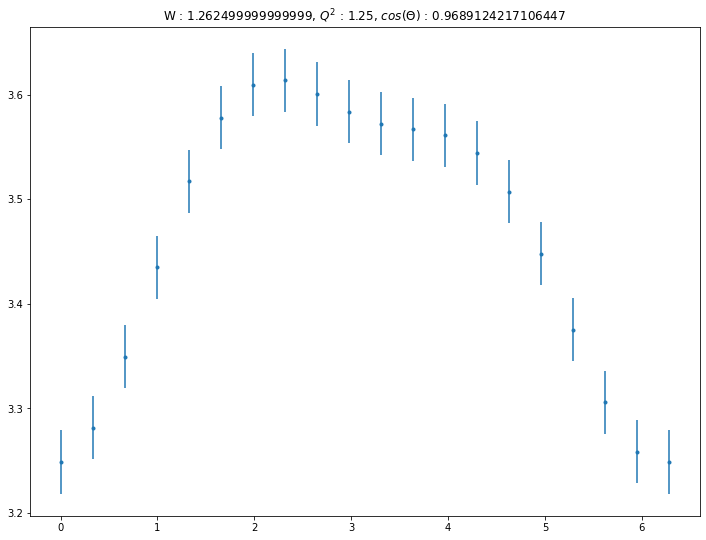

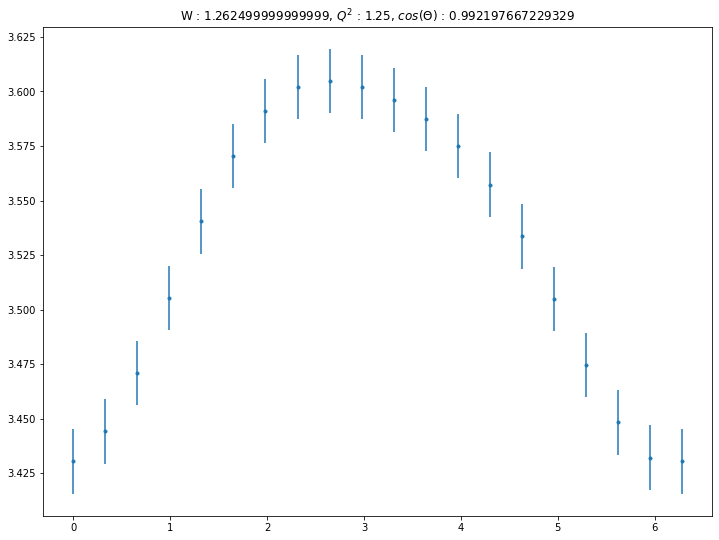

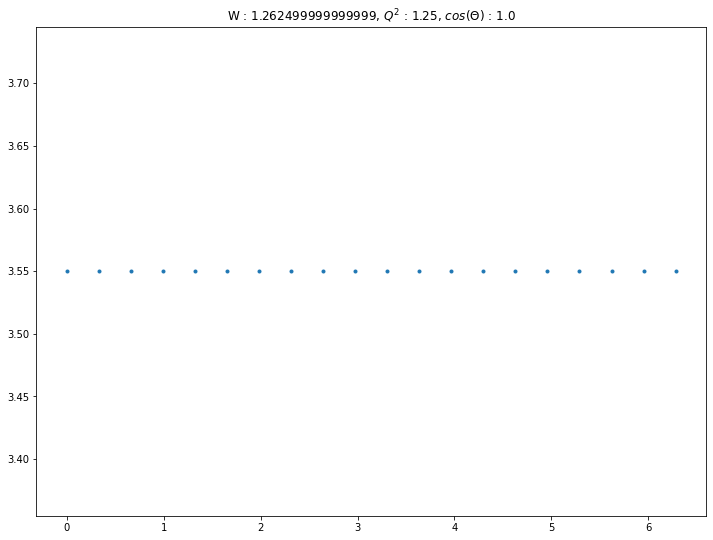

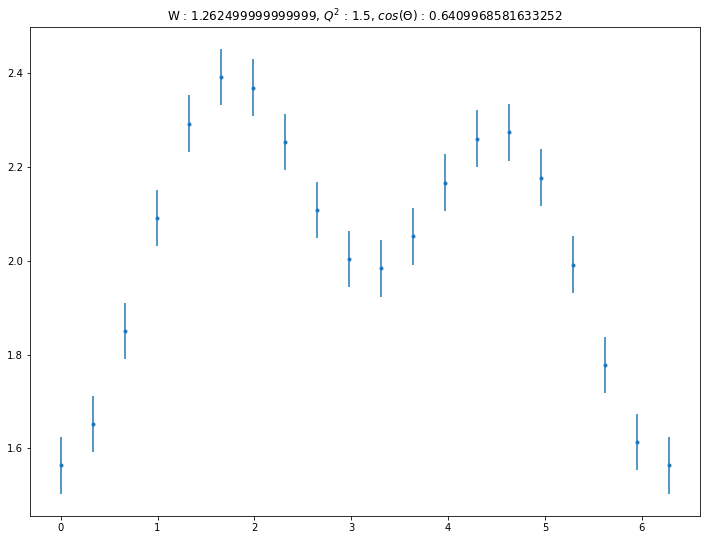

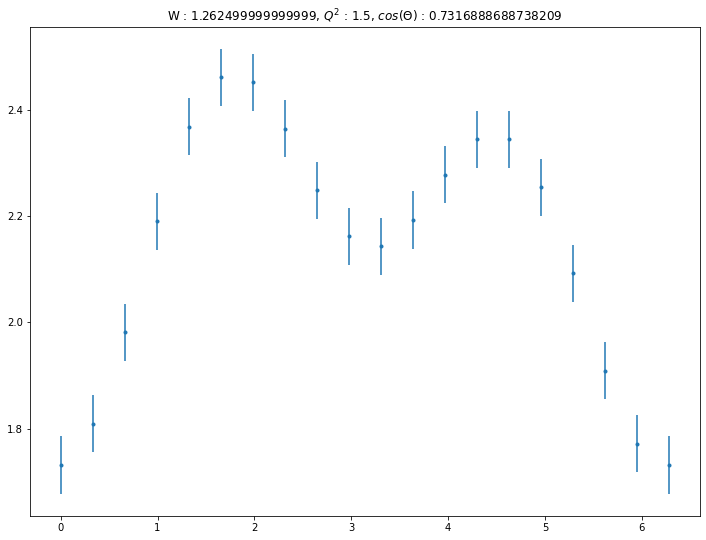

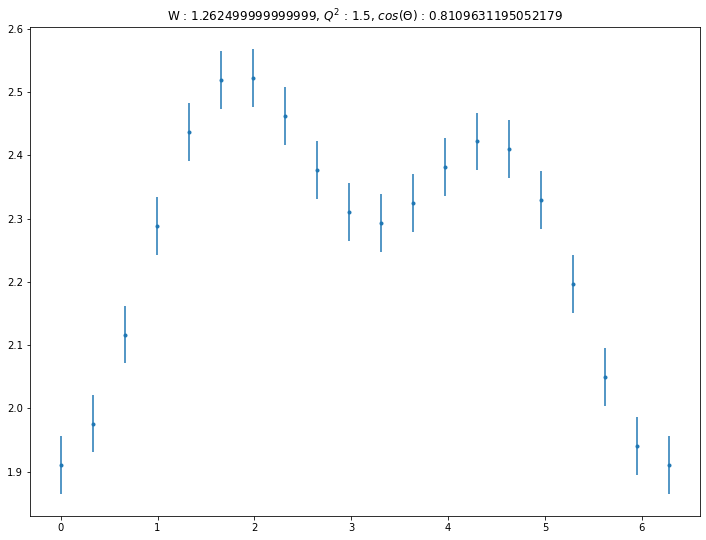

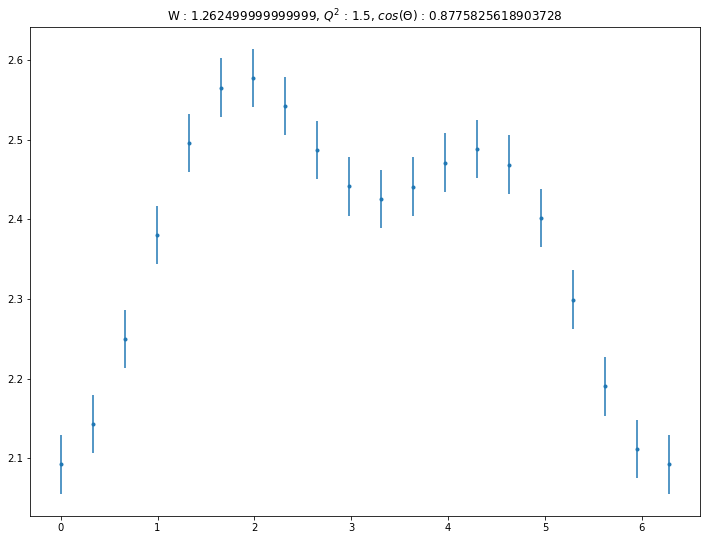

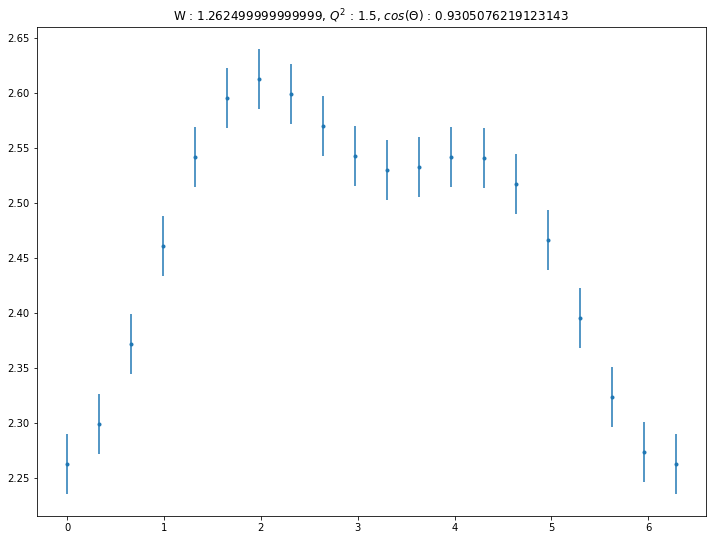

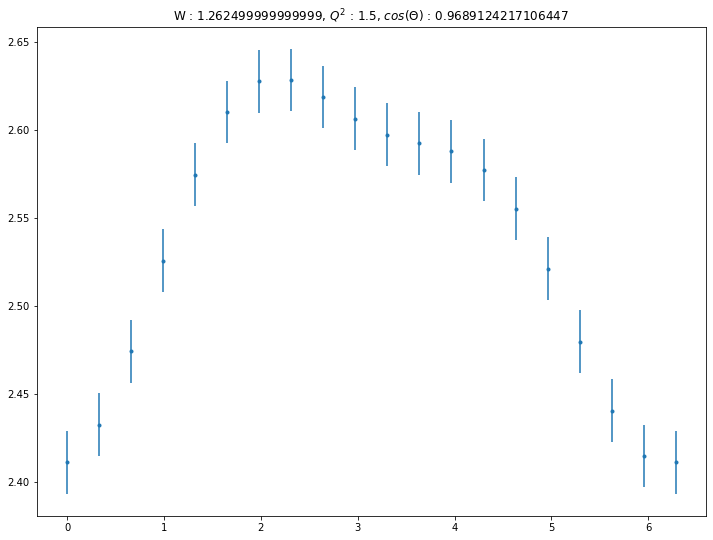

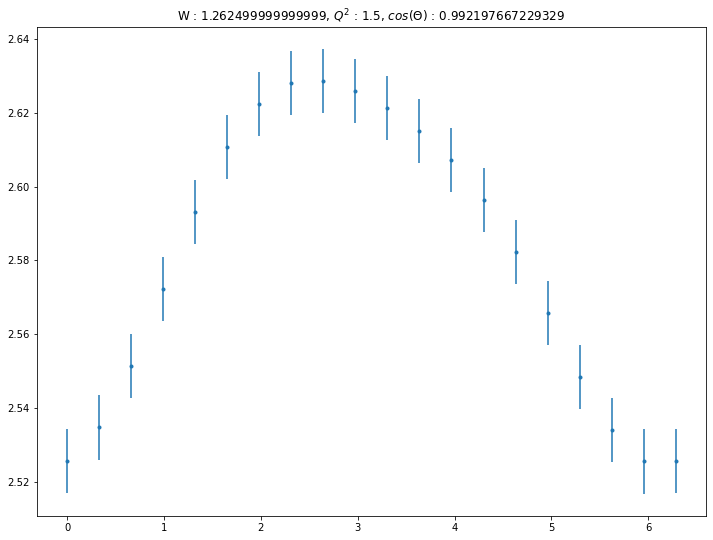

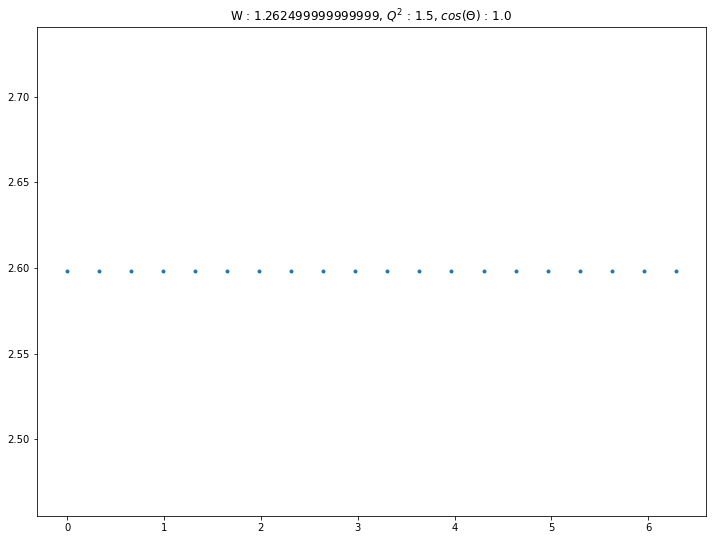

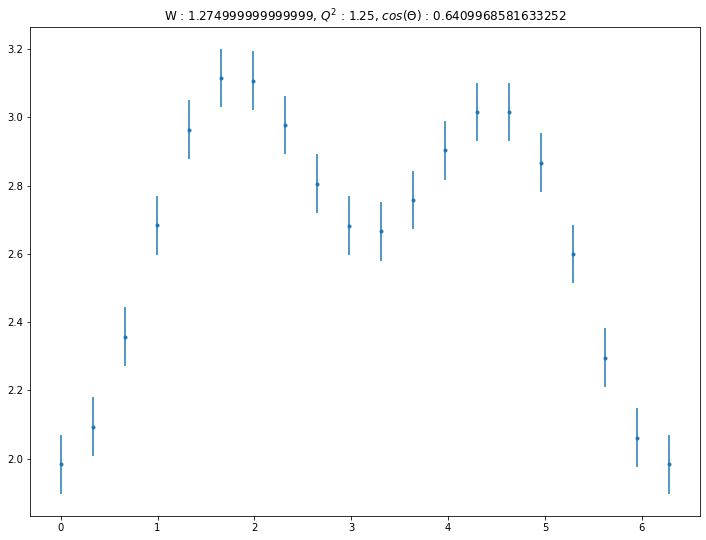

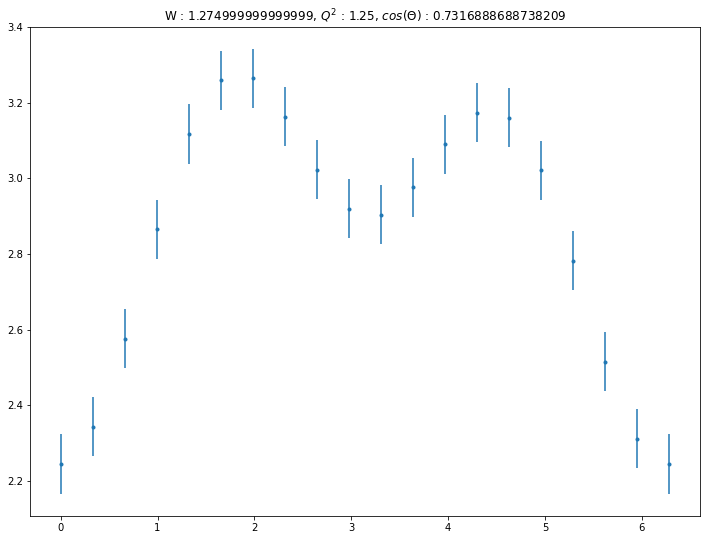

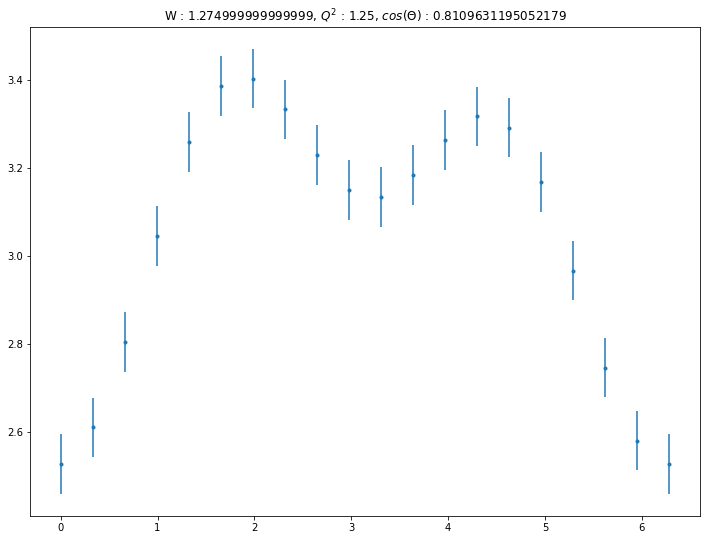

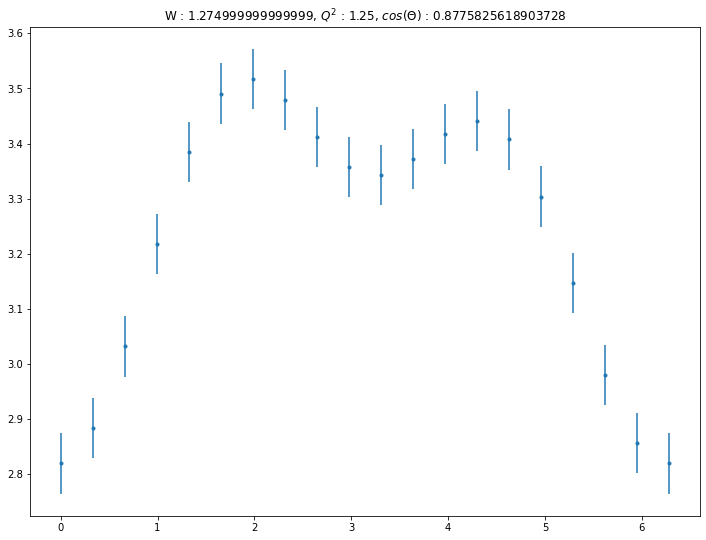

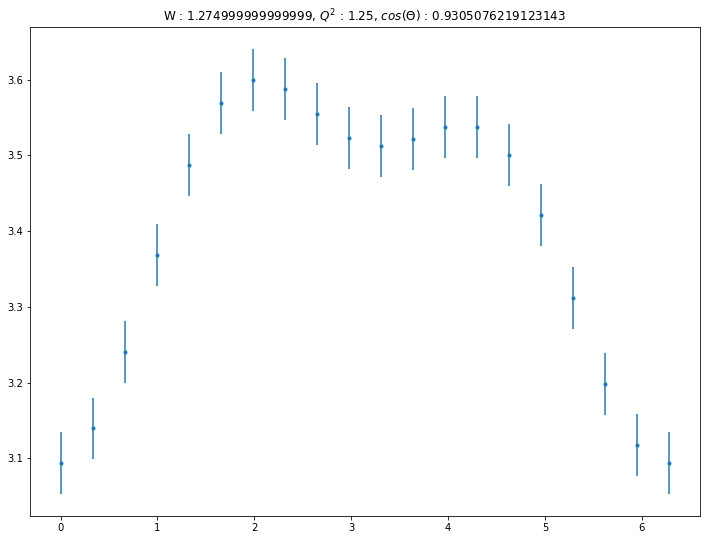

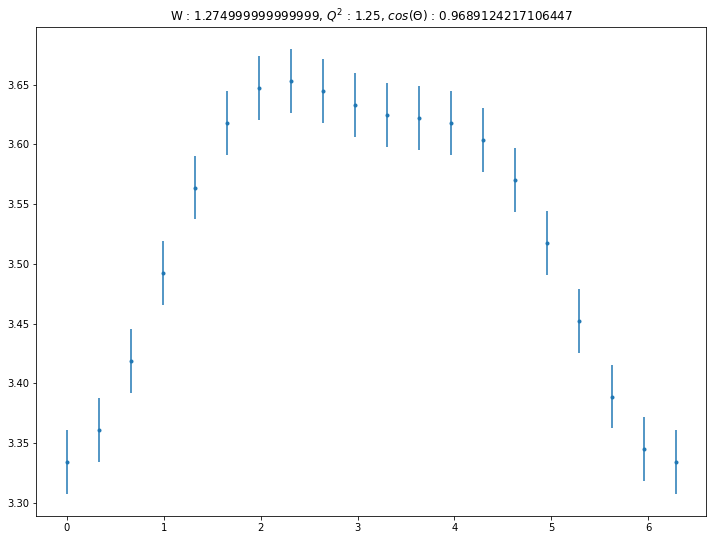

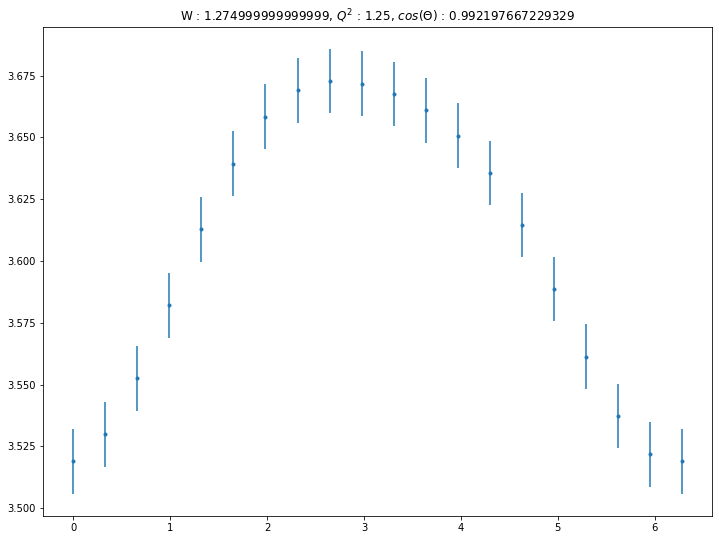

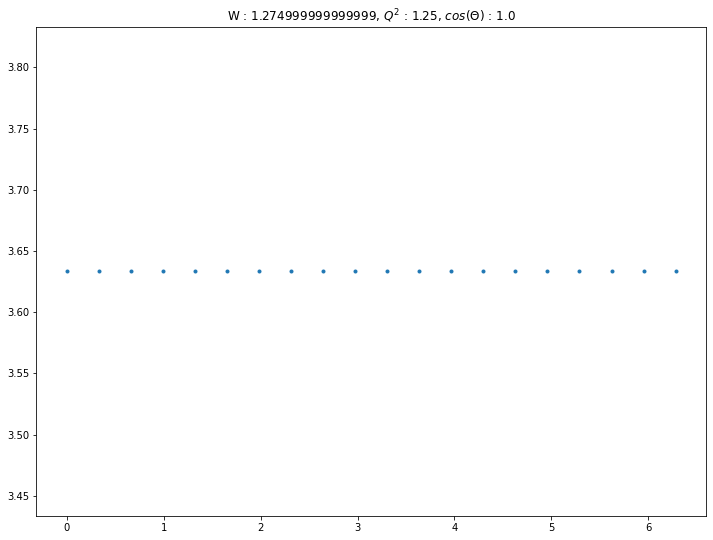

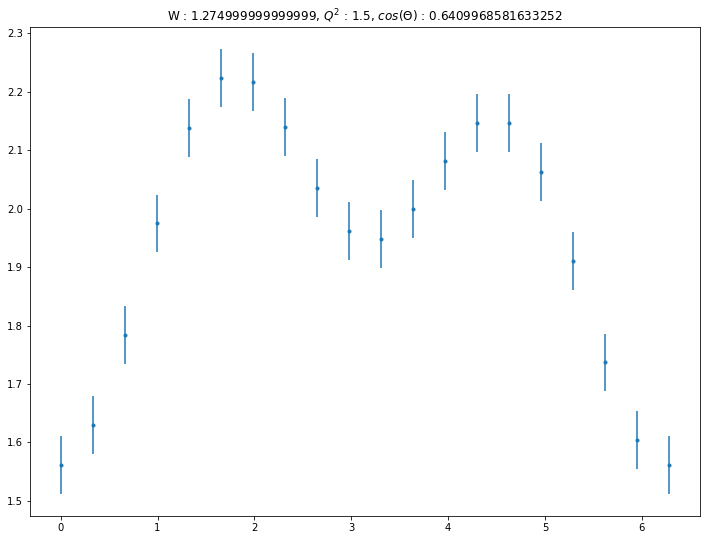

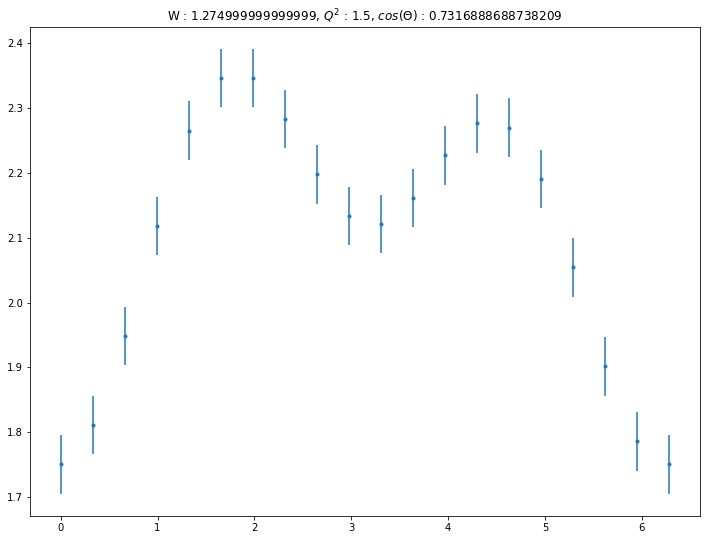

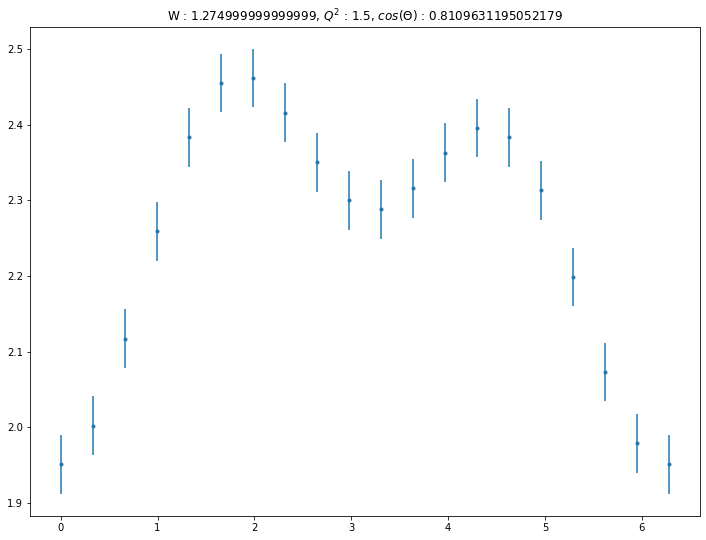

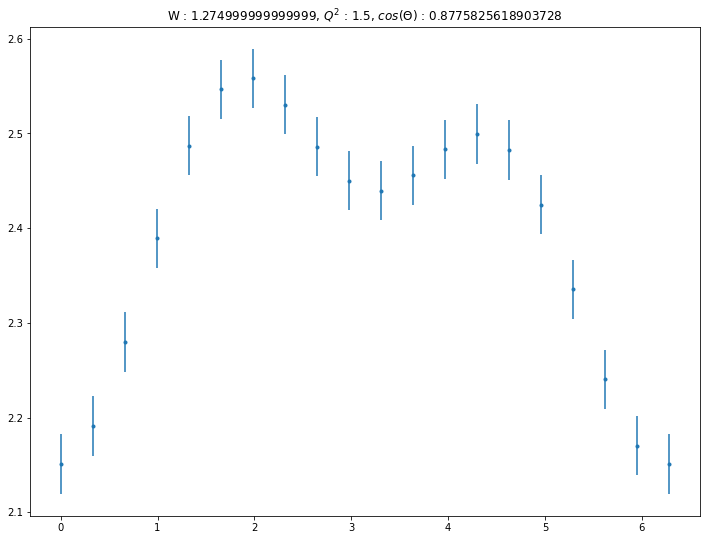

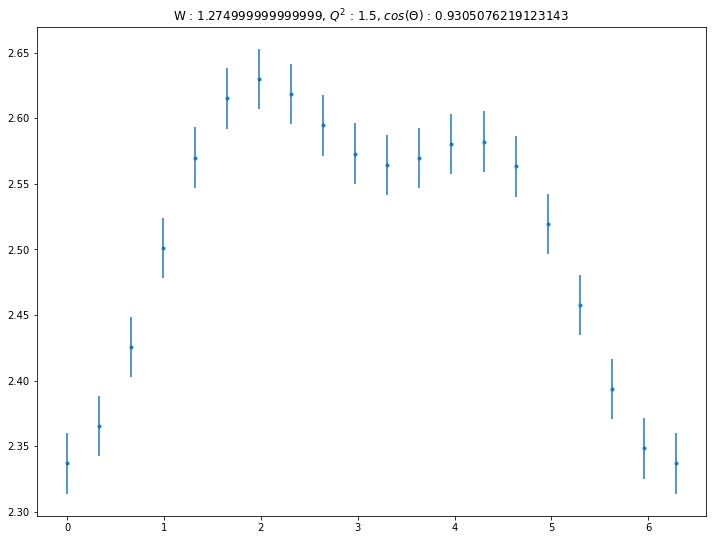

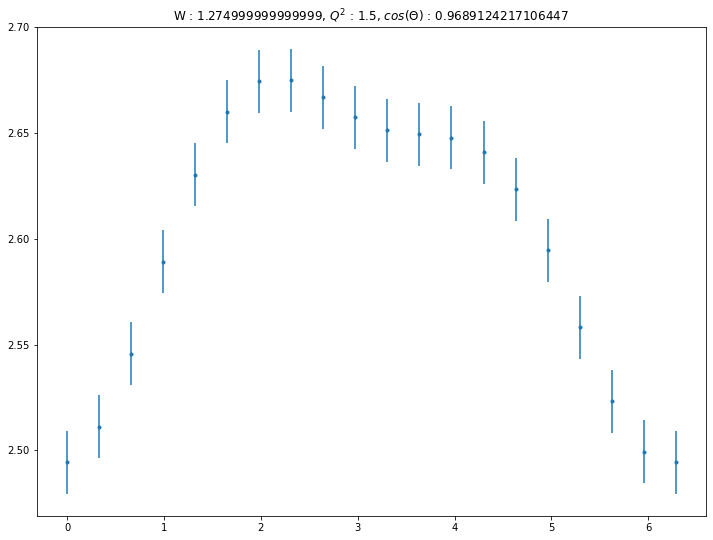

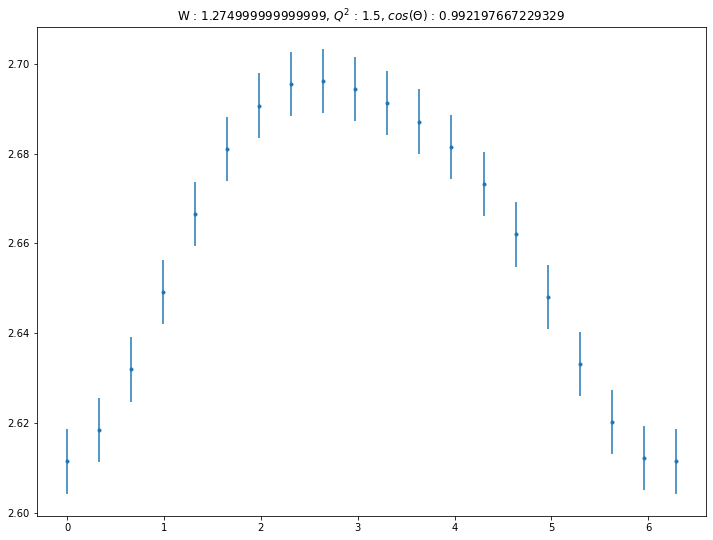

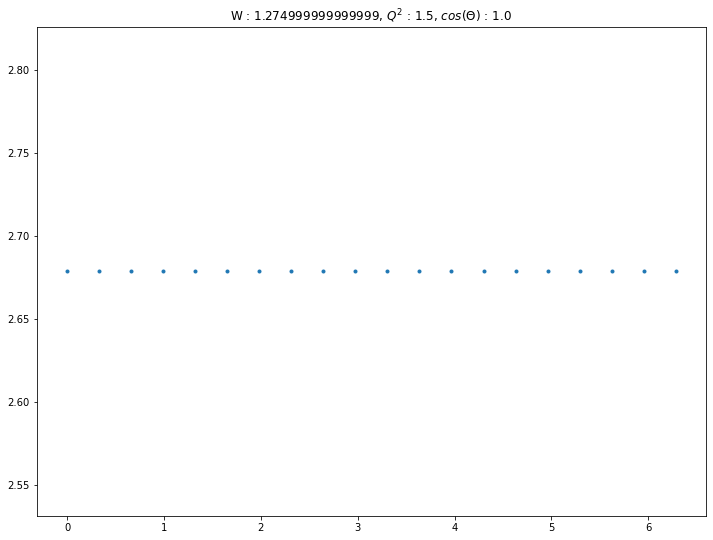

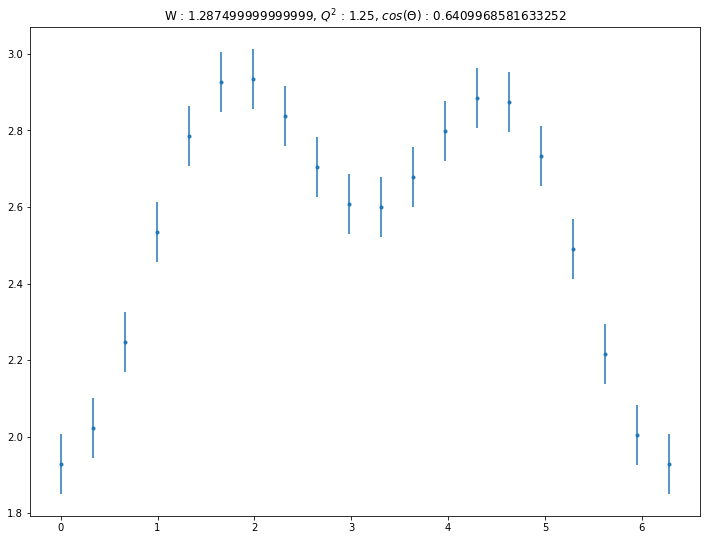

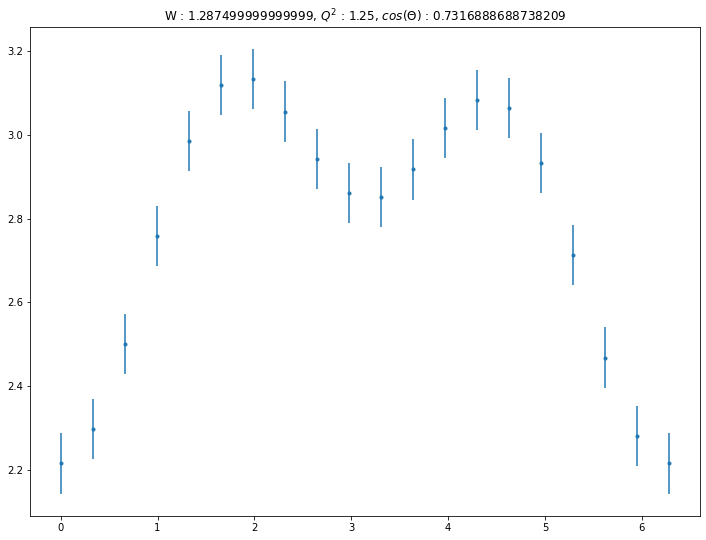

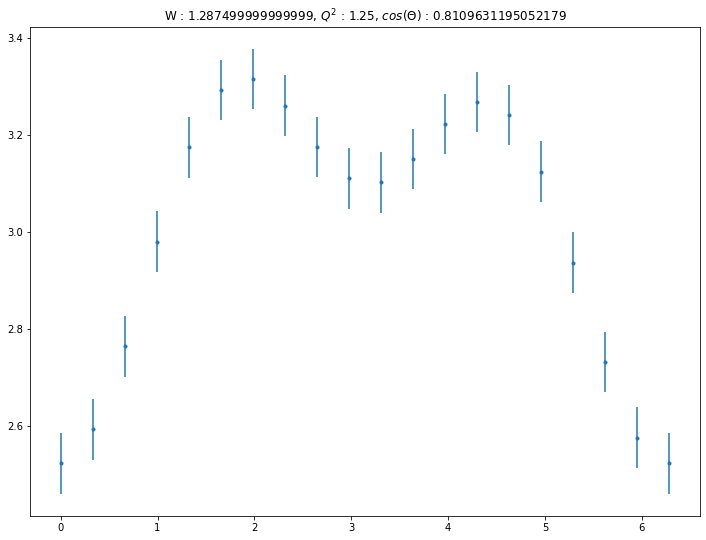

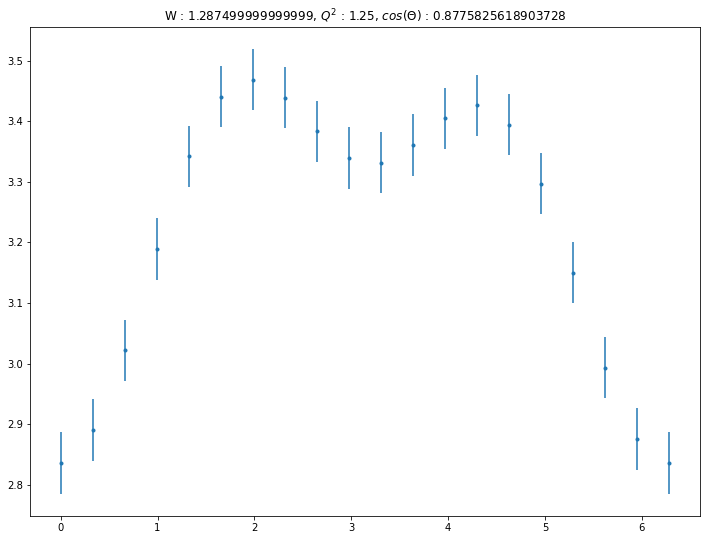

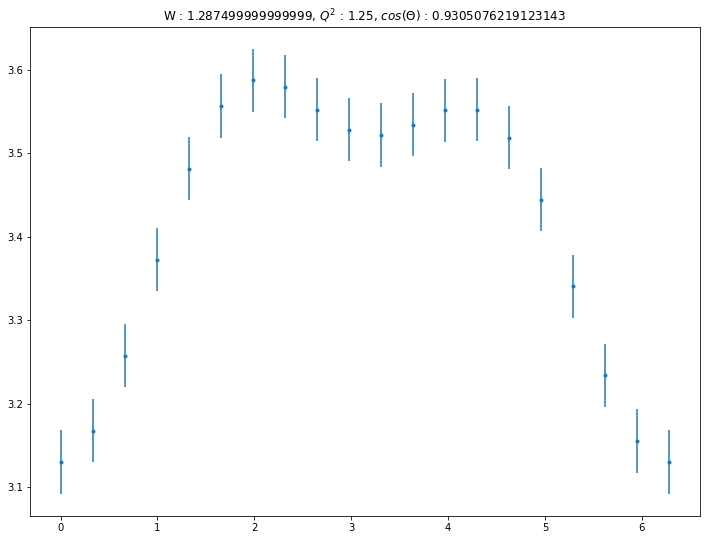

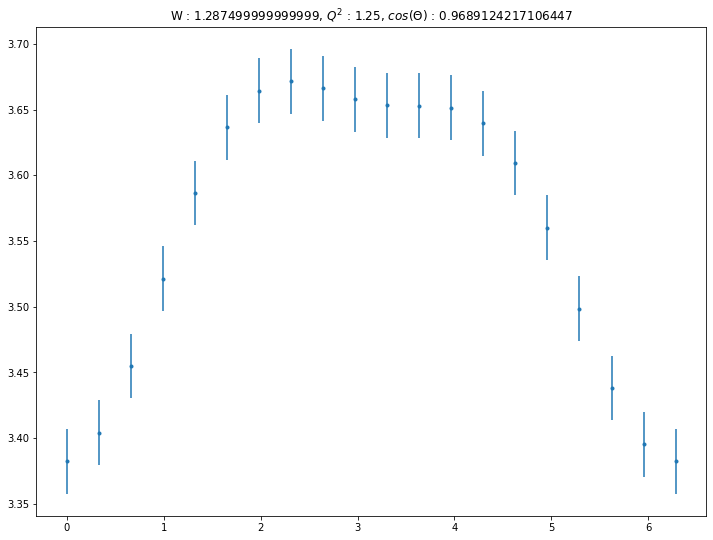

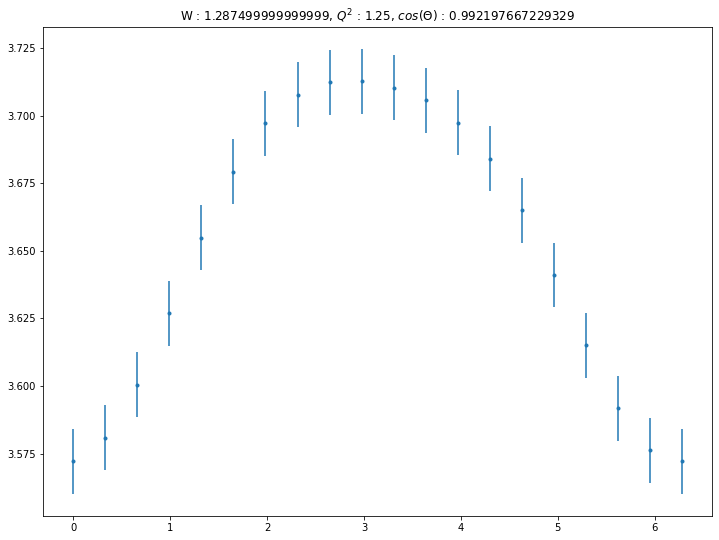

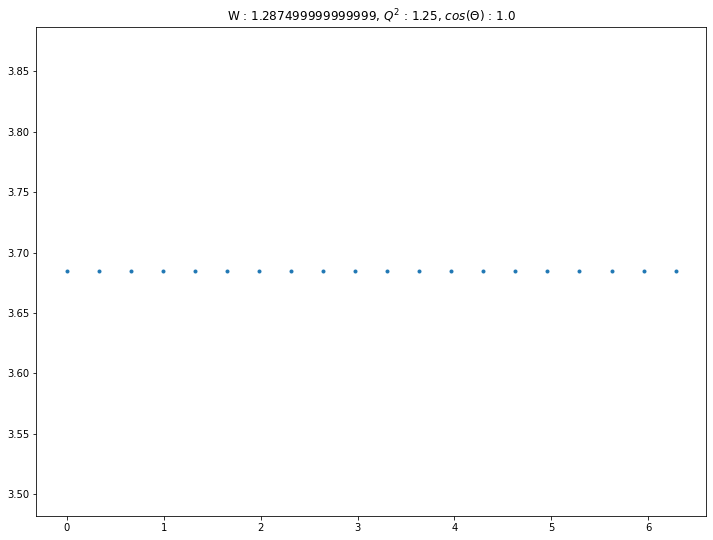

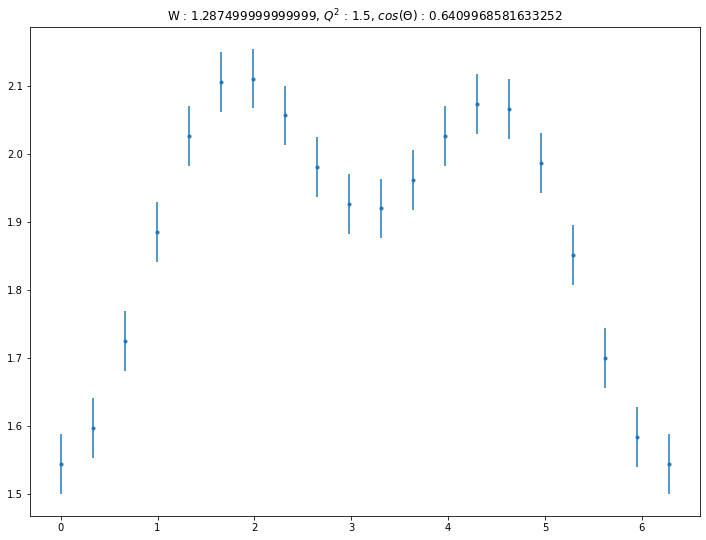

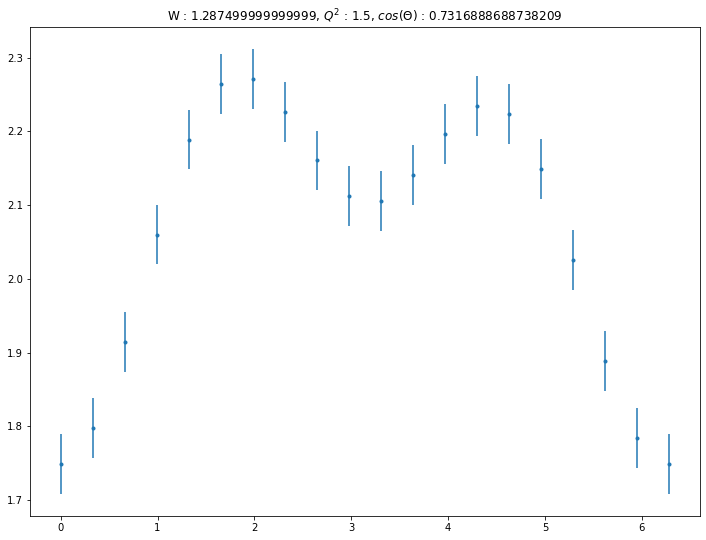

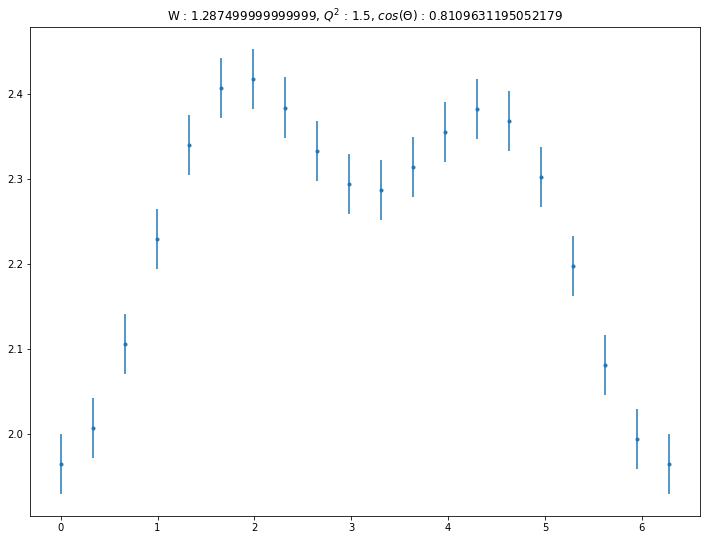

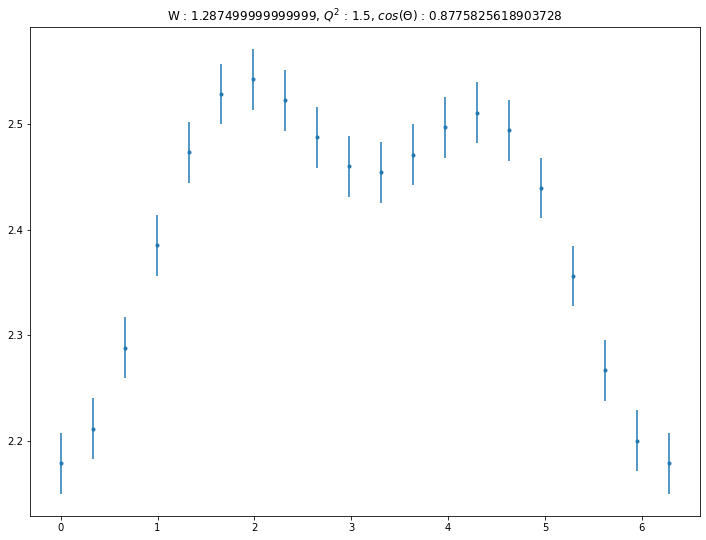

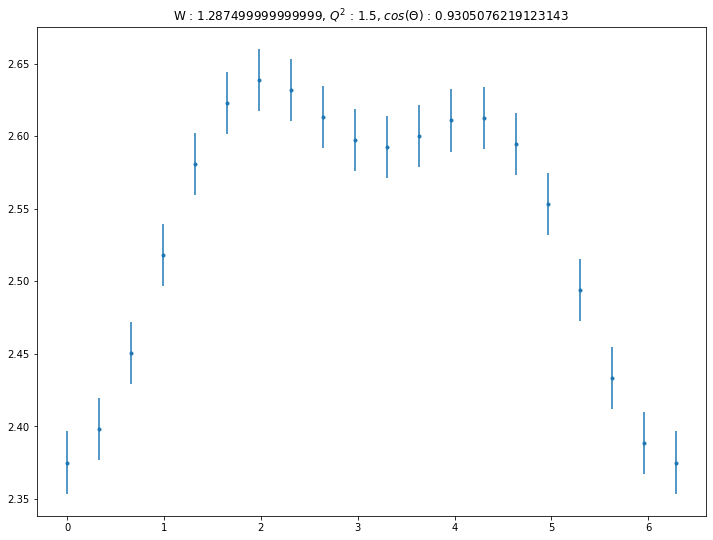

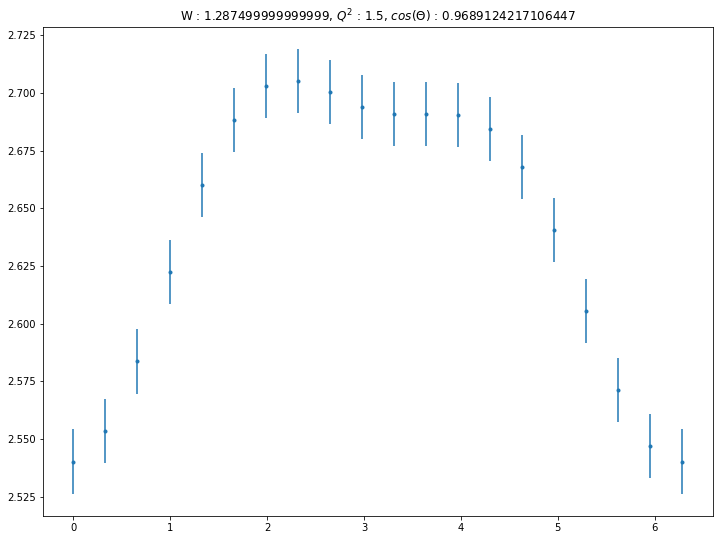

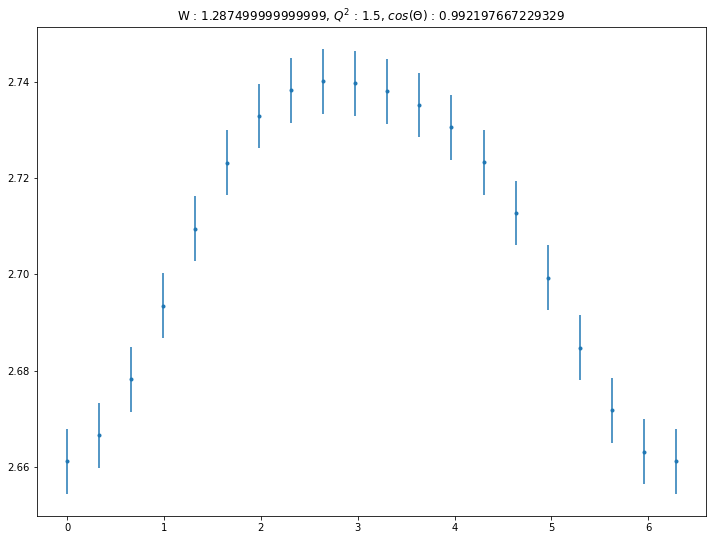

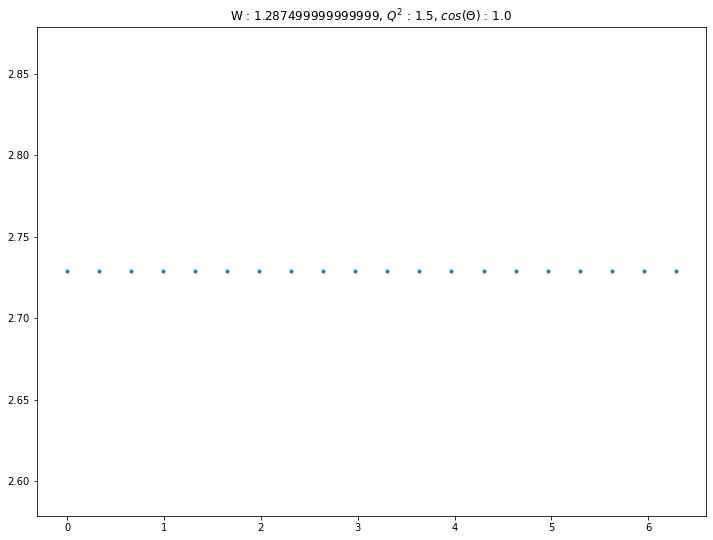

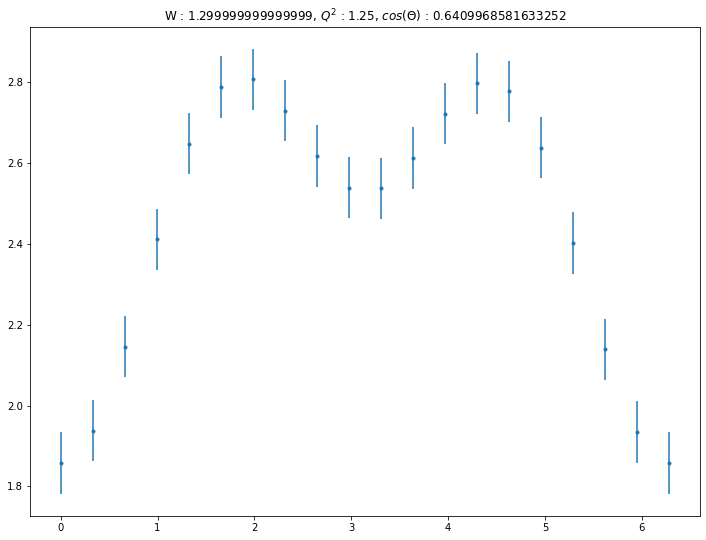

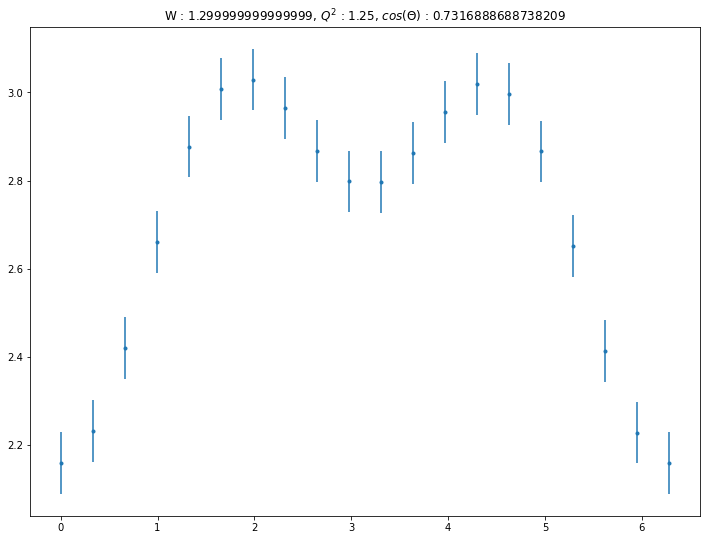

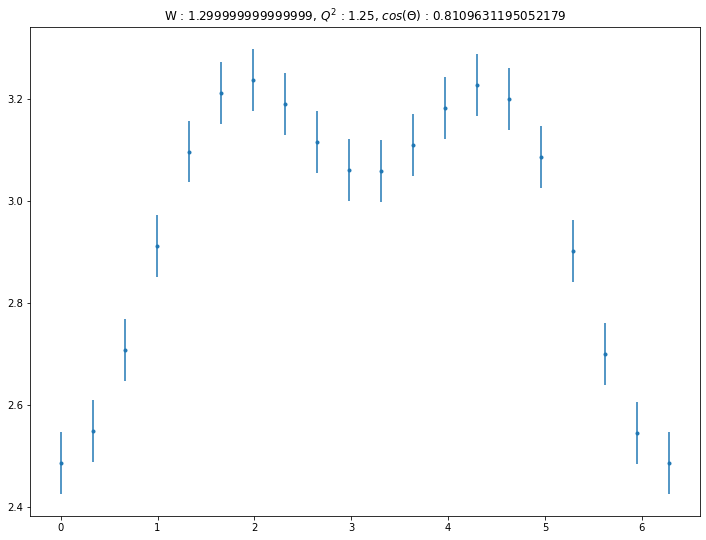

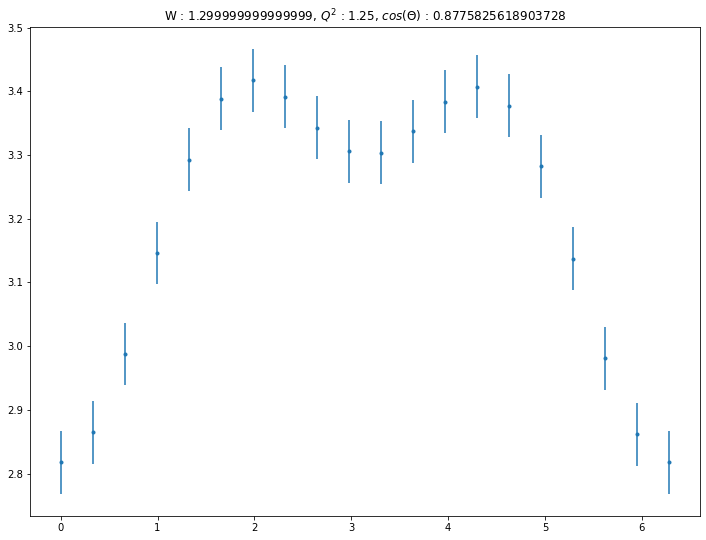

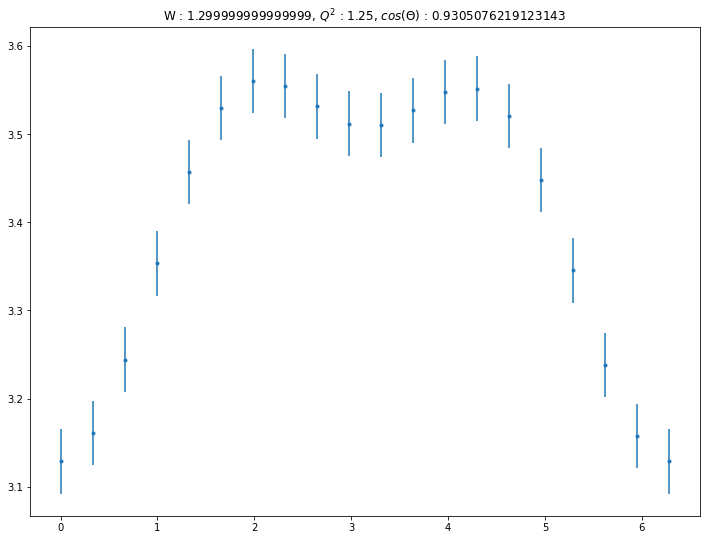

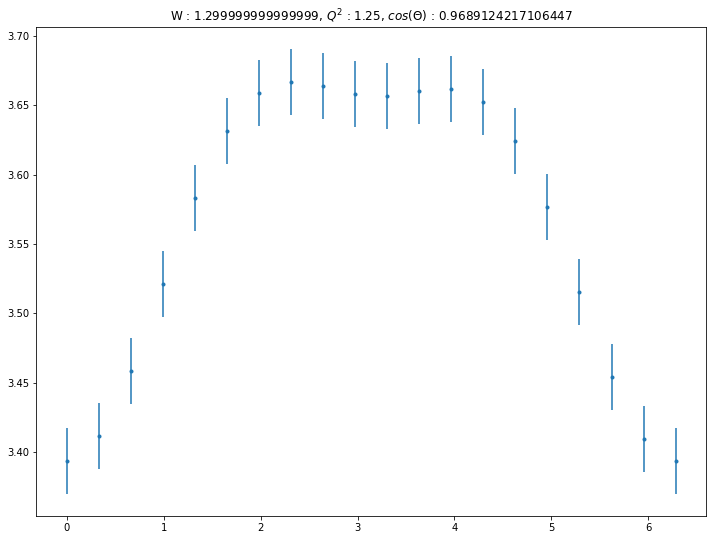

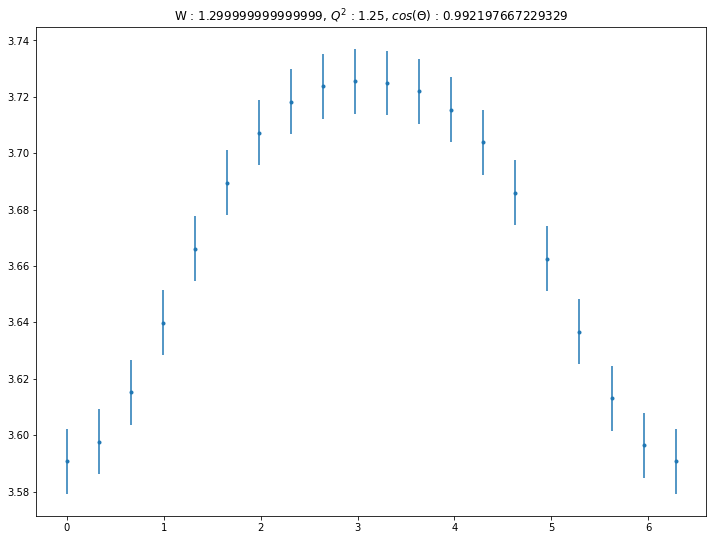

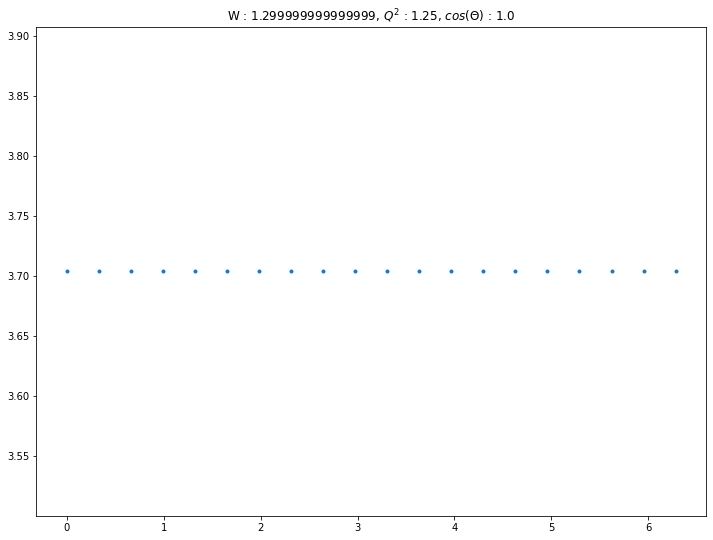

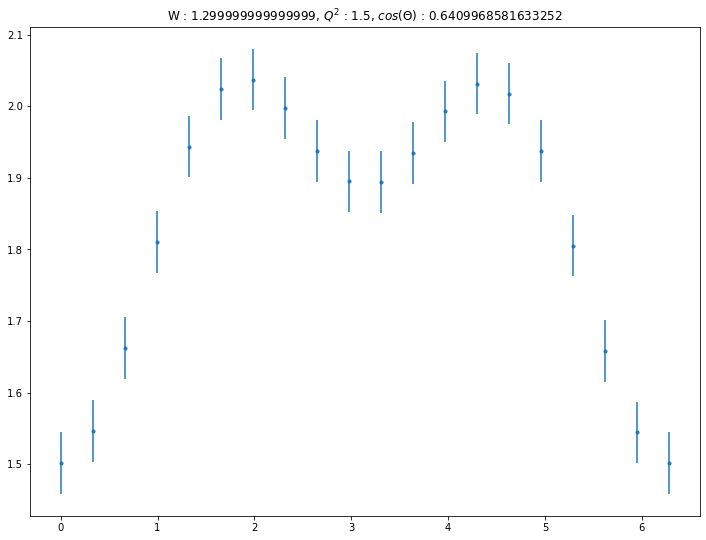

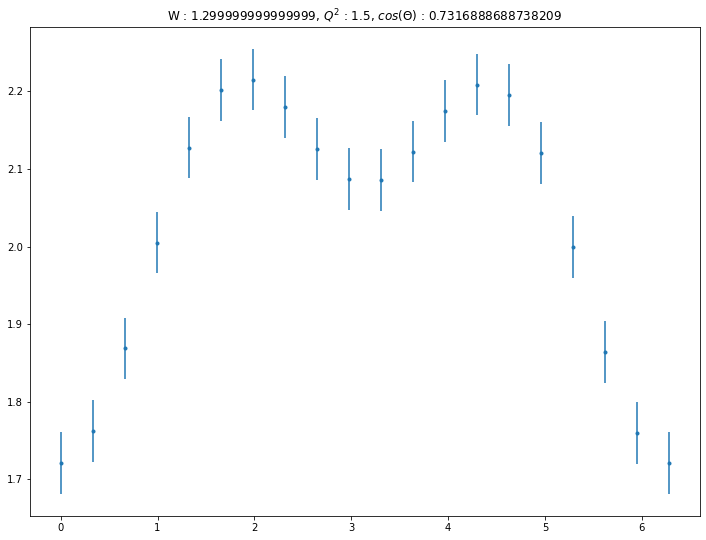

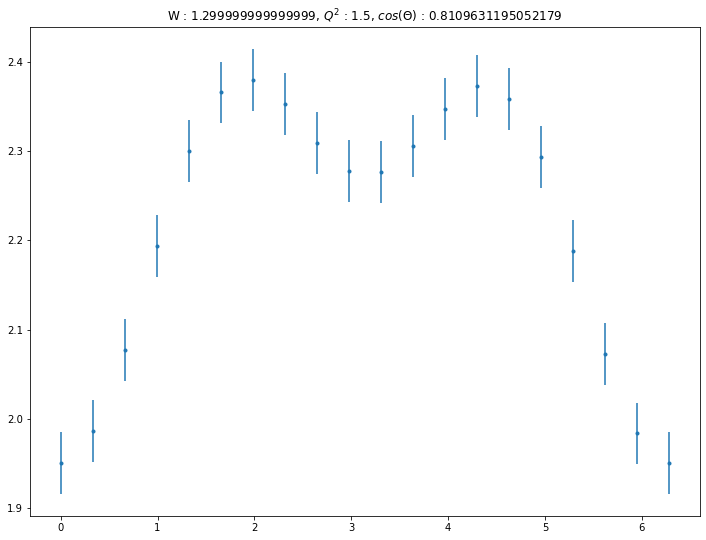

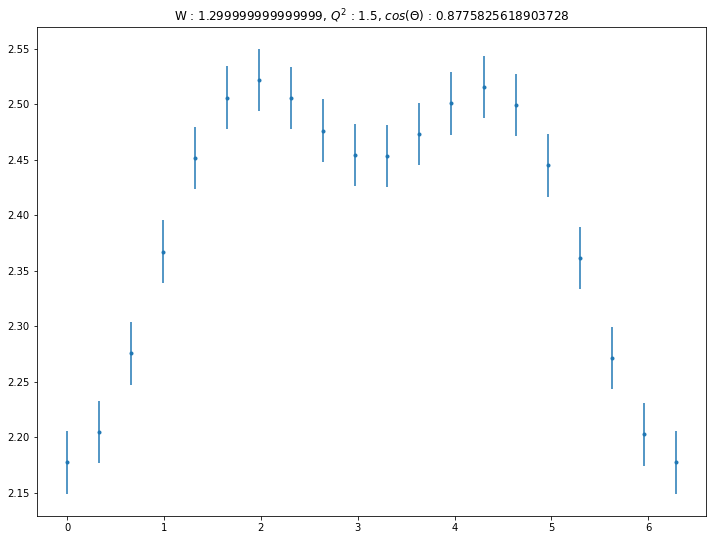

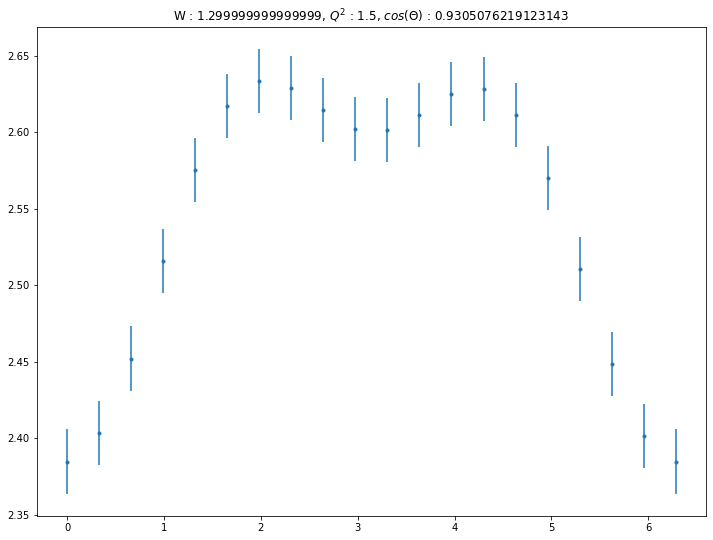

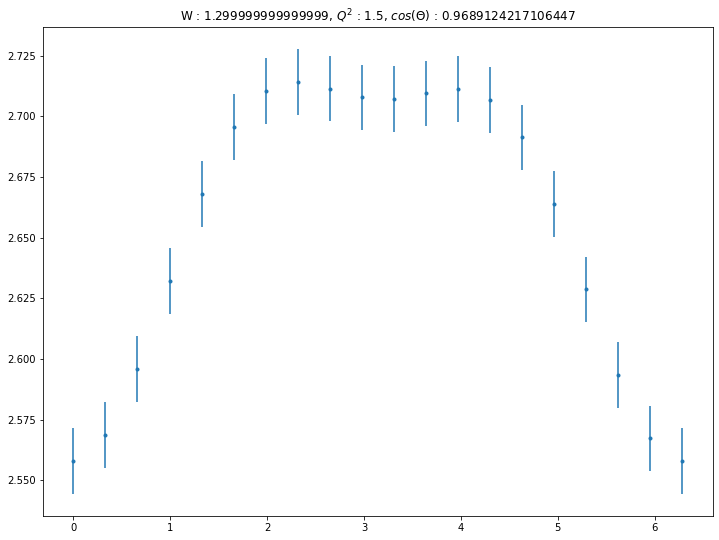

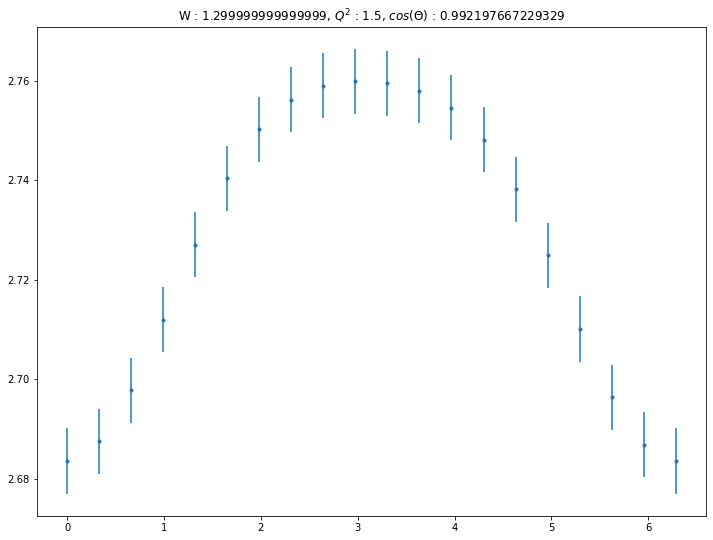

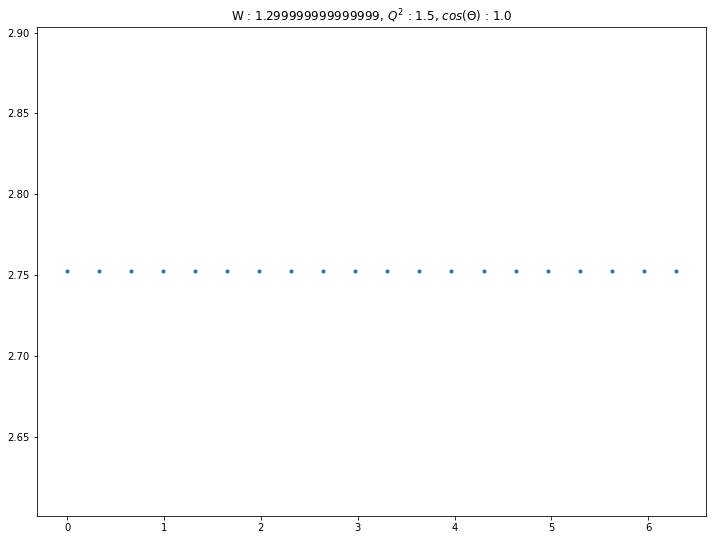

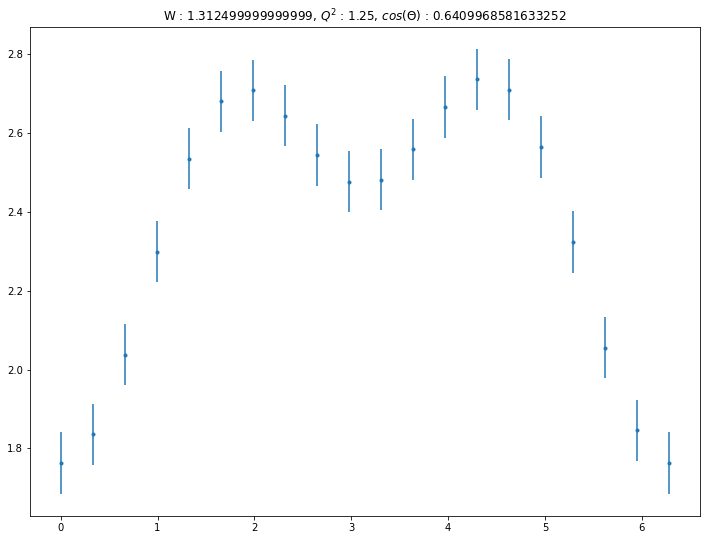

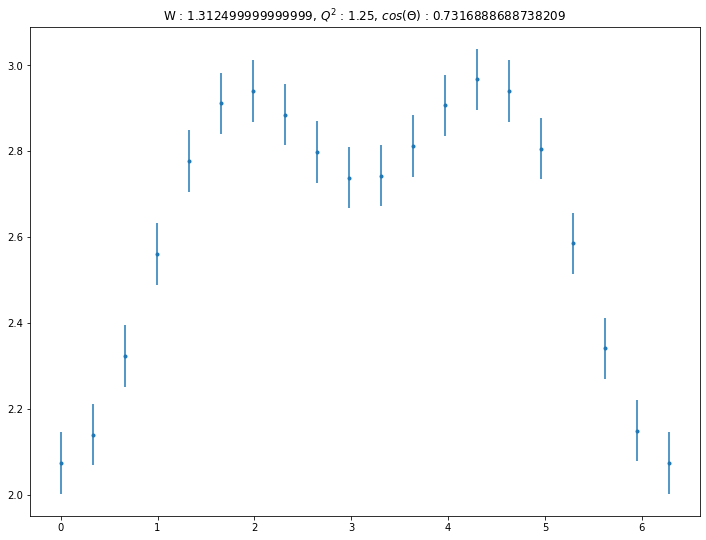

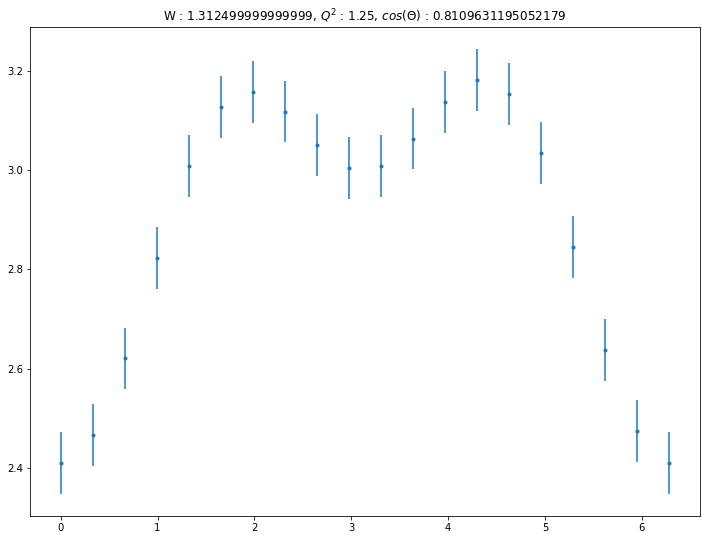

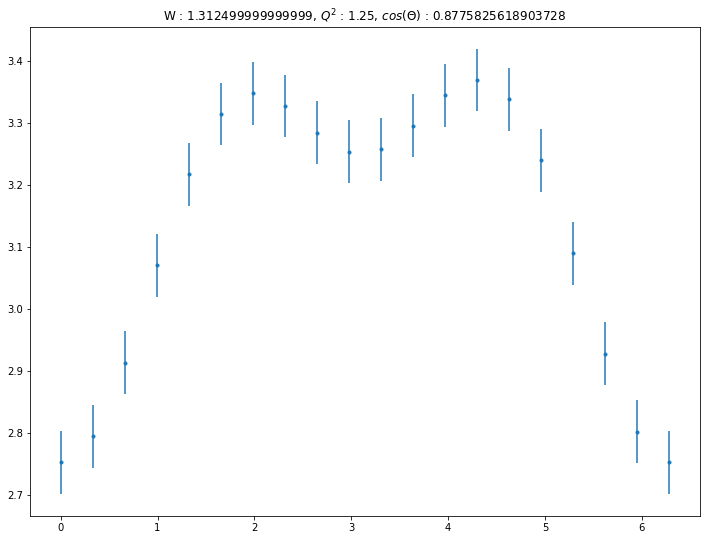

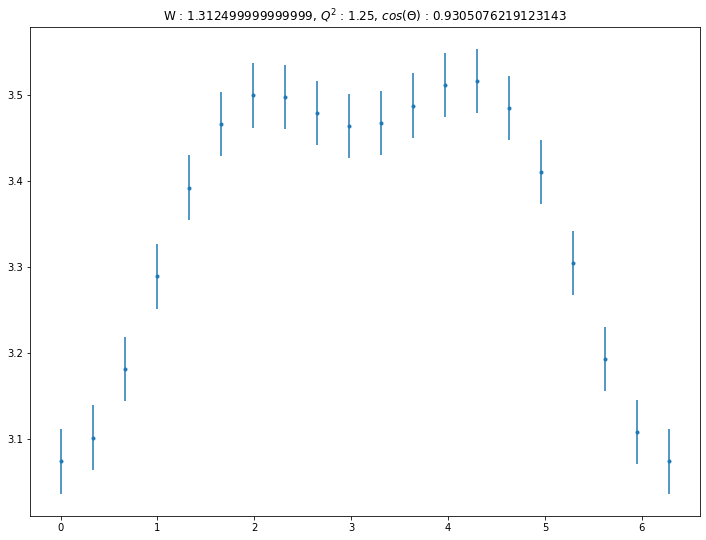

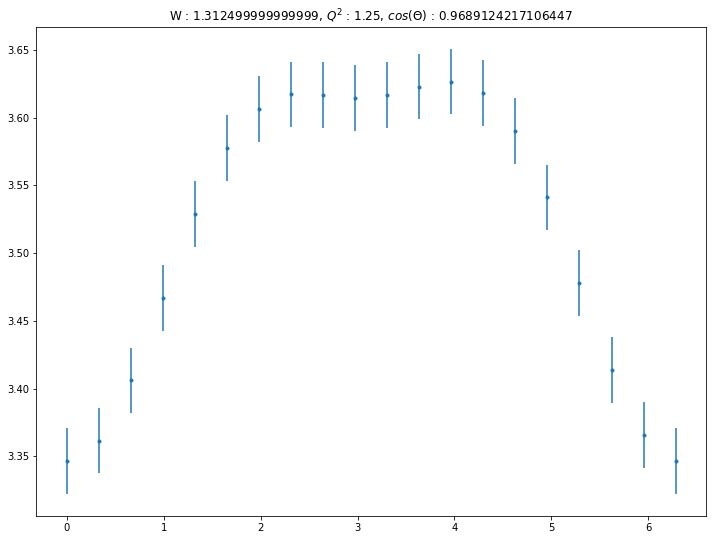

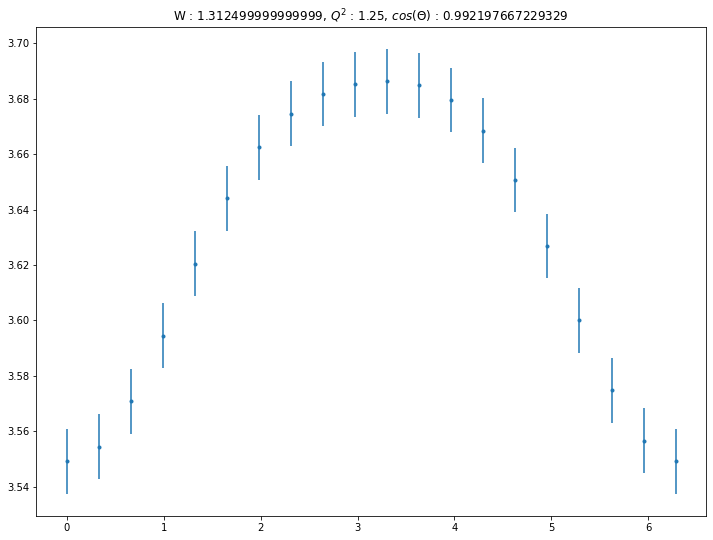

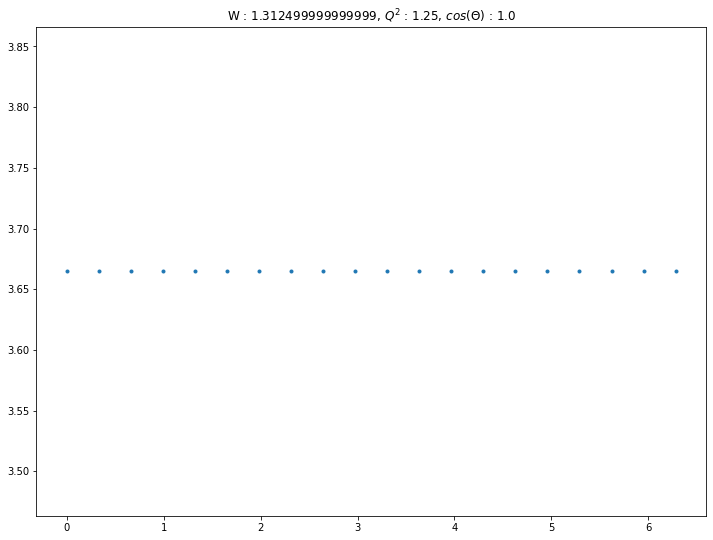

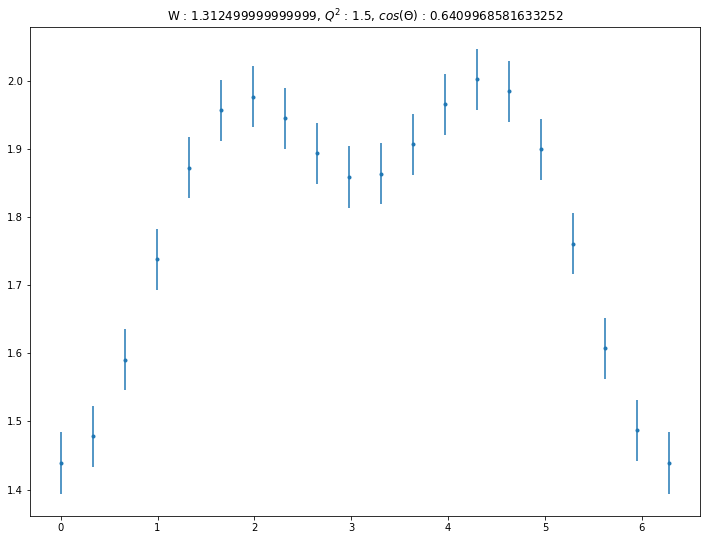

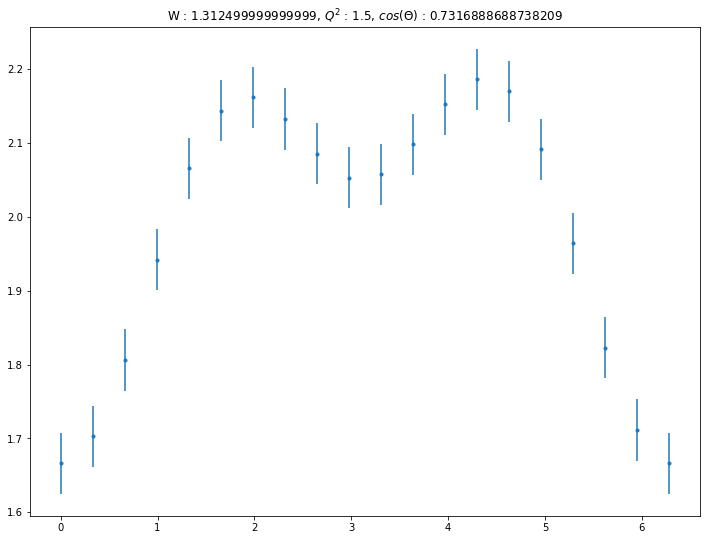

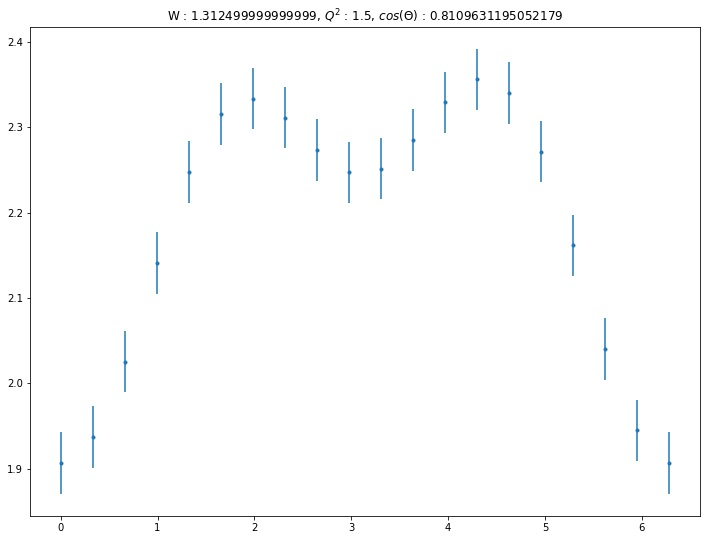

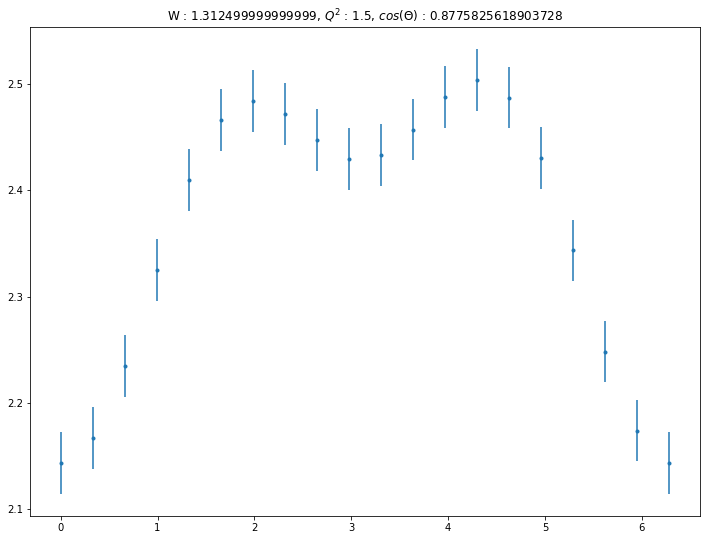

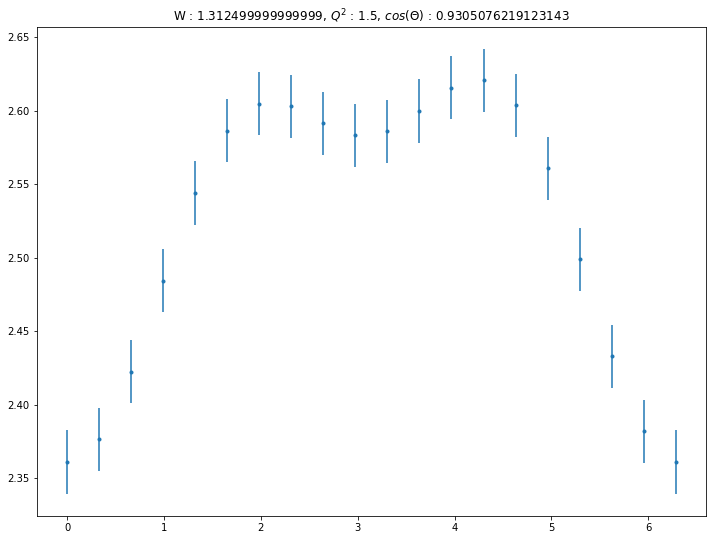

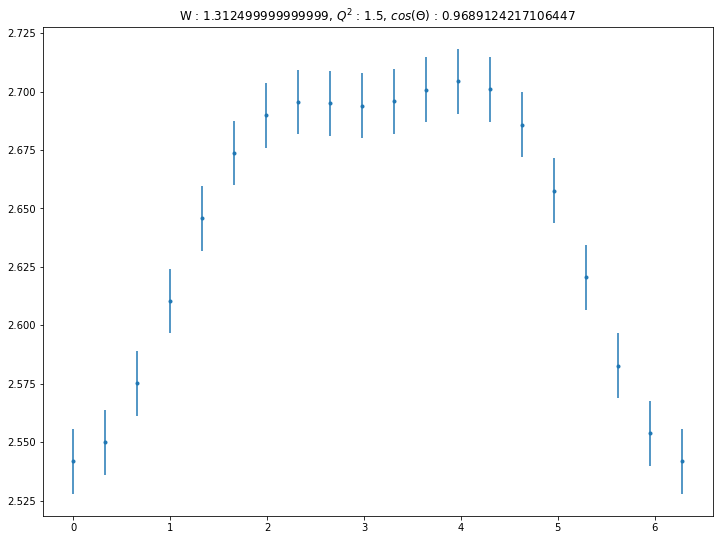

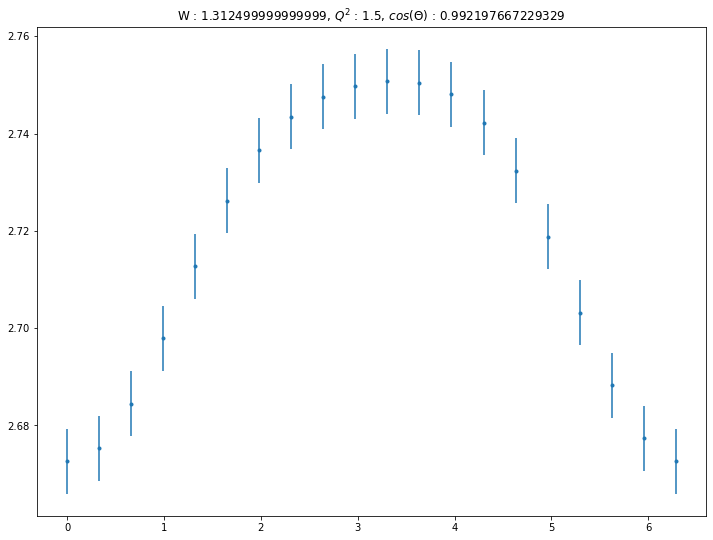

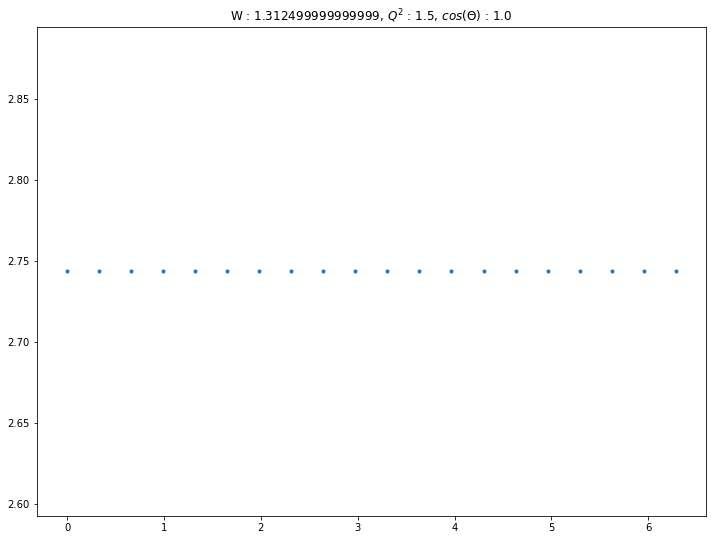

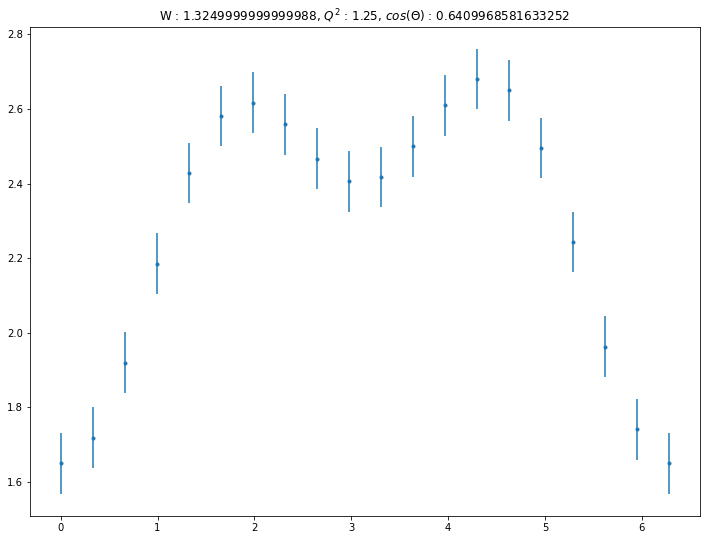

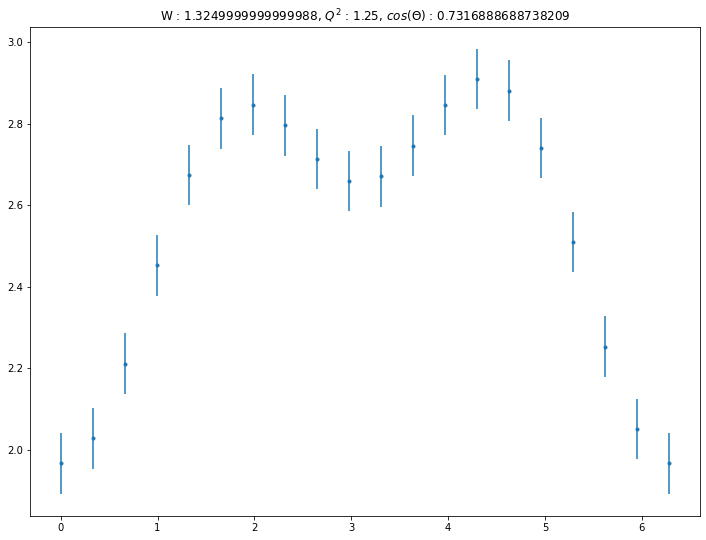

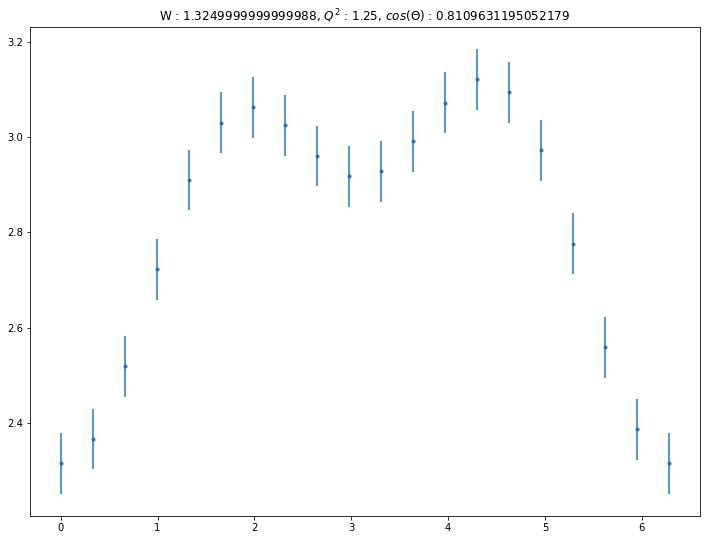

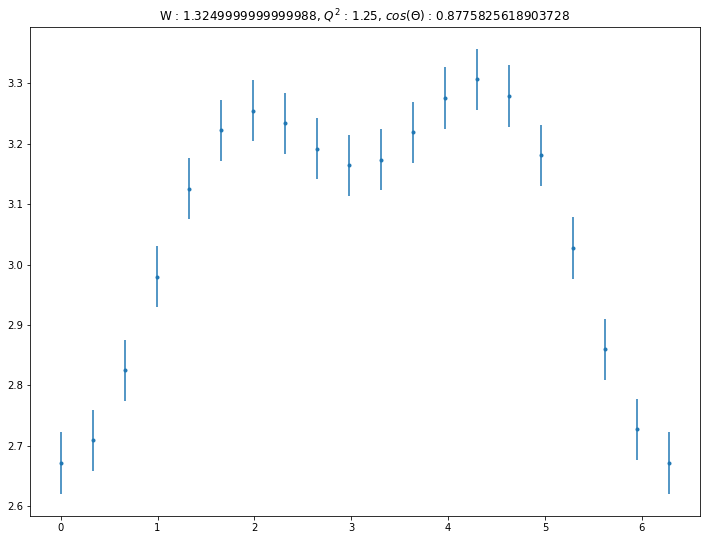

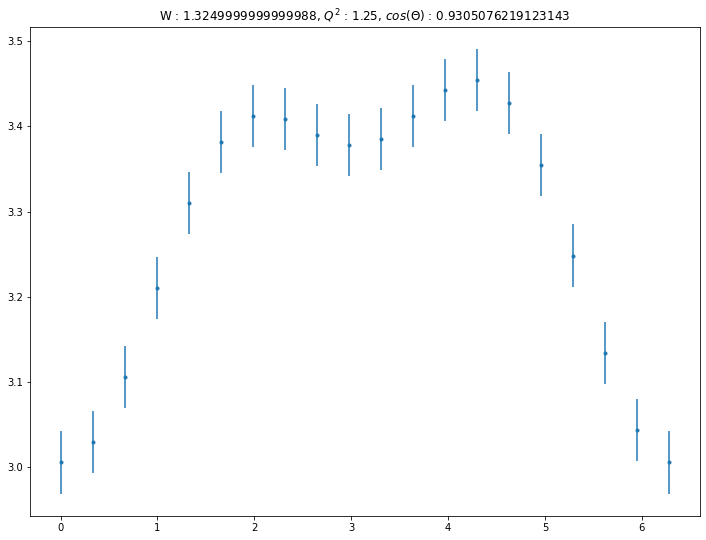

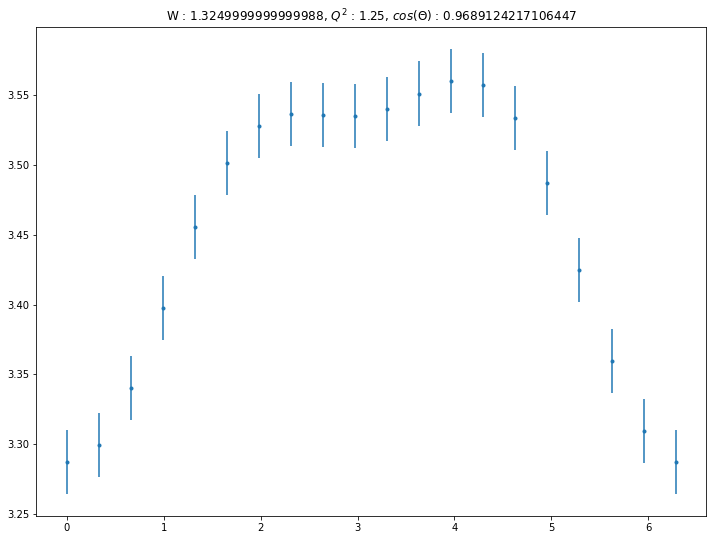

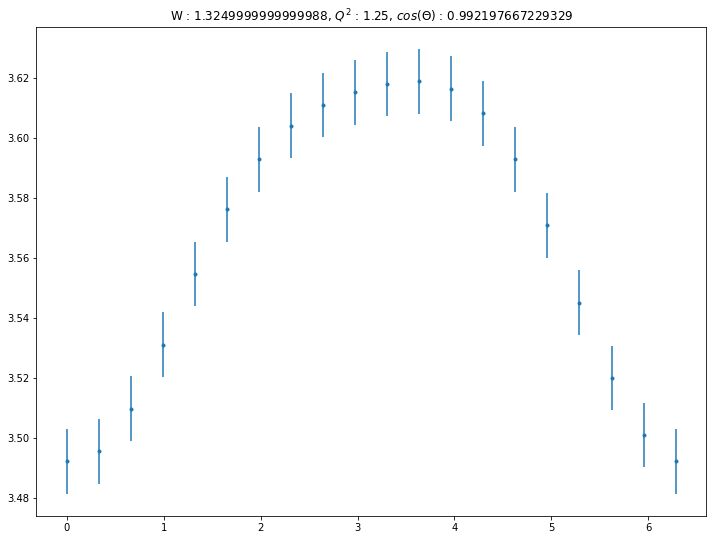

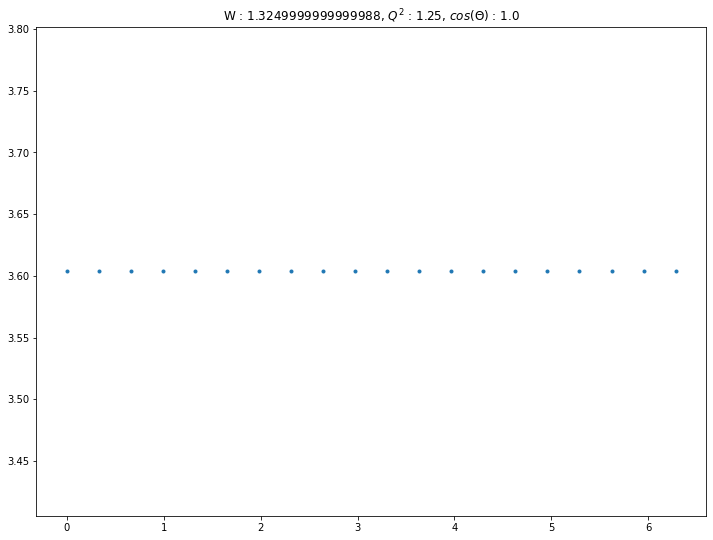

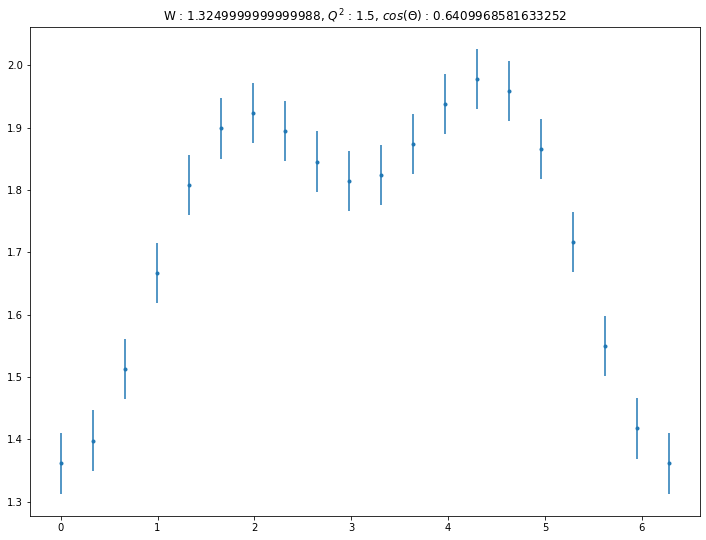

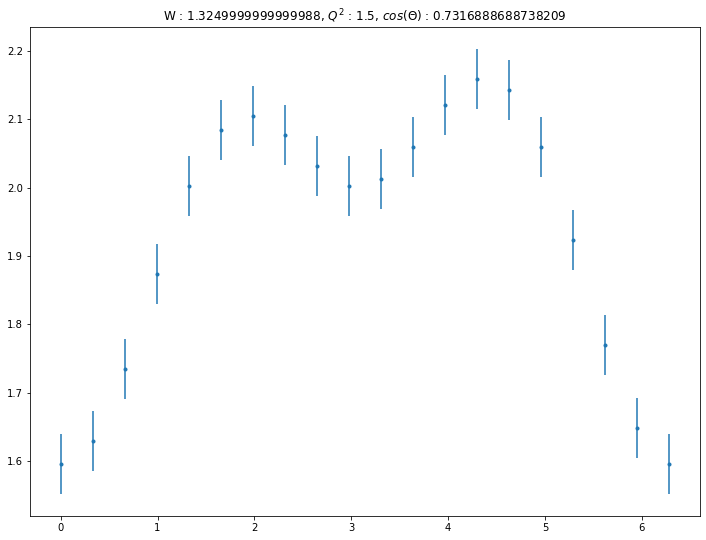

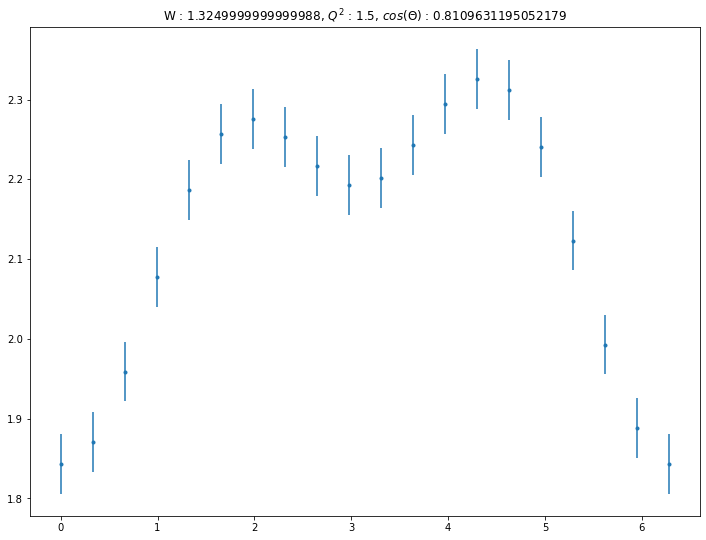

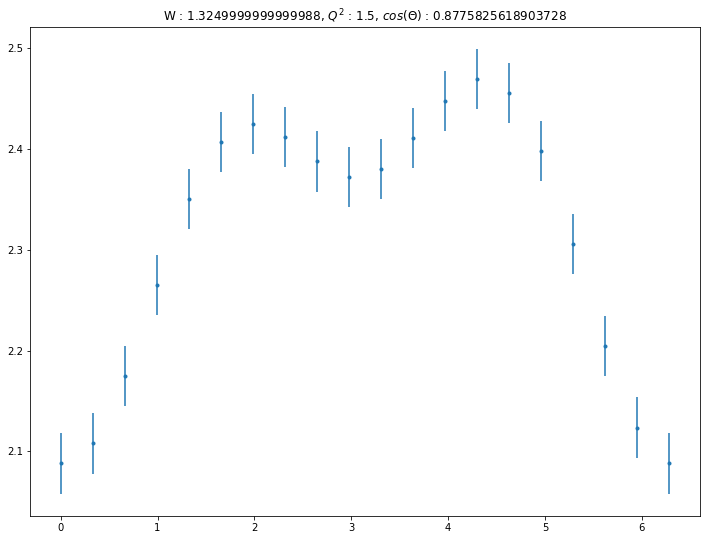

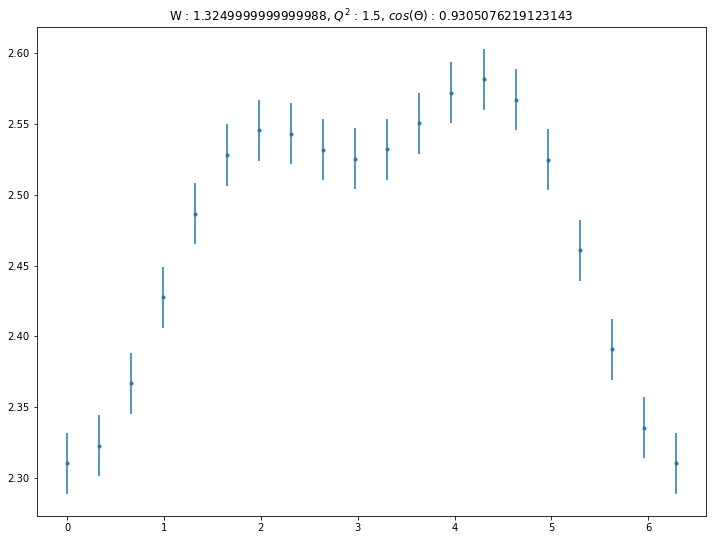

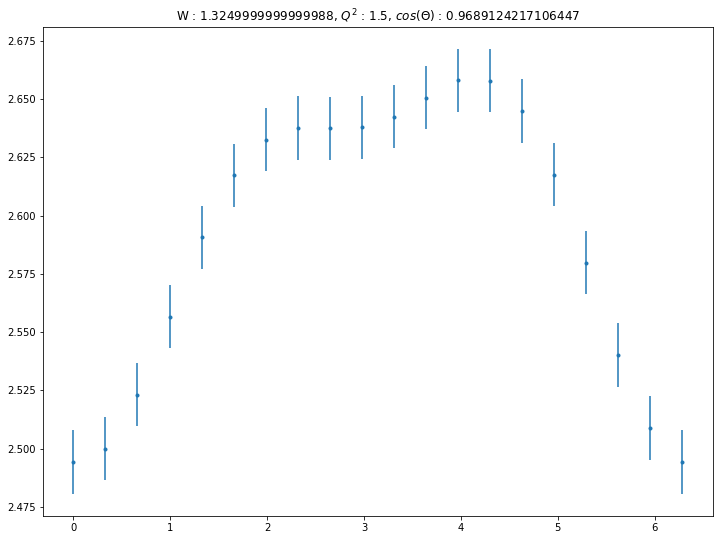

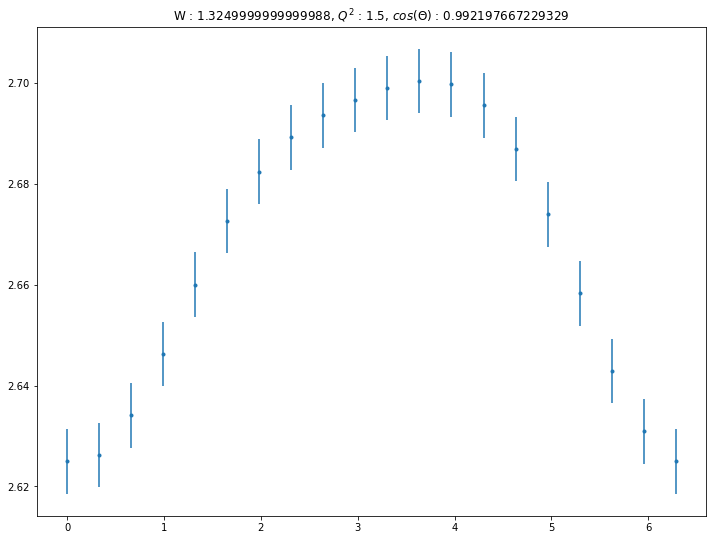

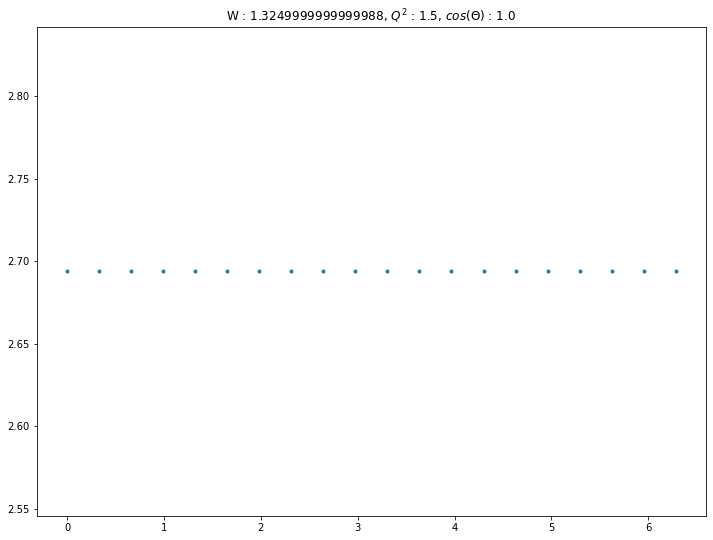

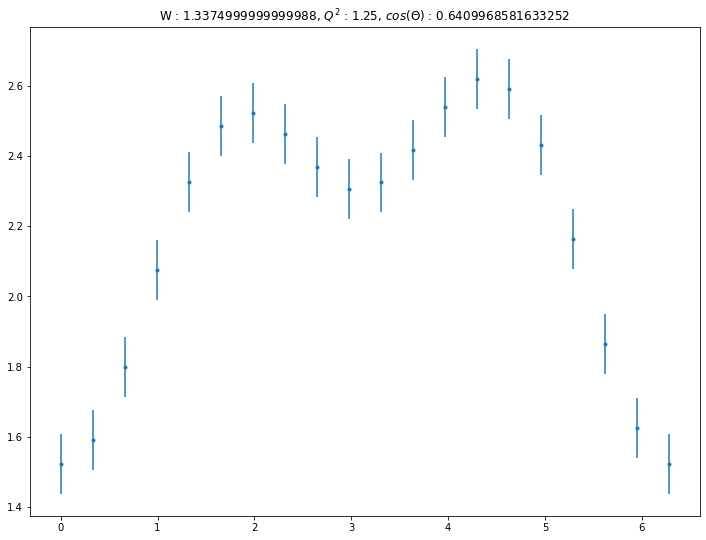

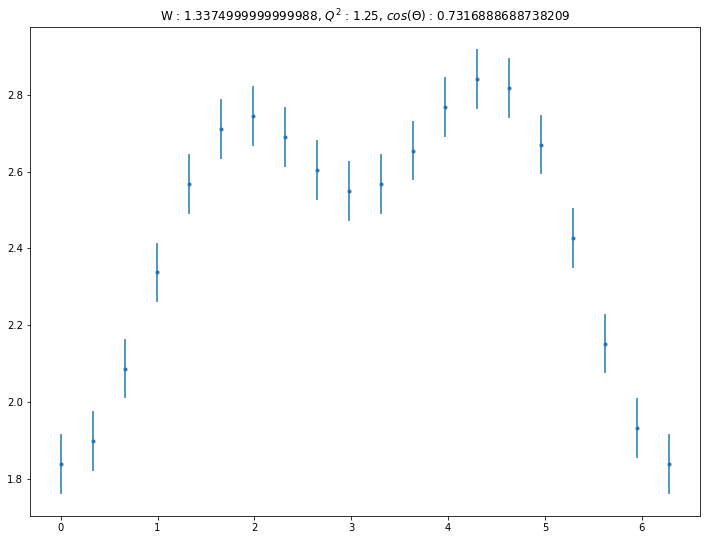

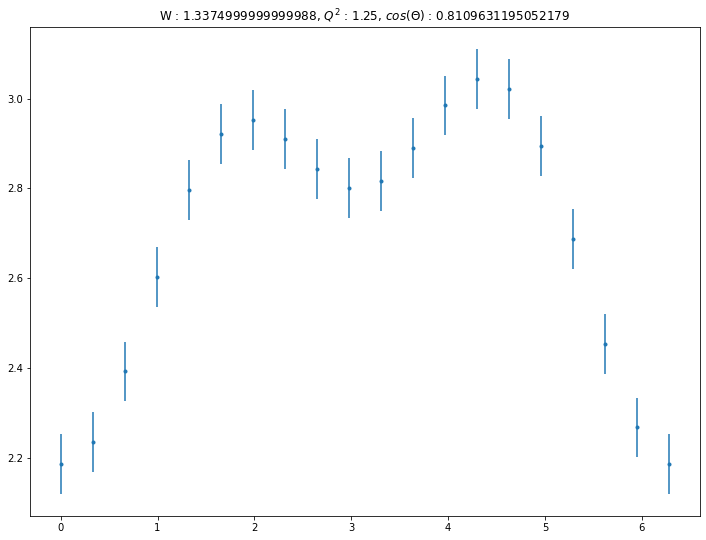

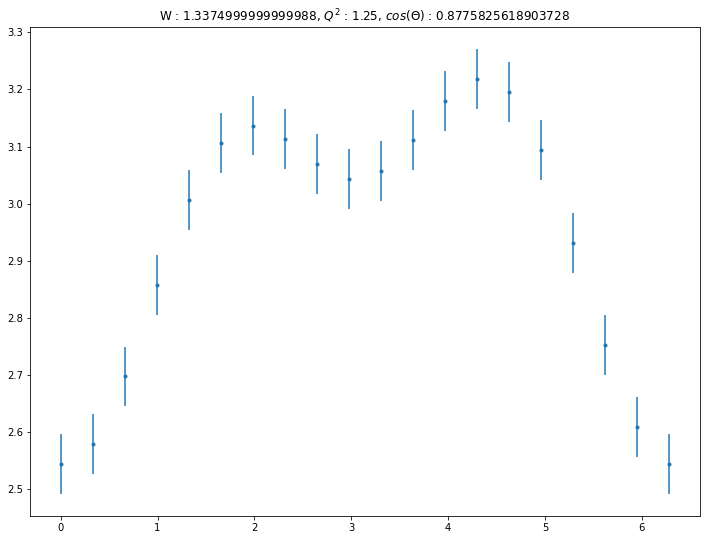

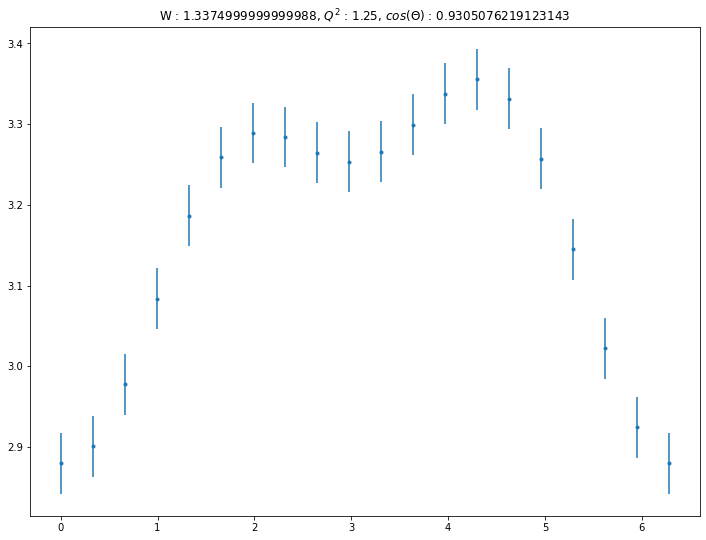

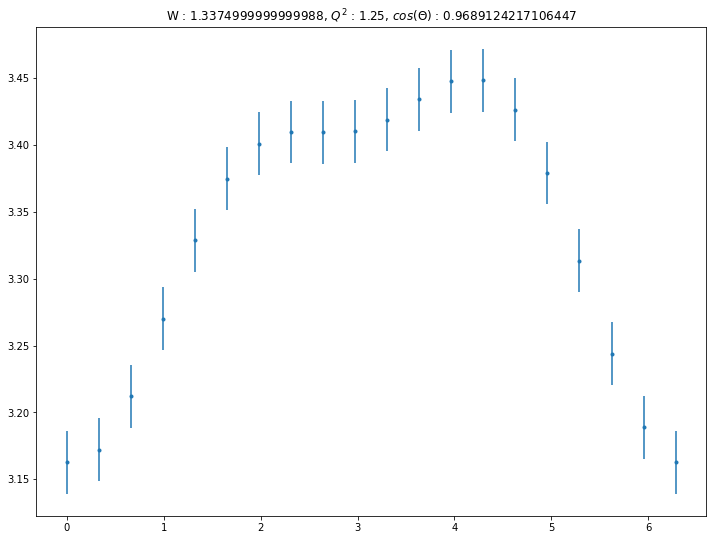

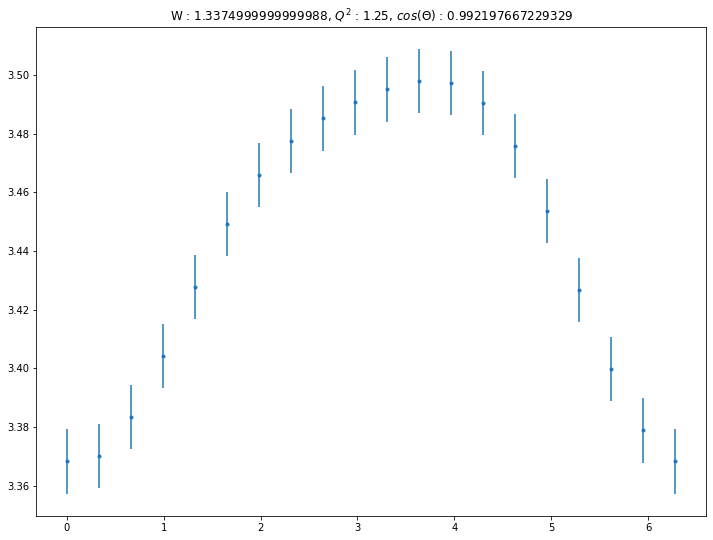

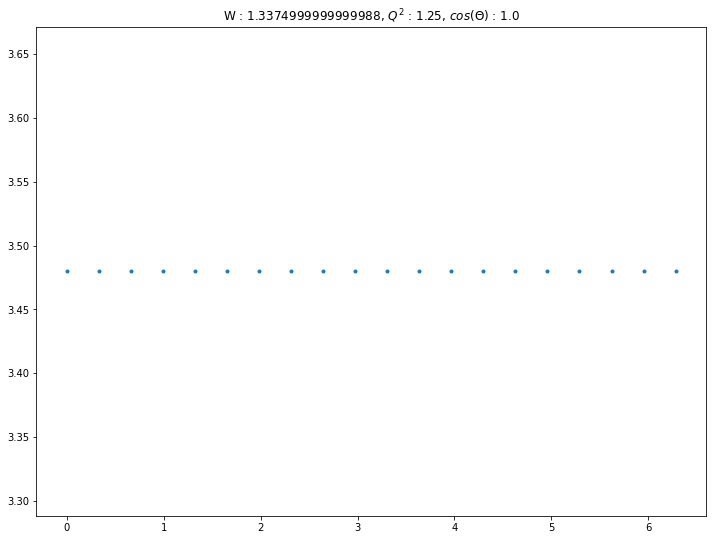

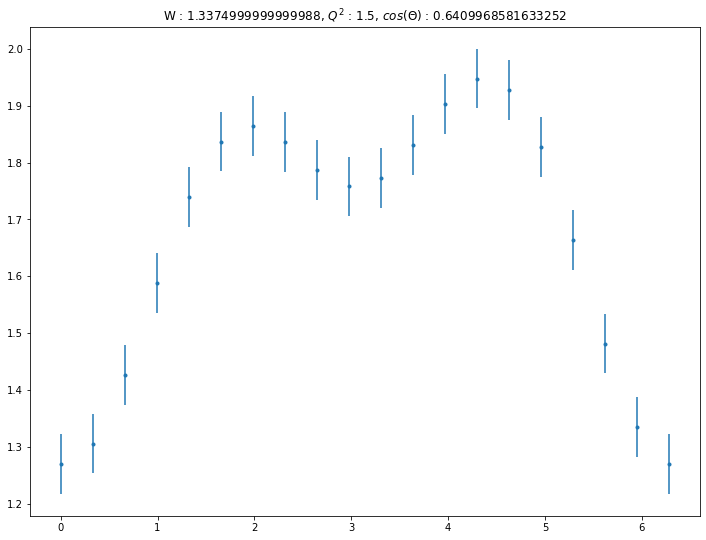

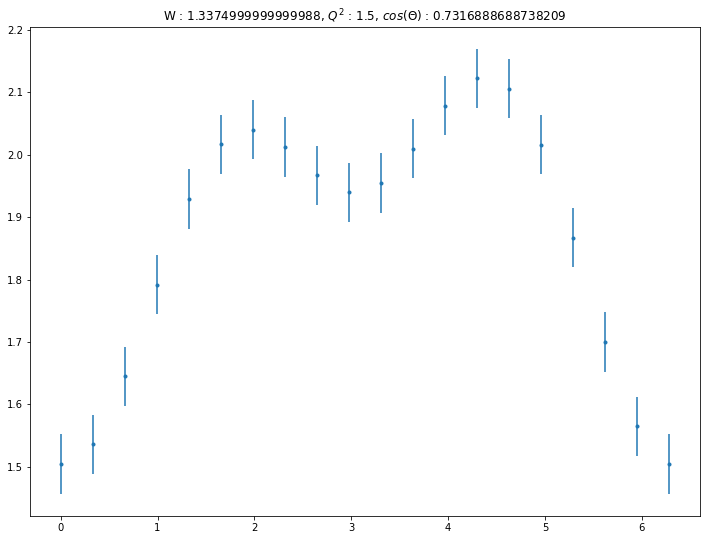

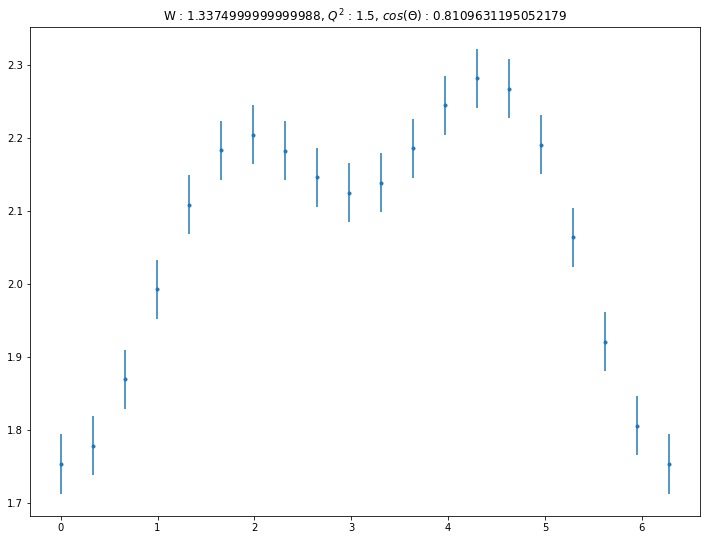

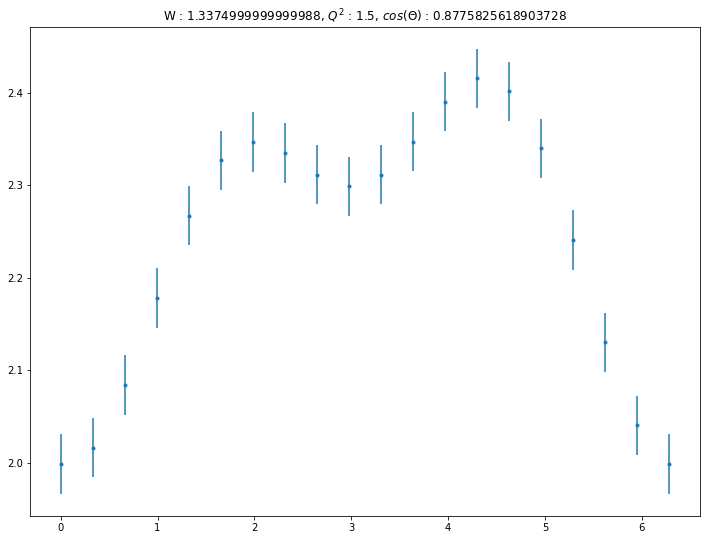

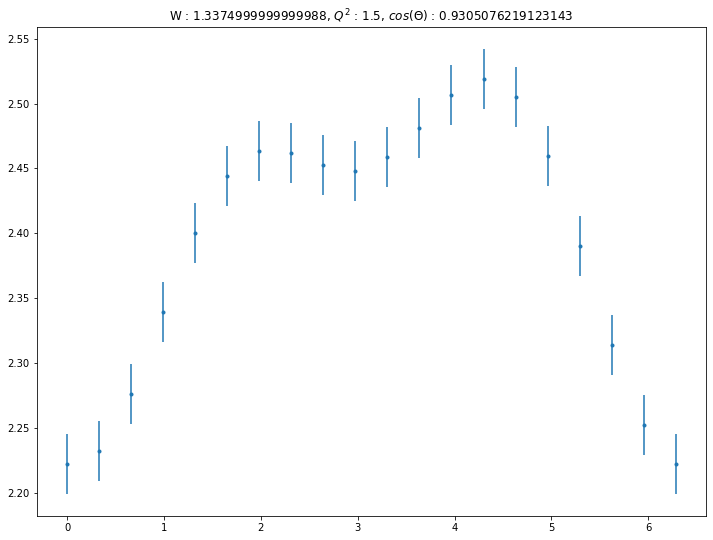

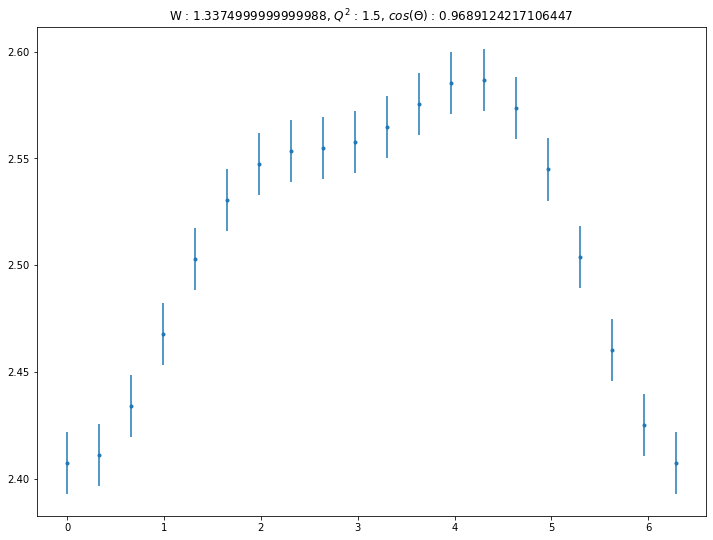

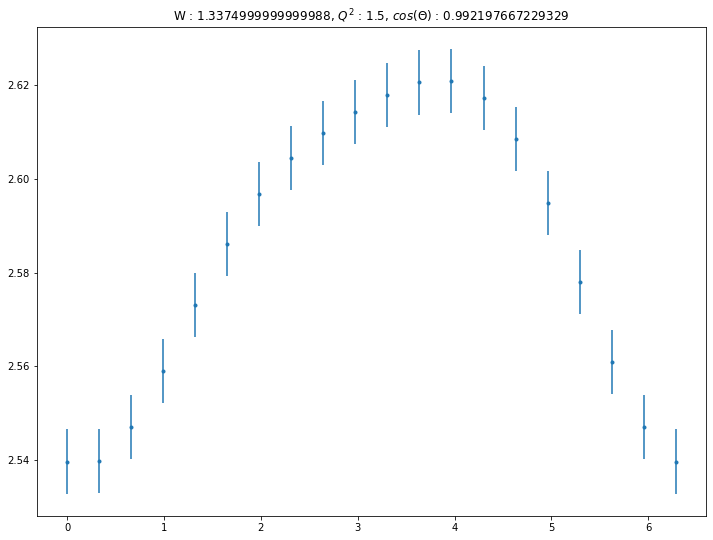

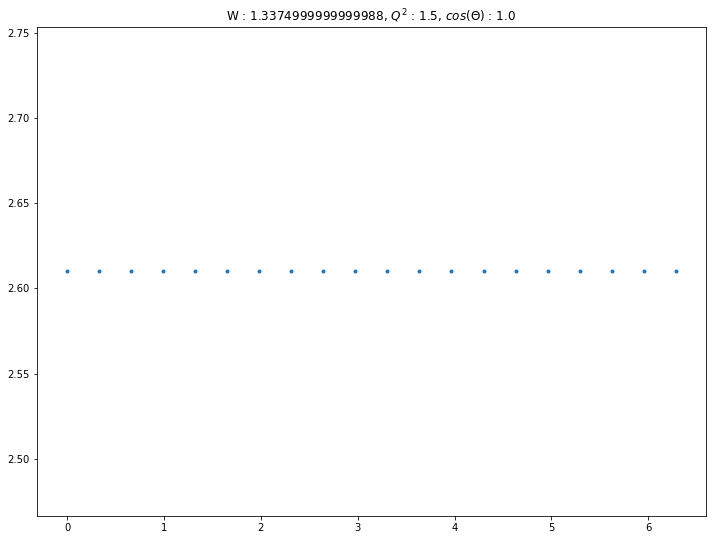

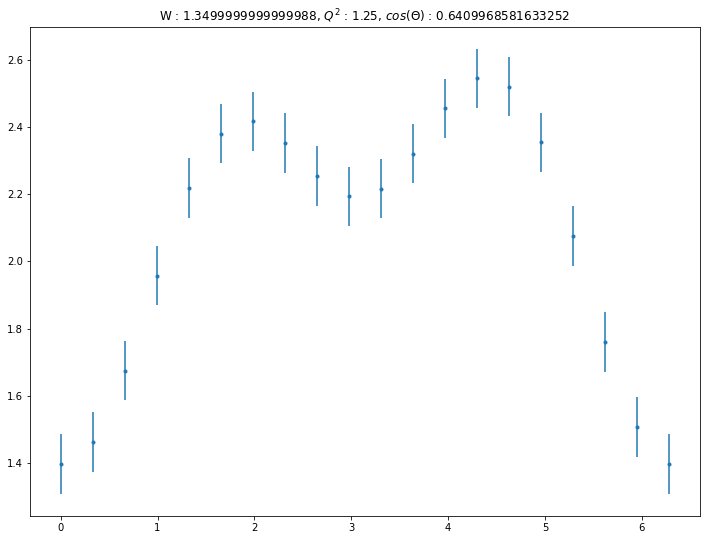

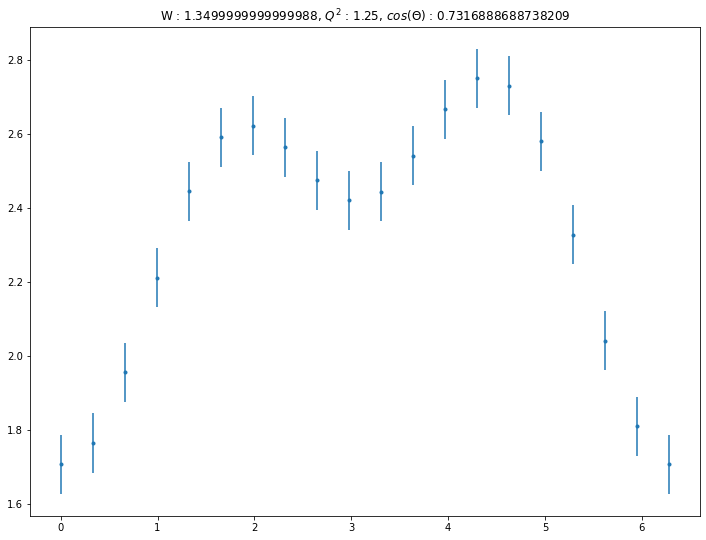

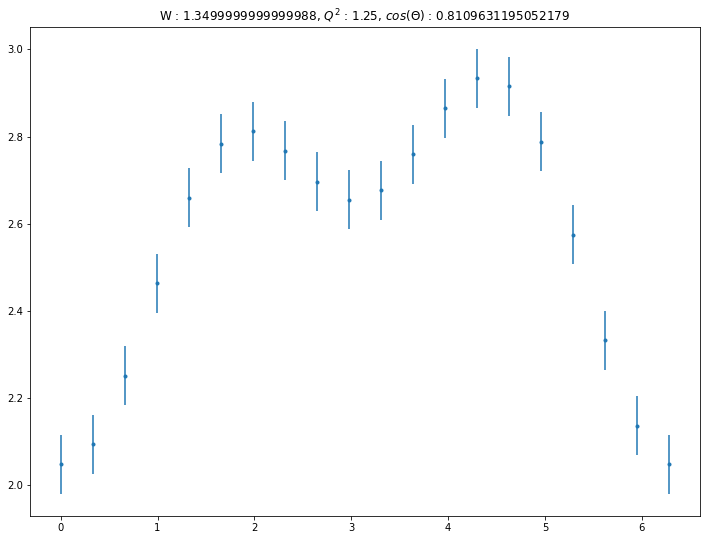

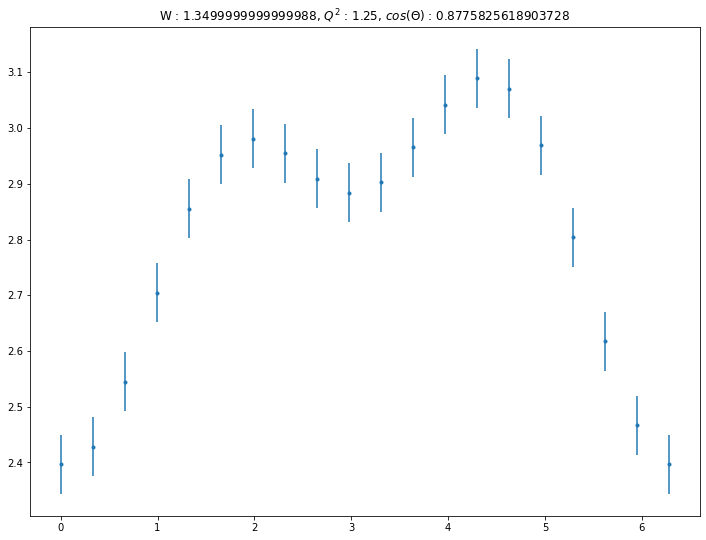

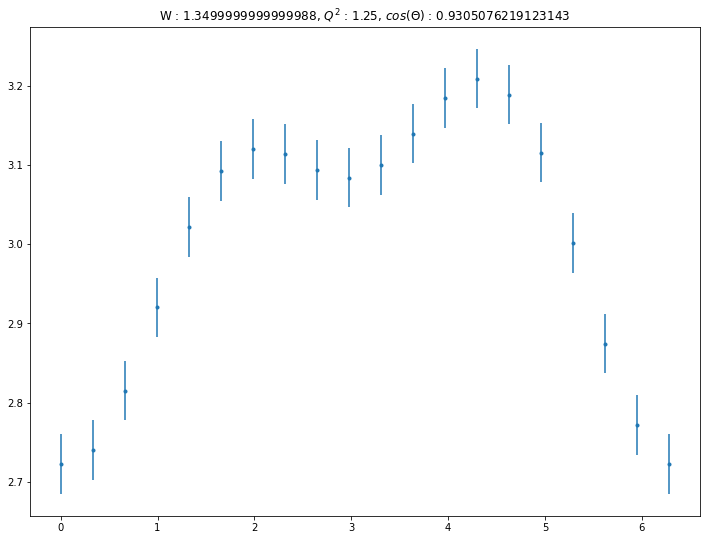

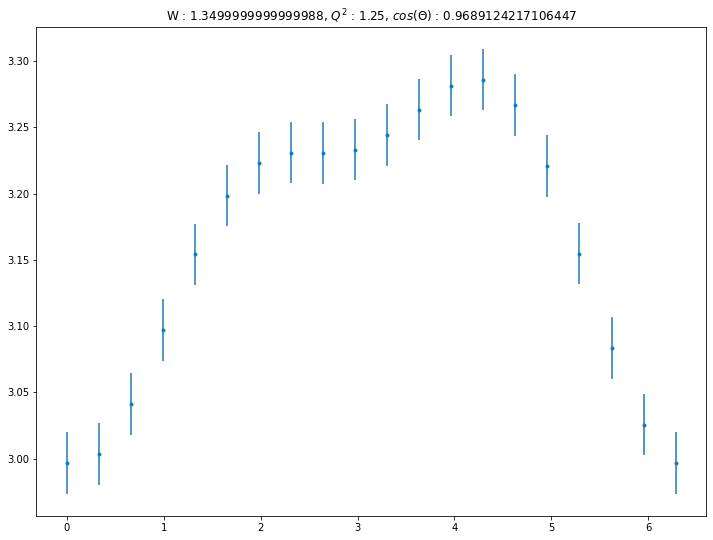

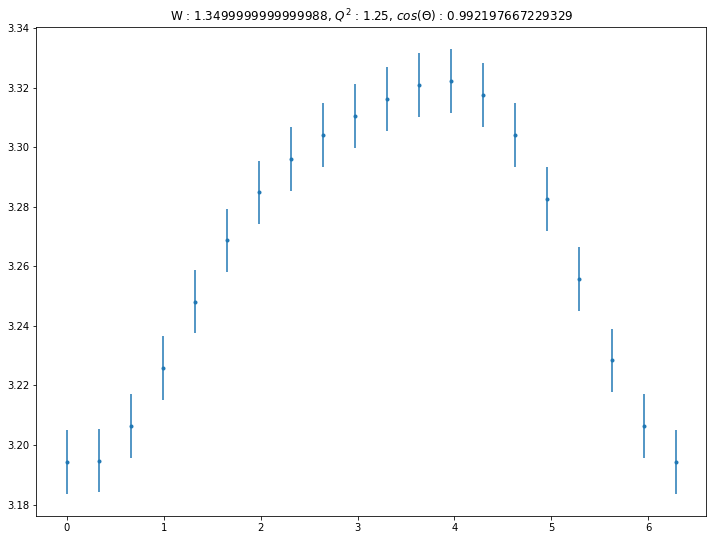

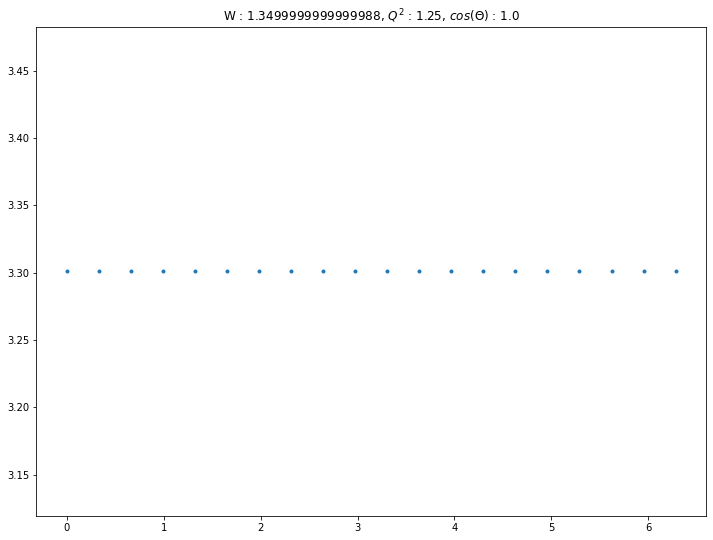

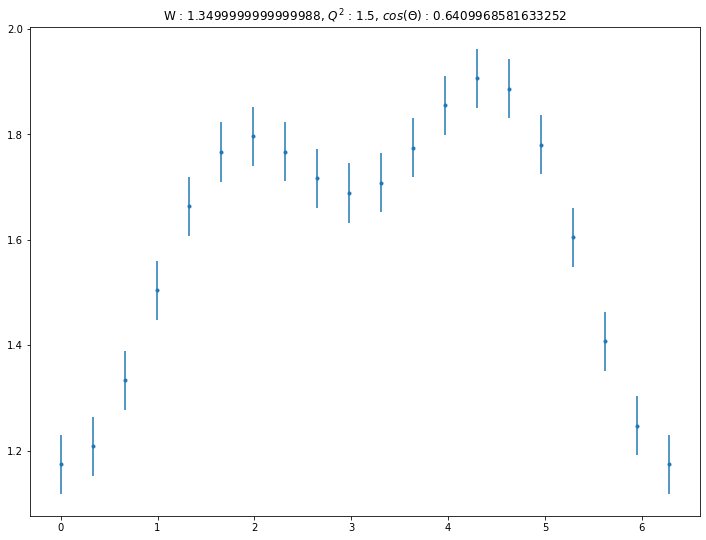

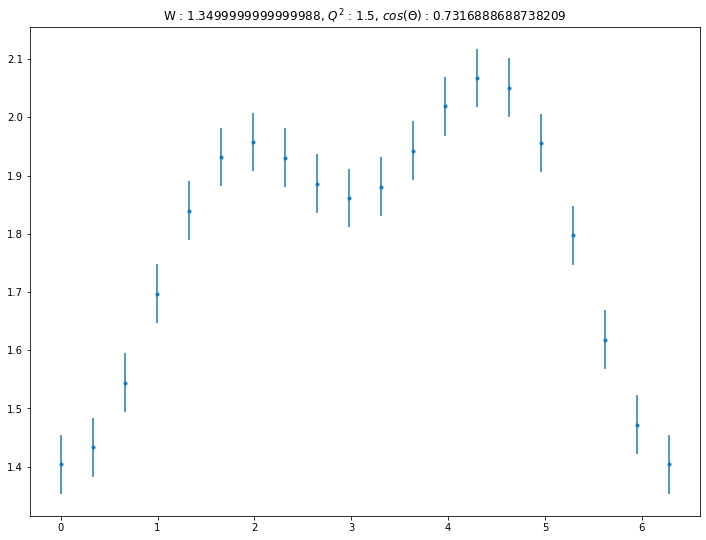

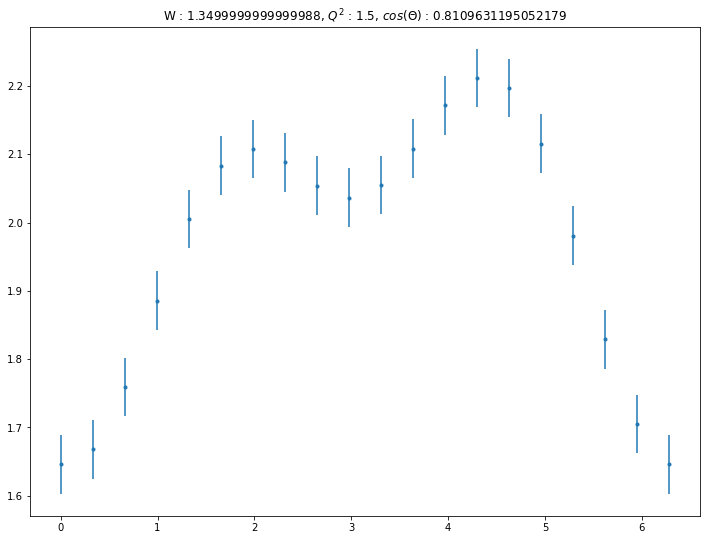

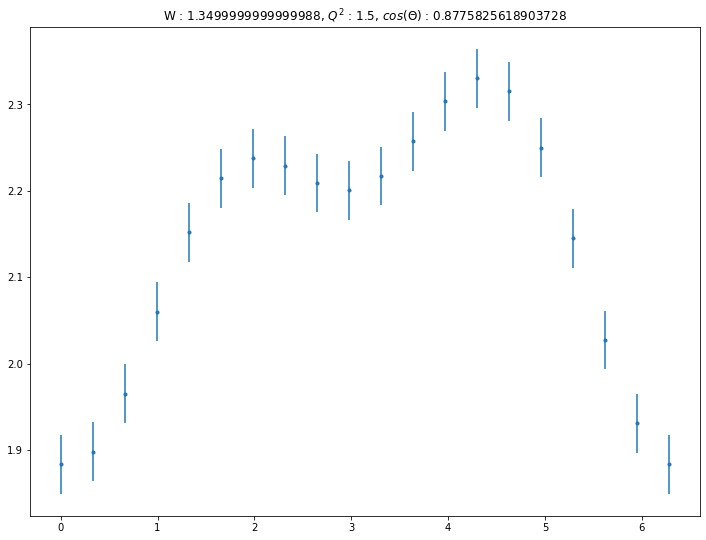

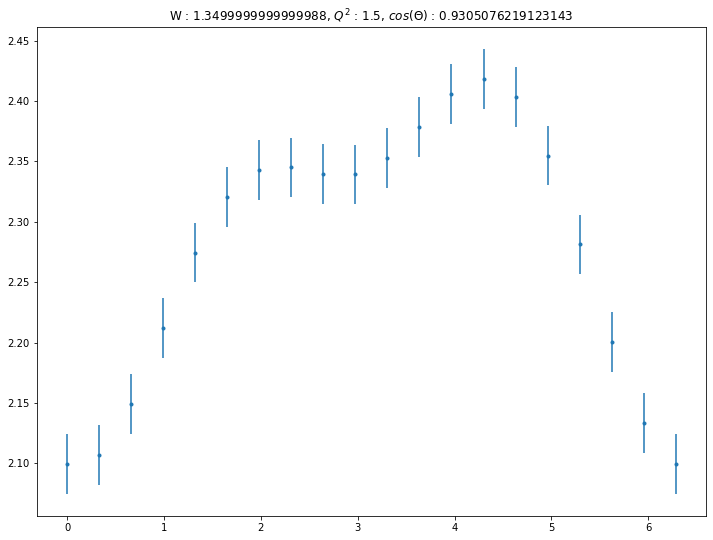

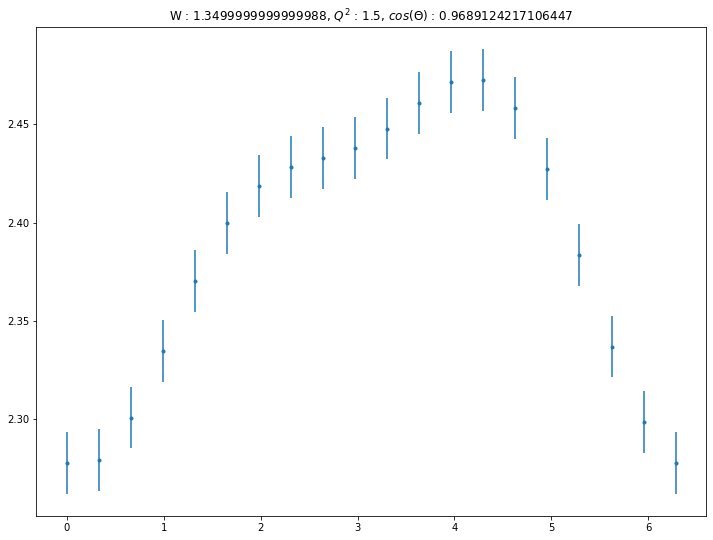

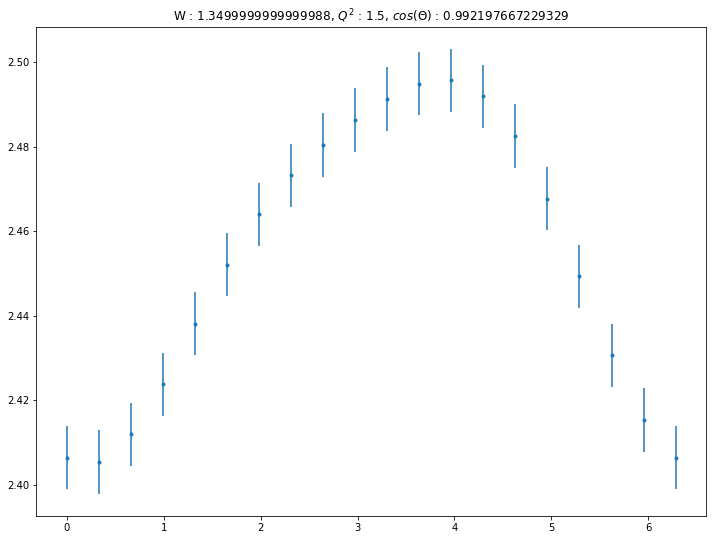

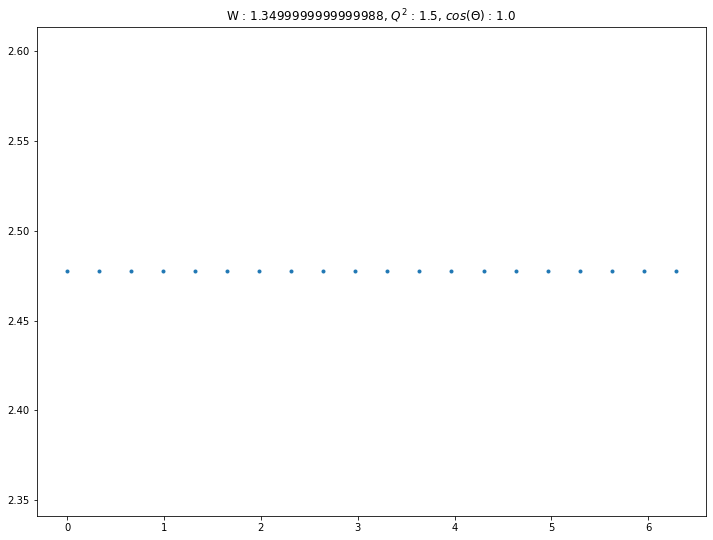

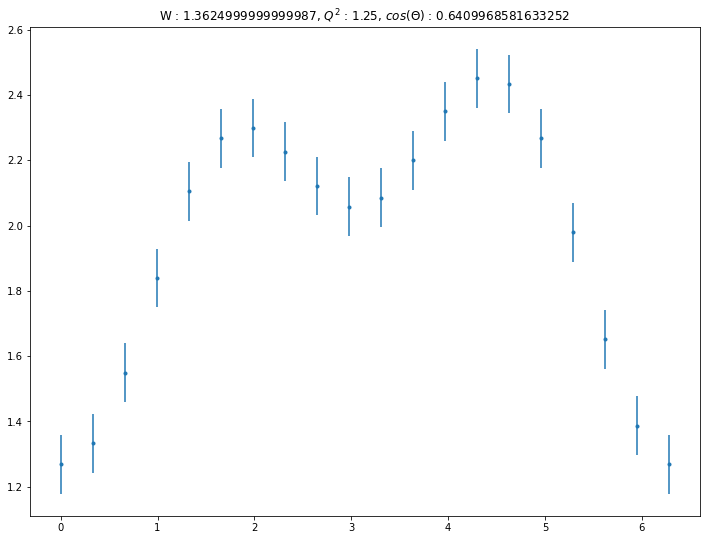

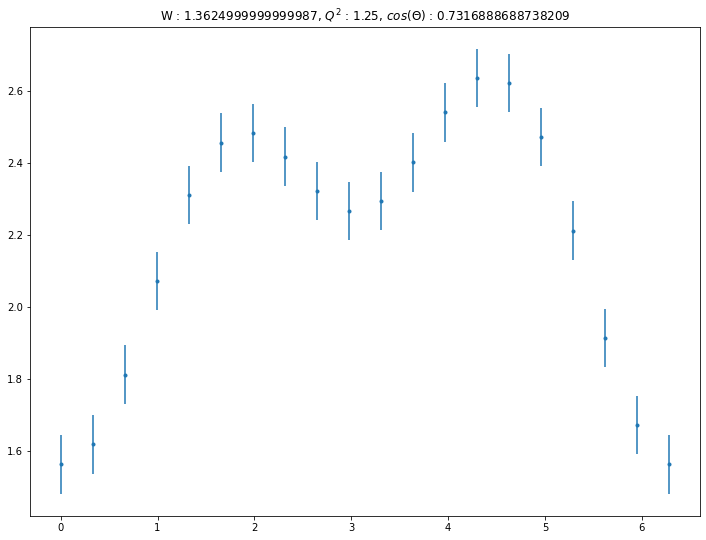

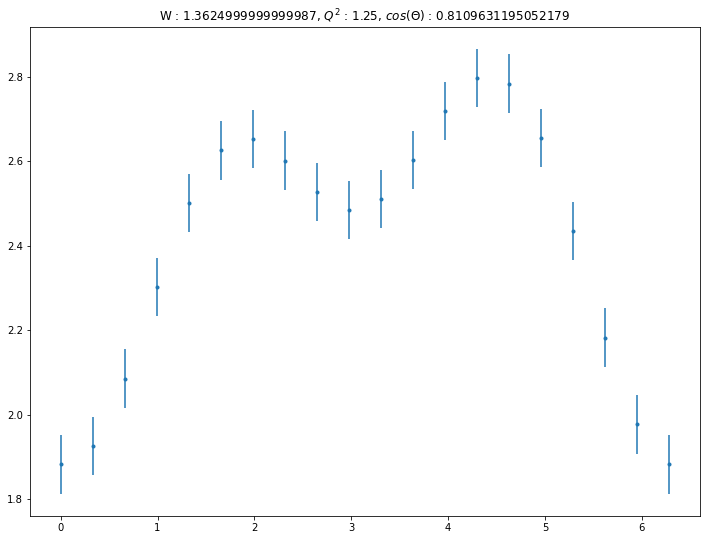

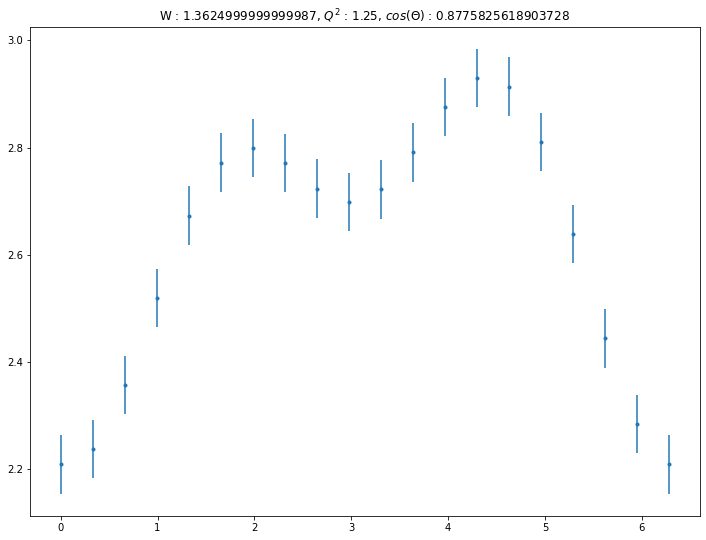

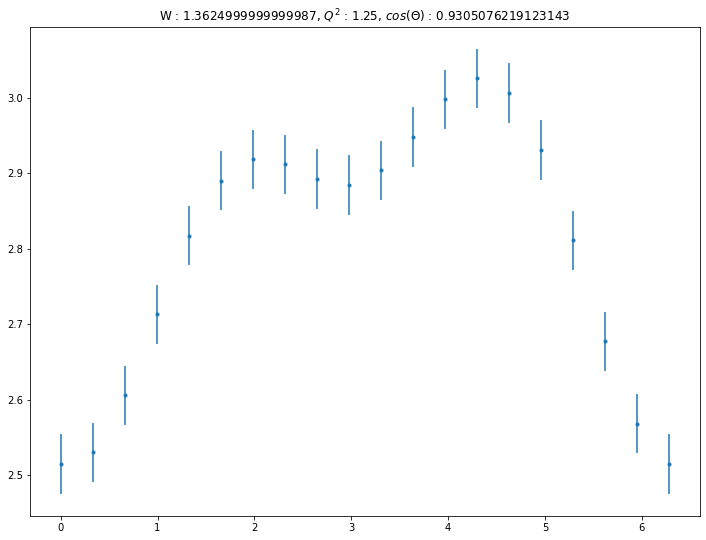

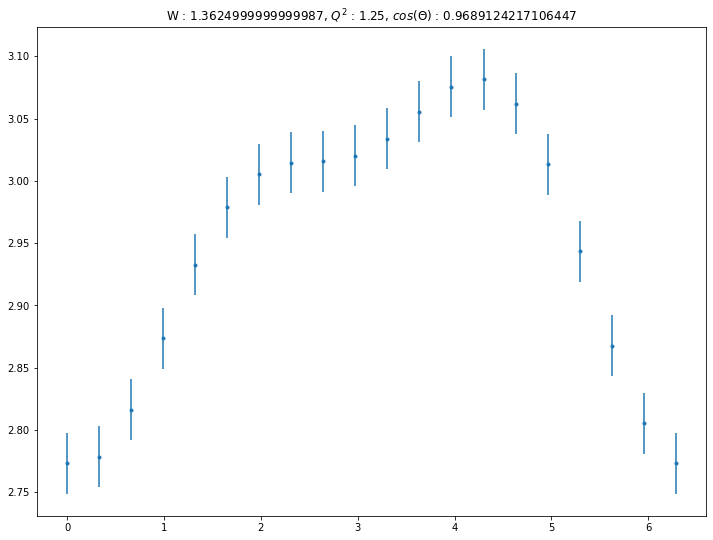

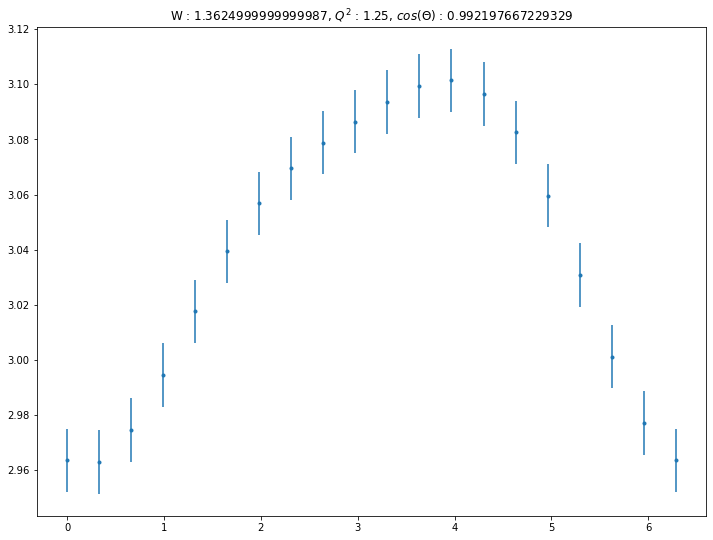

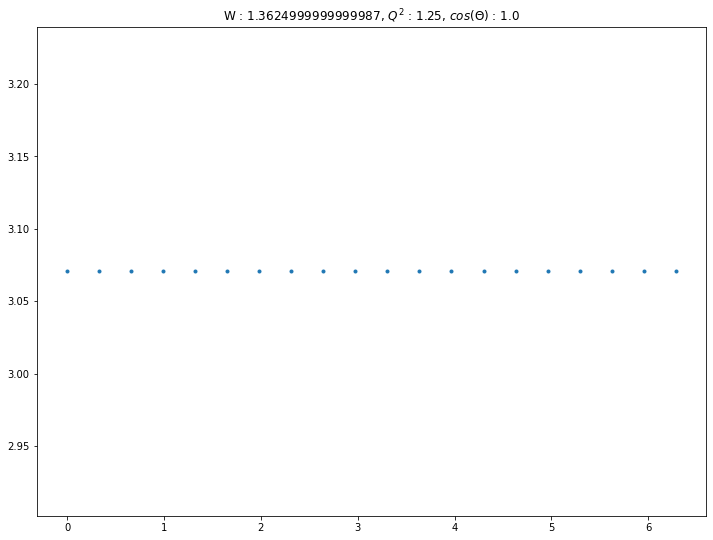

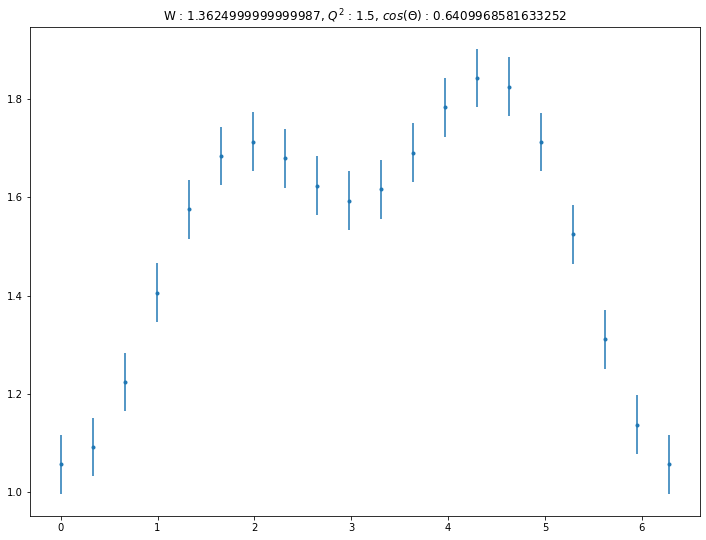

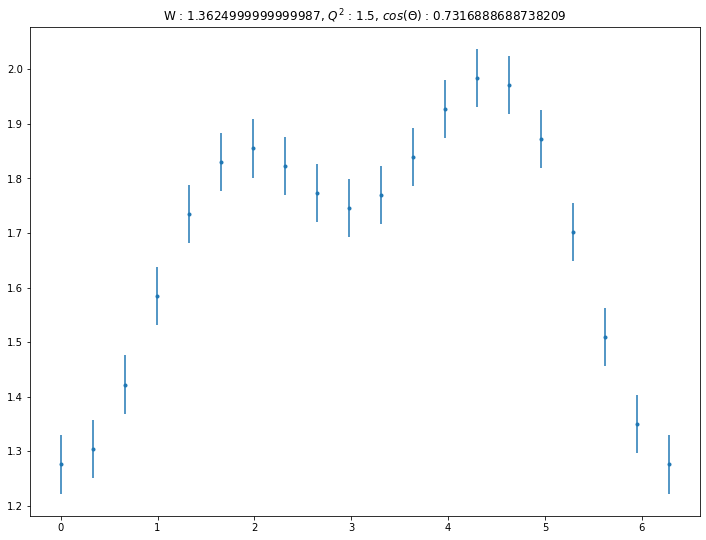

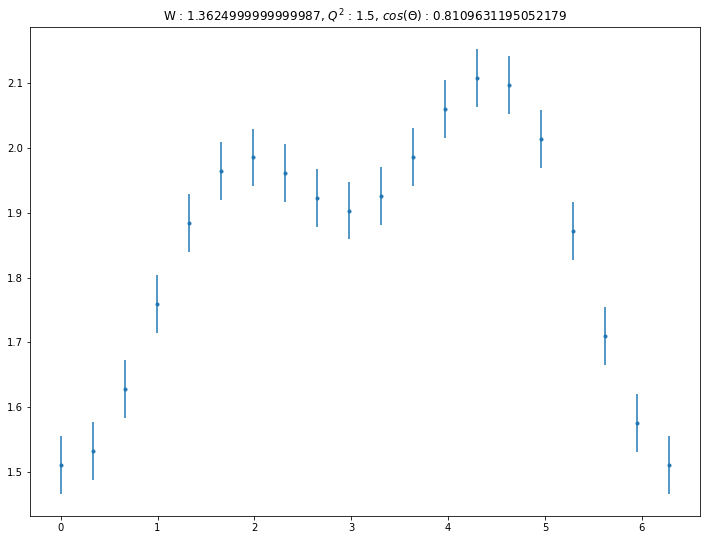

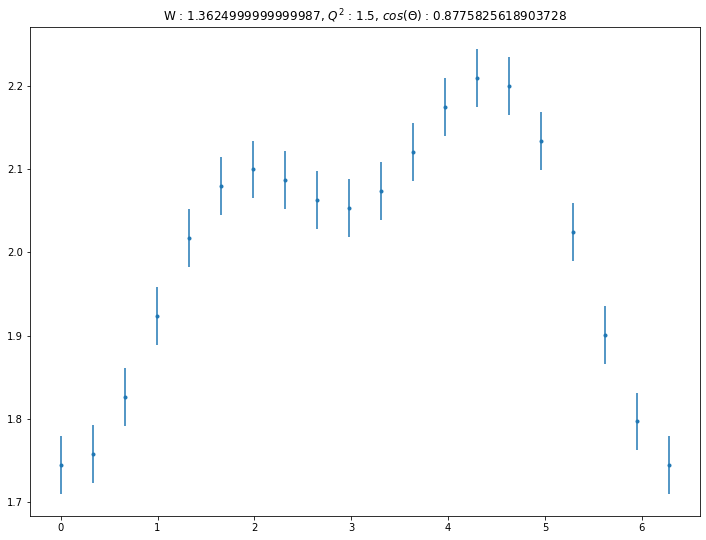

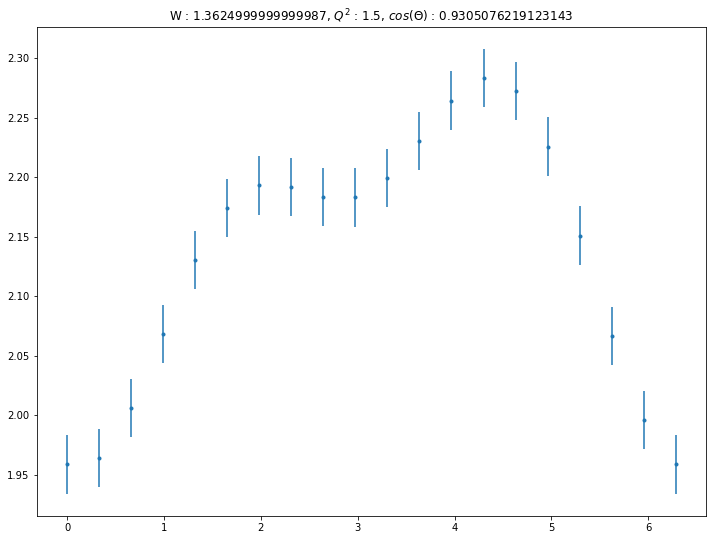

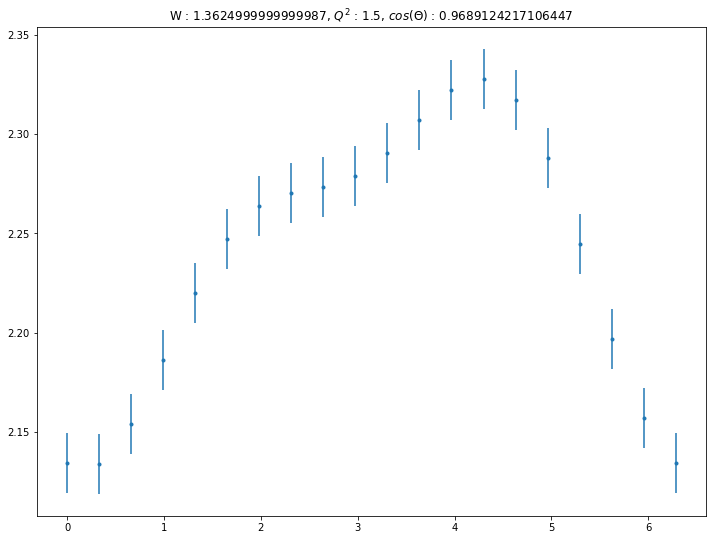

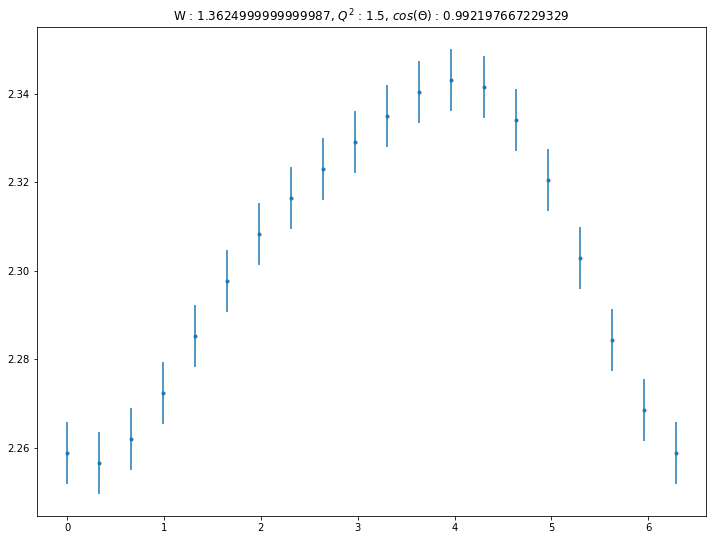

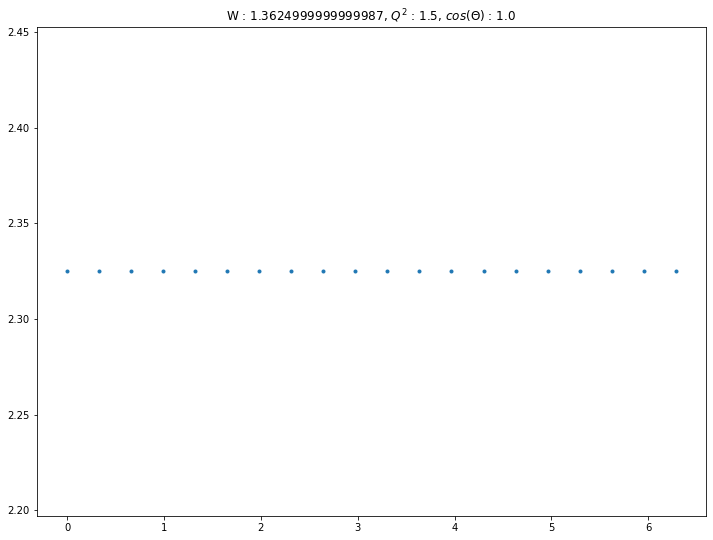

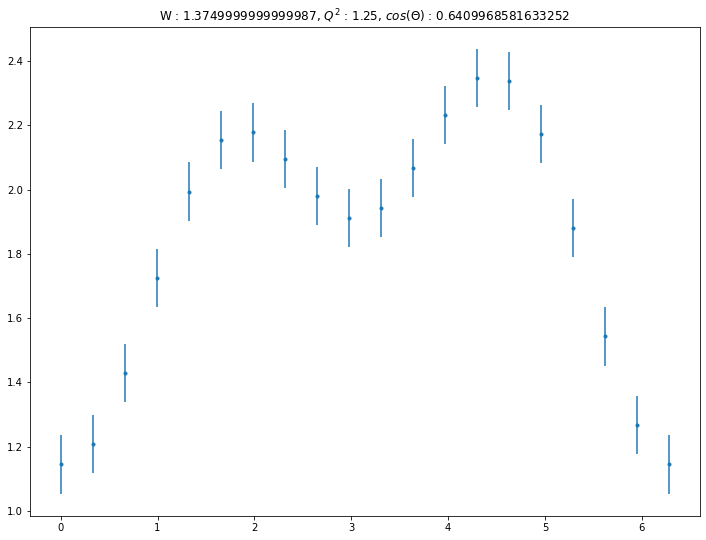

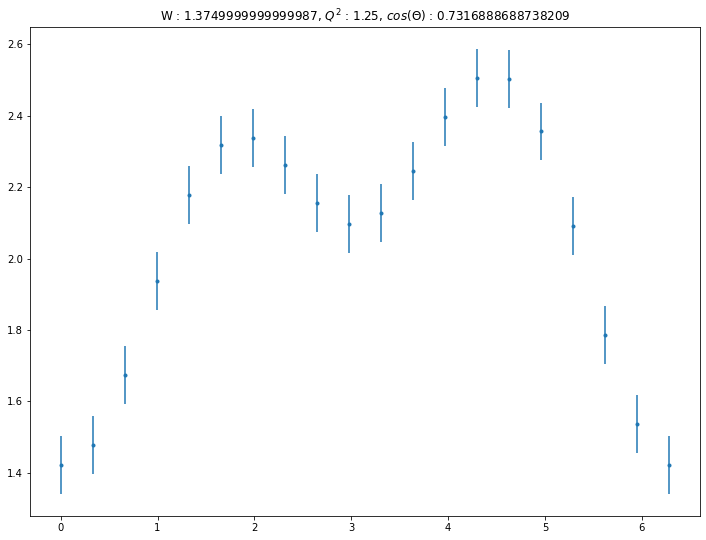

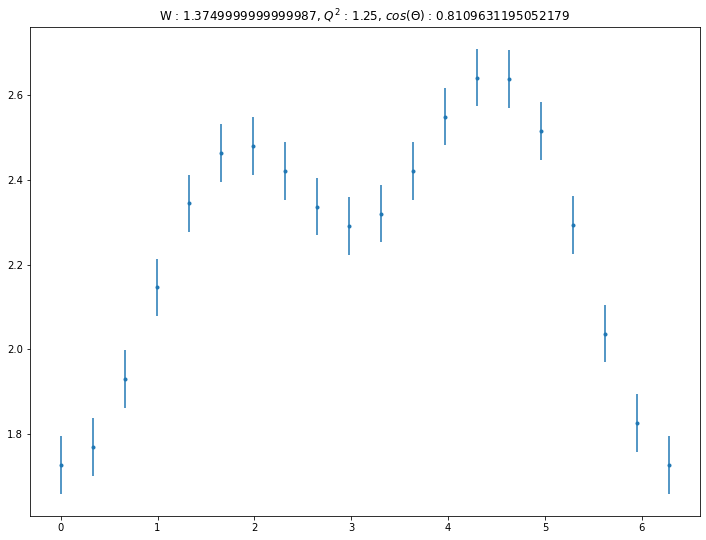

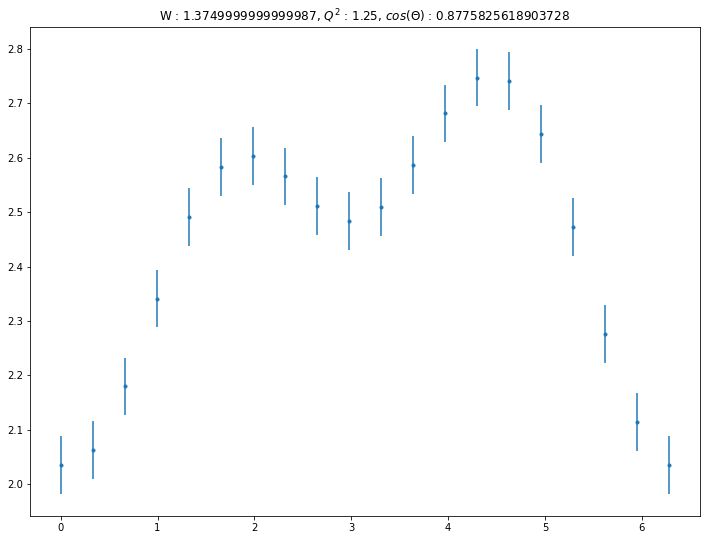

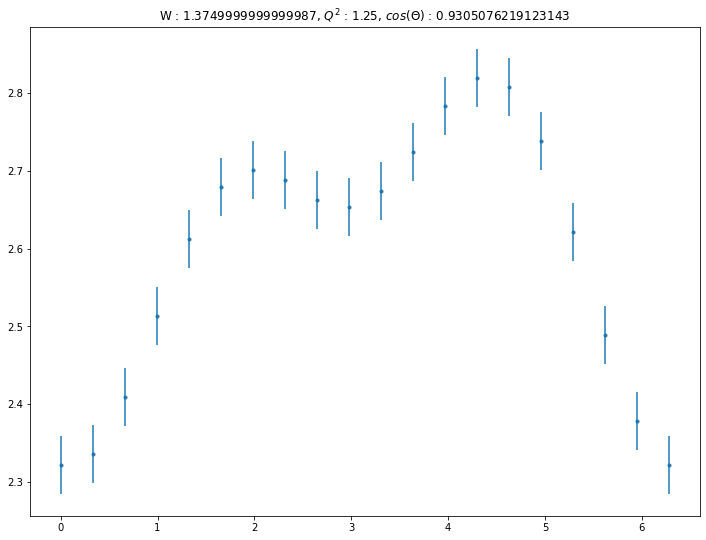

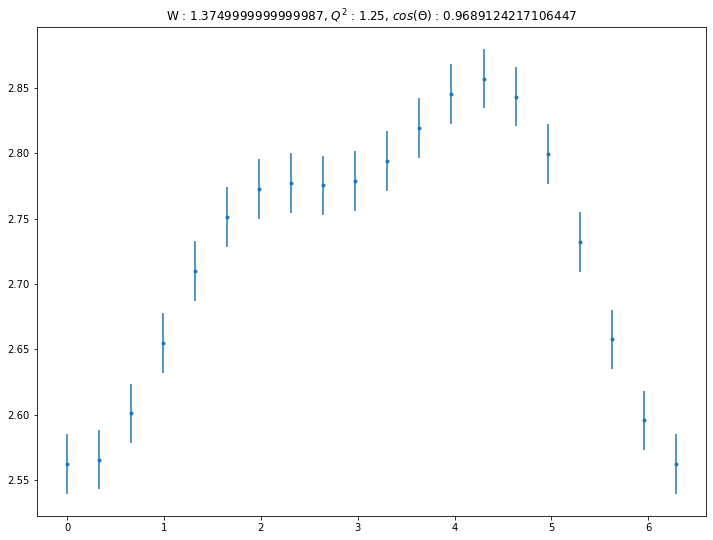

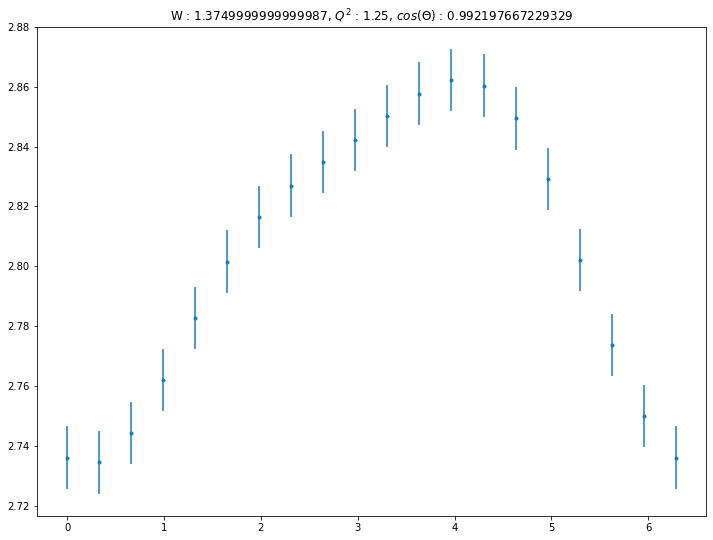

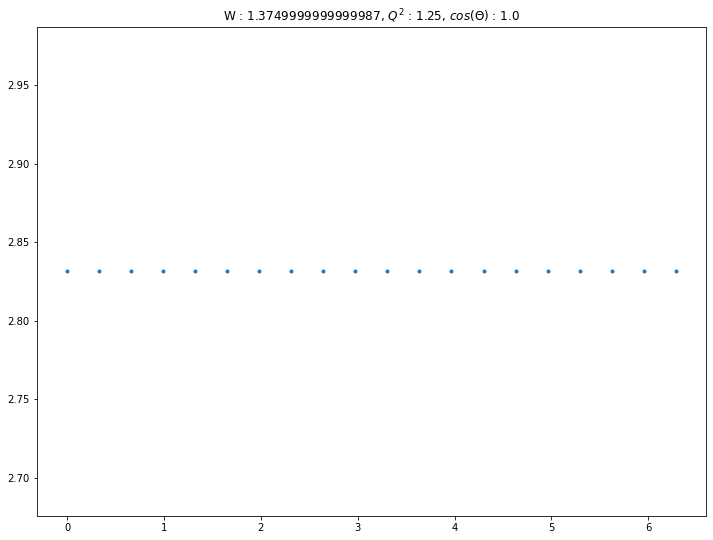

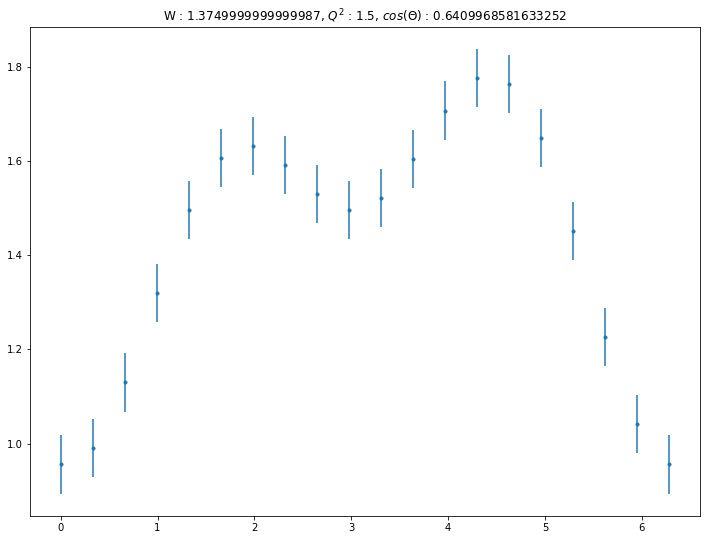

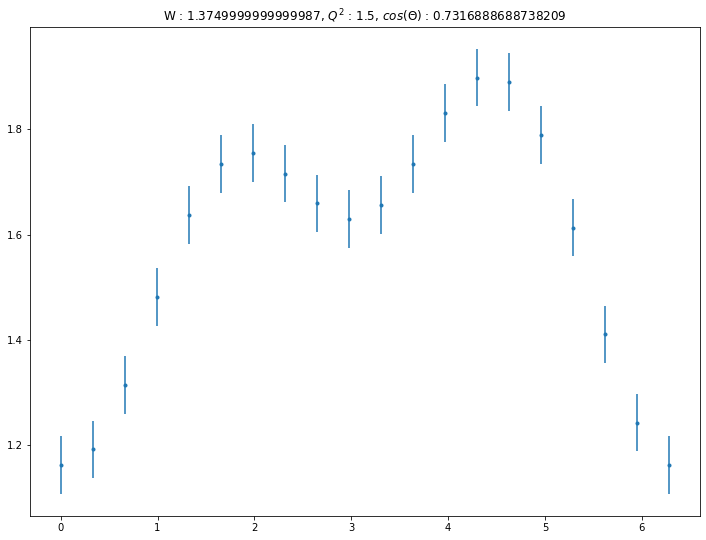

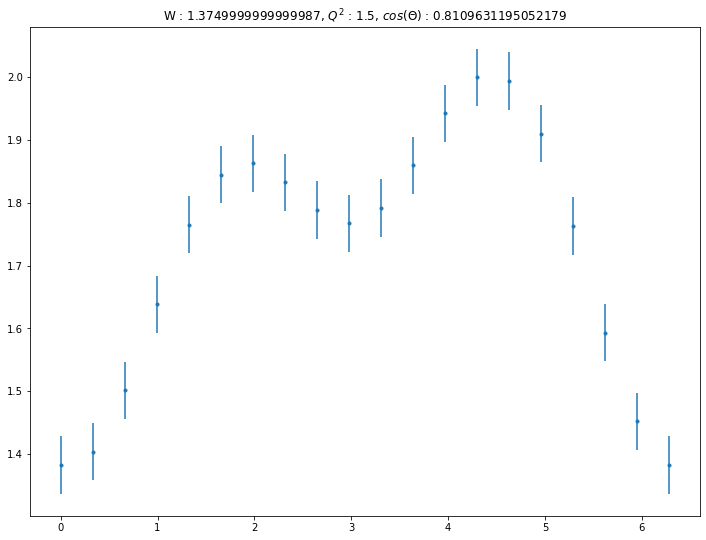

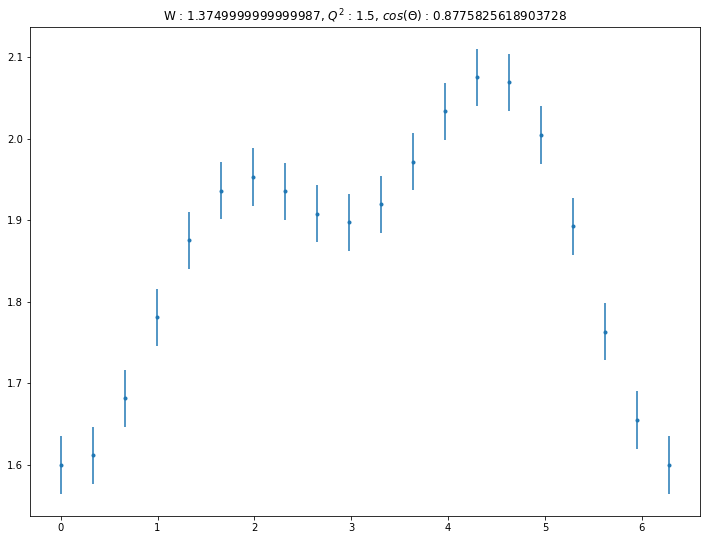

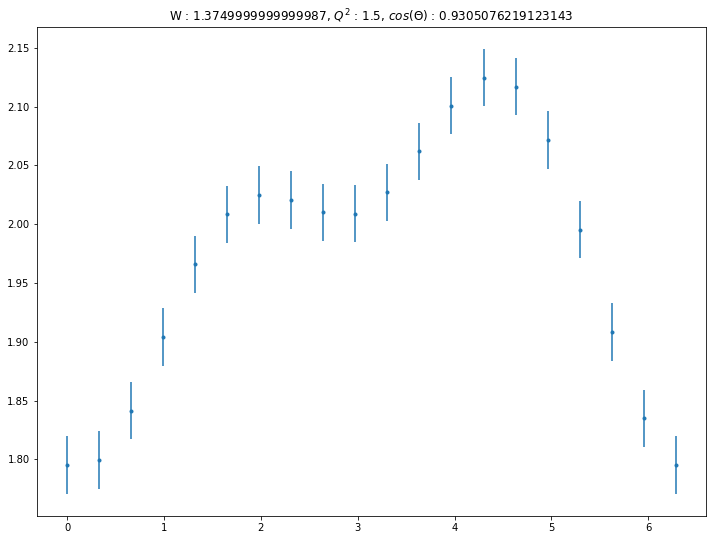

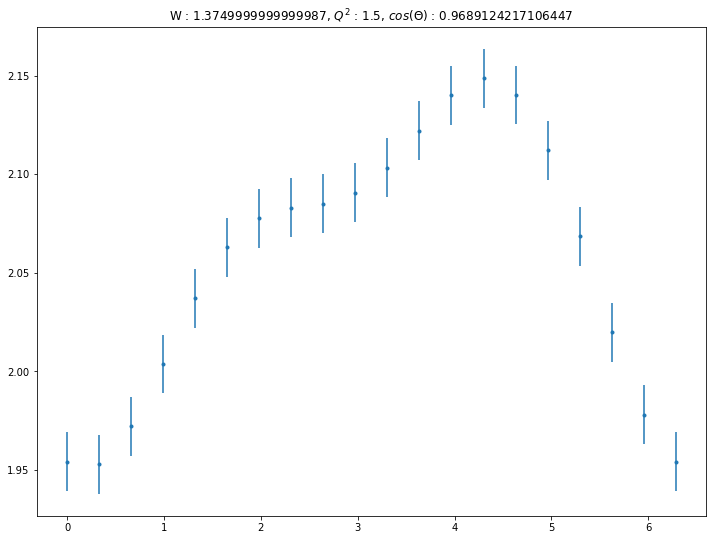

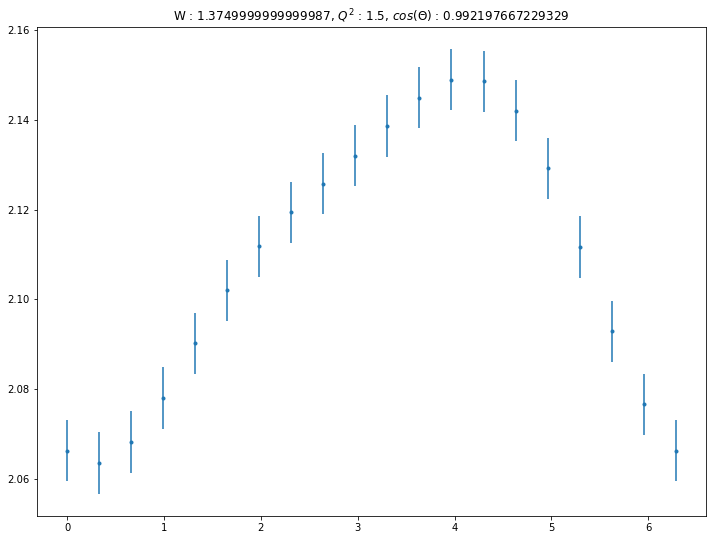

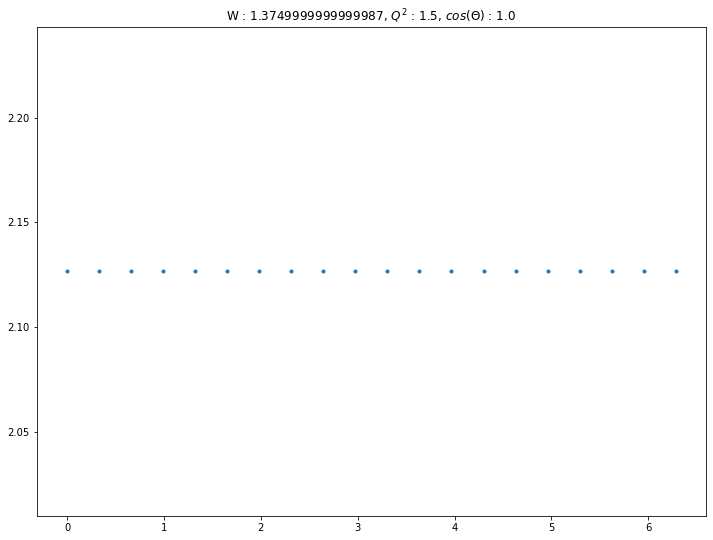

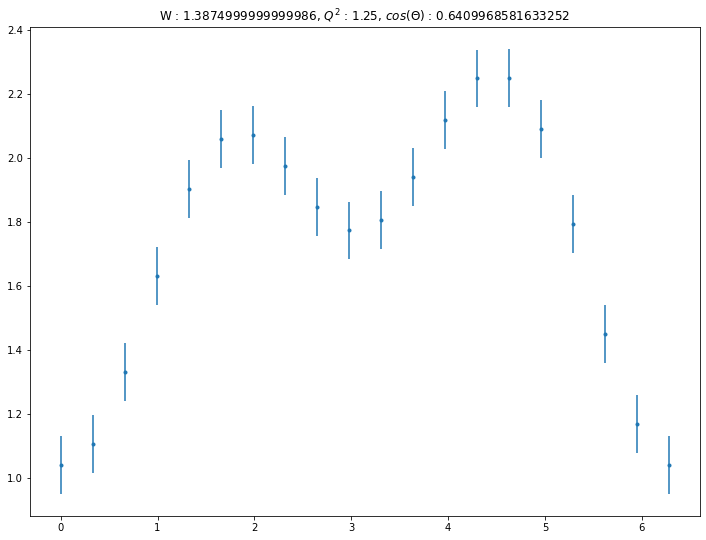

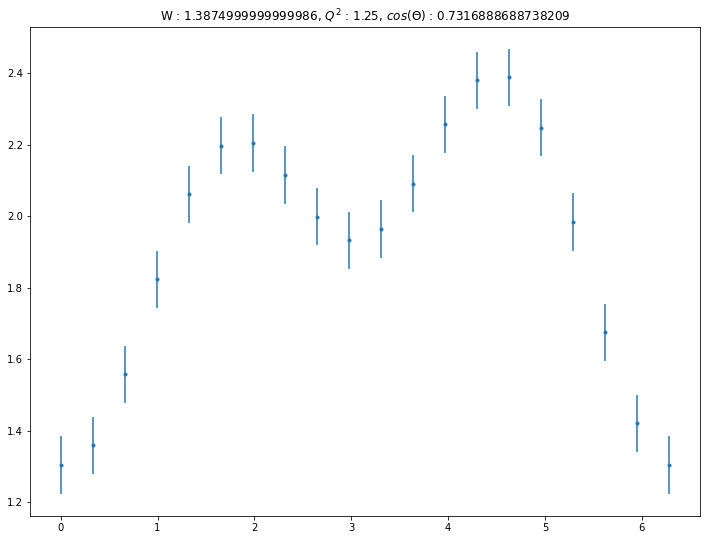

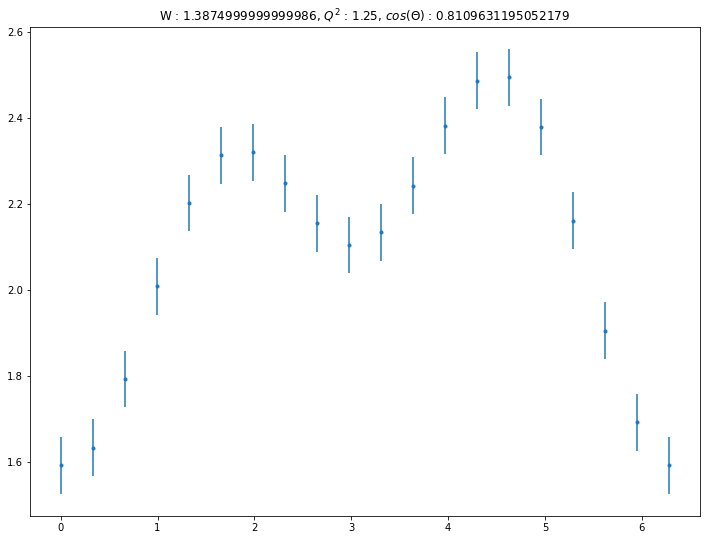

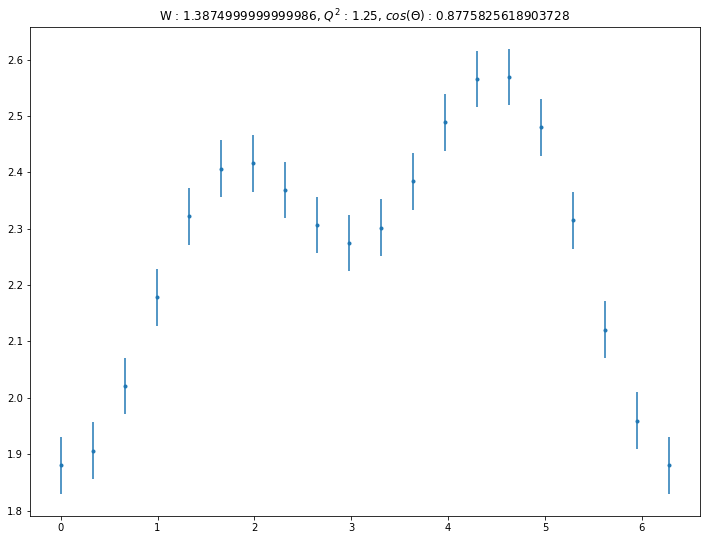

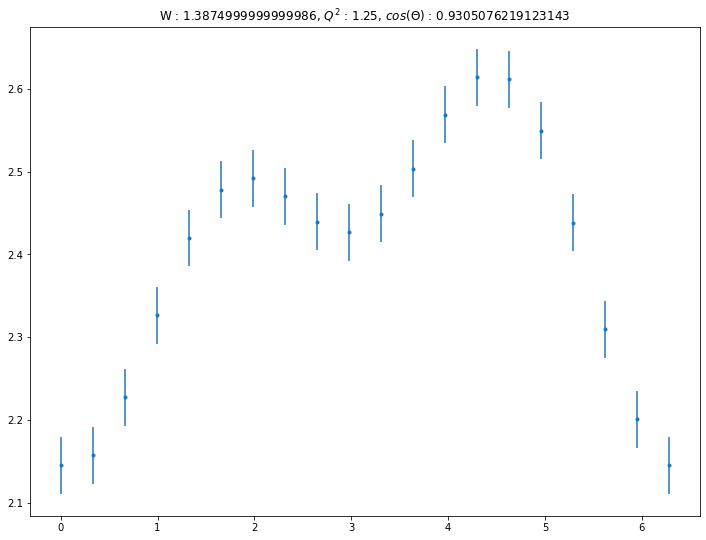

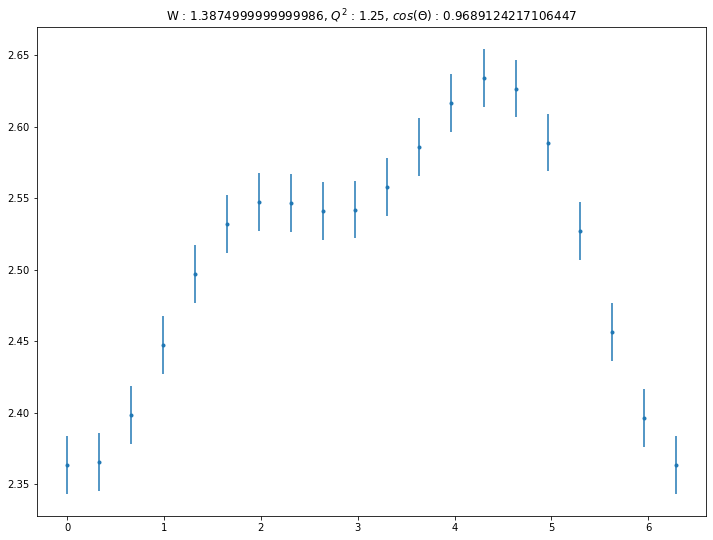

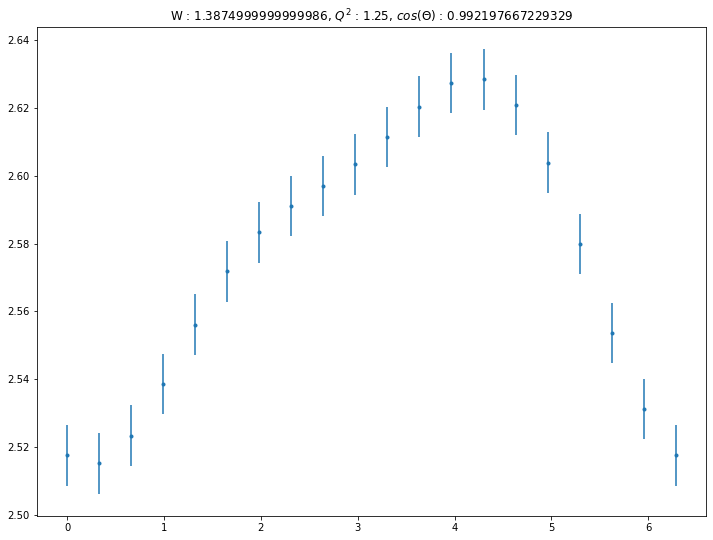

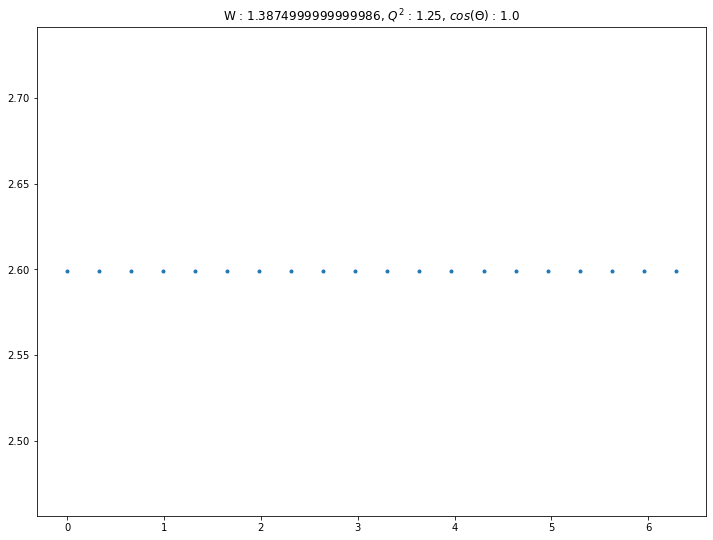

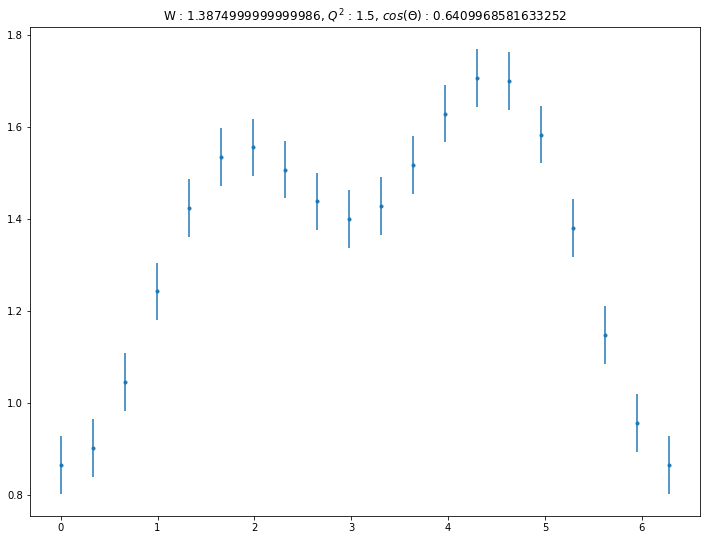

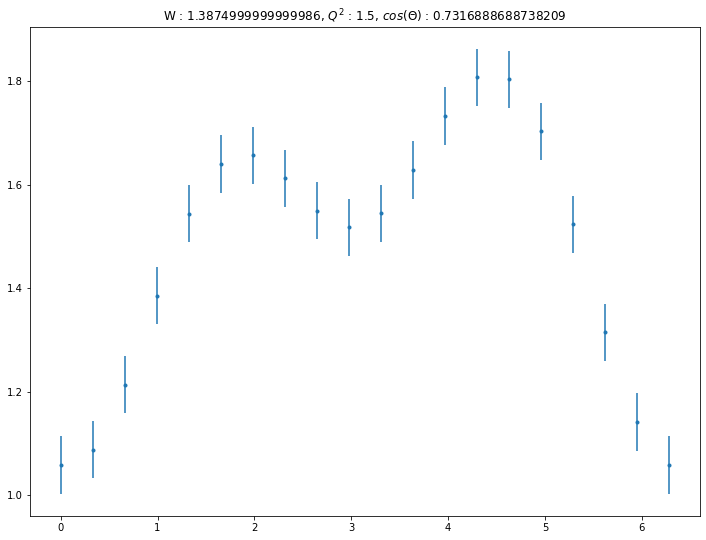

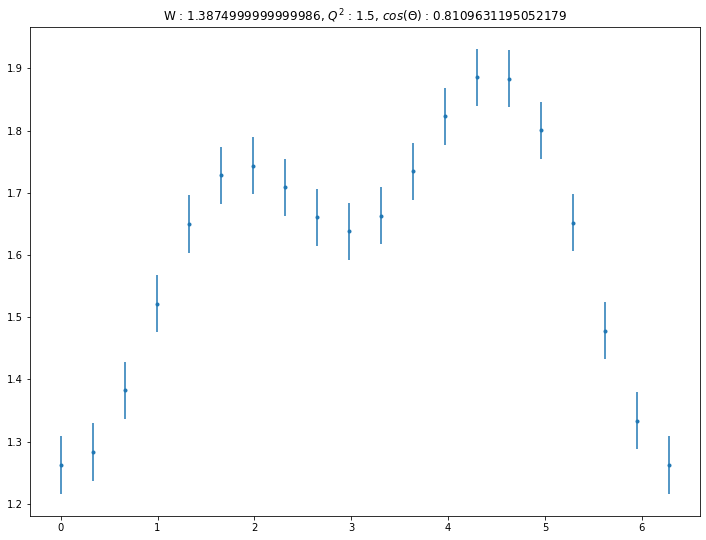

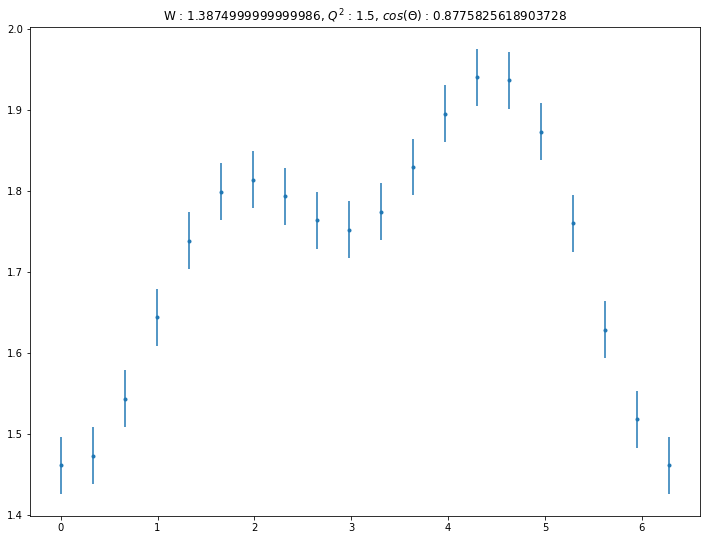

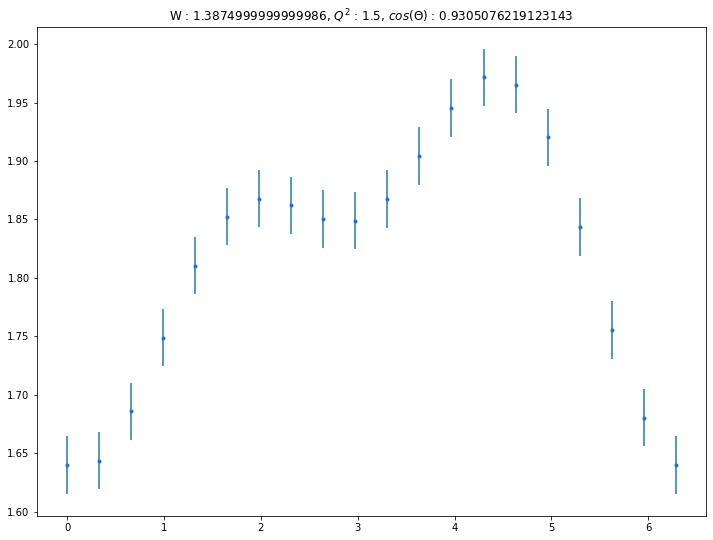

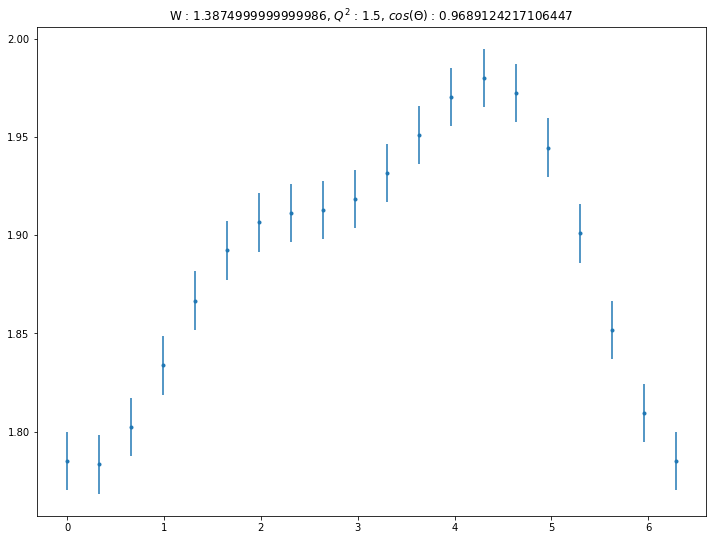

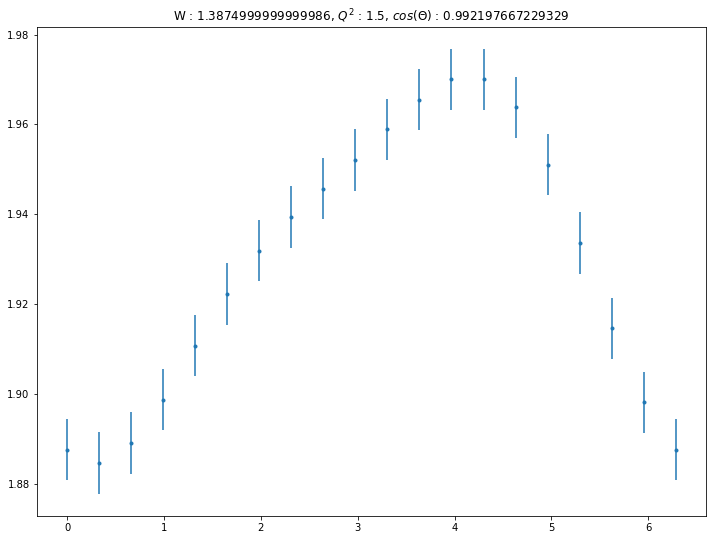

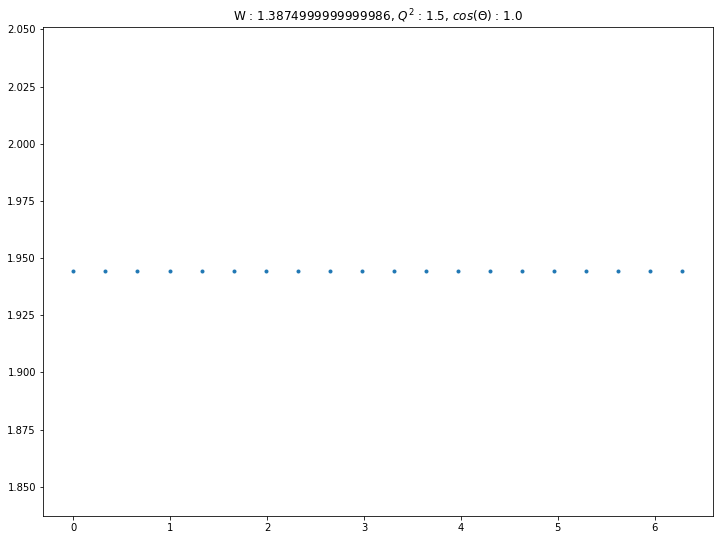

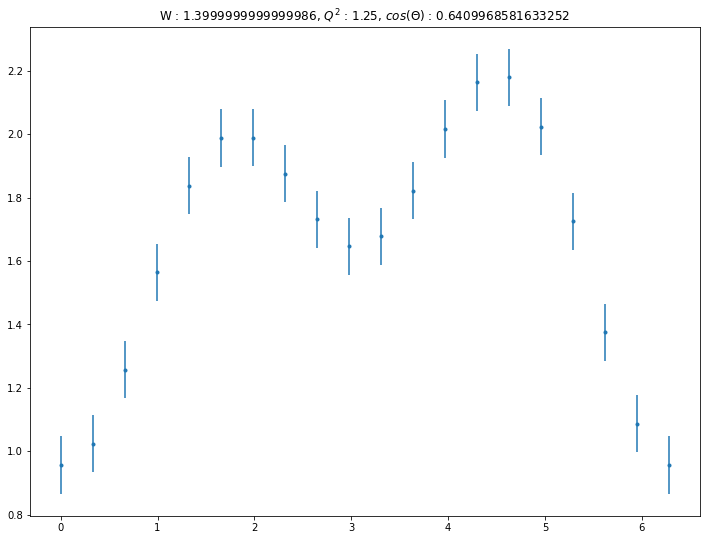

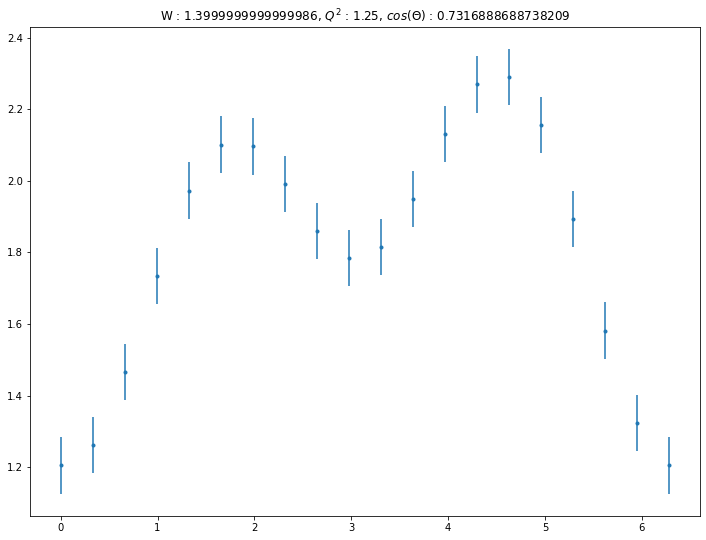

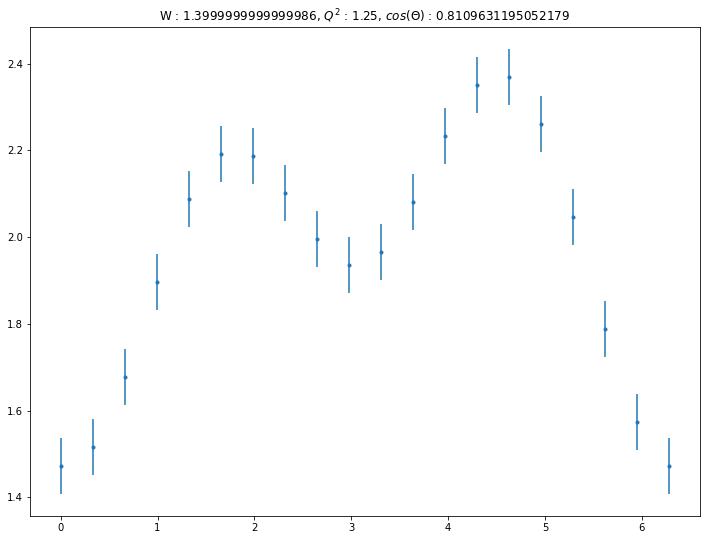

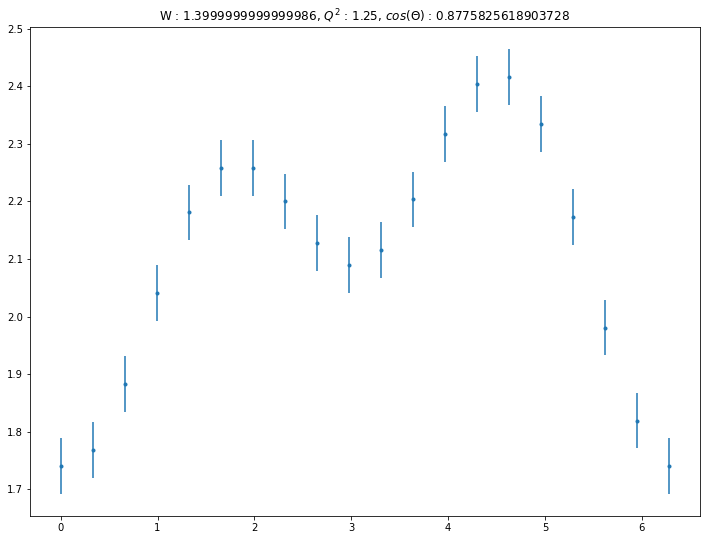

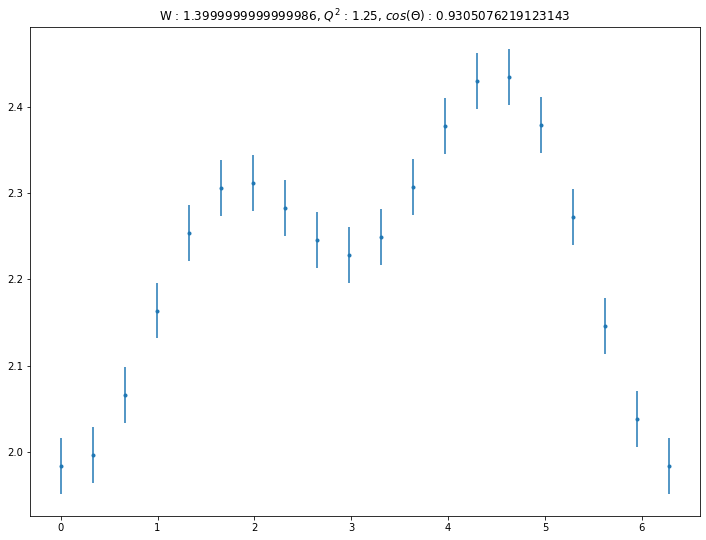

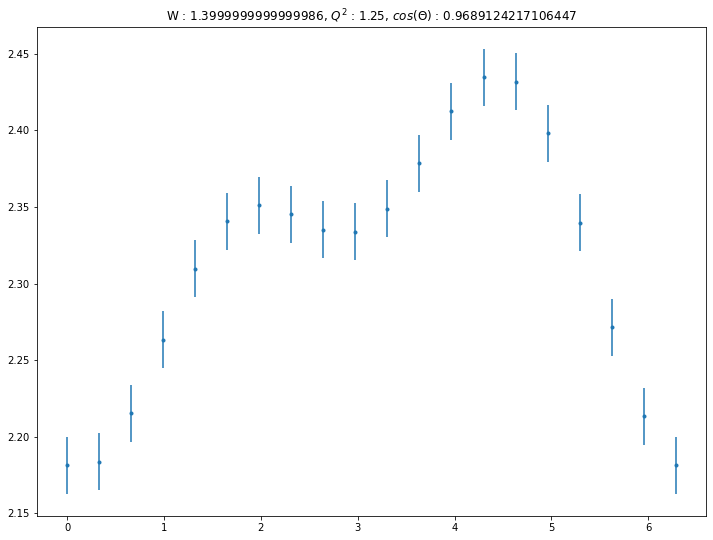

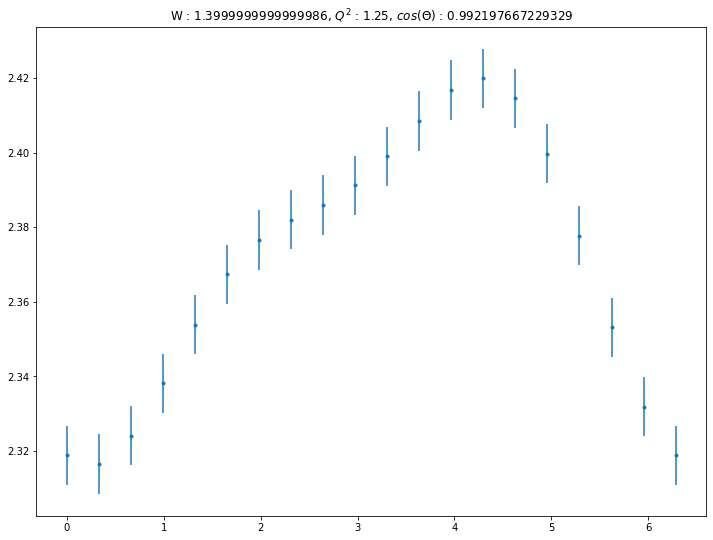

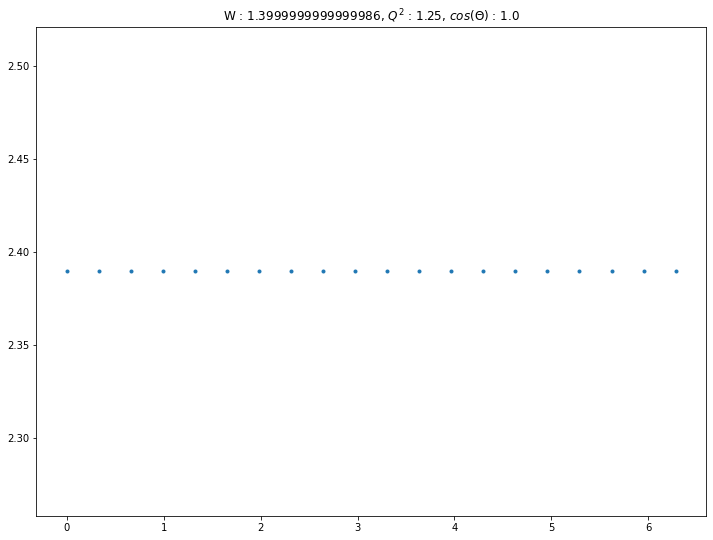

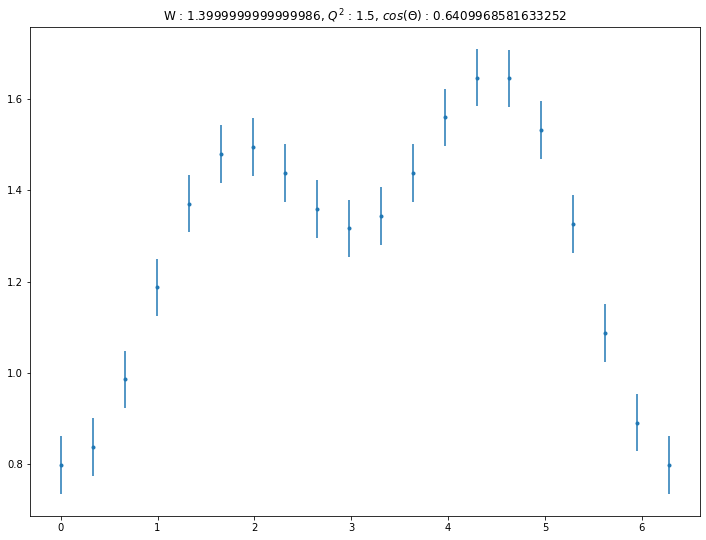

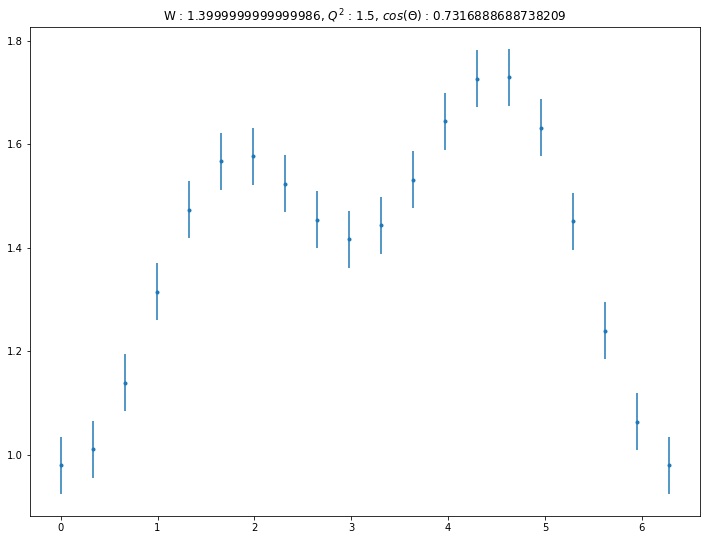

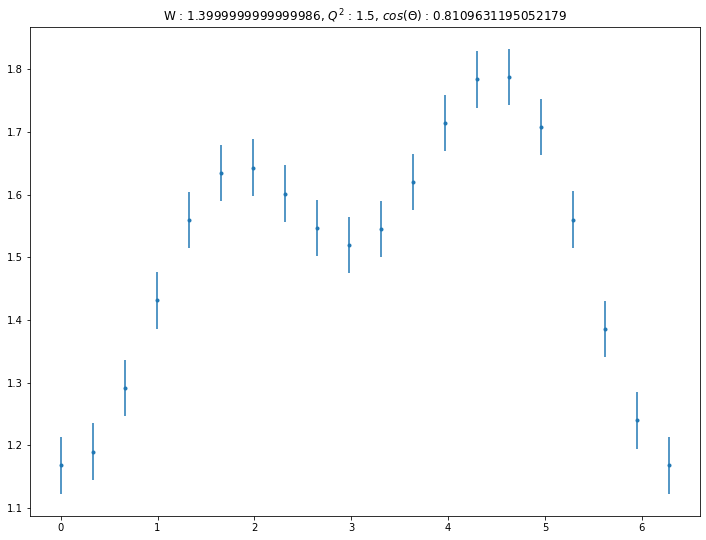

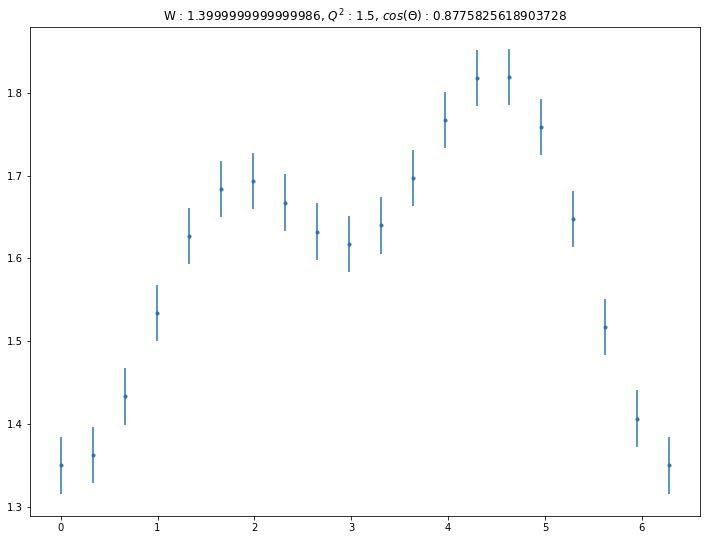

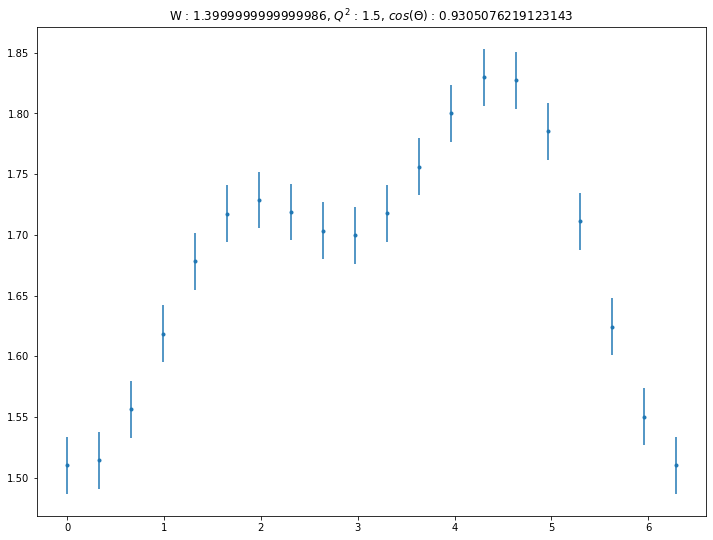

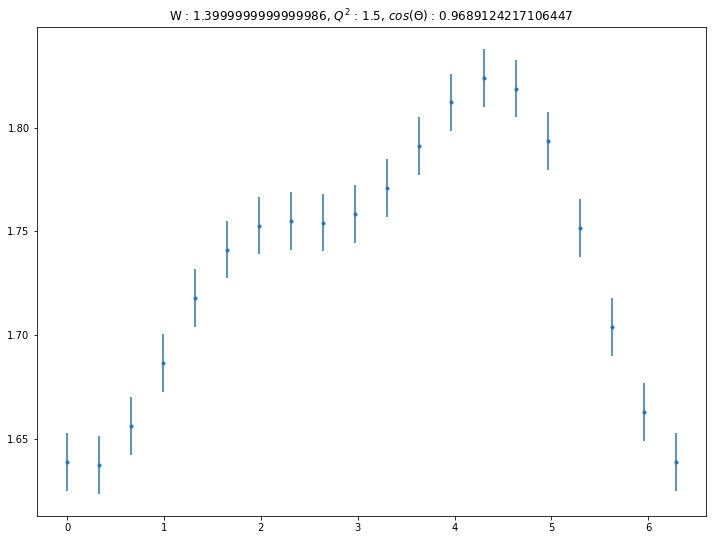

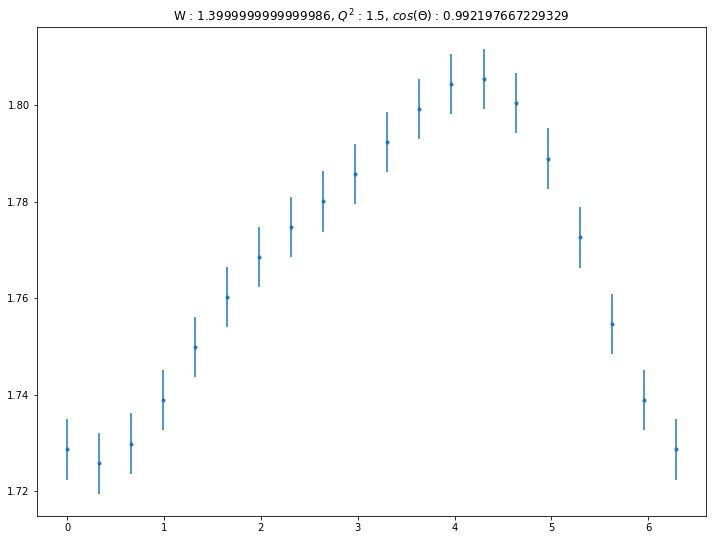

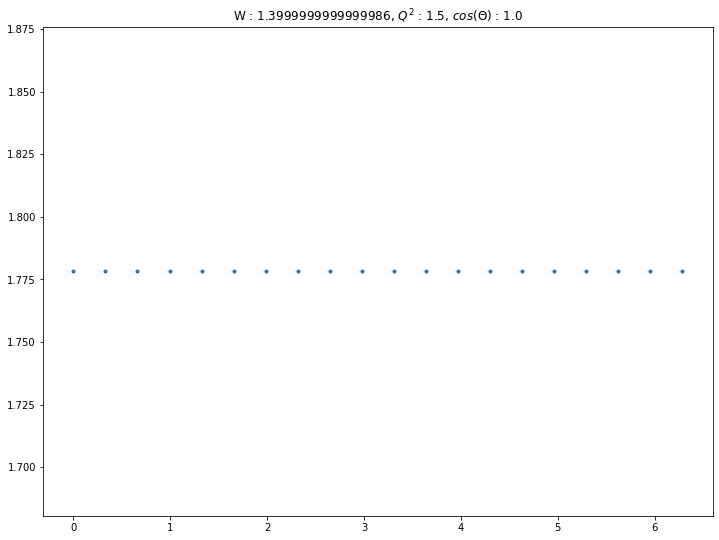

In [7]:
for w in w_centers:
    for q2 in q2_centers:
        for theta in theta_centers:
            fig, ax = plt.subplots(figsize=(12,9))
            xs = []
            for phi in phi_bins:
                xs.append(maid(E1D_E0,w,q2,theta,np.degrees(phi)))
            
            xs = np.nan_to_num(xs)
            
            if not np.all((xs == 0)):
                ax.set_title(f"W : {w}, $Q^{2}$ : {q2}, $cos(\Theta)$ : {theta}")
                ax.errorbar(phi_bins,xs,yerr=stats.sem(xs), fmt='.')
                plt.show()
            plt.close()